# [1.3.2] Interpretability with SAEs (exercises)

> **ARENA [Streamlit Page](https://arena-chapter1-transformer-interp.streamlit.app/12_🧬_[1.3.2]_Interpretability_with_SAEs)**
>
> **Colab: [exercises](https://colab.research.google.com/github/callummcdougall/ARENA_3.0/blob/main/chapter1_transformer_interp/exercises/part32_interp_with_saes/1.3.2_Interpretability_with_SAEs_exercises.ipynb?t=20250530) | [solutions](https://colab.research.google.com/github/callummcdougall/ARENA_3.0/blob/main/chapter1_transformer_interp/exercises/part32_interp_with_saes/1.3.2_Interpretability_with_SAEs_solutions.ipynb?t=20250530)**

Please send any problems / bugs on the `#errata` channel in the [Slack group](https://join.slack.com/t/arena-uk/shared_invite/zt-2zick19fl-6GY1yoGaoUozyM3wObwmnQ), and ask any questions on the dedicated channels for this chapter of material.

You can collapse each section so only the headers are visible, by clicking the arrow symbol on the left hand side of the markdown header cells.

Links to all other chapters: [(0) Fundamentals](https://arena-chapter0-fundamentals.streamlit.app/), [(1) Transformer Interpretability](https://arena-chapter1-transformer-interp.streamlit.app/), [(2) RL](https://arena-chapter2-rl.streamlit.app/).

> Note - **there is a huge amount of content in this set of exercises**, easily double that of any other single exercise set in ARENA (and some of those exercise sets are meant to last several days). The purpose of these exercises isn't to go through every single one of them, but rather to **jump around to the ones you're most interested in**. For instance, if you already have a rough idea of what superposition & SAEs are, you can skip past section 0️⃣ and go straight into the later sections.
>  
> Also, rather than using this material as exercises, you can also just use it as a helpful source of reference code, if you ever want to quickly implement some particular SAE technique or type of forward pass / causal intervention.
>
> You can use the interactive map below to get a better sense of the material content, and the dependencies between different sections.

<img src="https://raw.githubusercontent.com/info-arena/ARENA_img/main/misc/headers/header-13-2.png" width="350">
<br>

In [ ]:
from IPython.display import IFrame, display

display(IFrame(src="https://link.excalidraw.com/readonly/lwbmz3hSOL38907OaCBR", width=1000, height=500))

# Introduction

In these exercises, we dive deeply into the interpretability research that can be done with sparse autoencoders. We'll start by introducing two important tools: `SAELens` (essentially the TransformerLens of SAEs, which also integrates very well with TransformerLens) and **Neuronpedia**, an open platform for interpretability research. We'll then move through a few other exciting domains in SAE interpretability, grouped into several categories (e.g. understanding / classifying latents, or finding circuits in SAEs).

We expect some degree of prerequisite knowledge in these exercises. Specifically, it will be very helpful if you understand:

- What **superposition** is
- What the **sparse autoencoder** architecture is, and why it can help us disentangle features from superposition

We've included an abridged version of the exercise set **1.3.1 Superposition & SAEs**, which contains all the material we view as highly useful for the rest of these exercises. If you've already gone through this exercise set then you can proceed straight to section 1️⃣, if not then we recommend at least skimming through section 0️⃣ so that you feel comfortable with the core geometric intuitions for superposition and how SAEs work.

One note before starting - we'll be mostly adopting the terminology that **features** are characteristics of the underlying data distribution that our base models are trained on, and **SAE latents** (or just "latents") are the directions in the SAE. This is to avoid the overloading of the term "feature", and avoiding the implicit assumption that "SAE features" correspond to real features in the data. We'll relax this terminology when we're looking at SAE latents which very clearly correspond to specific interpretable features in the data.

## Reading Material

Most of this is optional, and can be read at your leisure depending on what interests you most & what level of background you have. If we could recommend just one, it would be "Towards Monosemanticity" - particularly the first half of "Problem Setup", and the sections where they take a deep dive on individual latents.

- [Toy Models of Superposition](https://transformer-circuits.pub/2022/toy_model/index.html) outlines the core ideas behind superposition - what it is, why it matters for interepretability, and what we might be able to do about it.
- [Towards Monosemanticity: Decomposing Language Models With Dictionary Learning](https://transformer-circuits.pub/2023/monosemantic-features/index.html) arguably took the first major stride in mechanistic interpretability with SAEs: training them on a 1-layer model, and extracting a large number of interpretable features.
- [Scaling Monosemanticity: Extracting Interpretable Features from Claude 3 Sonnet](https://transformer-circuits.pub/2024/scaling-monosemanticity/index.html) shows how you can scale up the science of SAEs to larger models, specifically the SOTA (at the time) model Claude 3 Sonnet. It provides an interesting insight into where the field might be moving in the near future.
- [Improving Dictionary Learning with Gated Sparse Autoencoders](https://arxiv.org/pdf/2404.16014) is a paper from DeepMind which introduces the Gated SAE architecture, demonstrating how it outperforms the standard architecture and also motivating its use by speculating about underlying feature distributions.
- [Gemma Scope](https://deepmind.google/discover/blog/gemma-scope-helping-the-safety-community-shed-light-on-the-inner-workings-of-language-models/) announces DeepMind's release of a comprehensive suite of open-sourced SAE models (trained with JumpReLU architecture). We'll be working a lot more with Gemma Scope models in subsequent exercises!
- [LessWrong, SAEs tag](https://www.lesswrong.com/tag/sparse-autoencoders-saes) contains a collection of posts on LessWrong that discuss SAEs, and is a great source of inspiration for further independent research!

## Content & Learning Objectives

View [this interactive map](https://link.excalidraw.com/l/9KwMnW35Xt8/86r7xyurK0g) to see all the material which is complete & still in development, as well as figures showing what you'll create at the end of each section. It contains pretty much all the information below, but in an easier-to-visualize format.

Highlighting a few important things which the map should make clear:

- There's no required order to go through this material in! With the exception of the first few chunks of section 1️⃣ you can basically pick whatever you want to work through, depending on what your Objectives are. The map shows the dependencies between different sections, which you can use to guide your work.
- Some sections of material are still in development, and will continue to be added to over October & November (although development will mostly be paused during the middle of October, while I'm going through an interview process). We're open to suggestions or recommendations for how to improve / add to this material further!

### 0️⃣ Toy Models of Superposition & SAEs

This is a heavily abridged version of the previous section of exercises. It drops all of the non-essential material (everything except the first and last sections), and pairs down the remaining material. Despite this, we still recommend most people skip past these exercises fairly quickly, especially if you're already familiar with the concepts underlying superposition & SAEs.

> ##### Learning Objectives
>
> - Understand the concept of superposition, and why models need to do it
> - Understand the difference between superposition and polysemanticity
> - Learn about sparse autoencoders, and how they might be used to disentangle features represented in superposition
> - Train your own SAEs on the toy models from earlier sections, and visualise the process of learning features
> - Understand important SAE training strategies (e.g. resampling) and architecture variants (e.g. Gated, Jump ReLU)

### 1️⃣ Intro to SAE Interpretability

The idea is for this section is to be an MVP for all basic SAE topics, excluding training & evals (which we'll come back to in section 4). The focus will be on how to understand & interpret SAE latents (in particular all the components of the [SAE dashboard](https://transformer-circuits.pub/2023/monosemantic-features/vis/a1.html)). We'll also look at techniques for finding latents (e.g. ablation & attribution methods), as well as taking a deeper dive into attention SAEs and how they work.

> ##### Learning Objectives
>   
> - Learn how to use the `SAELens` library to load in & run SAEs (alongside the TransformerLens models they're attached to)
> - Understand the basic features of **Neuronpedia**, and how it can be used for things like steering and searching over features
> - Understand **SAE dashboards**, what each part of them tells you about a particular latent (as well as how to compute them yourself)
> - Learn techniques for finding latents, including **direct logit attribution**, **ablation** and **attribution patching**
> - Use **attention SAEs**, understand how they differ from regular SAEs (as well as topics specific to attention SAEs, like **direct latent attribution**)
> - Learn a bit about different SAE architectures or training methods (e.g. gated, end-to-end, meta-saes, transcoders) - some of these will be covered in more detail later

### 2️⃣ SAE Circuits

SAEs are cool and interesting and we can steer on their latents to produce cool and interesting effects - but does this mean that we've truly unlocked the true units of computation used by our models, or have we just found an interesting clustering algorithm? The answer is that we don't really know yet! One strong piece of evidence for the former would be finding **circuits with SAEs**, in other words sets of latents in different layers of the transformer which communicate with each other, and explain some particular behaviour in an end-to-end way. How to find these kinds of circuits, and what they look like, is what we'll explore in this section.

> ##### Learning Objectives
>
> - Learn how to find connections between SAE latents in different layers of the transformer
> - Discover how to apply knowledge of SAE circuits to remove the bias from a linear classifier, as described in the Sparse Feature Circuits paper (not implemented yet)
> - Study transcoders, and understand how they can improve circuit analysis compared to regular SAEs

### 3️⃣ Understanding SAE Latents: A Deeper Dive

This is essentially an a-la-carte batch of several different topics, which aren't specifically related to SAE circuits or training SAEs, but which were too niche or in-depth to cover in the intro section. Much of this represents research being done on the cutting edge of current SAE interpretability, and could be an interesting jumping off point for your own research!

> ##### Learning Objectives
>
> - Study feature splitting, and what it means for SAE training
> - Use UMAPs and other dimensionality-reduction techniques to better understand SAE latent geometry
> - Understand feature absorption, and how meta-SAEs might help us disentangle this problem (not implemented yet)
> - Use the logit lens & techniques like token enrichment analysis to better understand & characterize SAE latents (not implemented yet)
> - Take a deeper dive into automated interpretability, covering autointerp-based evals & patch scoping (not implemented yet)

### 4️⃣ Training & Evaluating SAEs

In this section, we first cover some basic material on training SAEs. We'll show you how `SAELens` supports SAE training and cover a few general pieces of advice, and then go through a few training case studies. Each of these training exercises represents a good jumping off point for further investigation of your trained models (although this is more true for the smaller models e.g. the attention SAE trained on a 2L model, since it's more likely to have found features that match the level of complexity of the base model, given that these tutorials are optimised for brevity and low compute requirements!).

We plan to add a second half to this section which covers evals, but this is currently still in development (and we cover many evals-related things in other parts of the material, e.g. the first half of this section, as well as things like autointerp in section 3).

> ##### Learning Objectives
>
> - Learn how to train SAEs using `SAELens`
> - Understand how to interpret different metrics during training, and understand when & why SAE training fails to produce interpretable latents
> - Get hands-on experience training SAEs in a variety of context: MLP output of TinyStories-1L, residual stream of Gemma-2-2B, attention output of a 2L model, etc
> - Understand how to evaluate SAEs, and why simple metrics can be deceptive (not implemented yet)

## A note on memory usage

In these exercises, we'll be loading some pretty large models into memory (e.g. Gemma 2-2B and its SAEs, as well as a host of other models in later sections of the material). It's useful to have functions which can help profile memory usage for you, so that if you encounter OOM errors you can try and clear out unnecessary models. For example, we've found that with the right memory handling (i.e. deleting models and objects when you're not using them any more) it should be possible to run all the exercises in this material on a Colab Pro notebook, and all the exercises minus the handful involving Gemma on a free Colab notebook.

<details>
<summary>See this dropdown for some functions which you might find helpful, and how to use them.</summary>

First, we can run some code to inspect our current memory usage. Here's me running this code during the exercise set on SAE circuits, after having already loaded in the Gemma models from the previous section. This was on a Colab Pro notebook.

```python
import part31_superposition_and_saes.utils as utils

# Profile memory usage, and delete gemma models if we've loaded them in
namespace = globals().copy() | locals()
utils.profile_pytorch_memory(namespace=namespace, filter_device="cuda:0")
```

<pre style="font-family: Consolas; font-size: 14px">Allocated = 35.88 GB
Total = 39.56 GB
Free = 3.68 GB
┌──────────────────────┬────────────────────────┬──────────┬─────────────┐
│ Name                 │ Object                 │ Device   │   Size (GB) │
├──────────────────────┼────────────────────────┼──────────┼─────────────┤
│ gemma_2_2b           │ HookedSAETransformer   │ cuda:0   │       11.94 │
│ gpt2                 │ HookedSAETransformer   │ cuda:0   │        0.61 │
│ gemma_2_2b_sae       │ SAE                    │ cuda:0   │        0.28 │
│ sae_resid_dirs       │ Tensor (4, 24576, 768) │ cuda:0   │        0.28 │
│ gpt2_sae             │ SAE                    │ cuda:0   │        0.14 │
│ logits               │ Tensor (4, 15, 50257)  │ cuda:0   │        0.01 │
│ logits_with_ablation │ Tensor (4, 15, 50257)  │ cuda:0   │        0.01 │
│ clean_logits         │ Tensor (4, 15, 50257)  │ cuda:0   │        0.01 │
│ _                    │ Tensor (16, 128, 768)  │ cuda:0   │        0.01 │
│ clean_sae_acts_post  │ Tensor (4, 15, 24576)  │ cuda:0   │        0.01 │
└──────────────────────┴────────────────────────┴──────────┴─────────────┘</pre>

From this, we see that we've allocated a lot of memory for the the Gemma model, so let's delete it. We'll also run some code to move any remaining objects on the GPU which are larger than 100MB to the CPU, and print the memory status again.

```python
del gemma_2_2b
del gemma_2_2b_sae

THRESHOLD = 0.1  # GB
for obj in gc.get_objects():
    try:
        if isinstance(obj, t.nn.Module) and part32_utils.get_tensors_size(obj) / 1024**3 > THRESHOLD:
            if hasattr(obj, "cuda"):
                obj.cpu()
            if hasattr(obj, "reset"):
                obj.reset()
    except:
        pass

# Move our gpt2 model & SAEs back to GPU (we'll need them for the exercises we're about to do)
gpt2.to(device)
gpt2_saes = {layer: sae.to(device) for layer, sae in gpt2_saes.items()}

part32_utils.print_memory_status()
```

<pre style="font-family: Consolas; font-size: 14px">Allocated = 14.90 GB
Reserved = 39.56 GB
Free = 24.66</pre>

Mission success! We've managed to free up a lot of memory. Note that the code which moves all objects collected by the garbage collector to the CPU is often necessary to free up the memory. We can't just delete the objects directly because PyTorch can still sometimes keep references to them (i.e. their tensors) in memory. In fact, if you add code to the for loop above to print out `obj.shape` when `obj` is a tensor, you'll see that a lot of those tensors are actually Gemma model weights, even once you've deleted `gemma_2_2b`.

</details>

## Setup (don't read, just run)

In [ ]:
import os
import sys
from pathlib import Path

IN_COLAB = "google.colab" in sys.modules

chapter = "chapter1_transformer_interp"
repo = "ARENA_3.0"
branch = "main"

# Install dependencies
try:
    import transformer_lens
except:
    %pip install "openai==1.56.1" einops datasets jaxtyping "sae_lens==4.0.7" openai tabulate umap-learn hdbscan eindex-callum git+https://github.com/callummcdougall/CircuitsVis.git#subdirectory=python git+https://github.com/callummcdougall/sae_vis.git@callum/v3 transformer_lens==2.11.0

# Get root directory, handling 3 different cases: (1) Colab, (2) notebook not in ARENA repo, (3) notebook in ARENA repo
root = (
    "/content"
    if IN_COLAB
    else "/root"
    if repo not in os.getcwd()
    else str(next(p for p in Path.cwd().parents if p.name == repo))
)

if Path(root).exists() and not Path(f"{root}/{chapter}").exists():
    if not IN_COLAB:
        !sudo apt-get install unzip
        %pip install jupyter ipython --upgrade

    if not os.path.exists(f"{root}/{chapter}"):
        !wget -P {root} https://github.com/callummcdougall/ARENA_3.0/archive/refs/heads/{branch}.zip
        !unzip {root}/{branch}.zip '{repo}-{branch}/{chapter}/exercises/*' -d {root}
        !mv {root}/{repo}-{branch}/{chapter} {root}/{chapter}
        !rm {root}/{branch}.zip
        !rmdir {root}/{repo}-{branch}

if f"{root}/{chapter}/exercises" not in sys.path:
    sys.path.append(f"{root}/{chapter}/exercises")

os.chdir(f"{root}/{chapter}/exercises")

In [ ]:
import gc
import itertools
import math
import os
import random
import sys
from collections import Counter, defaultdict
from copy import deepcopy
from dataclasses import dataclass
from functools import partial
from pathlib import Path
from typing import Any, Callable, Literal, TypeAlias

import circuitsvis as cv
import einops
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import requests
import torch as t
from datasets import load_dataset
from huggingface_hub import hf_hub_download
from IPython.display import HTML, IFrame, clear_output, display
from jaxtyping import Float, Int
from openai import OpenAI
from rich import print as rprint
from rich.table import Table
from sae_lens import (
    SAE,
    ActivationsStore,
    HookedSAETransformer,
    LanguageModelSAERunnerConfig,
    SAEConfig,
    SAETrainingRunner,
    upload_saes_to_huggingface,
)
from sae_lens.toolkit.pretrained_saes_directory import get_pretrained_saes_directory
from sae_vis import SaeVisConfig, SaeVisData, SaeVisLayoutConfig
from tabulate import tabulate
from torch import Tensor, nn
from torch.distributions.categorical import Categorical
from torch.nn import functional as F
from tqdm.auto import tqdm
from transformer_lens import ActivationCache, HookedTransformer
from transformer_lens.hook_points import HookPoint
from transformer_lens.utils import get_act_name, test_prompt, to_numpy

device = t.device("mps" if t.backends.mps.is_available() else "cuda" if t.cuda.is_available() else "cpu")

# Make sure exercises are in the path
chapter = "chapter1_transformer_interp"
section = "part32_interp_with_saes"
root_dir = next(p for p in Path.cwd().parents if (p / chapter).exists())
exercises_dir = root_dir / chapter / "exercises"
section_dir = exercises_dir / section

# There's a single utils & tests file for both parts 3.1 & 3.2
import part31_superposition_and_saes.tests as tests
import part31_superposition_and_saes.utils as utils
from plotly_utils import imshow, line

MAIN = __name__ == "__main__"

In [ ]:
# For displaying sae-vis inline
if IN_COLAB:
    import http.server
    import socketserver
    import threading
    import webbrowser

    from google.colab import output

    PORT = 8000

    def display_vis_inline(filename: Path, height: int = 850):
        """
        Displays the HTML files in Colab. Uses global `PORT` variable defined in prev cell, so that each
        vis has a unique port without having to define a port within the function.
        """
        global PORT

        def serve(directory):
            os.chdir(directory)
            handler = http.server.SimpleHTTPRequestHandler
            with socketserver.TCPServer(("", PORT), handler) as httpd:
                print(f"Serving files from {directory} on port {PORT}")
                httpd.serve_forever()

        thread = threading.Thread(target=serve, args=("/content",))
        thread.start()

        filename = str(filename).split("/content")[-1]

        output.serve_kernel_port_as_iframe(PORT, path=filename, height=height, cache_in_notebook=True)

        PORT += 1

# 0️⃣ Toy Models of Superposition & SAEs

> ##### Learning Objectives
>
> - Understand the concept of superposition, and why models need to do it
> - Understand the difference between superposition and polysemanticity
> - Learn about sparse autoencoders, and how they might be used to disentangle features represented in superposition
> - Train your own SAEs on the toy models from earlier sections, and visualise the process of learning features
> - Understand important SAE training strategies (e.g. resampling) and architecture variants (e.g. Gated, Jump ReLU)

## Toy Model setup

In this section, we'll be examining & running experiments on the toy model studied in [Anthropic's paper](https://transformer-circuits.pub/2022/toy_model/index.html).

You can follow along with the paper from the [Demonstrating Superposition](https://transformer-circuits.pub/2022/toy_model/index.html#demonstrating) section onwards; it will approximately follow the order of the sections in this notebook.

This paper presented a very rudimentary model for **bottleneck superposition** - when you try and represent more than $n$ features in a vector space of dimension $n$. The model is as follows:

* We take a 5-dimensional input $x$
* We map it down into 2D space
* We map it back up into 5D space (using the transpose of the first matrix)
* We add a bias and ReLU

$$
\begin{aligned}
h &= W x \\
x' &= \operatorname{ReLU}(W^T h + b)
\end{aligned}
$$


### What's the motivation for this setup?

The input $x$ represents our five features (they're uniformly sampled between 0 and 1).

Each feature can have **importance** and **sparsity**. Recall our earlier definitions:

* **Importance** = how useful is this feature for achieving lower loss?
* **Sparsity** = how frequently is it in the input data?

This is realised in our toy model as follows:

* **Importance** = the coefficient on the weighted mean squared error between the input and output, which we use for training the model
    * In other words, our loss function is $L = \sum_x \sum_i I_i (x_i - x_i^\prime)^2$, where $I_i$ is the importance of feature $i$.
* **Sparsity** = the probability of the corresponding element in $x$ being zero
    * In other words, this affects the way our training data is generated (see the method `generate_batch` in the `Module` class below)
    * We often refer to **feature probability** (1 minus sparsity) rather than sparsity

The justification for using $W^T W$ is as follows: we can think of $W$ (which is a matrix of shape `(2, 5)`) as a grid of "overlap values" between the features and bottleneck dimensions. The values of the 5x5 matrix $W^T W$ are the dot products between the 2D representations of each pair of features. To make this intuition clearer, imagine each of the columns of $W$ were unit vectors, then $W^T W$ would be a matrix of cosine similarities between the features (with diagonal elements equal to 1, because the similarity of a feature with itself is 1). To see this for yourself:

In [ ]:
t.manual_seed(2)

W = t.randn(2, 5)
W_normed = W / W.norm(dim=0, keepdim=True)

imshow(W_normed.T @ W_normed, title="Cosine similarities of each pair of 2D feature embeddings", width=600)

To put it another way - if the columns of $W$ were orthogonal, then $W^T W$ would be the identity. This can't actually be the case because $W$ is a 2x5 matrix, but its columns can be "nearly orthgonal" in the sense of having pairwise cosine similarities close to 0.

<details>
<summary>

Question - can you prove that $W^T W$ can't be the identity when $W$ is not a square matrix?
</summary>

Proof #1: the rank of a matrix product $AB$ is upper-bounded by the maximum of the two factors $A$ and $B$. In the case of $W^T W$, both matrices have rank at most 2, so the product has rank at most 2.

Proof #2: for any vector $x$, $W^T W x = W^T (Wx)$ is in the span of the columns of $W^T$, which is vector space with rank 2.

</details>

Another nice thing about using two bottleneck dimensions is that we get to visualise our output! We've got a few helper functions for this purpose.

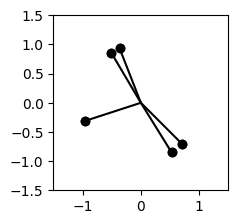

In [ ]:
utils.plot_features_in_2d(
    W_normed.unsqueeze(0),  # shape [instances=1 d_hidden=2 features=5]
)

Compare this plot to the `imshow` plot above, and make sure you understand what's going on here (and how the two plots relate to each other). A lot of the subsequent exercises run with this idea of a geometric interpretation of the model's features and bottleneck dimensions.

<details>
<summary>Help - I'm confused about how these plots work.</summary>

As mentioned, you can view $W$ as being a set of five 2D vectors, one for each of our five features. The heatmap shows us the cosine similarities between each pair of these vectors, and the second plot shows us these five vectors in 2D space.

In the example above, we can see two pairs of vectors (the 1st & 2nd, and the 0th & 4th) have very high cosine similarity. This is reflected in the 2D plot, where these features are very close to each other (the 0th feature is the darkest color, the 4th feature is the lightest).

</details>

### Defining our model

Below is some code for your model (with most methods not filled out yet). It should be familiar to you if you've already built simple neural networks earlier in this course.

Some notes on the initialization method, which is filled out for you:

#### Weights & instances

The `Config` class has an `n_inst` class. This is so we can optimize multiple models at once in a single training loop (this'll be useful later on). You should treat this as basically like a batch dimension for your weights: each of your weights/biases will actually be `n_inst` separate weights/biases stacked along the zeroth dimension, and each of these will be trained independently, on different data, in parallel (using the same optimizer).

We initialize weights `W` and `b_final`, which correspond to $W$ and $b$ in the Anthropic paper.

#### Sparsity & Importance

The `feature_probability` argument tells us the probability that any given feature will be active. We have the relation  `feature_probability = 1 - sparsity`. We'll often be dealing with very small feature probabilities $p = 1 - S \approx 0$, i.e. sparsities close to 1. The feature probability is used to generate our training data; the importance is used in our loss function (see later for both of these). The default is `feature_probability = 0.01`, i.e. each feaure is present with probability 1%.

The `importance` argument is used when calculating loss (see later exercise). The default is `importance = None` which results in uniform importance.

In the `__init__` method, we have code to broadcast `feature_probability` and `importance`, so that by the end they both always have shape `(n_inst, n_features)`.

### Exercise - implement `forward`

> ```yaml
> Difficulty: 🔴🔴⚪⚪⚪
> Importance: 🔵🔵🔵⚪⚪
>
> You should spend up to 10-20 minutes on this exercise.
> ```

For now, you just need to fill in the `forward` method. As the exercises go on, you'll fill in some more of these functions, but for now you can ignore the others.

In [ ]:
def linear_lr(step, steps):
    return 1 - (step / steps)


def constant_lr(*_):
    return 1.0


def cosine_decay_lr(step, steps):
    return np.cos(0.5 * np.pi * step / (steps - 1))


@dataclass
class ToyModelConfig:
    # We optimize n_inst models in a single training loop to let us sweep over sparsity or importance
    # curves efficiently. You should treat the number of instances `n_inst` like a batch dimension,
    # but one which is built into our training setup. Ignore the latter 3 arguments for now, they'll
    # return in later exercises.
    n_inst: int
    n_features: int = 5
    d_hidden: int = 2
    n_correlated_pairs: int = 0
    n_anticorrelated_pairs: int = 0
    feat_mag_distn: Literal["unif", "normal"] = "unif"


class ToyModel(nn.Module):
    W: Float[Tensor, "inst d_hidden feats"]
    b_final: Float[Tensor, "inst feats"]

    # Our linear map (for a single instance) is x -> ReLU(W.T @ W @ x + b_final)

    def __init__(
        self,
        cfg: ToyModelConfig,
        feature_probability: float | Tensor = 0.01,
        importance: float | Tensor = 1.0,
        device=device,
    ):
        super(ToyModel, self).__init__()
        self.cfg = cfg

        if isinstance(feature_probability, float):
            feature_probability = t.tensor(feature_probability)
        self.feature_probability = feature_probability.to(device).broadcast_to((cfg.n_inst, cfg.n_features))
        if isinstance(importance, float):
            importance = t.tensor(importance)
        self.importance = importance.to(device).broadcast_to((cfg.n_inst, cfg.n_features))

        self.W = nn.Parameter(nn.init.xavier_normal_(t.empty((cfg.n_inst, cfg.d_hidden, cfg.n_features))))
        self.b_final = nn.Parameter(t.zeros((cfg.n_inst, cfg.n_features)))
        self.to(device)

    def forward(
        self,
        features: Float[Tensor, "... inst feats"],
    ) -> Float[Tensor, "... inst feats"]:
        """
        Performs a single forward pass. For a single instance, this is given by:
            x -> ReLU(W.T @ W @ x + b_final)
        """
        raise NotImplementedError()

    def generate_batch(self, batch_size: int) -> Float[Tensor, "batch inst feats"]:
        """
        Generates a batch of data of shape (batch_size, n_instances, n_features).
        """
        # You'll fill this in later
        raise NotImplementedError()

    def calculate_loss(
        self,
        out: Float[Tensor, "batch inst feats"],
        batch: Float[Tensor, "batch inst feats"],
    ) -> Float[Tensor, ""]:
        """
        Calculates the loss for a given batch (as a scalar tensor), using this loss described in the
        Toy Models of Superposition paper:

            https://transformer-circuits.pub/2022/toy_model/index.html#demonstrating-setup-loss

        Note, `self.importance` is guaranteed to broadcast with the shape of `out` and `batch`.
        """
        # You'll fill this in later
        raise NotImplementedError()

    def optimize(
        self,
        batch_size: int = 1024,
        steps: int = 5_000,
        log_freq: int = 50,
        lr: float = 1e-3,
        lr_scale: Callable[[int, int], float] = constant_lr,
    ):
        """
        Optimizes the model using the given hyperparameters.
        """
        optimizer = t.optim.Adam(self.parameters(), lr=lr)

        progress_bar = tqdm(range(steps))

        for step in progress_bar:
            # Update learning rate
            step_lr = lr * lr_scale(step, steps)
            for group in optimizer.param_groups:
                group["lr"] = step_lr

            # Optimize
            optimizer.zero_grad()
            batch = self.generate_batch(batch_size)
            out = self(batch)
            loss = self.calculate_loss(out, batch)
            loss.backward()
            optimizer.step()

            # Display progress bar
            if step % log_freq == 0 or (step + 1 == steps):
                progress_bar.set_postfix(loss=loss.item() / self.cfg.n_inst, lr=step_lr)


tests.test_model(ToyModel)

NotImplementedError: 

<details><summary>Solution</summary>

```python
def forward(
    self,
    features: Float[Tensor, "... inst feats"],
) -> Float[Tensor, "... inst feats"]:
    """
    Performs a single forward pass. For a single instance, this is given by:
        x -> ReLU(W.T @ W @ x + b_final)
    """
    h = einops.einsum(
        features, self.W, "... inst feats, inst hidden feats -> ... inst hidden"
    )
    out = einops.einsum(
        h, self.W, "... inst hidden, inst hidden feats -> ... inst feats"
    )
    return F.relu(out + self.b_final)
```

</details>

### Exercise - implement `generate_batch`

> ```yaml
> Difficulty: 🔴🔴🔴⚪⚪
> Importance: 🔵🔵🔵⚪⚪
>
> You should spend up to 10-15 minutes on this exercise.
> ```

Next, you should implement the function `generate_batch` above. This should return a tensor of shape `(n_batch, instances, features)`, where:

* The `instances` and `features` values are taken from the model config,
* Each feature is present with probability `self.feature_probability`,
* For each present feature, its **magnitude** is sampled from a uniform distribution between 0 and 1.

Make sure you understand this function well (we recommend looking at the solutions even after you pass the tests), because we'll be making more complicated versions of this function in the section on correlations.

Remember, you can assume `model.feature_probability` has shape `(n_inst, n_features)`.

When you've implemented this function, run the code below to test it.

In [ ]:
# Go back up and edit your `ToyModel.generate_batch` method, then run the test below

tests.test_generate_batch(ToyModel)

<details><summary>Solution</summary>

```python
def generate_batch(self: ToyModel, batch_size: int) -> Float[Tensor, "batch inst feats"]:
    """
    Generates a batch of data of shape (batch_size, n_instances, n_features).
    """
    batch_shape = (batch_size, self.cfg.n_inst, self.cfg.n_features)
    feat_mag = t.rand(batch_shape, device=self.W.device)
    feat_seeds = t.rand(batch_shape, device=self.W.device)
    return t.where(feat_seeds <= self.feature_probability, feat_mag, 0.0)


ToyModel.generate_batch = generate_batch

tests.test_generate_batch(ToyModel)
```
</details>

## Training our model

The details of training aren't very conceptually important, so we've given you most of the code for this (in the `optimize` method). We use **learning rate schedulers** to control the learning rate as the model trains - you'll use this later on during the RL chapter.

### Exercise - implement `calculate_loss`

> ```yaml
> Difficulty: 🔴🔴⚪⚪⚪
> Importance: 🔵🔵🔵⚪⚪
>
> You should spend up to 5-10 minutes on this exercise.
> ```

You should fill in the `calculate_loss` function below. The loss function **for a single instance** is given by:

$$
L=\frac{1}{BF}\sum_x \sum_i I_i\left(x_i-x_i^{\prime}\right)^2
$$

where:

* $B$ is the batch size,
* $F$ is the number of features,
* $x_i$ are the inputs and $x_i'$ are the model's outputs,
* $I_i$ is the importance of feature $i$,
* $\sum_i$ is a sum over features,
* $\sum_x$ is a sum over the elements in the batch.

For the general case, we sum this formula over all instances.

<details>
<summary>Question - why do you think we take the mean over the feature and batch dimensions, but we sum over the instances dimension?</summary>

We take the mean over batch size because this is standard for loss functions (and means we don't have to use a different learning rate for different batch sizes).

We take the mean over the feature dimension because that's [normal for MSE loss](https://pytorch.org/docs/stable/generated/torch.nn.MSELoss.html).

We sum over the instances dimension because we want to train each instance independently, and at the same rate as we would train a single instance.

</details>

In [ ]:
# Go back up and edit your `ToyModel.calculate_loss` method, then run the test below

tests.test_calculate_loss(ToyModel)

<details><summary>Solution</summary>

```python
def calculate_loss(
    self: ToyModel,
    out: Float[Tensor, "batch inst feats"],
    batch: Float[Tensor, "batch inst feats"],
) -> Float[Tensor, ""]:
    """
    Calculates the loss for a given batch, using this loss described in the Toy Models paper:

        https://transformer-circuits.pub/2022/toy_model/index.html#demonstrating-setup-loss

    Remember, `self.importance` will always have shape (n_inst, n_features).
    """
    error = self.importance * ((batch - out) ** 2)
    loss = einops.reduce(error, "batch inst feats -> inst", "mean").sum()
    return loss


ToyModel.calculate_loss = calculate_loss

tests.test_calculate_loss(ToyModel)
```
</details>

Now, we'll reproduce a version of the figure from the introduction. A few notes:

* The `importance` argument is the same for all instances. It takes values between 1 and ~0.66 for each feature (so for every instance, there will be some features which are more important than others).
* The `feature_probability` is the same for all features, but it varies across instances. In other words, we're runnning several different experiments at once, and we can compare the effect of having larger feature sparsity in these experiments.

In [ ]:
cfg = ToyModelConfig(n_inst=8, n_features=5, d_hidden=2)

# importance varies within features for each instance
importance = 0.9 ** t.arange(cfg.n_features)

# sparsity is the same for all features in a given instance, but varies over instances
feature_probability = 50 ** -t.linspace(0, 1, cfg.n_inst)

line(
    importance,
    width=600,
    height=400,
    title="Importance of each feature (same over all instances)",
    labels={"y": "Feature importance", "x": "Feature"},
)
line(
    feature_probability,
    width=600,
    height=400,
    title="Feature probability (varied over instances)",
    labels={"y": "Probability", "x": "Instance"},
)

model = ToyModel(
    cfg=cfg,
    device=device,
    importance=importance[None, :],
    feature_probability=feature_probability[:, None],
)
model.optimize()

In [ ]:
utils.plot_features_in_2d(
    model.W,
    colors=model.importance,
    title=f"Superposition: {cfg.n_features} features represented in 2D space",
    subplot_titles=[f"1 - S = {i:.3f}" for i in feature_probability.squeeze()],
)

### Exercise - interpret these diagrams

> ```yaml
> Difficulty: 🔴🔴🔴⚪⚪
> Importance: 🔵🔵🔵🔵⚪
>
> You should spend up to 10-20 minutes on this exercise.
> ```

Remember that for all these diagrams, the darker colors have lower importance and the lighter colors have higher importance. Also, the sparsity of all features is increasing as we move from left to right (at the far left there is no sparsity, at the far right feature probability is 5% for all features, i.e. sparsity of 95%).

<details>
<summary>Hint</summary>

For low sparsity, think about what the model would learn to do if all 5 features were present all the time. What's the best our model could do in this case, and how does that relate to the **importance** values?

For high sparsity, think about what the model would learn to do if there was always exactly one feature present. Does this make interference between features less of a problem?
</details>

<details>
<summary>Answer (intuitive)</summary>

When there is no sparsity, the model can never represent more than 2 features faithfully, so it makes sense for it to only represent the two most important features. It stores them orthogonally in 2D space, and sets the other 3 features to zero. This way, it can reconstruct these two features perfectly, and ignores all the rest.

When there is high sparsity, we get a pentagon structure. Most of the time at most one of these five features will be active, which helps avoid **interference** between features. When we try to recover our initial features by projecting our point in 2D space onto these five directions, most of the time when feature $i$ is present, we can be confident that our projection onto the $i$-th feature direction only captures this feature, rather than being affected by the presence of other features. We omit the mathematical details here.

<img src="https://raw.githubusercontent.com/info-arena/ARENA_img/main/img/ch13-sparsity-diagram-tms.png" width="900">

The key idea here is that two forces are competing in our model: **feature benefit** (representing more thing is good!), and **interference** (representing things non-orthogonally is bad). The higher the sparsity, the more we can reduce the negative impact of interference, and so the trade-off skews towards "represent more features, non-orthogonally".

</details>


We can also generate a batch and visualise its embedding. Most interestingly, you should see that in the plots with high sparsity (to the right), we very rarely have interference between the five features, because most often $\leq 1$ of those features is present, and the model can recover it by projecting along the corresponding feature dimension without losing any information.

In [ ]:
with t.inference_mode():
    batch = model.generate_batch(200)
    hidden = einops.einsum(
        batch,
        model.W,
        "batch instances features, instances hidden features -> instances hidden batch",
    )

utils.plot_features_in_2d(hidden, title="Hidden state representation of a random batch of data")

### Visualizing features across varying sparsity

Now that we've got our pentagon plots and started to get geometric intuition for what's going on, let's scale things up! We're now operating in dimensions too large to visualise, but hopefully our intuitions will carry over.

In [ ]:
cfg = ToyModelConfig(n_inst=10, n_features=100, d_hidden=20)

importance = 100 ** -t.linspace(0, 1, cfg.n_features)
feature_probability = 20 ** -t.linspace(0, 1, cfg.n_inst)

line(
    importance,
    width=600,
    height=400,
    title="Importance of each feature (same over all instances)",
    labels={"y": "Feature importance", "x": "Feature"},
)
line(
    feature_probability,
    width=600,
    height=400,
    title="Feature probability (varied over instances)",
    labels={"y": "Probability", "x": "Instance"},
)

model = ToyModel(
    cfg=cfg,
    device=device,
    importance=importance[None, :],
    feature_probability=feature_probability[:, None],
)
model.optimize()

Because we can't plot features in 2D anymore, we're going to use a different kind of visualisation:

* The **bottom row plots** shows a bar graph of all the features and their corresponding embedding norms $||W_i||$.
    * As we increase sparsity, the model is able to represent more features (i.e. we have more features with embedding norms close to 1).
    * We also color the bars according to whether they're orthogonal to other features (purple) or not (yellow). So we can see that for low sparsity most features are represented orthogonally (like our left-most plots above) but as we increase sparsity we transition to all features being represented non-orthogonally (like our right-most pentagon plots above).
* The **top row plots** show us the dot products between all pairs of feature vectors (kinda like the heatmaps we plotted at the start of this section).
    * This is another way of visualising the increasing interference between features as we increase sparsity.
    * Note that all these right hand plots represent **matrices with rank at most `d_hidden=20`**. The first few are approximately submatrices of the identity (because we perfectly reconstruct 20 features and delete the rest), but the later plots start to display inference as we plot more than 20 values (the diagonals of these matrices have more than 20 non-zero elements).

See the section [Basic Results](https://transformer-circuits.pub/2022/toy_model/index.html#demonstrating-basic-results) for more of an explanation of this graph and what you should interpret from it.

In [ ]:
utils.plot_features_in_Nd(
    model.W,
    height=800,
    width=1600,
    title="ReLU output model: n_features = 100, d_hidden = 20, I<sub>i</sub> = 0.9<sup>i</sup>",
    subplot_titles=[f"Feature prob = {i:.3f}" for i in feature_probability],
)

## SAEs for Toy Models

We now move on to sparse autoencoders, a recent line of work that has been explored by Anthropic in their [recent paper](https://transformer-circuits.pub/2023/monosemantic-features/index.html), and is currently one of the most interesting areas of research in mechanistic interpretability.

In the following set of exercises, you will:

- Build your own sparse autoencoder, writing its architecture & loss function,
- Train your SAE on the hidden activations of the `Model` class which you defined earlier (note the difference between this and the Anthropic paper's setup, since the latter trained SAEs on the MLP layer, whereas we're training it on a non-privileged basis),
- Extract the features from your SAE, and verify that these are the same as your model's learned features.

You should read Anthropic's dictionary learning paper (linked above): the introduction and first section (problem setup) up to and including the "Sparse Autoencoder Setup" section. Make sure you can answer at least the following questions:

<details>
<summary>What is an autoencoder, and what is it trained to do?</summary>

Autoencoders are a type of neural network which learns efficient encodings / representations of unlabelled data. It is trained to compress the input in some way to a **latent representation**, then map it back into the original input space. It is trained by minimizing the reconstruction loss between the input and the reconstructed input.

The "encoding" part usually refers to the latent space being lower-dimensional than the input. However, that's not always the case, as we'll see with sparse autoencoders.

<img src="https://raw.githubusercontent.com/chloeli-15/ARENA_img/main/img/sae-diagram-2.png" width="900">

</details>

<details>
<summary>Why is the hidden dimension of our autoencoder larger than the number of activations, when we train an SAE on an MLP layer?</summary>

As mentioned in the previous dropdown, usually the latent vector is a compressed representation of the input because it's lower-dimensional. However, it can still be a compressed representation even if it's higher dimensional, if we enforce a sparsity constraint on the latent vector (which in some sense reduces its effective dimensionality).

As for why we do this specifically for our autoencoder use case, it's because we're trying to recover features from superposition, in cases where there are **more features than neurons**. We're hoping our autoencoder learns an **overcomplete feature basis**.

</details>

<details>
<summary>Why does the L1 penalty encourage sparsity? (This isn't specifically mentioned in this paper, but it's an important thing to understand.)</summary>

Unlike $L_2$ penalties, the $L_1$ penalty actually pushes values towards zero. This is a well-known result in statistics, best illustrated below:

<img src="https://raw.githubusercontent.com/info-arena/ARENA_img/main/misc/l1-viz.png" width="450">

See [this Google ML page](https://developers.google.com/machine-learning/crash-course/regularization-for-sparsity/l1-regularization) for more of an explanation (it also has a nice out-of-context animation!).

</details>

A final note - if you're just interested in learning enough about SAEs to move on to the sections on language model SAEs, then we recommend you only go up to the first exercise on neuron resampling and stop there - any more is likely to be more into the weeds than you really need.

### Problem setup

Recall the setup of our previous model:

$$
\begin{aligned}
h &= W x \\
x' &= \operatorname{ReLU}(W^T h + b)
\end{aligned}
$$

We're going to train our autoencoder to just take in the hidden state activations $h$, map them to a larger (overcomplete) hidden state $z$, then reconstruct the original hidden state $h$ from $z$.

$$
\begin{aligned}
z &= \operatorname{ReLU}(W_{enc}(h - b_{dec}) + b_{enc}) \\
h' &= W_{dec}z + b_{dec}
\end{aligned}
$$

Note the choice to have a different encoder and decoder weight matrix, rather than having them tied - we'll discuss this more later.

It's important not to get confused between the autoencoder and model's notation. Remember - the model takes in features $x$, maps them to **lower-dimensional** vectors $h$, and then reconstructs them as $x'$. The autoencoder takes in these hidden states $h$, maps them to a **higher-dimensional but sparse** vector $z$, and then reconstructs them as $h'$. Our hope is that the elements of $z$ correspond to the features of $x$.

Another note - the use of $b_{dec}$ here might seem weird, since we're subtracting it at the start then adding it back at the end. The way we're treating this term is as a **centralizing term for the hidden states**. It subtracts some learned mean vector from them so that $W_{enc}$ can act on centralized vectors, and then this term gets added back to the reconstructed hidden states at the end of the model.

### Notation

The autoencoder's hidden activations go by many names. Sometimes they're called **neurons** (since they do have an activation function applied to them which makes them a privileged basis, like the neurons in an MLP layer). Sometimes they're called **features**, since the idea with SAEs is that these hidden activations are meant to refer to specific features in the data. However, the word feature is a bit [overloaded](https://www.lesswrong.com/posts/9Nkb389gidsozY9Tf/lewis-smith-s-shortform#fd64ALuWK8rXdLKz6) - ideally we want to use "feature" to refer to the attributes of the data itself - if our SAE's weights are randomly initialized, is it fair to call this a feature?!

For this reason, we'll be referring to the autoencoder's hidden activations as **SAE latents**. However, it's worth noting that people sometimes use "SAE features" or "neurons" instead, so try not to get confused (e.g. often people use "neuron resampling" to refer to the resampling of the weights in the SAE).

The new notation we'll adopt in this section is:

- `d_sae`, which is the number of activations in the SAE's hidden layer (i.e. the latent dimension). Note that we want the SAE latents to correspond to the original data features, which is why we'll need `d_sae >= n_features` (usually we'll have equality in this section).
- `d_in`, which is the SAE input dimension. This is the same as `d_hidden` from the previous sections because the SAE is reconstructing the model's hidden activations, however calling it `d_hidden` in the context of an SAE would be confusing. Usually in this section, we'll have `d_in = d_hidden = 2`, so we can visualize the results.

<details>
<summary>Question - in the formulas above (in the "Problem setup" section), what are the shapes of x, x', z, h, and h' ?</summary>

Ignoring batch and instance dimensions:

- `x` and `x'` are vectors of shape `(n_features,)`
- `z` is a vector of shape `(d_sae,)`
- `h` and `h'` are vectors of shape `(d_in,)`, which is equal to `d_hidden` from previous sections

Including batch and instance dimensions, all shapes have extra leading dimensions `(batch_size, n_inst, d)`.

</details>

### SAE class

We've provided the `ToySAEConfig` class below. Its arguments are as follows (we omit the ones you'll only need to work with in later exercises):

- `n_inst`, which means the same as it does in your `ToyModel` class
- `d_in`, the input size to your SAE (equal to `d_hidden` of your `ToyModel` class)
- `d_sae`, the SAE's latent dimension size
- `sparsity_coeff`, which is used in your loss function
- `weight_normalize_eps`, which is added to the denominator whenever you normalize weights
- `tied_weights`, which is a boolean determining whether your encoder and decoder weights are tied
- `ste_epsilon`, which is only relevant for JumpReLU SAEs later on

We've also given you the `ToySAE` class. Your job over the next 4 exercises will be to fill in the `__init__`, `W_dec_normalized`, `generate_batch` and `forward` methods.

In [ ]:
@dataclass
class ToySAEConfig:
    n_inst: int
    d_in: int
    d_sae: int
    sparsity_coeff: float = 0.2
    weight_normalize_eps: float = 1e-8
    tied_weights: bool = False
    ste_epsilon: float = 0.01


class ToySAE(nn.Module):
    W_enc: Float[Tensor, "inst d_in d_sae"]
    _W_dec: Float[Tensor, "inst d_sae d_in"] | None
    b_enc: Float[Tensor, "inst d_sae"]
    b_dec: Float[Tensor, "inst d_in"]

    def __init__(self, cfg: ToySAEConfig, model: ToyModel) -> None:
        super(ToySAE, self).__init__()

        assert cfg.d_in == model.cfg.d_hidden, "Model's hidden dim doesn't match SAE input dim"
        self.cfg = cfg
        self.model = model.requires_grad_(False)
        self.model.W.data[1:] = self.model.W.data[0]
        self.model.b_final.data[1:] = self.model.b_final.data[0]

        self.to(device)

    @property
    def W_dec(self) -> Float[Tensor, "inst d_sae d_in"]:
        return self._W_dec if self._W_dec is not None else self.W_enc.transpose(-1, -2)

    @property
    def W_dec_normalized(self) -> Float[Tensor, "inst d_sae d_in"]:
        """
        Returns decoder weights, normalized over the autoencoder input dimension.
        """
        # You'll fill this in later
        raise NotImplementedError()

    def generate_batch(self, batch_size: int) -> Float[Tensor, "batch inst d_in"]:
        """
        Generates a batch of hidden activations from our model.
        """
        # You'll fill this in later
        raise NotImplementedError()

    def forward(
        self, h: Float[Tensor, "batch inst d_in"]
    ) -> tuple[
        dict[str, Float[Tensor, "batch inst"]],
        Float[Tensor, "batch inst"],
        Float[Tensor, "batch inst d_sae"],
        Float[Tensor, "batch inst d_in"],
    ]:
        """
        Forward pass on the autoencoder.

        Args:
            h: hidden layer activations of model

        Returns:
            loss_dict:       dict of different loss terms, each dict value having shape (batch_size, n_inst)
            loss:            total loss (i.e. sum over terms of loss dict), same shape as loss_dict values
            acts_post:       autoencoder latent activations, after applying ReLU
            h_reconstructed: reconstructed autoencoder input
        """
        # You'll fill this in later
        raise NotImplementedError()

    def optimize(
        self,
        batch_size: int = 1024,
        steps: int = 10_000,
        log_freq: int = 100,
        lr: float = 1e-3,
        lr_scale: Callable[[int, int], float] = constant_lr,
        resample_method: Literal["simple", "advanced", None] = None,
        resample_freq: int = 2500,
        resample_window: int = 500,
        resample_scale: float = 0.5,
        hidden_sample_size: int = 256,
    ) -> list[dict[str, Any]]:
        """
        Optimizes the autoencoder using the given hyperparameters.

        Args:
            model:              we reconstruct features from model's hidden activations
            batch_size:         size of batches we pass through model & train autoencoder on
            steps:              number of optimization steps
            log_freq:           number of optimization steps between logging
            lr:                 learning rate
            lr_scale:           learning rate scaling function
            resample_method:    method for resampling dead latents
            resample_freq:      number of optimization steps between resampling dead latents
            resample_window:    number of steps needed for us to classify a neuron as dead
            resample_scale:     scale factor for resampled neurons
            hidden_sample_size: size of hidden value sample we add to the logs (for eventual visualization)

        Returns:
            data_log:           dictionary containing data we'll use for visualization
        """
        assert resample_window <= resample_freq

        optimizer = t.optim.Adam(self.parameters(), lr=lr)  # betas=(0.0, 0.999)
        frac_active_list = []
        progress_bar = tqdm(range(steps))

        # Create lists of dicts to store data we'll eventually be plotting
        data_log = []

        for step in progress_bar:
            # Resample dead latents
            if (resample_method is not None) and ((step + 1) % resample_freq == 0):
                frac_active_in_window = t.stack(frac_active_list[-resample_window:], dim=0)
                if resample_method == "simple":
                    self.resample_simple(frac_active_in_window, resample_scale)
                elif resample_method == "advanced":
                    self.resample_advanced(frac_active_in_window, resample_scale, batch_size)

            # Update learning rate
            step_lr = lr * lr_scale(step, steps)
            for group in optimizer.param_groups:
                group["lr"] = step_lr

            # Get a batch of hidden activations from the model
            with t.inference_mode():
                h = self.generate_batch(batch_size)

            # Optimize
            loss_dict, loss, acts, _ = self.forward(h)
            loss.mean(0).sum().backward()
            optimizer.step()
            optimizer.zero_grad()

            # Normalize decoder weights by modifying them directly (if not using tied weights)
            if not self.cfg.tied_weights:
                self.W_dec.data = self.W_dec_normalized.data

            # Calculate the mean sparsities over batch dim for each feature
            frac_active = (acts.abs() > 1e-8).float().mean(0)
            frac_active_list.append(frac_active)

            # Display progress bar, and log a bunch of values for creating plots / animations
            if step % log_freq == 0 or (step + 1 == steps):
                progress_bar.set_postfix(
                    lr=step_lr,
                    loss=loss.mean(0).sum().item(),
                    frac_active=frac_active.mean().item(),
                    **{k: v.mean(0).sum().item() for k, v in loss_dict.items()},  # type: ignore
                )
                with t.inference_mode():
                    loss_dict, loss, acts, h_r = self.forward(h := self.generate_batch(hidden_sample_size))
                data_log.append(
                    {
                        "steps": step,
                        "frac_active": (acts.abs() > 1e-8).float().mean(0).detach().cpu(),
                        "loss": loss.detach().cpu(),
                        "h": h.detach().cpu(),
                        "h_r": h_r.detach().cpu(),
                        **{name: param.detach().cpu() for name, param in self.named_parameters()},
                        **{name: loss_term.detach().cpu() for name, loss_term in loss_dict.items()},
                    }
                )

        return data_log

    @t.no_grad()
    def resample_simple(
        self,
        frac_active_in_window: Float[Tensor, "window inst d_sae"],
        resample_scale: float,
    ) -> None:
        """
        Resamples dead latents, by modifying the model's weights and biases inplace.

        Resampling method is:
            - For each dead neuron, generate a random vector of size (d_in,), and normalize these vectors
            - Set new values of W_dec and W_enc to be these normalized vectors, at each dead neuron
            - Set b_enc to be zero, at each dead neuron
        """
        raise NotImplementedError()

    @t.no_grad()
    def resample_advanced(
        self,
        frac_active_in_window: Float[Tensor, "window inst d_sae"],
        resample_scale: float,
        batch_size: int,
    ) -> None:
        """
        Resamples latents that have been dead for `dead_feature_window` steps, according to `frac_active`.

        Resampling method is:
            - Compute the L2 reconstruction loss produced from the hidden state vectors `h`
            - Randomly choose values of `h` with probability proportional to their reconstruction loss
            - Set new values of W_dec and W_enc to be these (centered and normalized) vectors, at each dead neuron
            - Set b_enc to be zero, at each dead neuron
        """
        raise NotImplementedError()

### Exercise - implement `__init__`

> ```yaml
> Difficulty: 🔴⚪⚪⚪⚪
> Importance: 🔵🔵🔵⚪⚪
>
> You should spend up to 5-15 minutes on this exercise.
> ```

You should implement the `__init__` method below. This should define the weights `b_enc`, `b_dec`, `W_enc` and `_W_dec`. Use [Kaiming uniform](https://pytorch.org/docs/stable/nn.init.html#torch.nn.init.kaiming_uniform_) for weight initialization, and initialize the biases at zero.

Note, we use `_W_dec` to handle the case of tied weights: it should be `None` if we have tied weights, and a proper parameter if we don't have tied weights. The property `W_dec` we've given you in the class above will deal with both cases for you.

<details>
<summary>Why might we want / not want to tie our weights?</summary>

In our `Model` implementations, we used a weight and its transpose. You might think it also makes sense to have the encoder and decoder weights be transposed copies of each other, since intuitively both the encoder and decoder's latent vectors meant to represent some feature's "direction in the original model's hidden dimension".

The reason we might not want to tie weights is pretty subtle. The job of the encoder is in some sense to recover features from superposition, whereas the job of the decoder is just to represent that feature faithfully if present (since the goal of our SAE is to write the input as a linear combination of `W_dec` vectors) - this is why we generally see the decoder weights as the "true direction" for a feature, when weights are untied.

The diagram below might help illustrate this concept (if you want, you can replicate the results in this diagram using our toy model setup!).

<img src="https://raw.githubusercontent.com/info-arena/ARENA_img/main/misc/w-dec-explained.png" width="700">

In simple settings like this toy model we might not benefit much from untying weights, and tying weights can actually help us avoid finding annoying local minima in our optimization. However, for most of these exercises we'll use untied weights in order to illustrate SAE concepts more clearly.

</details>

Also, note that we've defined `self.cfg` and `self.model` for you in the init function - in the latter case, we've frozen the model's weights (because when you train your SAE you don't want to track gradients in your base model), and we've also modified the model's weights so they all match the first instance (this is so we can more easily interpret our SAE plots we'll create when we finish training).

In [ ]:
# Go back up and edit your `ToySAE.__init__` method, then run the test below

tests.test_sae_init(ToySAE)

<details><summary>Solution</summary>

```python
def __init__(self: ToySAE, cfg: ToySAEConfig, model: ToyModel) -> None:
    super(ToySAE, self).__init__()

    assert cfg.d_in == model.cfg.d_hidden, "Model's hidden dim doesn't match SAE input dim"
    self.cfg = cfg
    self.model = model.requires_grad_(False)
    self.model.W.data[1:] = self.model.W.data[0]
    self.model.b_final.data[1:] = self.model.b_final.data[0]

    self.W_enc = nn.Parameter(nn.init.kaiming_uniform_(t.empty((cfg.n_inst, cfg.d_in, cfg.d_sae))))
    self._W_dec = (
        None
        if self.cfg.tied_weights
        else nn.Parameter(nn.init.kaiming_uniform_(t.empty((cfg.n_inst, cfg.d_sae, cfg.d_in))))
    )
    self.b_enc = nn.Parameter(t.zeros(cfg.n_inst, cfg.d_sae))
    self.b_dec = nn.Parameter(t.zeros(cfg.n_inst, cfg.d_in))

    self.to(device)


ToySAE.__init__ = __init__

tests.test_sae_init(ToySAE)
```
</details>

### Exercise - implement `W_dec_normalized`

> ```yaml
> Difficulty: 🔴⚪⚪⚪⚪
> Importance: 🔵🔵🔵⚪⚪
>
> You should spend 5-10 minutes on this exercise.
> ```

You should now fill in the `W_dec_normalized` property, which returns the decoder weights, normalized (with L2 norm) over the autoencoder input dimension. Note that the existence of the `W_dec` property means you can safety refer to this attribute, without having to worry about `_W_dec` any more. Also, remember to add `cfg.weight_normalize_eps` to your denominator (this helps avoid divide-by-zero errors).

<details>
<summary>Why do we need <code>W_dec_normalized</code>?</summary>

We normalize `W_dec` to stop the model from cheating! Imagine if we didn't normalize `W_dec` - the model could make `W_enc` 10 times smaller, and make `W_dec` 10 times larger. The outputs would be the same (keeping the reconstruction error constant), but the latent activations would be 10 times smaller, letting the model shrink the sparsity penalty (the L1 loss term) without learning anything useful.

L2-normalizing the columns of `W_dec` also makes the magnitude of our latent activations more clearly interpretable: with normalization, they answer the question "how much of each unit-length feature is present?"

</details>

In [ ]:
# Go back up and edit your `ToySAE.W_dec_normalized` method, then run the test below

tests.test_sae_W_dec_normalized(ToySAE)

<details><summary>Solution</summary>

```python
@property
def W_dec_normalized(self: ToySAE) -> Float[Tensor, "inst d_sae d_in"]:
    """Returns decoder weights, normalized over the autoencoder input dimension."""
    return self.W_dec / (self.W_dec.norm(dim=-1, keepdim=True) + self.cfg.weight_normalize_eps)


ToySAE.W_dec_normalized = W_dec_normalized
```
</details>

### Exercise - implement `generate_batch`

> ```yaml
> Difficulty: 🔴🔴⚪⚪⚪
> Importance: 🔵🔵🔵⚪⚪
>
> You should spend 5-15 minutes on this exercise.
> ```

As mentioned, our data no longer comes directly from `ToyModel.generate_batch`. Instead, we use `Model.generate_batch` to get our model input $x$, and then apply our model's `W` matrix to get its hidden activations $h=Wx$. Note that we're working with the model from the "Superposition in a Nonprivileged Basis" model, meaning there's no ReLU function to apply to get $h$.

You should fill in the `generate_batch` method now, then run the test. Note - remember to use `self.model` rather than `model`!

In [ ]:
# Go back up and edit your `ToySAE.generate_batch` method, then run the test below

tests.test_sae_generate_batch(ToySAE)

<details><summary>Solution</summary>

```python
def generate_batch(self: ToySAE, batch_size: int) -> Float[Tensor, "batch inst d_in"]:
    """
    Generates a batch of hidden activations from our model.
    """
    return einops.einsum(
        self.model.generate_batch(batch_size),
        self.model.W,
        "batch inst feats, inst d_in feats -> batch inst d_in",
    )


ToySAE.generate_batch = generate_batch
```
</details>

### Exercise - implement `forward`

> ```yaml
> Difficulty: 🔴🔴🔴⚪⚪
> Importance: 🔵🔵🔵🔵🔵
>
> You should spend up to 25-40 minutes on this exercise.
> ```

You should calculate the autoencoder's hidden state activations as $z = \operatorname{ReLU}(W_{enc}(h - b_{dec}) + b_{enc})$, and then reconstruct the output as $h' = W_{dec}z + b_{dec}$. A few notes:

- The **first variable** we return is a `loss_dict`, which contains the loss tensors of shape `(batch_size, n_inst)` for both terms in our loss function (before multiplying by the L1 coefficient). This is used for logging, and it'll also be used later in our neuron resampling methods. For this architecture, your keys should be `"L_reconstruction"` and `"L_sparsity"`.
- The **second variable** we return is the `loss` term, which also has shape `(batch_size, n_inst)`, and is created by summing the losses in `loss_dict` (with sparsity loss multiplied by `cfg.sparsity_coeff`). When doing gradient descent, we'll average over the batch dimension & sum over the instance dimension (since we're training our instances independently & in parallel).
- The **third variable** we return is the hidden state activations `acts`, which are also used later for neuron resampling (as well as logging how many latents are active).
- The **fourth variable** we return is the reconstructed hidden states `h_reconstructed`, i.e. the autoencoder's actual output.

An important note regarding our loss term - the reconstruction loss is the squared difference between input & output **averaged** over the `d_in` dimension, but the sparsity penalty is the L1 norm of the hidden activations **summed** over the `d_sae` dimension. Can you see why we average one but sum the other?

<details>
<summary>Hint</summary>

Suppose we averaged L1 loss too. Consider the gradients a single latent receives from the reconstruction loss and sparsity penalty - what do they look like in the limit of very large `d_sae`?

</details>

<details>
<summary>Answer - why we average L2 loss over <code>d_in</code> but sum L1 loss over <code>d_sae</code></summary>

Suppose for sake of argument we averaged L1 loss too. Imagine if we doubled the latent dimension, but kept all other SAE hyperparameters the same. The per-hidden-unit gradient from the reconstruction loss would still be the same (because changing a single hidden unit's encoder or decoder vector would have the same effect on the output as before), but the per-hidden-unit gradient from the sparsity penalty would have halved (because we're averaging the sparsity penalty over `d_sae`). This means that in the limit, the sparsity penalty wouldn't matter at all, and the only important thing would be getting zero reconstruction loss.

</details>

Note - make sure you're using `self.W_dec_normalized` rather than `self.W_dec` in your forward function. This is because if we're using tied weights then we won't be able to manually normalize `W_dec` inplace, but we still want to use the normalized version.

In [ ]:
# Go back up and edit your `ToySAE.forward` method, then run the test below

tests.test_sae_forward(ToySAE)

<details><summary>Solution</summary>

```python
def forward(
    self: ToySAE, h: Float[Tensor, "batch inst d_in"]
) -> tuple[
    dict[str, Float[Tensor, "batch inst"]],
    Float[Tensor, "batch inst"],
    Float[Tensor, "batch inst d_sae"],
    Float[Tensor, "batch inst d_in"],
]:
    """
    Forward pass on the autoencoder.

    Args:
        h: hidden layer activations of model

    Returns:
        loss_dict:       dict of different loss terms, each dict value having shape (batch_size, n_inst)
        loss:            total loss (i.e. sum over terms of loss dict), same shape as loss_dict values
        acts_post:       autoencoder latent activations, after applying ReLU
        h_reconstructed: reconstructed autoencoder input
    """
    h_cent = h - self.b_dec

    # Compute latent (hidden layer) activations
    acts_pre = einops.einsum(h_cent, self.W_enc, "batch inst d_in, inst d_in d_sae -> batch inst d_sae") + self.b_enc
    acts_post = F.relu(acts_pre)

    # Compute reconstructed input
    h_reconstructed = (
        einops.einsum(acts_post, self.W_dec_normalized, "batch inst d_sae, inst d_sae d_in -> batch inst d_in")
        + self.b_dec
    )

    # Compute loss terms
    L_reconstruction = (h_reconstructed - h).pow(2).mean(-1)
    L_sparsity = acts_post.abs().sum(-1)
    loss_dict = {"L_reconstruction": L_reconstruction, "L_sparsity": L_sparsity}
    loss = L_reconstruction + self.cfg.sparsity_coeff * L_sparsity

    return loss_dict, loss, acts_post, h_reconstructed


ToySAE.forward = forward
```
</details>

## Training your SAE

The `optimize` method has been given to you. A few notes on how it differs from your previous model:

- Before each optimization step, we implement **neuron resampling** - we'll get to this later.
- We have more logging, via the `data_log` dictionary - we'll use this for visualization.
- We've used `betas=(0.0, 0.999)`, to match the description in [Anthropic's Feb 2024 update](https://transformer-circuits.pub/2024/feb-update/index.html#dict-learning-loss) - although they document it to work better specifically for large models, we may as well match it here.

First, let's define and train our model, and visualize model weights and the data returned from `sae.generate_batch` (which are the hidden state representations of our trained model, and will be used for training our SAE).

Note that we'll use a feature probability of 2.5% (and assume independence between features) for all subsequent exercises.

In [ ]:
d_hidden = d_in = 2
n_features = d_sae = 5
n_inst = 16

# Create a toy model, and train it to convergence
cfg = ToyModelConfig(n_inst=n_inst, n_features=n_features, d_hidden=d_hidden)
model = ToyModel(cfg=cfg, device=device, feature_probability=0.025)
model.optimize()

sae = ToySAE(cfg=ToySAEConfig(n_inst=n_inst, d_in=d_in, d_sae=d_sae), model=model)

h = sae.generate_batch(512)

In [ ]:
utils.plot_features_in_2d(model.W[:8], title="Base model")
utils.plot_features_in_2d(
    einops.rearrange(h[:, :8], "batch inst d_in -> inst d_in batch"),
    title="Hidden state representation of a random batch of data",
)

Now, let's train our SAE, and visualize the instances with lowest loss! We've also created a function `animate_features_in_2d` which creates an animation of the training over time. If the inline displaying doesn't work, you might have to open the saved HTML file in your browser to see it.

In [ ]:
data_log = sae.optimize(steps=20_000)

utils.animate_features_in_2d(
    data_log,
    instances=list(range(8)),  # only plot the first 8 instances
    rows=["W_enc", "_W_dec"],
    filename=str(section_dir / "animation-training.html"),
    title="SAE on toy model",
)

# If this display code doesn't work, try opening the animation in your browser from where it gets saved
with open(section_dir / "animation-training.html") as f:
    display(HTML(f.read()))

In other words, the autoencoder is generally successful at reconstructing the model's hidden states, and maybe sometimes it learns the fully monosemantic solution (one latent per feature), but more often it learns a combination of **polysemantic latents** and **dead latents** (which never activate). These are a big problem because they don't receive any gradients during training, so they're not a problem which fixes itself over time. You can check the presence of dead latents by graphing the feature probabilities over training, in the code below. You should find that:

1. Some latents are dead for most or all of training (with "fraction of datapoints active" being zero),
2. Some latents fire more frequently than the target feature prob of 2.5% (these are usually polysemantic, i.e. they fire on more than one different feature),
3. Some latents fire approximately at or slightly below the target probability (these are usually monosemantic). If any of your instances above learned the full monosemantic solution (i.e. latents uniformly spaced around the 2D hidden dimension) then you should find that all 5 latents in that instance fall into this third category.

In [ ]:
utils.frac_active_line_plot(
    frac_active=t.stack([data["frac_active"] for data in data_log]),
    title="Probability of sae features being active during training",
    avg_window=20,
)

## Resampling

From Anthropic's paper (replacing terminology "dead neurons" with "dead latents" in accordance with how we're using the term):

> Second, we found that over the course of training some latents cease to activate, even across a large number of datapoints. We found that “resampling” these dead latents during training gave better results by allowing the model to represent more features for a given autoencoder hidden layer dimension. Our resampling procedure is detailed in [Autoencoder Resampling](https://transformer-circuits.pub/2023/monosemantic-features/index.html#appendix-autoencoder-resampling), but in brief we periodically check for latents which have not fired in a significant number of steps and reset the encoder weights on the dead latents to match data points that the autoencoder does not currently represent well.

Your next task is to implement this resampling procedure.

### Exercise - implement `resample_simple`

> ```yaml
> Difficulty: 🔴🔴🔴🔴⚪
> Importance: 🔵🔵⚪⚪⚪
>
> You should spend up to 20-30 minutes on this exercise, if you choose to do it.
> ```

The process Anthropic describes for resampling SAE latents is pretty involved, so we'll start by implementing a simpler version of it. Specifically, we'll implement the following algorithm for each instance `inst`:

* Find all the dead latents (i.e. the values `(inst, d)` where `frac_active_in_window[:, inst, d]` are all zero).
* For each of these, do the following:
    * Generate a new random vector `v` of length `d_in`.
    * Set the decoder weights `W_dec[inst, d, :]` to this new vector `v`, normalized.
    * Set the encoder weights `W_enc[inst, :, d]` to this new vector `v`, scaled to have norm `resample_scale`.
    * Set the encoder biases `b_enc[inst, d]` to zero.

The test function we've given you will check that your function replaces / zeros the correct weights.

In [ ]:
# Go back up and edit your `ToySAE.resample_simple` method, then run the test below

tests.test_resample_simple(ToySAE)

<details><summary>Solution</summary>

```python
@t.no_grad()
def resample_simple(
    self: ToySAE,
    frac_active_in_window: Float[Tensor, "window inst d_sae"],
    resample_scale: float,
) -> None:
    """
    Resamples dead latents, by modifying the model's weights and biases inplace.

    Resampling method is:
        - For each dead neuron, generate a random vector of size (d_in,), and normalize these vectors
        - Set new values of W_dec and W_enc to be these normalized vectors, at each dead neuron
        - Set b_enc to be zero, at each dead neuron

    This function performs resampling over all instances at once, using batched operations.
    """
    # Get a tensor of dead latents
    dead_latents_mask = (frac_active_in_window < 1e-8).all(dim=0)  # [instances d_sae]
    n_dead = int(dead_latents_mask.int().sum().item())

    # Get our random replacement values of shape [n_dead d_in], and scale them
    replacement_values = t.randn((n_dead, self.cfg.d_in), device=self.W_enc.device)
    replacement_values_normed = replacement_values / (
        replacement_values.norm(dim=-1, keepdim=True) + self.cfg.weight_normalize_eps
    )

    # Change the corresponding values in W_enc, W_dec, and b_enc
    self.W_enc.data.transpose(-1, -2)[dead_latents_mask] = resample_scale * replacement_values_normed
    self.W_dec.data[dead_latents_mask] = replacement_values_normed
    self.b_enc.data[dead_latents_mask] = 0.0


ToySAE.resample_simple = resample_simple
```
</details>

Once you've passed the tests, train your model again, and watch the animation to see how the neuron resampling has helped the training process. You should be able to see the resampled neurons in red.

In [ ]:
resampling_sae = ToySAE(cfg=ToySAEConfig(n_inst=n_inst, d_in=d_in, d_sae=d_sae), model=model)

resampling_data_log = resampling_sae.optimize(steps=20_000, resample_method="simple")

utils.animate_features_in_2d(
    resampling_data_log,
    rows=["W_enc", "_W_dec"],
    instances=list(range(8)),  # only plot the first 8 instances
    filename=str(section_dir / "animation-training-resampling.html"),
    color_resampled_latents=True,
    title="SAE on toy model (with resampling)",
)

utils.frac_active_line_plot(
    frac_active=t.stack([data["frac_active"] for data in resampling_data_log]),
    title="Probability of sae features being active during training",
    avg_window=20,
)

Much better!

Now that we have pretty much full reconstruction on our features, let's visualize that reconstruction! The `animate_features_in_2d` function also offers features to plot hidden state reconstructions and how they evolve over time. Examining how the hidden state reconstructions evolve over time can help you understand what's going on, for example:

- The SAE often learns a non-sparse solution (e.g. 4 uniformly spaced polysemantic latents & 1 dead latent) before converging to the ideal solution.
    - Note, we also see something similar when training SAEs on LLMs: they first find a non-sparse solution with small reconstruction loss, before learning a more sparse solution (L0 goes down).
- Hovering over hidden states, you should observe some things:
    - Low-magnitude hidden states are often reconstructed as zero, this is because the SAE can't separate them from interference from other features.
    - Even for correctly reconstructed features, the hidden state magnitude is generally smaller than the true hidden states - this is called **shrinkage**, and we'll discuss it extensively in the next section.

In [ ]:
utils.animate_features_in_2d(
    resampling_data_log,
    rows=["W_enc", "h", "h_r"],
    instances=list(range(4)),  # plotting fewer instances for a smaller animation file size
    color_resampled_latents=True,
    filename=str(section_dir / "animation-training-reconstructions.html"),
    title="SAE on toy model (showing hidden states & reconstructions)",
)

> Note - if you're interested in jumping straight to working with real SAEs, this is the point where we recommend you stop the exercises. The rest of this material focuses on more advanced methods for resampling, and a replication of DeepMind's Gated and JumpReLU SAEs which, while interesting, won't be a barrier for your further progress in the rest of the SAE material.

### Exercise - implement `resample_advanced`


> ```yaml
> Difficulty: 🔴🔴🔴🔴🔴
> Importance: 🔵⚪⚪⚪⚪
>
> You should spend up to 20-40 minutes on this exercise, if you choose to do it.
> ```

This section can be considered optional if you've already implemented the simpler version of `resample` above. However, if you're interested in a version of it which hues close to [Anthropic's methodology](https://transformer-circuits.pub/2023/monosemantic-features/index.html#appendix-autoencoder-resampling), then you might still be interested in this exercise.

The main difference we'll make is in how the resampled values are chosen. Rather than just drawing them randomly from a distribution and normalizing them, we'll be **sampling them with replacement from a set of input activations $h$, with sampling probabilities weighted by the squared $L_2$ loss of the autoencoder on each input**. Intuitively, this will make it more likely that our resampled neurons will represent feature directions that the autoencoder is currently doing a bad job of representing.

The new resampling algorithm looks like the following - for each instance we:

* Generate a batch of hidden data `h` from your SAE and compute its squared reconstruction loss `l2_squared`. It should have shape `(batch_size, n_inst)`. If the L2 loss for this instance `l2_squared[:, inst]` is zero everywhere, we can skip this instance.
* Find the dead latents for this instance (i.e. the instances `inst` and latent indices `d` where `frac_active_in_window[:, inst, d]` are all zero).
* For each of these, do the following:
    * Randomly sample a vector `v = h[x, inst, :]`, where `0 <= x < batch_size` is chosen according to the distribution with probabilities proportional to `l2_squared[:, inst]`.
    * Set the decoder weights `W_dec[inst, d, :]` to this new vector `v`, normalized.
    * Set the encoder weights `W_enc[inst, :, d]` to this new vector `v`, scaled to have norm `resample_scale * avg_W_enc_alive_norm` (where the term `avg_W_enc_alive_norm` is the mean norm of the encoder weights of alive neurons for that particular instance).
    * Set the encoder biases `b_enc[inst, d]` to zero.

So we really have just 2 changes: the added use of `avg_W_enc_alive_norm` for the encoder weights, and the sampling from the L2-based distribution to get our vectors `v`. Because this function can get a bit messy, we recommend you iterate through the instances rather than trying to resample them all at once.

For the sampling, we recommend that you use `torch.distributions.categorical.Categorical` to define a probability distribution, which can then be sampled from using the `sample` method. We've included an example of how to use this function below.

<details>
<summary>Example of using <code>Categorical</code>.</summary>

```python
from torch.distributions.categorical import Categorical

# Define a prob distn over (0, 1, 2, 3, 4) with probs proportional to (4, 3, 2, 1, 0)
values = t.arange(5).flip(0)
probs = values.float() / values.sum()
distribution = Categorical(probs = probs)

# Sample a single value from it
distribution.sample() # tensor(1)

# Sample multiple values with replacement (values will mostly be in the lower end of the range)
distribution.sample((10,)) # tensor([1, 1, 3, 0, 0, 1, 0, 3, 2, 2])
```

When you're sampling multiple times, make sure to pass a 1D tensor rather than a scalar.

</details>

Once you've implemented this resampling method, run the tests:

In [ ]:
# Go back up and edit your `ToySAE.resample_advanced` method, then run the test below

tests.test_resample_advanced(ToySAE)

<details><summary>Solution</summary>

```python
@t.no_grad()
def resample_advanced(
    self: ToySAE,
    frac_active_in_window: Float[Tensor, "window inst d_sae"],
    resample_scale: float,
    batch_size: int,
) -> None:
    """
    Resamples latents that have been dead for 'dead_feature_window' steps, according to `frac_active`.

    Resampling method is:
        - Compute the L2 reconstruction loss produced from the hidden state vectors `h`
        - Randomly choose values of `h` with probability proportional to their reconstruction loss
        - Set new values of W_dec and W_enc to be these (centered and normalized) vectors, at each dead neuron
        - Set b_enc to be zero, at each dead neuron

    Returns colors and titles (useful for creating the animation: resampled neurons appear in red).
    """
    h = self.generate_batch(batch_size)
    l2_loss = self.forward(h)[0]["L_reconstruction"]

    for instance in range(self.cfg.n_inst):
        # Find the dead latents in this instance. If all latents are alive, continue
        is_dead = (frac_active_in_window[:, instance] < 1e-8).all(dim=0)
        dead_latents = t.nonzero(is_dead).squeeze(-1)
        n_dead = dead_latents.numel()
        if n_dead == 0:
            continue  # If we have no dead features, then we don't need to resample

        # Compute L2 loss for each element in the batch
        l2_loss_instance = l2_loss[:, instance]  # [batch_size]
        if l2_loss_instance.max() < 1e-6:
            continue  # If we have zero reconstruction loss, we don't need to resample

        # Draw `d_sae` samples from [0, 1, ..., batch_size-1], with probabilities proportional to l2_loss
        distn = Categorical(probs=l2_loss_instance.pow(2) / l2_loss_instance.pow(2).sum())
        replacement_indices = distn.sample((n_dead,))  # type: ignore

        # Index into the batch of hidden activations to get our replacement values
        replacement_values = (h - self.b_dec)[replacement_indices, instance]  # [n_dead d_in]
        replacement_values_normalized = replacement_values / (
            replacement_values.norm(dim=-1, keepdim=True) + self.cfg.weight_normalize_eps
        )

        # Get the norm of alive neurons (or 1.0 if there are no alive neurons)
        W_enc_norm_alive_mean = self.W_enc[instance, :, ~is_dead].norm(dim=0).mean().item() if (~is_dead).any() else 1.0

        # Lastly, set the new weights & biases (W_dec is normalized, W_enc needs specific scaling, b_enc is zero)
        self.W_dec.data[instance, dead_latents, :] = replacement_values_normalized
        self.W_enc.data[instance, :, dead_latents] = (
            replacement_values_normalized.T * W_enc_norm_alive_mean * resample_scale
        )
        self.b_enc.data[instance, dead_latents] = 0.0


ToySAE.resample_advanced = resample_advanced
```
</details>

After passing the tests, you can try training & visualizing your SAE again. You might not spot a lot of improvement with this resampling method in 2 dimensions, but for much higher-dimensional spaces it becomes highly beneficial to resample neurons in a more targeted way.

## Gated & JumpReLU SAEs

In these sections, we'll discuss two alternative SAE architectures that seem to offer performance improvement over standard models. Both of them have similar intuitions (and are actually close to being mathematically equivalent under certain assumptions), although we'll focus on Gated SAEs first before moving to JumpReLU. This isn't necessarily because they're conceptually simpler (there's an argument that JumpReLU is simpler), it's more because they're easier to train. However, it's worth remembering during this section that both architectures are important and effective, and the intuitions from one often carry over to the other.

### Gated SAEs

There are many different SAE architecture variants being explored at the moment. One especially exciting one is the **Gated SAE**, described in detail in this paper from [DeepMind](https://arxiv.org/pdf/2404.16014). We can motivate this architecture by starting with two observations

1. **Empirically, features usually seem to want to be binary.** For instance, we often see features like "is this about a basketball" which are better thought of as "off" or "on" than occupying some continuous range from 0 to 1. In practice reconstructing the precise coefficients does matter, and they often seem important for indicating something like the model's confidence in a particular feature being present. But still, we'd ideally like an architecture which can learn this discontinuity.

One easy option would be to have a discontinuous activation function in the hidden layer of our SAE, such as a **Jump ReLU**. This activation has a jump at some value $\theta$, and could allow us to represent this nonlinearity.

<img src="https://res.cloudinary.com/lesswrong-2-0/image/upload/f_auto,q_auto/v1/mirroredImages/wZqqQysfLrt2CFx4T/zzrdot3xexvcz3mqghn8" width="240">

However, there's another problem which Jump ReLUs alone** won't solve:

2. **SAEs suffer from [shrinkage](https://www.alignmentforum.org/posts/3JuSjTZyMzaSeTxKk/addressing-feature-suppression-in-saes).** Recall that the actual objective we want is that the L0 "norm" (the number of non-zero elements) of the hidden layer is small, and we use the L1 norm as a proxy for this. The two loss term in the SAE loss function have conflicting goals: the reconstruction term wants to make the autoencoder good at reconstructing the input, and the sparsity term wants to shrink the magnitude of the hidden layer. This means that even when perfect reconstruction is possible with only a single hidden unit activated, the sparsity loss will bias the magnitude of this hidden unit to zero, and the reconstruction will be worse.  

**_Note, JumpReLUs alone don't fix shrinkage, but JumpReLUs plus L0 penalty <u>does</u> fix shrinkage - we'll discuss this later in the chapter._

This brings us to **Gated SAEs**, which seem to fix both problems by having a Heaviside term which applies a discontinuity, and decoupling this term from the magnitude term. Instead of our standard function for computing SAE activations:

$$
\mathbf{f}(\mathbf{x}):=\operatorname{ReLU}\left(\mathbf{W}_{\mathrm{enc}}\left(\mathbf{x}-\mathbf{b}_{\mathrm{dec}}\right)+\mathbf{b}_{\mathrm{enc}}\right)
$$

we instead use:

$$
\tilde{\mathbf{f}}(\mathbf{x}):=\underbrace{\mathbf{1} \overbrace{\left[\mathbf{W}_{\text {gate }}\left(\mathbf{x}-\mathbf{b}_{\text {dec }}\right)+\mathbf{b}_{\text {gate }}}^{\pi_{\text {gate }}(\mathbf{x})}>0]}_{\mathbf{f}_{\text {gate }}(\mathbf{x})} \odot \underbrace{\operatorname{ReLU}\left(\mathbf{W}_{\text {mag }}\left(\mathbf{x}-\mathbf{b}_{\text {dec }}\right)+\mathbf{b}_{\text {mag }}\right)}_{\mathbf{f}_{\text {mag }}(\mathbf{x})},
$$
where $\mathbf{1}[\cdot > 0]$ is the pointwise Heaviside step function and $\odot$ is elementwise multiplication. The features' gate and activation magnitudes are computed by weight matrices, $W_{\text{mag}}$ and $W_{\text{gate}}$. Interestingly, if we tie the gated and magnitude weights as $\left(\mathbf{W}_{\text {mag }}\right)_{i j}:=\left(\exp \left(\mathbf{r}_{\text {mag }}\right)\right)_i \cdot\left(\mathbf{W}_{\text {gate }}\right)_{i j}$, then we can show that this is basically equivalent to a Jump ReLU activation function with a parameterized threshold value $\theta$ (left as an exercise to the reader!).

You might be wondering, how can we train this SAE? Ideally we'd place a sparsity penalty on the term $f_{\text{gate}}(\mathbf{x})$, since that's the thing which determines whether our activations will be zero or not. Unfortunately we can't do that, because gradients won't propagate through the Heaviside function (it's discontinuous). Instead, we apply a sparsity penalty to the preactivation $\pi_{\text {gate }}(\mathbf{x})$. So we have our loss function:

$$
\mathcal{L}_{\text {gated }}(\mathbf{x}):=\underbrace{\|\mathbf{x}-\hat{\mathbf{x}}(\tilde{\mathbf{f}}(\mathbf{x}))\|_2^2}_{\mathcal{L}_{\text {reconstruct }}}+\underbrace{\lambda\left\|\operatorname{ReLU}\left(\boldsymbol{\pi}_{\text {gate }}(\mathbf{x})\right)\right\|_1}_{\mathcal{L}_{\text {sparsity }}}
$$

However, there's a problem here. As long as the preactivation values $\pi_{\text {gate }}(\mathbf{x})$ are positive, reducing them will reduce the sparsity penalty without changing the reconstruction loss (all that matters for reconstruction is whether the preactivation values are positive or negative). So eventually they'll hit zero, and won't receive any more gradients (because the model's output will just always be zero from that point onwards). To combat this, we add an auxiliary loss term equal to the reconstruction loss when we swap out the true latent activations for the preactivation values $\pi_{\text {gate }}(\mathbf{x})$. This will add a gradient for the preactivations which pushes them up, offsetting the sparsity loss function which will only push those values down towards zero. We now have our final loss function:

$$
\mathcal{L}_{\text {gated }}(\mathbf{x}):=\underbrace{\|\mathbf{x}-\hat{\mathbf{x}}(\tilde{\mathbf{f}}(\mathbf{x}))\|_2^2}_{\mathcal{L}_{\text {reconstruct }}}+\underbrace{\lambda\left\|\operatorname{ReLU}\left(\boldsymbol{\pi}_{\text {gate }}(\mathbf{x})\right)\right\|_1}_{\mathcal{L}_{\text {sparsity }}}+\underbrace{\left\|\mathbf{x}-\hat{\mathbf{x}}_{\text {frozen }}\left(\operatorname{ReLU}\left(\boldsymbol{\pi}_{\text {gate }}(\mathbf{x})\right)\right)\right\|_2^2}_{\mathcal{L}_{\text {aux }}}
$$

### Exercise - implement Gated SAEs

> ```yaml
> Difficulty: 🔴🔴🔴🔴🔴
> Importance: 🔵🔵🔵🔵⚪
>
> You should spend up to 60 minutes on this exercise.
> ```

Now, you have all the information you need to implement a Gated SAE and compare it to the standard model. Below we've given you the `GatedToySAE` class which should have modified versions of the `ToySAE` methods, in accordance with the descriptions above.

*Note - an alternative way of implementing this would be to modify your `ToySAE` class to support both gated and standard architectures, e.g. by introducing an `architecture` argument in your SAE config class. You're encouraged to try this as a bonus exercise if you think it would be good practice for you!*

Some tips:

- For the forward pass and the loss function, you can reference Appendix G in the [DeepMind paper](https://arxiv.org/pdf/2404.16014), on page 34. We recommend sticking to the naming convention used by that appendix, as you'll probably find this easiest.
- Remember to create _and resample_ different weights if you're using the Gated architecture. For instance, if Gated then you should be zeroing `b_mag`, `b_gate` and `r_mag` at all dead latents.
- We recommend you tie the gate and magnitude weights by default, i.e. as $\left(\mathbf{W}_{\text {mag }}\right)_{i j}:=\exp \left(\mathbf{r}_{\text {mag }}\right)_i \times \left(\mathbf{W}_{\text {gate }}\right)_{i j}$ like they do in the paper. This kind of tying is arguably a lot less unnatural than tying encoder & decoder weights. If you're *also* tying weights, then you can interpret that as $W_{\text{dec}} = W_{\text{gate}}$.

<details>
<summary>Help - I'm not sure how I should implement this weight tying.</summary>

We recommend using a property, like this:

```python
@property
def W_mag(self) -> Float[Tensor, "inst d_in d_sae"]:
    assert self.cfg.architecture == "gated", "W_mag only available for gated model"
    return self.r_mag.exp().unsqueeze(1) * self.W_gate
```

Then you only have to define `r_mag` and `W_gate`. Note, this means you should be careful when you're resampling, because you can't set the values of `W_mag` directly.

</details>

In [ ]:
class GatedToySAE(ToySAE):
    W_gate: Float[Tensor, "inst d_in d_sae"]
    b_gate: Float[Tensor, "inst d_sae"]
    r_mag: Float[Tensor, "inst d_sae"]
    b_mag: Float[Tensor, "inst d_sae"]
    _W_dec: Float[Tensor, "inst d_sae d_in"] | None
    b_dec: Float[Tensor, "inst d_in"]

    def __init__(self, cfg: ToySAEConfig, model: ToyModel):
        super(ToySAE, self).__init__()

        # YOUR CODE HERE - initialize the Gated model's weights & biases
        raise NotImplementedError()

        self.to(device)

    @property
    def W_dec(self) -> Float[Tensor, "inst d_sae d_in"]:
        # YOUR CODE HERE - return the decoder weights. Depending on what you name your
        # weights in __init__, this may not differ from the `ToySAE` implementation.
        raise NotImplementedError()

    @property
    def W_mag(self) -> Float[Tensor, "inst d_in d_sae"]:
        # YOUR CODE HERE - implement the magnitude weights getter (tied as described above).
        raise NotImplementedError()

    def forward(
        self, h: Float[Tensor, "batch inst d_in"]
    ) -> tuple[
        dict[str, Float[Tensor, "batch inst"]],
        Float[Tensor, ""],
        Float[Tensor, "batch inst d_sae"],
        Float[Tensor, "batch inst d_in"],
    ]:
        """
        Same as previous forward function, but allows for gated case as well (in which case we have different
        functional form, as well as a new term "L_aux" in the loss dict).
        """
        # YOUR CODE HERE - implement the Gated forward function. This will be similar
        # to the standard forward function, but with the gating mechanism included
        # (plus a new loss term "L_aux" in the loss dict).
        raise NotImplementedError()

        assert sorted(loss_dict.keys()) == ["L_aux", "L_reconstruction", "L_sparsity"]
        return loss_dict, loss, acts_post, h_reconstructed

    @t.no_grad()
    def resample_simple(self, frac_active_in_window: Float[Tensor, "window inst d_sae"], resample_scale: float) -> None:
        # YOUR CODE HERE - implement the resample_simple function for the Gated SAE.
        # This will be identical to the ToySAE implementation, except that it will
        # apply to different weights & biases.
        raise NotImplementedError()

    @t.no_grad()
    def resample_advanced(
        self, frac_active_in_window: Float[Tensor, "window inst d_sae"], resample_scale: float, batch_size: int
    ) -> None:
        # YOUR CODE HERE - implement the resample_advanced function for the Gated SAE.
        # This will be identical to the ToySAE implementation, except that it will
        # apply to different weights & biases.
        raise NotImplementedError()

<details><summary>Solution</summary>

```python
class GatedToySAE(ToySAE):
    W_gate: Float[Tensor, "inst d_in d_sae"]
    b_gate: Float[Tensor, "inst d_sae"]
    r_mag: Float[Tensor, "inst d_sae"]
    b_mag: Float[Tensor, "inst d_sae"]
    _W_dec: Float[Tensor, "inst d_sae d_in"] | None
    b_dec: Float[Tensor, "inst d_in"]

    def __init__(self, cfg: ToySAEConfig, model: ToyModel):
        super(ToySAE, self).__init__()

        assert cfg.d_in == model.cfg.d_hidden, "ToyModel's hidden dim doesn't match SAE input dim"
        self.cfg = cfg
        self.model = model.requires_grad_(False)
        self.model.W.data[1:] = self.model.W.data[0]
        self.model.b_final.data[1:] = self.model.b_final.data[0]

        self._W_dec = (
            None
            if self.cfg.tied_weights
            else nn.Parameter(nn.init.kaiming_uniform_(t.empty((cfg.n_inst, cfg.d_sae, cfg.d_in))))
        )
        self.b_dec = nn.Parameter(t.zeros(cfg.n_inst, cfg.d_in))

        self.W_gate = nn.Parameter(nn.init.kaiming_uniform_(t.empty((cfg.n_inst, cfg.d_in, cfg.d_sae))))
        self.b_gate = nn.Parameter(t.zeros(cfg.n_inst, cfg.d_sae))
        self.r_mag = nn.Parameter(t.zeros(cfg.n_inst, cfg.d_sae))
        self.b_mag = nn.Parameter(t.zeros(cfg.n_inst, cfg.d_sae))

        self.to(device)

    @property
    def W_dec(self) -> Float[Tensor, "inst d_sae d_in"]:
        return self._W_dec if self._W_dec is not None else self.W_gate.transpose(-1, -2)

    @property
    def W_mag(self) -> Float[Tensor, "inst d_in d_sae"]:
        return self.r_mag.exp().unsqueeze(1) * self.W_gate

    def forward(
        self, h: Float[Tensor, "batch inst d_in"]
    ) -> tuple[
        dict[str, Float[Tensor, "batch inst"]],
        Float[Tensor, ""],
        Float[Tensor, "batch inst d_sae"],
        Float[Tensor, "batch inst d_in"],
    ]:
        """
        Same as previous forward function, but allows for gated case as well (in which case we have different
        functional form, as well as a new term "L_aux" in the loss dict).
        """
        h_cent = h - self.b_dec

        # Compute the gating terms (pi_gate(x) and f_gate(x) in the paper)
        gating_pre_activation = (
            einops.einsum(h_cent, self.W_gate, "batch inst d_in, inst d_in d_sae -> batch inst d_sae") + self.b_gate
        )
        active_features = (gating_pre_activation > 0).float()

        # Compute the magnitude term (f_mag(x) in the paper)
        magnitude_pre_activation = (
            einops.einsum(h_cent, self.W_mag, "batch inst d_in, inst d_in d_sae -> batch inst d_sae") + self.b_mag
        )
        feature_magnitudes = F.relu(magnitude_pre_activation)

        # Compute the hidden activations (f˜(x) in the paper)
        acts_post = active_features * feature_magnitudes

        # Compute reconstructed input
        h_reconstructed = (
            einops.einsum(acts_post, self.W_dec, "batch inst d_sae, inst d_sae d_in -> batch inst d_in") + self.b_dec
        )

        # Compute loss terms
        gating_post_activation = F.relu(gating_pre_activation)
        via_gate_reconstruction = (
            einops.einsum(
                gating_post_activation, self.W_dec.detach(), "batch inst d_sae, inst d_sae d_in -> batch inst d_in"
            )
            + self.b_dec.detach()
        )
        loss_dict = {
            "L_reconstruction": (h_reconstructed - h).pow(2).mean(-1),
            "L_sparsity": gating_post_activation.sum(-1),
            "L_aux": (via_gate_reconstruction - h).pow(2).sum(-1),
        }

        loss = loss_dict["L_reconstruction"] + self.cfg.sparsity_coeff * loss_dict["L_sparsity"] + loss_dict["L_aux"]

        assert sorted(loss_dict.keys()) == ["L_aux", "L_reconstruction", "L_sparsity"]
        return loss_dict, loss, acts_post, h_reconstructed

    @t.no_grad()
    def resample_simple(self, frac_active_in_window: Float[Tensor, "window inst d_sae"], resample_scale: float) -> None:
        dead_latents_mask = (frac_active_in_window < 1e-8).all(dim=0)  # [instances d_sae]
        n_dead = int(dead_latents_mask.int().sum().item())

        replacement_values = t.randn((n_dead, self.cfg.d_in), device=self.W_gate.device)
        replacement_values_normed = replacement_values / (
            replacement_values.norm(dim=-1, keepdim=True) + self.cfg.weight_normalize_eps
        )

        # New names for weights & biases to resample
        self.W_gate.data.transpose(-1, -2)[dead_latents_mask] = resample_scale * replacement_values_normed
        self.W_dec.data[dead_latents_mask] = replacement_values_normed
        self.b_mag.data[dead_latents_mask] = 0.0
        self.b_gate.data[dead_latents_mask] = 0.0
        self.r_mag.data[dead_latents_mask] = 0.0

    @t.no_grad()
    def resample_advanced(
        self, frac_active_in_window: Float[Tensor, "window inst d_sae"], resample_scale: float, batch_size: int
    ) -> None:
        h = self.generate_batch(batch_size)
        l2_loss = self.forward(h)[0]["L_reconstruction"]

        for instance in range(self.cfg.n_inst):
            is_dead = (frac_active_in_window[:, instance] < 1e-8).all(dim=0)
            dead_latents = t.nonzero(is_dead).squeeze(-1)
            n_dead = dead_latents.numel()
            if n_dead == 0:
                continue

            l2_loss_instance = l2_loss[:, instance]  # [batch_size]
            if l2_loss_instance.max() < 1e-6:
                continue

            distn = Categorical(probs=l2_loss_instance.pow(2) / l2_loss_instance.pow(2).sum())
            replacement_indices = distn.sample((n_dead,))  # type: ignore

            replacement_values = (h - self.b_dec)[replacement_indices, instance]  # [n_dead d_in]
            replacement_values_normalized = replacement_values / (
                replacement_values.norm(dim=-1, keepdim=True) + self.cfg.weight_normalize_eps
            )

            W_gate_norm_alive_mean = (
                self.W_gate[instance, :, ~is_dead].norm(dim=0).mean().item() if (~is_dead).any() else 1.0
            )

            # New names for weights & biases to resample
            self.W_dec.data[instance, dead_latents, :] = replacement_values_normalized
            self.W_gate.data[instance, :, dead_latents] = (
                replacement_values_normalized.T * W_gate_norm_alive_mean * resample_scale
            )
            self.b_mag.data[instance, dead_latents] = 0.0
            self.b_gate.data[instance, dead_latents] = 0.0
            self.r_mag.data[instance, dead_latents] = 0.0
```
</details>

Now, you can run the code below to train a Gated SAE and visualize the results. Note that we're only plotting the best 4/16 instances (ranked according to loss averaged over the last 10 sampled batches), since generally SAEs with thresholding on toy models tend to more easily collapse into local minima (I suspect this is because thresholding flattens the loss landscape and allows more exploration & finding of local minima, whereas simple SAE architectures are more directly funnelled towards the global minimum).

In [ ]:
gated_sae = GatedToySAE(
    cfg=ToySAEConfig(n_inst=n_inst, d_in=d_in, d_sae=d_sae, sparsity_coeff=1.0),
    model=model,
)
gated_data_log = gated_sae.optimize(steps=20_000, resample_method="advanced")

# Animate the best instances, ranked according to average loss near the end of training
n_inst_to_plot = 4
n_batches_for_eval = 10
avg_loss = t.concat([d["loss"] for d in gated_data_log[-n_batches_for_eval:]]).mean(0)
best_instances = avg_loss.topk(n_inst_to_plot, largest=False).indices.tolist()

utils.animate_features_in_2d(
    gated_data_log,
    rows=["W_gate", "_W_dec", "h", "h_r"],
    instances=best_instances,
    filename=str(section_dir / "animation-training-gated.html"),
    color_resampled_latents=True,
    title="SAE on toy model",
)

### Exercise - demonstrate advantage of Gated models

> ```yaml
> Difficulty: 🔴🔴🔴🔴⚪
> Importance: 🔵🔵⚪⚪⚪
>
> This is a quite long and unguided exercise, we recommend you come back to it after you've gone through the other content in this notebook.
> ```

When thinking about how thresholding models like Gated & JumpReLU can outperform standard SAEs, the plot to have in your head is the one below, from the appendix of DeepMind's Gated SAEs paper. The left histogram shows the distribution along a particular feature direction - the blue represents the distribution from interference when the feature is off but other non-orthogonal features are on, and the red represents the distribution then the feature is on. The distributions form a clearly bimodal pattern, and we can see in the figure on the right how a jump discontinuity (like the one provided by ReLU or by Gated models) can better model this discontinuity, by correctly reconstructing more of the interference cases (blue) as zero.

<img src="https://raw.githubusercontent.com/info-arena/ARENA_img/main/misc/distn-gated.png" width="900">

Although our data distribution isn't exactly the same as the one here, it is still bimodal: the histogram of "projection along feature direction $f$ conditional on $f$ being active" will have a significantly greater mean than the histogram of "projection along feature direction $f$ conditional on $f$ being inactive". In fact, you can try replicating this exact plot yourself and showing exactly how your Gated model outperforms the standard model.

We've left this exercise relatively open-ended rather than just being a function to fill in. If you want to attempt it, we recommend you get help from Claude or ChatGPT to create the visualization - the important part is understanding the plot well enough to know what data you need to gather in order to replicate it. Also, note that our toy model setup is slightly different from the paper's - we're using 5 independent features and so the "X off" distribution is down to interference from the other features, whereas the paper only considers a single feature and predefines an "X on" and "X off" distribution. The docstring should help you better understand what plot we're making here.

If you want, you can also extend the function `generate_batch` so that it supports a normal distribution with most of its probability mass in the range `[0, 1]` (this is what the `feat_mag_distn` field in the `ToyModelConfig` class is for) so that it more closely matches the distribution in the paper's toy model setup. However, you shouldn't have to do this to replicate the key result.

In [ ]:
# YOUR CODE HERE - replicate figure 15a & 15b from the paper

replicate_figure_15(
    [
        ("standard", resampling_sae, resampling_data_log),
        ("gated", gated_sae, gated_data_log),
    ],
)

<details><summary>Solution</summary>

```python
def generate_batch(self: ToyModel, batch_size: int) -> Float[Tensor, "batch inst feats"]:
    """
    Generates a batch of data of shape (batch_size, n_instances, n_features).

    This is optional, we just provide the function for you here to use for completeness (the code run below will not
    use "normal" distribution mode to generate the data), it'll use the same "unif" mode we've used so far.)
    """
    assert self.cfg.feat_mag_distn in ["unif", "normal"], f"Unknown feature distribution: {self.cfg.feat_mag_distn}"

    batch_shape = (batch_size, self.cfg.n_inst, self.cfg.n_features)
    feat_seeds = t.rand(batch_shape, device=self.W.device)
    feat_mag = (
        t.rand(batch_shape, device=self.W.device)
        if self.cfg.feat_mag_distn == "unif"
        else t.clip(0.5 + 0.2 * t.randn(batch_shape, device=self.W.device), min=0.0, max=1.0)
    )
    return t.where(feat_seeds <= self.feature_probability, feat_mag, 0.0)


ToyModel.generate_batch = generate_batch


@t.inference_mode()
def replicate_figure_15(list_of_sae_tuples: list[tuple[str, ToySAE, list[dict[str, Any]]]]) -> None:
    """
    This function should replicate figure 15 from the DeepMind paper, in a way which conforms to our toy model setup.
    It should create 2 plots:

        (1) A histogram of activation distributions projected along some chosen feature direction, color coded according
            to whether that feature is active or inactive. You should find the distribution when active is almost always
            positive, and the distribution when not active has mean below zero.

        (2) A scatter plot of SAE reconstructions. In other words, the x-axis values should be the original feature
            values, and the y-axis should be the SAE's reconstructions of those features (i.e. the post-ReLU activations
            of the SAE). You should use different colors for different SAE architectures.
    """
    # ! (1) Histogram of activation projections

    # Generate a batch of features (with at least one feature in our instance being non-zero)
    data = defaultdict(list)
    model = list_of_sae_tuples[0][1].model
    instance_idx = feature_idx = 0
    feature_idx = 1
    n_samples = 10_000
    feats = t.empty((0, model.cfg.n_features), device=device)
    while feats.shape[0] < n_samples:
        new_feats = model.generate_batch(n_samples)[:, instance_idx]
        new_feats = new_feats[(new_feats > 1e-4).any(dim=-1)]  # shape [batch, feats]
        feats = t.cat([feats, new_feats], dim=0)[:n_samples]

    # Map these to hidden activations, then project them back to feature directions for the 0th feature, and plot them
    h = feats @ model.W[instance_idx].T
    h_proj = h @ model.W[instance_idx, :, feature_idx]
    is_active = feats[:, feature_idx] > 1e-4
    px.histogram(
        pd.DataFrame(
            {"x": h_proj.tolist(), "Feature": ["on" if active else "off" for active in is_active.tolist()]}
        ).sort_values(by="Feature", inplace=False),
        color="Feature",
        marginal="box",
        barmode="overlay",
        width=800,
        height=500,
        opacity=0.6,
        title="Distribution of activation projection",
    ).update_layout(bargap=0.02).show()

    # ! (2) Scatter plot of SAE reconstructions

    for mode, sae, data_log in list_of_sae_tuples:
        # Get repeated version of `h` to use in our fwd pass
        h = feats @ sae.model.W[instance_idx].T
        h_repeated = einops.repeat(h, "batch d_in -> batch inst d_in", inst=sae.cfg.n_inst)

        # Get the best instance, and get activations for this instance
        n_batches_for_eval = 10
        best_inst = t.concat([d["loss"] for d in data_log[-n_batches_for_eval:]]).mean(0).argmin().item()
        acts = sae.forward(h_repeated)[2][:, best_inst]  # shape [batch, d_sae]

        # Find the SAE latent that corresponds to this 0th feature (we're assuming here that there actually is one!)
        latent_idx = acts[feats[:, feature_idx] > 1e-4].mean(0).argmax().item()

        # Add data for the second histogram. In this context we scale our activations by the norm of model.W. This is
        # because our activations `acts` are defined as the coefficients of unit vectors whose sparse combination equals
        # the true features, but our features `feats` weren't defined this same way because model.W isn't normalized.
        data["Act"].extend(feats[:, feature_idx].tolist())
        data["Reconstructed act"].extend((acts[:, latent_idx] / sae.model.W[best_inst, :, feature_idx].norm()).tolist())
        data["SAE function"].extend([mode for _ in range(len(feats))])

    # Second histogram: comparison of activation projection & reconstructed activation projection
    mode_name = "JumpReLU" if list_of_sae_tuples[-1][0] == "jumprelu" else list_of_sae_tuples[-1][0].capitalize()
    px.scatter(
        pd.DataFrame(data),
        width=800,
        height=500,
        title=f"Act vs Reconstructed Act for {mode_name} & Normal ReLU",
        color="SAE function",
        x="Act",
        opacity=0.25,
        y="Reconstructed act",
        marginal_y="histogram",
        render_mode="webgl",
    ).add_shape(
        type="line", x0=0, y0=0, x1=1.1, y1=1.1, layer="below", line=dict(color="#666", width=2, dash="dash")
    ).update_layout(xaxis=dict(range=[0, 1.1]), xaxis2=dict(range=[0, int(0.01 * n_samples)])).show()
```
</details>

If you do this correctly, you should observe a figure 15b plot that's similar to the one in the paper, except for 2 differences. One of them is the extra noise (i.e. datapoints which aren't on the monotonically increasing line) in both SAEs; this is because our toy model setup differs from DeepMind's (these points correspond to cases where more than one of our 5 features is active at once). However, there is another interesting difference too - can you spot it, and can you explain why it's there?

Note, if you've not been able to generate the plot, you can look at the solutions Colab or Streamlit dropdown, and then try to answer this question.

<details>
<summary>What the difference is</summary>

The line for the Gated model is the same as the paper, but the line for the standard model sits lower. It doesn't cross above the Gated line, like it does in the paper's diagram.

</details>

<details>
<summary>Explanation for the difference (hint)</summary>

Look at the section on the toy model in the DeepMind paper. How did they actually generate the data for that plot? Are there any particular phenomena we might experience in our plot which they wouldn't?

</details>

<details>
<summary>Explanation for the difference (answer)</summary>

The answer is **shrinkage**.

The DeepMind paper didn't generate their figures by actually training SAEs with reconstruction loss & sparsity penalties; they analytically solved the problem by finding the projection (and bias / thresholding) that led to the smallest reconstruction loss. This meant that their standard SAE didn't suffer from shrinkage. But we trained ours on an L1 penalty, which means we do suffer from shrinkage - hence the line for the standard SAE falls below the gated line.

Note that the gated line (the non-zero piece of it) does approximately go through the line `x=y` i.e. it doesn't suffer from shrinkage - this is in line with what we expect (we discussed earlier how thresholding allows models to avoid the problem of shrinkage).

</details>

### JumpReLU SAEs

> Note - this section is a bit mathematically dense, and so you might want to skip it if you're not comfortable with this.

JumpReLU SAEs offer many of the same advantages as Gated SAEs, but they don't also require a detached forward pass to compute the auxiliary loss function like Gated SAEs do. Furthermore, evidence from the Gated SAEs paper (specifically the section on ablation studies) suggests that Gated SAEs don't benefit from the ability to untie the magnitude and gating weights, meaning we might just be better off working with JumpReLU SAEs! The only downside is that some groups have found them a bit harder to train, however for our simple models here we should be able to train them without much trouble.

The JumpReLU architecture is identical to regular SAEs, except we have an extra parameter $\theta$ (which is a vector of length `d_sae` representing the threshold for each latent), and our activation function is $\operatorname{JumpReLU}_\theta(z) = z H(z - \theta)$, where $z$ are the pre-activation SAE hidden values and $H$ is the Heaviside step function (i.e. value of 1 if $z > \theta$ and 0 otherwise). The function looks like:

<img src="https://res.cloudinary.com/lesswrong-2-0/image/upload/f_auto,q_auto/v1/mirroredImages/wZqqQysfLrt2CFx4T/zzrdot3xexvcz3mqghn8" width="240">

We train JumpReLU SAEs against the following loss function:

$$
\mathcal{L}(\mathbf{x}):=\underbrace{\|\mathbf{x}-\hat{\mathbf{x}}(\mathbf{f}(\mathbf{x}))\|_2^2}_{\mathcal{L}_{\text {reconstruct }}}+\underbrace{\lambda\|\mathbf{f}(\mathbf{x})\|_0}_{\mathcal{L}_{\text {sparsity }}}
$$

This is just like the standard SAE loss function, except we penalize the L0 norm of the hidden activations directly, rather than L1. The question remains - how do we backprop these terms wrt $\theta$, since the heaviside function and L0 norm are both discontinuous? The answer comes from **straight-through-estimators** (STEs), which are a method for approximating gradients of non-differentiable functions. Specifically, we first rewrite the L0 term in terms of the Heaviside step function  $\|\mathbf{f}(\mathbf{x})\|_0 = \sum_{i=1}^{d_{\text{sae}}} H(\pi_i(\mathbf{x}) - \theta_i)$ where $\pi_i(\mathbf{x})$ are the pre-JumpReLU SAE hidden values. Next, since we've reduced the problem to just thinking about the Heaviside and JumpReLU functions, we can use the following estimates:

$$
\begin{aligned}
\frac{ð}{ð \theta} \operatorname{JumpReLU}_\theta(z) & :=-\frac{\theta}{\varepsilon} K\left(\frac{z-\theta}{\varepsilon}\right) \\
\frac{ð}{ð \theta} H(z-\theta) & :=-\frac{1}{\varepsilon} K\left(\frac{z-\theta}{\varepsilon}\right)
\end{aligned}
$$

where $K$ is some **valid kernel function** (i.e. must satisfy the properties of a centered, finite-variance probability density function). In the GDM experiments, they use the **rectangle function** $H(z+\frac{1}{2}) - H(z-\frac{1}{2})$.

We provide 2 intuitions for why this works below - one functional/visual, and one probability-based. If you really don't care about this, you can skip to the exercise section (although we do encourage you to read at least one of these).

#### Functional / visual intuition

What we're effectively doing here is approximating discontinuous functions with sharp cumulative distribution functions. For example, take the heaviside function $H(z) = \mathbf{1}(z > 0)$. We can approximate this with a cdf $F$ which is sharp around the discontinuity (i.e. $F(z) = 0$ for all slightly negative $z$, and $F(z) = 1$ for all slightly positive $z$). The reason our derivative approximations above involve probability density functions $K$ is that the derivative of a cumulative distribution function $F$ is its probability density function.

<img src="https://raw.githubusercontent.com/info-arena/ARENA_img/main/misc/jumprelu-1.png" width="560">

If you're interested, the dropdown below derives this result using actual calculus (i.e. showing that the integral of these approximate derivatives over a sufficiently large region equals the size of the jump discontinuity). Note that this isn't crucial and we don't necessarily recommend it unless you're especially curious.

<details>
<summary>Derivation of this integral result (less important)</summary>

Suppose $F$ is the cumulative distribution function of $K$, so we have $F'(z) = K(z)$ and $F(-\infty) = 0, F(\infty) = 1$. Then let's compute the integral of the approximated Heaviside function over a region with centre $z$ and radius $\epsilon C$. Note we're computing the integral over a negative range, because it's moving $\theta$ from above $z$ to below $z$ that causes the output to jump from 0 to 1.

$$
\int\limits_{z+\epsilon C}^{z-\epsilon C} -\frac{1}{\epsilon} K\left(\frac{z-\theta}{\epsilon}\right) d\theta = \int\limits_{-C}^{C} K(\theta)\; d\theta = F(C) - F(-C) \xrightarrow[C \to \infty]{} 1 - 0 = 1
$$

which is the size of the jump discontinuity. Note that for our choice of the rectangle function $H(z+\frac{1}{2}) - H(z-\frac{1}{2})$ as the kernel function, this result holds even when we integrate over the small region with $C=\frac{1}{2}$, i.e. $\theta \in [z - \frac{\epsilon}{2}, z + \frac{\epsilon}{2}]$. It makes sense that we'd want a property like this, because the effect on our $\theta$ values should be largest when we're close to the jump discontinuity, and zero in most other regions.

For the JumpReLU term, after applying the reparametrization above, we can recognize the integral of $\theta K(\theta)$ as being the expected value of a variable with pdf $K$ (which is zero by our choice of $K$**), meaning we get:

$$
\int\limits_{z+\epsilon C}^{z-\epsilon C} -\frac{\theta}{\epsilon} K\left(\frac{z-\theta}{\epsilon}\right) d\theta = \int\limits_{-C}^{C} (z - \theta) K(\theta)\; d\theta = \int\limits_{-C}^{C} z K(\theta)\; d\theta \xrightarrow[C \to \infty]{} z
$$

which once again equals the size of the jump discontinuity, and once again is also a result that holds if we just take the region $\theta \in [z - \frac{\epsilon}{2}, z + \frac{\epsilon}{2}]$ for our chosen kernel $K$.

**Technically it's only zero if we integrate over the entire domain. But our choice of $K$ (as well as most reasonable choices for $K$) are not only centered at zero but also symmetric around zero and decay rapidly as we move away from zero, meaning we can make this assumption.

</details>

#### Probability-based intuition

Another way to think about this is that our inputs $x$ have some element of randomness. So our loss function values $\mathcal{L}_\theta(x)$ are themselves random variables which approximate the expected loss $\mathbb{E}_x\left[\mathcal{L}_\theta(x)\right]$. And it turns out that even if we can't compute the gradient of the loss directly if the loss contains a non-continuous term, we can compute the gradient of the expected loss. For example, consider the sparsity term $\|\mathbf{f}(\mathbf{x})\|_0 = \sum_{i=1}^{d_{\text{sae}}} H(z_i - \theta_i)$ (where $z_i$ are the pre-JumpReLU hidden values). This is not differentiable at zero, but its expected value is $\mathbb{E}_x \|\mathbf{f}(\mathbf{x})\|_0 = \sum_{i=1}^{d_{\text{sae}}} \mathbb{P}(z_i > \theta_i)$ which is differentiable - the derivative wrt $\theta_i$ is $-\mathbb{E}_x\left[p_i(z_i-\theta_i)\right]$, where $p_i$ are the probability density functions for $z_i$.

Okay, so we know what we want our derivatives to be in expectation, but why does our choice $\frac{ð}{ð \theta} H(z-\theta) :=-\frac{1}{\varepsilon} K\left(\frac{z-\theta}{\varepsilon}\right)$ satisfy this? The answer is that this expression is a form of **kernel density estimation** (KDE), i.e. it approximates the pdf for a variable by smoothing out its empirical distribution.

<img src="https://raw.githubusercontent.com/info-arena/ARENA_img/main/misc/jumprelu-2.png" width="620">

Some final notes about JumpReLU SAEs, before we move on to the actual exercises:

- The nice thing about using L0 rather than L1 as a penalty is that we can target specific sparsity values. Rather than just using L0 as a penalty, we can use the squared difference between L0 and some target level: $\mathcal{L}_{\text {sparsity }}(\mathbf{x})=\lambda\left(\|\mathbf{f}(\mathbf{x})\|_0 / L_0^{\text {target }}-1\right)^2$. We won't implement this in these exercises, but you're welcome to try implementing it once you've got the standard version working.

### Exercise - implement custom gradient functions

> ```yaml
> Difficulty: 🔴🔴🔴⚪⚪
> Importance: 🔵🔵🔵⚪⚪
>
> You should spend up to 15-30 minutes on this and the next exercise.
> ```

We're going to start by implementing custom `jumprelu` and `heaviside` functions, roughly in line with the way DeepMind implements them in their appendix. PyTorch provides a helpful way to create custom functions with different behaviours in their forward and backward passes. For example, below is one with forward behaviour $f(x) = x^n$, and backward behaviour $f'(x) = nx^{n-1}$.

Note, we need to return `n * (input ** (n - 1)) * grad_output` from our backward function, rather than just `n * (input ** (n - 1))`, since we're actually computing $\frac{dL}{dx} = \frac{dL}{df(x)} \times f'(x)$ via the chain rule (where $x$ is `input` and $\frac{dL}{df(x)}$ is `grad_output`) - if you're confused here, you might want to revisit the ARENA material from the fundamentals chapter, on building your own backprop.

Also note that the `backward` function actually returns a tuple, which consists of all gradients wrt each of the `forward` arguments in the order they were in for `forward` (this includes the integer `n`). We return `None` since we don't need to track gradients wrt this variable.

In [ ]:
class CustomFunction(t.autograd.Function):
    @staticmethod
    def forward(ctx: Any, input: t.Tensor, n: int) -> t.Tensor:
        # Save any necessary information for backward pass
        ctx.save_for_backward(input)
        ctx.n = n  # Save n as it will be needed in the backward pass
        # Compute the output
        return input**n

    @staticmethod
    def backward(ctx: Any, grad_output: t.Tensor) -> tuple[t.Tensor, None]:
        # Retrieve saved tensors and n
        (input,) = ctx.saved_tensors
        n = ctx.n
        # Return gradient for input and None for n (as it's not a Tensor)
        return n * (input ** (n - 1)) * grad_output, None


# Test our function, and its gradient
input = t.tensor(3.0, requires_grad=True)
output = CustomFunction.apply(input, 2)
output.backward()

t.testing.assert_close(output, t.tensor(9.0))
t.testing.assert_close(input.grad, t.tensor(6.0))

You should now implement your own `jumprelu` and `heaviside` functions. Note that both functions take 2 tensor inputs $z$ and $\theta$ as well as one float $\epsilon$. We're using the following conventions for our Heaviside function:

$$
\begin{aligned}
H(z, \theta; \epsilon) & := \boldsymbol{\mathbb{1}}[z - \theta > 0] \\
\frac{ð}{ð z} H(z, \theta; \epsilon) & := 0 \\
\frac{ð}{ð \theta} H(z, \theta; \epsilon) & := -\frac{1}{\epsilon} K\left(\frac{z-\theta}{\epsilon}\right) \\
\end{aligned}
$$

and for our JumpReLU:

$$
\begin{aligned}
\operatorname{JumpReLU}(z, \theta; \epsilon) & := z \cdot \boldsymbol{\mathbb{1}}[z - \theta > 0] \\
\frac{ð}{ð z} \operatorname{JumpReLU}(z, \theta; \epsilon) & := \boldsymbol{\mathbb{1}}[z - \theta > 0] \\
\frac{ð}{ð \theta} \operatorname{JumpReLU}(z, \theta; \epsilon) & :=-\frac{\theta}{\epsilon} K\left(\frac{z-\theta}{\epsilon}\right)
\end{aligned}
$$

where $K(x) = \boldsymbol{\mathbb{1}}\left[|x| < \frac{1}{2}\right]$ is the rectangle kernel function.

Note that in both cases we use the STE estimator for derivatives wrt $\theta$, but ignore STE estimates for $z$, i.e. we differentiate wrt $z$ pretending that $\frac{ð}{ð z} \boldsymbol{\mathbb{1}}[z - \theta > 0] = 0$. This is so that our parameter $\theta$ is the only one that implements the thresholding behaviour. Essentially, you can think of the other parameters being updated by gradient descent under the assumption that the output is a locally continuous function of those parameters.

A few final notes before you get started:

- We've given you the `rectangle` helper function which you can use in both implementations.
- You don't have to worry about broadcasting issues in this exercise, since PyTorch's autograd mechanism will handle this for you (for example if the gradient for `theta` you return from `backward` has a leading batch dimension meaning it's not the same shape as `theta`, it will automatically be summed over that dimension before being added to `theta.grad`). However, if you want to exactly match DeepMind's pseudocode in their paper appendix then you're certainly welcome to make this summing explicit. For more on the subtleties of summing & broadcasting over dimensions during backprop, see the first ARENA chapter!

In [ ]:
def rectangle(x: Tensor, width: float = 1.0) -> Tensor:
    """
    Returns the rectangle function value, i.e. K(x) = 1[|x| < width/2], as a float.
    """
    return (x.abs() < width / 2).float()


class Heaviside(t.autograd.Function):
    """
    Implementation of the Heaviside step function, using straight through estimators for the derivative.

        forward:
            H(z,θ,ε) = 1[z > θ]

        backward:
            dH/dz := None
            dH/dθ := -1/ε * K(z/ε)

            where K is the rectangle kernel function with width 1, centered at 0: K(u) = 1[|u| < 1/2]
    """

    @staticmethod
    def forward(ctx: Any, z: t.Tensor, theta: t.Tensor, eps: float) -> t.Tensor:
        raise NotImplementedError()

    @staticmethod
    def backward(ctx: Any, grad_output: t.Tensor) -> tuple[t.Tensor, t.Tensor, None]:
        raise NotImplementedError()


# Test our Heaviside function, and its pseudo-gradient
z = t.tensor([[1.0, 1.4, 1.6, 2.0]], requires_grad=True)
theta = t.tensor([1.5, 1.5, 1.5, 1.5], requires_grad=True)
eps = 0.5
output = Heaviside.apply(z, theta, eps)
output.backward(t.ones_like(output))  # equiv to backprop on each of the 5 elements of z independently

# Test values
t.testing.assert_close(output, t.tensor([[0.0, 0.0, 1.0, 1.0]]))  # expect H(θ,z,ε) = 1[z > θ]
t.testing.assert_close(theta.grad, t.tensor([0.0, -2.0, -2.0, 0.0]))  # expect dH/dθ = -1/ε * K((z-θ)/ε)
t.testing.assert_close(z.grad, t.tensor([[0.0, 0.0, 0.0, 0.0]]))  # expect dH/dz = zero
# assert z.grad is None  # expect dH/dz = None

# Test handling of batch dimension
theta.grad = None
output_stacked = Heaviside.apply(t.concat([z, z]), theta, eps)
output_stacked.backward(t.ones_like(output_stacked))
t.testing.assert_close(theta.grad, 2 * t.tensor([0.0, -2.0, -2.0, 0.0]))

print("All tests for `Heaviside` passed!")

<details>
<summary>Help - I don't understand the expected values for the Heaviside function.</summary>

This diagram should help:

<img src="https://raw.githubusercontent.com/info-arena/ARENA_img/main/misc/jumprelu-3b.png" width="700">

</details>


<details><summary>Solution</summary>

```python
def rectangle(x: Tensor, width: float = 1.0) -> Tensor:
    """
    Returns the rectangle function value, i.e. K(x) = 1[|x| < width/2], as a float.
    """
    return (x.abs() < width / 2).float()


class Heaviside(t.autograd.Function):
    """
    Implementation of the Heaviside step function, using straight through estimators for the derivative.

        forward:
            H(z,θ,ε) = 1[z > θ]

        backward:
            dH/dz := None
            dH/dθ := -1/ε * K(z/ε)

            where K is the rectangle kernel function with width 1, centered at 0: K(u) = 1[|u| < 1/2]
    """

    @staticmethod
    def forward(ctx: Any, z: t.Tensor, theta: t.Tensor, eps: float) -> t.Tensor:
        # Save any necessary information for backward pass
        ctx.save_for_backward(z, theta)
        ctx.eps = eps
        # Compute the output
        return (z > theta).float()

    @staticmethod
    def backward(ctx: Any, grad_output: t.Tensor) -> tuple[t.Tensor, t.Tensor, None]:
        # Retrieve saved tensors & values
        (z, theta) = ctx.saved_tensors
        eps = ctx.eps
        # Compute gradient of the loss with respect to z (no STE) and theta (using STE)
        grad_z = 0.0 * grad_output
        grad_theta = -(1.0 / eps) * rectangle((z - theta) / eps) * grad_output
        grad_theta_agg = grad_theta.sum(dim=0)  # note, sum over batch dim isn't strictly necessary

        # # ! DEBUGGING
        # # nz = rectangle((z - theta) / eps) > 0
        # print(f"HEAVISIDE\nNumber of nonzero grads? {(grad_theta.abs() > 1e-6).float().mean():.3f}")
        # print(f"Average positive (of non-zero grads): {grad_theta[grad_theta.abs() > 1e-6].mean():.3f}")

        return grad_z, grad_theta_agg, None
```
</details>

In [ ]:
class JumpReLU(t.autograd.Function):
    """
    Implementation of the JumpReLU function, using straight through estimators for the derivative.

        forward:
            J(z,θ,ε) = z * 1[z > θ]

        backward:
            dJ/dθ := -θ/ε * K((z - θ)/ε)
            dJ/dz := 1[z > θ]

            where K is the rectangle kernel function with width 1, centered at 0: K(u) = 1[|u| < 1/2]
    """

    @staticmethod
    def forward(ctx: Any, z: t.Tensor, theta: t.Tensor, eps: float) -> t.Tensor:
        raise NotImplementedError()

    @staticmethod
    def backward(ctx: Any, grad_output: t.Tensor) -> tuple[t.Tensor, t.Tensor, None]:
        raise NotImplementedError()


# Test our JumpReLU function, and its pseudo-gradient
z = t.tensor([[1.0, 1.4, 1.6, 2.0]], requires_grad=True)
theta = t.tensor([1.5, 1.5, 1.5, 1.5], requires_grad=True)
eps = 0.5
output = JumpReLU.apply(z, theta, eps)
output.backward(t.ones_like(output))  # equiv to backprop on each of the 5 elements of z independently

# Test values
t.testing.assert_close(output, t.tensor([[0.0, 0.0, 1.6, 2.0]]))  # expect J(θ,z,ε) = z * 1[z > θ]
t.testing.assert_close(theta.grad, t.tensor([0.0, -3.0, -3.0, 0.0]))  # expect dJ/dθ = -θ/ε * K((z-θ)/ε)
t.testing.assert_close(z.grad, t.tensor([[0.0, 0.0, 1.0, 1.0]]))  # expect dJ/dz = 1[z > θ]

print("All tests for `JumpReLU` passed!")

<details>
<summary>Help - I don't understand the expected values for the JumpReLU function.</summary>

This diagram should help. Remember that the STE is just meant to be an estimator for the discontinuous part of JumpReLU, not a continuous approximation to the whole function.

<img src="https://raw.githubusercontent.com/info-arena/ARENA_img/main/misc/jumprelu-4.png" width="700">

</details>


<details><summary>Solution</summary>

```python
class JumpReLU(t.autograd.Function):
    """
    Implementation of the JumpReLU function, using straight through estimators for the derivative.

        forward:
            J(z,θ,ε) = z * 1[z > θ]

        backward:
            dJ/dθ := -θ/ε * K((z - θ)/ε)
            dJ/dz := 1[z > θ]

            where K is the rectangle kernel function with width 1, centered at 0: K(u) = 1[|u| < 1/2]
    """

    @staticmethod
    def forward(ctx: Any, z: t.Tensor, theta: t.Tensor, eps: float) -> t.Tensor:
        # Save any necessary information for backward pass
        ctx.save_for_backward(z, theta)
        ctx.eps = eps
        # Compute the output
        return z * (z > theta).float()

    @staticmethod
    def backward(ctx: Any, grad_output: t.Tensor) -> tuple[t.Tensor, t.Tensor, None]:
        # Retrieve saved tensors & values
        (z, theta) = ctx.saved_tensors
        eps = ctx.eps
        # Compute gradient of the loss with respect to z (no STE) and theta (using STE)
        grad_z = (z > theta).float() * grad_output
        grad_theta = -(theta / eps) * rectangle((z - theta) / eps) * grad_output
        grad_theta_agg = grad_theta.sum(dim=0)  # note, sum over batch dim isn't strictly necessary
        return grad_z, grad_theta_agg, None
```
</details>

### Exercise - implement JumpReLU SAEs

> ```yaml
> Difficulty: 🔴🔴🔴🔴🔴
> Importance: 🔵🔵🔵🔵⚪
>
> You should spend up to 40 minutes on this exercise.
> ```

Now that you've implemented both these functions, you should have enough pieces to assemble the full JumpReLU SAE. We recommend that you build it in the same way as you built the Gated SAE in the previous exercise, i.e. creating a different class with the following differences from the standard SAE architecture:

- Add the parameter `log_theta`, which has shape `(n_instances, d_sae)` and produces your vectors `theta` which are used in your JumpReLU / Heaviside functions.
    - We use `log_theta` rather than `theta` because our threshold values should always be positive.
    - Both when initializing and resampling, we recommend taking `theta = 0.1` rather than the paper's value of `0.001` (this is because small values take a long time to increase, thanks to the small gradients in the `log` function). You'll need to convert these values to log-space when setting `log_theta`.
- SAE hidden values now use the JumpReLU activation function rather than standard ReLU, i.e. the i-th hidden value is $\operatorname{JumpReLU}_\theta(\pi_i(x))$, where $\pi_i(x) = (W_{enc}x + b_{enc})_i$ are the pre-JumpReLU activations.
    - In the DeepMind appendix, they suggest passing $\operatorname{ReLU}(\pi_i(x))$ rather than $\pi_i(x)$ into the ReLU and JumpReLU functions (this is so that negative values of $\pi_i(x)$ don't affect the gradient, in edge-case situations where $\theta_i$ has gotten small enough that we can have $0 > \pi_i(x) > \theta_i - \epsilon/2$). We recommend this too.
- The sparsity loss term is no longer the L1 norm, instead it's $\lambda \|\mathbf{f}(\mathbf{x})\|_0 = \sum_{i=1}^{d_{\text{sae}}} H(\pi_i(x) - \theta_i)$, where $\lambda$ is the sparsity coefficient.
    - We recommend starting with a value of `0.1` for the sparsity coefficient; this is given to you in the example code below.
    - Note that we still sum this L0 penalty term over `d_sae` rather than averaging it, for the same reasons as we summed over `d_sae` for our L1 penalty term.
- We recommend a default value of `ste_epsilon=0.01` for the STE, rather than the DeepMind paper's value of `0.001` (this is the default used by your `ToySAEConfig`).

In [ ]:
THETA_INIT = 0.1


class JumpReLUToySAE(ToySAE):
    W_enc: Float[Tensor, "inst d_in d_sae"]
    _W_dec: Float[Tensor, "inst d_sae d_in"] | None
    b_enc: Float[Tensor, "inst d_sae"]
    b_dec: Float[Tensor, "inst d_in"]
    log_theta: Float[Tensor, "inst d_sae"]

    # YOUR CODE HERE - write the methods of your new SAE, which should support gated & jumprelu & standard


jumprelu_sae = JumpReLUToySAE(
    cfg=ToySAEConfig(n_inst=n_inst, d_in=d_in, d_sae=d_sae, tied_weights=True, sparsity_coeff=0.1),
    model=model,
)
jumprelu_data_log = jumprelu_sae.optimize(steps=20_000, resample_method="advanced")  # batch_size=4096?

# Animate the best instances, ranked according to average loss near the end of training
n_inst_to_plot = 4
n_batches_for_eval = 10
avg_loss = t.concat([d["loss"] for d in jumprelu_data_log[-n_batches_for_eval:]]).mean(0)
best_instances = avg_loss.topk(n_inst_to_plot, largest=False).indices.tolist()

utils.animate_features_in_2d(
    jumprelu_data_log,
    rows=["W_enc", "h", "h_r"],
    instances=best_instances,
    filename=str(section_dir / "animation-training-jumprelu.html"),
    color_resampled_latents=True,
    title="JumpReLU SAE on toy model",
)

# Replicate figure 15 for jumprelu SAE (should get same results as for gated)
replicate_figure_15(
    [
        ("standard", resampling_sae, resampling_data_log),
        # ("gated", gated_sae, gated_data_log), # you can comment this back in, to compare all 3!
        ("jumprelu", jumprelu_sae, jumprelu_data_log),
    ]
)

<details><summary>Solution</summary>

```python
THETA_INIT = 0.1


class JumpReLUToySAE(ToySAE):
    W_enc: Float[Tensor, "inst d_in d_sae"]
    _W_dec: Float[Tensor, "inst d_sae d_in"] | None
    b_enc: Float[Tensor, "inst d_sae"]
    b_dec: Float[Tensor, "inst d_in"]
    log_theta: Float[Tensor, "inst d_sae"]
    def __init__(self, cfg: ToySAEConfig, model: ToyModel):
        super(ToySAE, self).__init__()

        assert cfg.d_in == model.cfg.d_hidden, "ToyModel's hidden dim doesn't match SAE input dim"
        self.cfg = cfg
        self.model = model.requires_grad_(False)
        self.model.W.data[1:] = self.model.W.data[0]
        self.model.b_final.data[1:] = self.model.b_final.data[0]

        self._W_dec = (
            None
            if self.cfg.tied_weights
            else nn.Parameter(nn.init.kaiming_uniform_(t.empty((cfg.n_inst, cfg.d_sae, cfg.d_in))))
        )
        self.b_dec = nn.Parameter(t.zeros(cfg.n_inst, cfg.d_in))

        self.W_enc = nn.Parameter(nn.init.kaiming_uniform_(t.empty((cfg.n_inst, cfg.d_in, cfg.d_sae))))
        self.b_enc = nn.Parameter(t.zeros(cfg.n_inst, cfg.d_sae))
        self.log_theta = nn.Parameter(t.full((cfg.n_inst, cfg.d_sae), t.log(t.tensor(THETA_INIT))))

        self.to(device)

    @property
    def theta(self) -> Float[Tensor, "inst d_sae"]:
        return self.log_theta.exp()

    def forward(
        self, h: Float[Tensor, "batch inst d_in"]
    ) -> tuple[
        dict[str, Float[Tensor, "batch inst"]],
        Float[Tensor, ""],
        Float[Tensor, "batch inst d_sae"],
        Float[Tensor, "batch inst d_in"],
    ]:
        """
        Same as previous forward function, but allows for gated case as well (in which case we have different
        functional form, as well as a new term "L_aux" in the loss dict).
        """
        h_cent = h - self.b_dec

        acts_pre = (
            einops.einsum(h_cent, self.W_enc, "batch inst d_in, inst d_in d_sae -> batch inst d_sae") + self.b_enc
        )
        # print(self.theta.mean(), self.theta.std(), self.theta.min(), self.theta.max())
        acts_relu = F.relu(acts_pre)
        acts_post = JumpReLU.apply(acts_relu, self.theta, self.cfg.ste_epsilon)

        h_reconstructed = (
            einops.einsum(acts_post, self.W_dec, "batch inst d_sae, inst d_sae d_in -> batch inst d_in") + self.b_dec
        )

        loss_dict = {
            "L_reconstruction": (h_reconstructed - h).pow(2).mean(-1),
            "L_sparsity": Heaviside.apply(acts_relu, self.theta, self.cfg.ste_epsilon).sum(-1),
        }

        loss = loss_dict["L_reconstruction"] + self.cfg.sparsity_coeff * loss_dict["L_sparsity"]

        return loss_dict, loss, acts_post, h_reconstructed

    @t.no_grad()
    def resample_simple(
        self,
        frac_active_in_window: Float[Tensor, "window inst d_sae"],
        resample_scale: float,
    ) -> None:
        dead_latents_mask = (frac_active_in_window < 1e-8).all(dim=0)  # [instances d_sae]
        n_dead = int(dead_latents_mask.int().sum().item())

        replacement_values = t.randn((n_dead, self.cfg.d_in), device=self.W_enc.device)
        replacement_values_normed = replacement_values / (
            replacement_values.norm(dim=-1, keepdim=True) + self.cfg.weight_normalize_eps
        )

        # New names for weights & biases to resample
        self.W_enc.data.transpose(-1, -2)[dead_latents_mask] = resample_scale * replacement_values_normed
        self.W_dec.data[dead_latents_mask] = replacement_values_normed
        self.b_enc.data[dead_latents_mask] = 0.0
        self.log_theta.data[dead_latents_mask] = t.log(t.tensor(THETA_INIT))

    @t.no_grad()
    def resample_advanced(
        self, frac_active_in_window: Float[Tensor, "window inst d_sae"], resample_scale: float, batch_size: int
    ) -> None:
        h = self.generate_batch(batch_size)
        l2_loss = self.forward(h)[0]["L_reconstruction"]

        for instance in range(self.cfg.n_inst):
            is_dead = (frac_active_in_window[:, instance] < 1e-8).all(dim=0)
            dead_latents = t.nonzero(is_dead).squeeze(-1)
            n_dead = dead_latents.numel()
            if n_dead == 0:
                continue

            l2_loss_instance = l2_loss[:, instance]  # [batch_size]
            if l2_loss_instance.max() < 1e-6:
                continue

            distn = Categorical(probs=l2_loss_instance.pow(2) / l2_loss_instance.pow(2).sum())
            replacement_indices = distn.sample((n_dead,))  # type: ignore

            replacement_values = (h - self.b_dec)[replacement_indices, instance]  # [n_dead d_in]
            replacement_values_normalized = replacement_values / (
                replacement_values.norm(dim=-1, keepdim=True) + self.cfg.weight_normalize_eps
            )

            W_enc_norm_alive_mean = (
                self.W_enc[instance, :, ~is_dead].norm(dim=0).mean().item() if (~is_dead).any() else 1.0
            )

            # New names for weights & biases to resample
            self.b_enc.data[instance, dead_latents] = 0.0
            self.log_theta.data[instance, dead_latents] = t.log(t.tensor(THETA_INIT))
            self.W_dec.data[instance, dead_latents, :] = replacement_values_normalized
            self.W_enc.data[instance, :, dead_latents] = (
                replacement_values_normalized.T * W_enc_norm_alive_mean * resample_scale
            )


jumprelu_sae = JumpReLUToySAE(
    cfg=ToySAEConfig(n_inst=n_inst, d_in=d_in, d_sae=d_sae, tied_weights=True, sparsity_coeff=0.1),
    model=model,
)
jumprelu_data_log = jumprelu_sae.optimize(steps=20_000, resample_method="advanced")  # batch_size=4096?

# Animate the best instances, ranked according to average loss near the end of training
n_inst_to_plot = 4
n_batches_for_eval = 10
avg_loss = t.concat([d["loss"] for d in jumprelu_data_log[-n_batches_for_eval:]]).mean(0)
best_instances = avg_loss.topk(n_inst_to_plot, largest=False).indices.tolist()

utils.animate_features_in_2d(
    jumprelu_data_log,
    rows=["W_enc", "h", "h_r"],
    instances=best_instances,
    filename=str(section_dir / "animation-training-jumprelu.html"),
    color_resampled_latents=True,
    title="JumpReLU SAE on toy model",
)

# Replicate figure 15 for jumprelu SAE (should get same results as for gated)
replicate_figure_15(
    [
        ("standard", resampling_sae, resampling_data_log),
        # ("gated", gated_sae, gated_data_log), # you can comment this back in, to compare all 3!
        ("jumprelu", jumprelu_sae, jumprelu_data_log),
    ]
)
```
</details>

# 1️⃣ Intro to SAE Interpretability

> ##### Learning Objectives
>
> - Learn how to use the `SAELens` library to load in & run SAEs (alongside the TransformerLens models they're attached to)
> - Understand the basic features of **Neuronpedia**, and how it can be used for things like steering and searching over features
> - Understand **SAE dashboards**, what each part of them tells you about a particular latent (as well as how to compute them yourself)
> - Learn techniques for finding latents, including **direct logit attribution**, **ablation** and **attribution patching**
> - Use **attention SAEs**, understand how they differ from regular SAEs (as well as topics specific to attention SAEs, like **direct latent attribution**)
> - Learn a bit about different SAE architectures or training methods (e.g. gated, end-to-end, meta-saes, transcoders) - some of these will be covered in more detail later

To emphasize - the idea is for this section is to be a whirlwind tour of all basic SAE topics, excluding training & evals (which we'll come back to in section 4). The focus will be on how to understand & interpret SAE latents (in particular all the components of the [SAE dashboard](https://transformer-circuits.pub/2023/monosemantic-features/vis/a1.html)). We'll also look at techniques for finding latents (e.g. ablation & attribution methods), as well as taking a deeper dive into attention SAEs and how they work. Because there's a lot of material to cover in this section, we'll have a summary of the key points at the top of each main header section. These summaries are all included below for convenience, before we get started. As well as helping to keep you oriented as you work through the material, these should also give you an idea of which sections you can jump to if you only want to cover a few of them.

<details>
<summary>Intro to SAELens</summary>

In this section, you'll learn what `SAELens` is, and how to use it to load in & inspect the configs of various supported SAEs. Key points:

- SAELens is a library for training and analysing SAEs. It can be thought of as the equivalent of TransformerLens for SAEs (although it allso integrates closely with TransformerLens, as we'll see in the "Running SAEs" section)
- SAELens contains many different model releases, each release containing multiple SAEs (e.g. trained on different model layers / hook points, or with different architectures)
- The `cfg` attribute of an `SAE` instance contains this information, and anything else that's relevant when performing forward passes

</details>

<details>
<summary>Visualizing SAEs with dashboards</summary>

In this section, you'll learn about SAE dashboards, which are a visual tool for quickly understanding what a particular SAE latent represents. Key points:

- Neuronpedia hosts dashboards which help you understand SAE latents
- The 5 main components of the dashboard are: top logit tables, logits histogram, activation density plots, top activating sequences, and autointerp
- All of these components are important for getting a full picture of what a latent represents, but they can also all be misleading
- You can display these dashboards inline, using `IFrame`

</details>

<details>
<summary>Running SAEs</summary>

In this section, you'll learn how to run forward passes with SAEs. This is a pretty simple process, which builds on much of the pre-existing infrastructure in TransformerLens models. Key points:

- You can add SAEs to a TransformerLens model when doing forward passes in pretty much the same way you add hook functions (you can think of SAEs as a special kind of hook function)
- When `sae.error_term=False` (default) you substitute the SAE's output for the transformer activations. When True, you don't substitute (which is sometimes what you want when caching activations)
- There's an analogous `run_with_saes` that works like `run_with_hooks`
- There's also `run_with_cache_with_saes` that works like `run_with_cache`, but allows you to cache any SAE activations you want
- You can use `ActivationStore` to get a large batch of activations at once

</details>

<details>
<summary>Replicating SAE dashboards</summary>

In this section, you'll replicate the 5 main components of the SAE dashboard: top logits tables, logits histogram, activation density plots, top activating sequences, and autointerp. There's not really any new content here, just putting into practice what you've learned from the previous 2 sections "Visualizing SAEs with dashboards" and "Running SAEs".

</details>

<details>
<summary>Attention SAEs</summary>

In this section, you'll learn about attention SAEs, how they work (mostly quite similar to standard SAEs but with a few other considerations), and how to understand their feature dashboards. Key points:

- Attention SAEs have the same architecture as regular SAEs, except they're trained on the concatenated pre-projection output of all attention heads.
- If a latent fires on a destination token, we can use **direct latent attribution** to see which source tokens it primarily came from.
- Just like regular SAEs, latents found in different layers of a model are often qualitatively different from each other.

</details>

<details>
<summary>Finding latents for features</summary>

In this section, you'll explore different methods (some causal, some not) for finding latents in SAEs corresponding to particular features. Key points:

- You can look at **max activating latents** on some particular input prompt, this is basically the simplest thing you can do
- **Direct logit attribution (DLA)** is a bit more refined; you can find latents which have a direct effect on specific logits
- **Ablation** of SAE latents can help you find latents which are important in a non-direct way
- ...but it's quite costly for a large number of latents, so you can use **attribution patching** as a cheaper linear approximation of ablation

</details>

<details>
<summary>GemmaScope</summary>

This short section introduces you to DeepMind's GemmaScope series, a suite of highly performant SAEs which can be a great source of study in your own interpretability projects!

</details>

<details>
<summary>Feature steering</summary>

In this section, you'll learn how to steer on latents to produce interesting model output. Key points:

- Steering involves intervening during a forward pass to change the model's activations in the direction of a particular latent
- The steering behaviour is sometimes unpredictable, and not always equivalent to "produce text of the same type as the latent strongly activates on"
- Neuronpedia has a steering interface which allows you to steer without any code

</details>

<details>
<summary>Other types of SAEs</summary>

This section introduces a few different SAE architectures, some of which will be explored in more detail in later sections. There are no exercises here, just brief descriptions. Key points:

- Different activation functions / encoder architecturs e.g. **TopK**, **JumpReLU** and **Gated** models can solve problems like feature suppression and the pressure for SAEs to be continuous in standard models
- **End-to-end SAEs** are trained with a different loss function, encouraging them to learn features that are functionally useful for the model's output rather than just minimising MSE reconstruction error
- **Transcoders** are a type of SAE which learn to reconstruct a model's computation (e.g. a sparse mapping from MLP input to MLP output) rather than just reconstructing activations; they can sometimes lead to easier circuit analysis

</details>

## Intro to SAELens

> In this section, you'll learn what `SAELens` is, and how to use it to load in & inspect the configs of various supported SAEs. Key points:
>
> - SAELens is a library for training and analysing SAEs. It can be thought of as the equivalent of TransformerLens for SAEs (although it allso integrates closely with TransformerLens, as we'll see in the "Running SAEs" section)
> - SAELens contains many different model releases, each release containing multiple SAEs (e.g. trained on different model layers / hook points, or with different architectures)
> - The `cfg` attribute of an `SAE` instance contains this information, and anything else that's relevant when performing forward passes

[SAELens](https://github.com/jbloomAus/SAELens) is a library designed to help researchers:

- Train sparse autoencoders,
- Analyse sparse autoencoders / research mechanistic interpretability,
- Generate insights which make it easier to create safe and aligned AI systems.

You can think of it as the equivalent of TransformerLens for sparse autoencoders (and it also integrates very well with TransformerLens models, which we'll see shortly).

Additionally, SAELens is closely integrated with [Neuronpedia](https://neuronpedia.org), an open platform for interpretability research developed through the joint efforts of Joseph Bloom and Johnny Lin, and which we'll be using throughout this chapter. Neuronpedia allows you to search over latents, run SAEs, and even upload your own SAEs!

Before we load our SAEs, it can be useful to see which are available. The following snippet shows the currently available SAE releases in SAELens, and will remain up-to-date as SAELens continues to add more SAEs.

In [ ]:
print(get_pretrained_saes_directory())

{'gpt2-small-res-jb': PretrainedSAELookup(release='gpt2-small-res-jb', repo_id='jbloom/GPT2-Small-SAEs-Reformatted', model='gpt2-small', conversion_func=None, saes_map={'blocks.0.hook_resid_pre': 'blocks.0.hook_resid_pre', 'blocks.1.hook_resid_pre': 'blocks.1.hook_resid_pre', 'blocks.2.hook_resid_pre': 'blocks.2.hook_resid_pre', 'blocks.3.hook_resid_pre': 'blocks.3.hook_resid_pre', 'blocks.4.hook_resid_pre': 'blocks.4.hook_resid_pre', 'blocks.5.hook_resid_pre': 'blocks.5.hook_resid_pre', 'blocks.6.hook_resid_pre': 'blocks.6.hook_resid_pre', 'blocks.7.hook_resid_pre': 'blocks.7.hook_resid_pre', 'blocks.8.hook_resid_pre': 'blocks.8.hook_resid_pre', 'blocks.9.hook_resid_pre': 'blocks.9.hook_resid_pre', 'blocks.10.hook_resid_pre': 'blocks.10.hook_resid_pre', 'blocks.11.hook_resid_pre': 'blocks.11.hook_resid_pre', 'blocks.11.hook_resid_post': 'blocks.11.hook_resid_post'}, expected_var_explained={'blocks.0.hook_resid_pre': 0.999, 'blocks.1.hook_resid_pre': 0.999, 'blocks.2.hook_resid_pre': 0

Let's print out all this data in a more readable format, with only a subset of attributes. We'll look at `model` (the base model), `release` (the name of the SAE release), `repo_id` (the id of the HuggingFace repo containing the SAEs), and also the number of SAEs in each release (e.g. a release might contain an SAE trained on each layer of the base model).

In [ ]:
metadata_rows = [
    [data.model, data.release, data.repo_id, len(data.saes_map)] for data in get_pretrained_saes_directory().values()
]

# Print all SAE releases, sorted by base model
print(
    tabulate(
        sorted(metadata_rows, key=lambda x: x[0]),
        headers=["model", "release", "repo_id", "n_saes"],
        tablefmt="simple_outline",
    )
)

┌─────────────────────────────────────┬─────────────────────────────────────────────────────┬────────────────────────────────────────────────────────┬──────────┐
│ model                               │ release                                             │ repo_id                                                │   n_saes │
├─────────────────────────────────────┼─────────────────────────────────────────────────────┼────────────────────────────────────────────────────────┼──────────┤
│ gemma-2-27b                         │ gemma-scope-27b-pt-res                              │ google/gemma-scope-27b-pt-res                          │       18 │
│ gemma-2-27b                         │ gemma-scope-27b-pt-res-canonical                    │ google/gemma-scope-27b-pt-res                          │        3 │
│ gemma-2-2b                          │ gemma-scope-2b-pt-res                               │ google/gemma-scope-2b-pt-res                           │      310 │
│ gemma-2-2b                

Any given SAE release may have multiple different mdoels. These might have been trained on different hookpoints or layers in the model, or with different hyperparameters, etc. You can see the data associated with each release as follows:

In [ ]:
def format_value(value):
    return "{{{0!r}: {1!r}, ...}}".format(*next(iter(value.items()))) if isinstance(value, dict) else repr(value)


release = get_pretrained_saes_directory()["gpt2-small-res-jb"]

print(
    tabulate(
        [[k, format_value(v)] for k, v in release.__dict__.items()],
        headers=["Field", "Value"],
        tablefmt="simple_outline",
    )
)

┌────────────────────────┬─────────────────────────────────────────────────────────────────────────┐
│ Field                  │ Value                                                                   │
├────────────────────────┼─────────────────────────────────────────────────────────────────────────┤
│ release                │ 'gpt2-small-res-jb'                                                     │
│ repo_id                │ 'jbloom/GPT2-Small-SAEs-Reformatted'                                    │
│ model                  │ 'gpt2-small'                                                            │
│ conversion_func        │ None                                                                    │
│ saes_map               │ {'blocks.0.hook_resid_pre': 'blocks.0.hook_resid_pre', ...}             │
│ expected_var_explained │ {'blocks.0.hook_resid_pre': 0.999, ...}                                 │
│ expected_l0            │ {'blocks.0.hook_resid_pre': 10.0, ...}                          

Let's get some more info about each of the SAEs associated with each release. We can print out the SAE id, the path (i.e. in the HuggingFace repo, which points to the SAE model weights) and the Neuronpedia ID (which is how we'll get feature dashboards - more on this soon).

In [ ]:
data = [[id, path, release.neuronpedia_id[id]] for id, path in release.saes_map.items()]

print(
    tabulate(
        data,
        headers=["SAE id", "SAE path (HuggingFace)", "Neuronpedia ID"],
        tablefmt="simple_outline",
    )
)

┌───────────────────────────┬───────────────────────────┬──────────────────────┐
│ SAE id                    │ SAE path (HuggingFace)    │ Neuronpedia ID       │
├───────────────────────────┼───────────────────────────┼──────────────────────┤
│ blocks.0.hook_resid_pre   │ blocks.0.hook_resid_pre   │ gpt2-small/0-res-jb  │
│ blocks.1.hook_resid_pre   │ blocks.1.hook_resid_pre   │ gpt2-small/1-res-jb  │
│ blocks.2.hook_resid_pre   │ blocks.2.hook_resid_pre   │ gpt2-small/2-res-jb  │
│ blocks.3.hook_resid_pre   │ blocks.3.hook_resid_pre   │ gpt2-small/3-res-jb  │
│ blocks.4.hook_resid_pre   │ blocks.4.hook_resid_pre   │ gpt2-small/4-res-jb  │
│ blocks.5.hook_resid_pre   │ blocks.5.hook_resid_pre   │ gpt2-small/5-res-jb  │
│ blocks.6.hook_resid_pre   │ blocks.6.hook_resid_pre   │ gpt2-small/6-res-jb  │
│ blocks.7.hook_resid_pre   │ blocks.7.hook_resid_pre   │ gpt2-small/7-res-jb  │
│ blocks.8.hook_resid_pre   │ blocks.8.hook_resid_pre   │ gpt2-small/8-res-jb  │
│ blocks.9.hook_resid_pre   

Next, we'll load the SAE which we'll be working with for most of these exercises: the **layer 7 resid pre model** from the **GPT2 Small SAEs** (as well as a copy of GPT2 Small to attach it to). The SAE uses the `HookedSAETransformer` class, which is adapted from the TransformerLens `HookedTransformer` class.

Note, the `SAE.from_pretrained` function has return type `tuple[SAE, dict, Tensor | None]`, with the return elements being the SAE, config dict, and a tensor of feature sparsities. The config dict contains useful metadata on e.g. how the SAE was trained (among other things).

In [ ]:
t.set_grad_enabled(False)

gpt2: HookedSAETransformer = HookedSAETransformer.from_pretrained("gpt2-small", device=device)

gpt2_sae, cfg_dict, sparsity = SAE.from_pretrained(
    release="gpt2-small-res-jb",
    sae_id="blocks.7.hook_resid_pre",
    device=str(device),
)

Loaded pretrained model gpt2-small into HookedTransformer


/usr/local/lib/python3.11/dist-packages/sae_lens/sae.py:145: UserWarning:


This SAE has non-empty model_from_pretrained_kwargs. 
For optimal performance, load the model like so:
model = HookedSAETransformer.from_pretrained_no_processing(..., **cfg.model_from_pretrained_kwargs)



The `sae` object is an instance of the `SAE` (Sparse Autoencoder) class. There are many different SAE architectures which may have different weights or activation functions. In order to simplify working with SAEs, SAELens handles most of this complexity for you. You can run the cell below to see each of the SAE config parameters for the one we'll be using.

<details>
<summary>Click to read a description of each of the SAE config parameters.</summary>

1. `architecture`: Specifies the type of SAE architecture being used, in this case, the standard architecture (encoder and decoder with hidden activations, as opposed to a gated SAE).
2. `d_in`: Defines the input dimension of the SAE, which is 768 in this configuration.
3. `d_sae`: Sets the dimension of the SAE's hidden layer, which is 24576 here. This represents the number of possible feature activations.
4. `activation_fn_str`: Specifies the activation function used in the SAE, which is ReLU in this case. TopK is another option that we will not cover here.
5. `apply_b_dec_to_input`: Determines whether to apply the decoder bias to the input, set to True here.
6. `finetuning_scaling_factor`: Indicates whether to use a scaling factor to weight initialization and the forward pass. This is not usually used and was introduced to support a [solution for shrinkage](https://www.lesswrong.com/posts/3JuSjTZyMzaSeTxKk/addressing-feature-suppression-in-saes).
7. `context_size`: Defines the size of the context window, which is 128 tokens in this case. In turns out SAEs trained on small activations from small prompts [often don't perform well on longer prompts](https://www.lesswrong.com/posts/baJyjpktzmcmRfosq/stitching-saes-of-different-sizes).
8. `model_name`: Specifies the name of the model being used, which is 'gpt2-small' here. [This is a valid model name in TransformerLens](https://transformerlensorg.github.io/TransformerLens/generated/model_properties_table.html).
9. `hook_name`: Indicates the specific hook in the model where the SAE is applied.
10. `hook_layer`: Specifies the layer number where the hook is applied, which is layer 7 in this case.
11. `hook_head_index`: Defines which attention head to hook into; not relevant here since we are looking at a residual stream SAE.
12. `prepend_bos`: Determines whether to prepend the beginning-of-sequence token, set to True.
13. `dataset_path`: Specifies the path to the dataset used for training or evaluation. (Can be local or a huggingface dataset.)
14. `dataset_trust_remote_code`: Indicates whether to trust remote code (from HuggingFace) when loading the dataset, set to True.
15. `normalize_activations`: Specifies how to normalize activations, set to 'none' in this config.
16. `dtype`: Defines the data type for tensor operations, set to 32-bit floating point.
17. `device`: Specifies the computational device to use.
18. `sae_lens_training_version`: Indicates the version of SAE Lens used for training, set to None here.
19. `activation_fn_kwargs`: Allows for additional keyword arguments for the activation function. This would be used if e.g. the `activation_fn_str` was set to `topk`, so that `k` could be specified.

</details>

In [ ]:
print(tabulate(gpt2_sae.cfg.__dict__.items(), headers=["name", "value"], tablefmt="simple_outline"))

┌──────────────────────────────┬──────────────────────────────────┐
│ name                         │ value                            │
├──────────────────────────────┼──────────────────────────────────┤
│ architecture                 │ standard                         │
│ d_in                         │ 768                              │
│ d_sae                        │ 24576                            │
│ activation_fn_str            │ relu                             │
│ apply_b_dec_to_input         │ True                             │
│ finetuning_scaling_factor    │ False                            │
│ context_size                 │ 128                              │
│ model_name                   │ gpt2-small                       │
│ hook_name                    │ blocks.7.hook_resid_pre          │
│ hook_layer                   │ 7                                │
│ hook_head_index              │                                  │
│ prepend_bos                  │ True           

## Visualizing SAEs with dashboards

> In this section, you'll learn about SAE dashboards, which are a visual tool for quickly understanding what a particular SAE latent represents. Key points:
>
> - Neuronpedia hosts dashboards which help you understand SAE latents
> - The 5 main components of the dashboard are: top logit tables, logits histogram, activation density plots, top activating sequences, and autointerp
> - All of these components are important for getting a full picture of what a latent represents, but they can also all be misleading
> - You can display these dashboards inline, using `IFrame`

In this section, we're going to have a look at our SAEs, and see what they're actually telling us.

Before we dive too deep however, let's recap something - what actually is an SAE latent?

An SAE latent is a particular direction** in the base model's activation space, learned by the SAE. Often, these correspond to **features** in the data - in other words, meaningful semantic, syntactic or otherwise interpretable patterns or concepts that exist in the distribution of data the base model was trained on, and which were learned by the base model. These features are usually highly sparse, in other words for any given feature only a small fraction of the overall data distribution will activate that feature. It tends to be the case that sparser features are also more interpretable.

**Note - technically saying "direction" is an oversimplification here, because a given latent can have multiple directions in activation space associated with them, e.g. a separate encoder and decoder direction for standard untied SAEs. When we refer to a latent direction or feature direction, we're usually but not always referring to the decoder weights.

The dashboard shown below provides a detailed view of a single SAE latent.

In [ ]:
def display_dashboard(
    sae_release="gpt2-small-res-jb",
    sae_id="blocks.7.hook_resid_pre",
    latent_idx=13,
    width=800,
    height=600,
):
    release = get_pretrained_saes_directory()[sae_release]
    neuronpedia_id = release.neuronpedia_id[sae_id]

    url = f"https://neuronpedia.org/{neuronpedia_id}/{latent_idx}?embed=true&embedexplanation=true&embedplots=true&embedtest=true&height=300"

    print(url)
    display(IFrame(url, width=width, height=height))


latent_idx = random.randint(0, gpt2_sae.cfg.d_sae)
display_dashboard(latent_idx=latent_idx)

https://neuronpedia.org/gpt2-small/7-res-jb/12695?embed=true&embedexplanation=true&embedplots=true&embedtest=true&height=300


Let's break down the separate components of the visualization:

1. **Latent Activation Distribution**. This shows the proportion of tokens a latent fires on, usually between 0.01% and 1%, and also shows the distribution of positive activations.  
2. **Logits Distribution**. This is the projection of the decoder weight onto the unembed and roughly gives us a sense of the tokens promoted by a latent. It's less useful in big models / middle layers.
3. **Top / Botomn Logits**. These are the 10 most positive and most negative logits in the logit weight distribution.
4. **Max Activating Examples**. These are examples of text where the latent fires and usually provide the most information for helping us work out what a latent means.
5. **Autointerp**. These are LLM-generated latent explanations, which use the rest of the data in the dashboard (in particular the max activating examples).

See this section of [Towards Monosemanticity](https://transformer-circuits.pub/2023/monosemantic-features#setup-interface) for more information.

*Neuronpedia* is a website that hosts SAE dashboards and which runs servers that can run the model and check latent activations. This makes it very convenient to check that a latent fires on the distribution of text you actually think it should fire on. We've been downloading data from Neuronpedia for the dashboards above.

### Exercise - find interesting latents

> ```yaml
> Difficulty: 🔴🔴⚪⚪⚪
> Importance: 🔵🔵🔵⚪⚪
>
> You should spend up to 5-15 minutes on this exercise.
> ```

Spend some time browsing through the SAE dashboard (i.e. running the code with different random indices). What interesting latents can you find? Try and find the following types of latents:

- Latents for **token-level features**, which seem to only fire on a particular token and basically no others. Do the top logits make sense, when viewed as bigram frequencies?
- Latents for **concept-level features**, which fire not on single tokens but across multiple tokens, provided that a particular concept is present in the text (e.g. `latent_idx=4527` is an example of this). What is the concept that this latent represents? Can you see how the positive logits for this token make sense?
- **Highly sparse latents**, with activation density less than 0.05%. Does it seem more interpretable than the average latent?

<details>
<summary>Click on this dropdown to see examples of each type, which you can compare to the ones you found.</summary>

Latent 9 seems to only fire on the word "new", in the context of describing a plurality of new things (often related to policies, business estimates, hiring, etc). The positive logits support this, with bigrams like "new arrivals" and "new developments" being boosted. Interestingly, we also have the bigram "newbie(s)" boosted.

Latent 67 seems to be more concept-level, firing on passages that talk about a country's decision to implement a particular policy or decision (especially when that country is being described as the only one to do it). Although the positive logits are also associated with countries or government policies, they don't directly make sense as bigrams - which is what we'd expect given that the latent fires on multiple different tokens in a sentence when that sentence contains the concept in question.

Latent 13 has fires with frequency 0.049%. It seems to activate on the token "win", especially when in the context of winning over people (e.g. winning the presidency, winning over hearts and minds, or winning an argument) or winning a race. This seems pretty specific and interpretable, although it's important when interpreting latents to remember the **interpretability illusion** - seeing the top activating patterns can given a misplaced sense of confidence in any particular interpretation. In later sections we'll perform more careful hypothesis testing to refine our understanding of latents.

</details>

## Running SAEs

> In this section, you'll learn how to run forward passes with SAEs. This is a pretty simple process, which builds on much of the pre-existing infrastructure in TransformerLens models. Key points:
>
> - You can add SAEs to a TransformerLens model when doing forward passes in pretty much the same way you add hook functions (you can think of SAEs as a special kind of hook function)
> - When `sae.error_term=False` (default) you substitute the SAE's output for the transformer activations. When True, you don't substitute (which is sometimes what you want when caching activations)
> - There's an analogous `run_with_saes` that works like `run_with_hooks`
> - There's also `run_with_cache_with_saes` that works like `run_with_cache`, but allows you to cache any SAE activations you want
> - You can use `ActivationStore` to get a large batch of activations at once

Now that we've had a look at some SAEs via Neuronpedia, it's time to load them in and start running them ourselves!

One of the key features of `HookedSAETransformer` is being able to "splice in" SAEs, replacing model activations with their SAE reconstructions. To run a forward pass with SAEs attached, you can use `model.run_with_saes(tokens, saes=[list_of_saes])`. This function has similar syntax to the standard forward pass (or to `model.run_with_hooks`), e.g. it can take arguments like `return_type` to specify whether the return type should be loss or logits. The attached SAEs will be reset immediately after the forward pass, returning the model to its original state. Under the hood, they work just like adding hooks in TransformerLens, only in this case our hooks are "replace these activations with their SAE reconstructions".

There are a lot of other ways you can do SAE-hooked forward passes, which parallel the multiple way you can do regular hooked forward passes. For example, just like you can use `with model.hooks(fwd_hooks=...)` as a context manager to add hooks temporarily, you can also use `with model.saes(saes=...)` to run a forward pass with SAEs attached. And just like you can use `model.add_hook` and `model.reset_hooks`, you can also use `model.add_sae` and `model.reset_saes`.

In [ ]:
prompt = "Mitigating the risk of extinction from AI should be a global"
answer = " priority"

# First see how the model does without SAEs
test_prompt(prompt, answer, gpt2)

# Test our prompt, to see what the model says
with gpt2.saes(saes=[gpt2_sae]):
    test_prompt(prompt, answer, gpt2)

# Same thing, done in a different way
gpt2.add_sae(gpt2_sae)
test_prompt(prompt, answer, gpt2)
gpt2.reset_saes()  # Remember to always do this!

# Using `run_with_saes` method in place of standard forward pass
logits = gpt2(prompt, return_type="logits")
logits_sae = gpt2.run_with_saes(prompt, saes=[gpt2_sae], return_type="logits")
answer_token_id = gpt2.to_single_token(answer)

# Getting model's prediction
top_prob, token_id_prediction = logits[0, -1].softmax(-1).max(-1)
top_prob_sae, token_id_prediction_sae = logits_sae[0, -1].softmax(-1).max(-1)

print(f"""Standard model: top prediction = {gpt2.to_string(token_id_prediction)!r}, prob = {top_prob.item():.2%}
SAE reconstruction: top prediction = {gpt2.to_string(token_id_prediction_sae)!r}, prob = {top_prob_sae.item():.2%}
""")

Tokenized prompt: ['<|endoftext|>', 'Mit', 'igating', ' the', ' risk', ' of', ' extinction', ' from', ' AI', ' should', ' be', ' a', ' global']
Tokenized answer: [' priority']


Performance on answer token:
Rank: 0        Logit: 19.46 Prob: 52.99% Token: | priority|

Top 0th token. Logit: 19.46 Prob: 52.99% Token: | priority|
Top 1th token. Logit: 17.44 Prob:  7.02% Token: | effort|
Top 2th token. Logit: 16.94 Prob:  4.26% Token: | issue|
Top 3th token. Logit: 16.63 Prob:  3.14% Token: | challenge|
Top 4th token. Logit: 16.37 Prob:  2.42% Token: | goal|
Top 5th token. Logit: 16.06 Prob:  1.78% Token: | concern|
Top 6th token. Logit: 15.88 Prob:  1.47% Token: | focus|
Top 7th token. Logit: 15.61 Prob:  1.13% Token: | approach|
Top 8th token. Logit: 15.53 Prob:  1.04% Token: | policy|
Top 9th token. Logit: 15.42 Prob:  0.93% Token: | initiative|


Ranks of the answer tokens: [(' priority', 0)]

Tokenized prompt: ['<|endoftext|>', 'Mit', 'igating', ' the', ' risk', ' of', ' extinction', ' from', ' AI', ' should', ' be', ' a', ' global']
Tokenized answer: [' priority']


Performance on answer token:
Rank: 0        Logit: 18.19 Prob: 39.84% Token: | priority|

Top 0th token. Logit: 18.19 Prob: 39.84% Token: | priority|
Top 1th token. Logit: 16.51 Prob:  7.36% Token: | issue|
Top 2th token. Logit: 16.48 Prob:  7.20% Token: | concern|
Top 3th token. Logit: 15.94 Prob:  4.19% Token: | challenge|
Top 4th token. Logit: 15.30 Prob:  2.21% Token: | goal|
Top 5th token. Logit: 15.12 Prob:  1.85% Token: | responsibility|
Top 6th token. Logit: 15.04 Prob:  1.69% Token: | problem|
Top 7th token. Logit: 14.98 Prob:  1.60% Token: | effort|
Top 8th token. Logit: 14.73 Prob:  1.24% Token: | policy|
Top 9th token. Logit: 14.66 Prob:  1.16% Token: | imperative|


Ranks of the answer tokens: [(' priority', 0)]

Tokenized prompt: ['<|endoftext|>', 'Mit', 'igating', ' the', ' risk', ' of', ' extinction', ' from', ' AI', ' should', ' be', ' a', ' global']
Tokenized answer: [' priority']


Performance on answer token:
Rank: 0        Logit: 18.19 Prob: 39.84% Token: | priority|

Top 0th token. Logit: 18.19 Prob: 39.84% Token: | priority|
Top 1th token. Logit: 16.51 Prob:  7.36% Token: | issue|
Top 2th token. Logit: 16.48 Prob:  7.20% Token: | concern|
Top 3th token. Logit: 15.94 Prob:  4.19% Token: | challenge|
Top 4th token. Logit: 15.30 Prob:  2.21% Token: | goal|
Top 5th token. Logit: 15.12 Prob:  1.85% Token: | responsibility|
Top 6th token. Logit: 15.04 Prob:  1.69% Token: | problem|
Top 7th token. Logit: 14.98 Prob:  1.60% Token: | effort|
Top 8th token. Logit: 14.73 Prob:  1.24% Token: | policy|
Top 9th token. Logit: 14.66 Prob:  1.16% Token: | imperative|


Ranks of the answer tokens: [(' priority', 0)]

Standard model: top prediction = ' priority', prob = 52.99%
SAE reconstruction: top prediction = ' priority', prob = 39.84%



Okay, so this is fine if we want to do a forward pass with the model's output replaced by SAE output, but what if we want to just get the SAE activations? Well, that's where running with cache comes in! With `HookedSAETransformer`, you can cache SAE activations (and all the other standard activations) with `logits, cache = model.run_with_cache_with_saes(tokens, saes=saes)`. Just as `run_with_saes` is a wapper around the standard forward pass, `run_with_cache_with_saes` is a wrapper around `run_with_cache`, and will also only add these saes for one forward pass before returning the model to its original state.

To access SAE activations from the cache, the corresponding hook names will generally be the concatenations of the HookedTransformer `hook_name` (e.g. `"blocks.5.attn.hook_z"`) and the SAE hook name (e.g. `"hook_sae_acts_post"`), joined by a period. We can print out all the names below:

In [ ]:
_, cache = gpt2.run_with_cache_with_saes(prompt, saes=[gpt2_sae])

for name, param in cache.items():
    if "hook_sae" in name:
        print(f"{name:<43}: {tuple(param.shape)}")

blocks.7.hook_resid_pre.hook_sae_input     : (1, 13, 768)
blocks.7.hook_resid_pre.hook_sae_acts_pre  : (1, 13, 24576)
blocks.7.hook_resid_pre.hook_sae_acts_post : (1, 13, 24576)
blocks.7.hook_resid_pre.hook_sae_recons    : (1, 13, 768)
blocks.7.hook_resid_pre.hook_sae_output    : (1, 13, 768)


`run_with_cache_with_saes` makes it easy to explore which SAE latents are active across any input. We can also use this along with the argument `stop_at_layer` in our forward pass, because we don't need to compute any activations past the SAE layer.

Let's explore the active latents at the final token in our prompt. You should find that the first latent fires on the word "global", particularly in the context of disasters such as "global warming", "global poverty" and "global war".

In [ ]:
# Get top activations on final token
_, cache = gpt2.run_with_cache_with_saes(
    prompt,
    saes=[gpt2_sae],
    stop_at_layer=gpt2_sae.cfg.hook_layer + 1,
)
sae_acts_post = cache[f"{gpt2_sae.cfg.hook_name}.hook_sae_acts_post"][0, -1, :]

# Plot line chart of latent activations
px.line(
    sae_acts_post.cpu().numpy(),
    title=f"Latent activations at the final token position ({sae_acts_post.nonzero().numel()} alive)",
    labels={"index": "Latent", "value": "Activation"},
    width=1000,
).update_layout(showlegend=False).show()

# Print the top 5 latents, and inspect their dashboards
for act, ind in zip(*sae_acts_post.topk(3)):
    print(f"Latent {ind} had activation {act:.2f}")
    display_dashboard(latent_idx=ind)

Latent 17676 had activation 48.18
https://neuronpedia.org/gpt2-small/7-res-jb/17676?embed=true&embedexplanation=true&embedplots=true&embedtest=true&height=300


Latent 17053 had activation 10.77
https://neuronpedia.org/gpt2-small/7-res-jb/17053?embed=true&embedexplanation=true&embedplots=true&embedtest=true&height=300


Latent 792 had activation 8.90
https://neuronpedia.org/gpt2-small/7-res-jb/792?embed=true&embedexplanation=true&embedplots=true&embedtest=true&height=300


### Error term

Important note - the parameter `sae.use_error_term` determines whether we'll actually substitute the activations with SAE reconstructions during our SAE forward pass. If it's `False` (default) then we do replace activations with SAE reconstructions, but if it's `True` then we'll just compute the SAE's hidden activations without replacing the transformer activations with its output.

The `use_error_term` parameter controls behaviour when we do forward passes, hooked forward passes, forward passes with cache, or anything else that involves running the model with SAEs attached (but obviously this parameter only matters when we're caching values, because doing a forward pass with `sae.use_error_term=True` and not caching any values is equivalent to just running the base model without any SAEs!).

<details>
<summary>Why is it called <code>use_error_term</code> ?</summary>

It's called this because when set to True we'll have the final output of the forward pass be `sae_out + sae_error` rather than `sae_out`. This `sae_error` term is literally defined as `sae_in - sae_out`, i.e. the difference between the original input and SAE reconstruction. So this is equivalent to the SAE just being the identity function. But we need to do things this way so we still compute all the internal states of the SAE in exactly the same way as we would if we were actually replacing the transformer's activations with SAE reconstructions.

</details>

In [ ]:
logits_no_saes, cache_no_saes = gpt2.run_with_cache(prompt)

gpt2_sae.use_error_term = False
logits_with_sae_recon, cache_with_sae_recon = gpt2.run_with_cache_with_saes(prompt, saes=[gpt2_sae])

gpt2_sae.use_error_term = True
logits_without_sae_recon, cache_without_sae_recon = gpt2.run_with_cache_with_saes(prompt, saes=[gpt2_sae])

# Both SAE caches contain the hook values
assert f"{gpt2_sae.cfg.hook_name}.hook_sae_acts_post" in cache_with_sae_recon
assert f"{gpt2_sae.cfg.hook_name}.hook_sae_acts_post" in cache_without_sae_recon

# But the final output will be different, because we don't use SAE reconstructions when use_error_term=True
t.testing.assert_close(logits_no_saes, logits_without_sae_recon)
logit_diff_from_sae = (logits_no_saes - logits_with_sae_recon).abs().mean()
print(f"Average logit diff from using SAE reconstruction: {logit_diff_from_sae:.4f}")

Average logit diff from using SAE reconstruction: 0.4117


### Using `ActivationStore`

The `ActivationsStore` class is a convenient alternative to loading a bunch of data yourself. It streams in data from a given dataset; in the case of the `from_sae` class that dataset will be given by your SAE's config (which is also the same as the SAE's original training dataset):

In [ ]:
print(gpt2_sae.cfg.dataset_path)

Skylion007/openwebtext


Let's load one in now. We'll use fairly conservative parameters here so it can be used without running out of memory, but feel free to increase these parameters if you're able to (or decrease them if you still find yourself running out of memory).

In [ ]:
gpt2_act_store = ActivationsStore.from_sae(
    model=gpt2,
    sae=gpt2_sae,
    streaming=True,
    store_batch_size_prompts=16,
    n_batches_in_buffer=32,
    device=str(device),
    dataset="NeelNanda/pile-10k",  #!!! Had to change the dataset as Skylion007 wasn't working for me
)

# Example of how you can use this:
tokens = gpt2_act_store.get_batch_tokens()
assert tokens.shape == (gpt2_act_store.store_batch_size_prompts, gpt2_act_store.context_size)

/usr/local/lib/python3.11/dist-packages/sae_lens/training/activations_store.py:246: UserWarning:

Dataset is not tokenized. Pre-tokenizing will improve performance and allows for more control over special tokens. See https://jbloomaus.github.io/SAELens/training_saes/#pretokenizing-datasets for more info.

Token indices sequence length is longer than the specified maximum sequence length for this model (3180 > 1024). Running this sequence through the model will result in indexing errors


## Replicating SAE dashboards

> In this section, you'll replicate the 5 main components of the SAE dashboard: top logits tables, logits histogram, activation density plots, top activating sequences, and autointerp. There's not really any new content here, just putting into practice what you've learned from the previous 2 sections "Visualizing SAEs with dashboards" and "Running SAEs".

Now that we know how to load in and run SAEs, we can start replicating the components of the SAE dashboard in turn. These exercises will help build up your experience running SAEs & working with their activations, as well as helping you dive deeper into the meaning and significance of the different dashboard components.

To review, basic SAE dashboards have 5 main components:

1. **Activation Distribution** - the distribution of a latent's activations
2. **Logits Distribution** - projection of decoder weights onto model's unembedding
3. **Top / Botomn Logits** - the most positive and most negative logits in the logit weight distribution
4. **Max Activating Examples** - sequences (and particular tokens) on which the latent fires strongest
5. **Autointerp** - llm-generated latent explanations

We'll go through each of these in turn. We'll be using latent `9` for this exercise; you can compare your results to the expected dashboard:

In [ ]:
display_dashboard(latent_idx=9)

https://neuronpedia.org/gpt2-small/7-res-jb/9?embed=true&embedexplanation=true&embedplots=true&embedtest=true&height=300


### Exercise - get the activation distribution

> ```yaml
> Difficulty: 🔴🔴🔴⚪⚪
> Importance: 🔵🔵🔵🔵⚪
>
> You should spend up to 15-30 minutes on this exercise.
> ```

The function below should iterate through some number of batches (note that you can reduce the default number if you find the code is taking too long), and creates a histogram of the activations for a given latent. Try and return the **activation density** in the histogram's title too.

Reminder - when using `model.run_with_cache_with_saes`, you can use the arguments `stop_at_layer=sae.cfg.hook_layer+1` as well as `names_filter=hook_name`; these will help you avoid unnecessary computation and memory usage.

Also, note that if you're working in Colab & using Plotly then you might need to adjust this code so it computes & renders the figure in separate code cells - this is a well known but unfixed Colab bug.

In [ ]:
def show_activation_histogram(
    model: HookedSAETransformer,
    sae: SAE,
    act_store: ActivationsStore,
    latent_idx: int,
    total_batches: int = 200,
):
    """
    Displays the activation histogram for a particular latent, computed across `total_batches` batches from `act_store`.
    """

    sae_acts_post_hook_name = f"{sae.cfg.hook_name}.hook_sae_acts_post"
    firing_latents = []

    for i in tqdm(range(total_batches)):
        tokens = act_store.get_batch_tokens()
        _, cache = model.run_with_cache_with_saes(
            tokens,
            saes=[sae],
            stop_at_layer=sae.cfg.hook_layer + 1,
            names_filter=[sae_acts_post_hook_name],
        )
        acts = cache[sae_acts_post_hook_name][..., latent_idx]
        firing_latents.extend(acts[acts > 0].cpu().tolist())

    frac_active = len(firing_latents) / (total_batches * act_store.store_batch_size_prompts * act_store.context_size)

    px.histogram(
        firing_latents,
        nbins=50,
        title=f"ACTIVATIONS DENSITY {frac_active:.3%}",
        labels={"value": "Activation"},
        width=800,
        template="ggplot2",
        color_discrete_sequence=["darkorange"],
    ).update_layout(bargap=0.02, showlegend=False).show()

show_activation_histogram(gpt2, gpt2_sae, gpt2_act_store, latent_idx=9)

Computing activations for histogram:   0%|          | 0/200 [00:00<?, ?it/s]

<details>
<summary>Click here for some code to plot a histogram (if you don't really care about this being part of the exercise)</summary>

This will work assuming `all_positive_acts` is a list of all non-zero activation values over all batches:

```python
frac_active = len(all_positive_acts) / (
    total_batches * act_store.store_batch_size_prompts * act_store.context_size
)

px.histogram(
    all_positive_acts,
    nbins=50,
    title=f"ACTIVATIONS DENSITY {frac_active:.3%}",
    labels={"value": "Activation"},
    width=800,
    template="ggplot2",
    color_discrete_sequence=["darkorange"],
).update_layout(bargap=0.02, showlegend=False).show()
```

Note that if you're in Colab, you might need to return this figure and plot it in a separate cell (cause Colab is weird about plotting in notebooks in the same cell as it performs computation).

</details>


<details><summary>Solution</summary>

```python
def show_activation_histogram(
    model: HookedSAETransformer,
    sae: SAE,
    act_store: ActivationsStore,
    latent_idx: int,
    total_batches: int = 200,
):
    """
    Displays the activation histogram for a particular latent, computed across `total_batches` batches from `act_store`.
    """
    sae_acts_post_hook_name = f"{sae.cfg.hook_name}.hook_sae_acts_post"
    all_positive_acts = []

    for i in tqdm(range(total_batches), desc="Computing activations for histogram"):
        tokens = act_store.get_batch_tokens()
        _, cache = model.run_with_cache_with_saes(
            tokens,
            saes=[sae],
            stop_at_layer=sae.cfg.hook_layer + 1,
            names_filter=[sae_acts_post_hook_name],
        )
        acts = cache[sae_acts_post_hook_name][..., latent_idx]
        all_positive_acts.extend(acts[acts > 0].cpu().tolist())

    frac_active = len(all_positive_acts) / (total_batches * act_store.store_batch_size_prompts * act_store.context_size)

    px.histogram(
        all_positive_acts,
        nbins=50,
        title=f"ACTIVATIONS DENSITY {frac_active:.3%}",
        labels={"value": "Activation"},
        width=800,
        template="ggplot2",
        color_discrete_sequence=["darkorange"],
    ).update_layout(bargap=0.02, showlegend=False).show()
```
</details>

### Exercise - find max activating examples

> ```yaml
> Difficulty: 🔴🔴🔴⚪⚪
> Importance: 🔵🔵🔵⚪⚪
>
> You should spend up to 15-30 minutes on this exercise.
> ```

We'll start by finding the max-activating examples - the prompts that show the highest level of activation from a latent. We've given you a function with a docstring to complete, although exactly how you want to present the data is entirely up to you.

We've given you the following helper functions, as well as examples showing how to use them:

- `get_k_largest_indices`, which will return the batch & seqpos indices of the k largest elements in a `(batch, seq)`-sized tensor,
- `index_with_buffer`, which will index into a `(batch, seq)`-sized tensor with the results of `get_k_largest_indices`, including the tokens within `buffer` from the selected indices in the same sequence (this helps us get context around the selected tokens),
- `display_top_seqs`, which will display sequences (with the relevant token highlighted) in a readable way.

When it comes to decoding sequences, you can use `model.to_str_tokens` to map a 1D tensor of token IDs to a list of string tokens. Note that you're likely to get some unknown tokens `"�"` in your output - this is an unfortunate byproduct of tokenization the way we're doing it, and you shouldn't worry about it too much.

In [ ]:
def get_k_largest_indices(x: Float[Tensor, "batch seq"], k: int, buffer: int = 0) -> Int[Tensor, "k 2"]:
    """
    The indices of the top k elements in the input tensor, i.e. output[i, :] is the (batch, seqpos) value of the i-th
    largest element in x.

    Won't choose any elements within `buffer` from the start or end of their sequence.
    """
    if buffer > 0:
        x = x[:, buffer:-buffer]
    indices = x.flatten().topk(k=k).indices
    rows = indices // x.size(1)
    cols = indices % x.size(1) + buffer
    return t.stack((rows, cols), dim=1)


x = t.arange(40, device=device).reshape((2, 20))
x[0, 10] += 50  # 2nd highest value
x[0, 11] += 100  # highest value
x[1, 1] += 150  # not inside buffer (it's less than 3 from the start of the sequence)
top_indices = get_k_largest_indices(x, k=2, buffer=3)
assert top_indices.tolist() == [[0, 11], [0, 10]]


def index_with_buffer(
    x: Float[Tensor, "batch seq"], indices: Int[Tensor, "k 2"], buffer: int | None = None
) -> Float[Tensor, "k *buffer_x2_plus1"]:
    """
    Indexes into `x` with `indices` (which should have come from the `get_k_largest_indices` function), and takes a
    +-buffer range around each indexed element. If `indices` are less than `buffer` away from the start of a sequence
    then we just take the first `2*buffer+1` elems (same for at the end of a sequence).

    If `buffer` is None, then we don't add any buffer and just return the elements at the given indices.
    """
    rows, cols = indices.unbind(dim=-1)
    if buffer is not None:
        rows = einops.repeat(rows, "k -> k buffer", buffer=buffer * 2 + 1)
        cols[cols < buffer] = buffer
        cols[cols > x.size(1) - buffer - 1] = x.size(1) - buffer - 1
        cols = einops.repeat(cols, "k -> k buffer", buffer=buffer * 2 + 1) + t.arange(
            -buffer, buffer + 1, device=cols.device
        )
    return x[rows, cols]


x_top_values_with_context = index_with_buffer(x, top_indices, buffer=3)
assert x_top_values_with_context[0].tolist() == [8, 9, 10 + 50, 11 + 100, 12, 13, 14]  # highest value in the middle
assert x_top_values_with_context[1].tolist() == [7, 8, 9, 10 + 50, 11 + 100, 12, 13]  # 2nd highest value in the middle


def display_top_seqs(data: list[tuple[float, list[str], int]]):
    """
    Given a list of (activation: float, str_toks: list[str], seq_pos: int), displays a table of these sequences, with
    the relevant token highlighted.

    We also turn newlines into "\\n", and remove unknown tokens � (usually weird quotation marks) for readability.
    """
    table = Table("Act", "Sequence", title="Max Activating Examples", show_lines=True)
    for act, str_toks, seq_pos in data:
        formatted_seq = (
            "".join([f"[b u green]{str_tok}[/]" if i == seq_pos else str_tok for i, str_tok in enumerate(str_toks)])
            .replace("�", "")
            .replace("\n", "↵")
        )
        table.add_row(f"{act:.3f}", repr(formatted_seq))
    rprint(table)


example_data = [
    (0.5, [" one", " two", " three"], 0),
    (1.5, [" one", " two", " three"], 1),
    (2.5, [" one", " two", " three"], 2),
]
display_top_seqs(example_data)

  Max Activating Examples   
┏━━━━━━━┳━━━━━━━━━━━━━━━━━━┓
┃ Act   ┃ Sequence         ┃
┡━━━━━━━╇━━━━━━━━━━━━━━━━━━┩
│ 0.500 │ ' one two three' │
├───────┼──────────────────┤
│ 1.500 │ ' one two three' │
├───────┼──────────────────┤
│ 2.500 │ ' one two three' │
└───────┴──────────────────┘

You should fill in the following function. It should return `data` as a list of tuples of the form `(max activation, list of string tokens, sequence position)`, and if `display` is True then it should also call `display_top_seqs` on this data (you'll find this function helpful when we implement autointerp later!).

In [ ]:
def fetch_max_activating_examples(
    model: HookedSAETransformer,
    sae: SAE,
    act_store: ActivationsStore,
    latent_idx: int,
    total_batches: int = 100,
    k: int = 10,
    buffer: int = 10,
) -> list[tuple[float, list[str], int]]:
    """
    Returns the max activating examples across a number of batches from the activations store.
    """
    sae_acts_post_hook_name = f"{sae.cfg.hook_name}.hook_sae_acts_post"
    data = []
    for _ in tqdm(range(total_batches), desc="Computing activations for max activating examples"):
        tokens = act_store.get_batch_tokens()
        _, cache = model.run_with_cache_with_saes(
            tokens,
            saes=[sae],
            stop_at_layer=sae.cfg.hook_layer + 1,
            names_filter=[sae_acts_post_hook_name],
        )
        acts = cache[sae_acts_post_hook_name][..., latent_idx]

        k_largest_indices = get_k_largest_indices(acts, k=k, buffer=buffer)
        tokens_with_buffer = index_with_buffer(tokens, k_largest_indices, buffer=buffer)
        str_toks = [model.to_str_tokens(toks) for toks in tokens_with_buffer]
        top_acts = index_with_buffer(acts, k_largest_indices).tolist()
        data.extend(list(zip(top_acts, str_toks, [buffer] * len(str_toks))))

    return sorted(data, key=lambda x: x[0], reverse=True)[:k]
buffer = 10
data = fetch_max_activating_examples(gpt2, gpt2_sae, gpt2_act_store, latent_idx=9, buffer=buffer, k=5)
display_top_seqs(data)

# Test one of the results, to see if it matches the expected output
first_seq_str_tokens = data[0][1]
assert first_seq_str_tokens[buffer] == " new"

Computing activations for max activating examples:   0%|          | 0/100 [00:00<?, ?it/s]

                                              Max Activating Examples                                              
┏━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Act    ┃ Sequence                                                                                               ┃
┡━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ 28.868 │ ' Witham at the base of the hill, the new town is less absorbing, but the revitalised Bray'            │
├────────┼────────────────────────────────────────────────────────────────────────────────────────────────────────┤
│ 26.555 │ ' area its name, was built to flaunt the new technology invented by the pioneering Darby family. At'   │
├────────┼────────────────────────────────────────────────────────────────────────────────────────────────────────┤
│ 23.274 │ ' president. These pioneers founded a namesake town in the new colony of Massachusetts and the rest,   │
│        │ as they say'                                                                                           │
├────────┼────────────────────────────────────────────────────────────────────────────────────────────────────────┤
│ 18.153 │ ' from £68;  W)↵↵This new boutique hostel showcases the work of young British designers'               │
├────────┼────────────────────────────────────────────────────────────────────────────────────────────────────────┤
│ 17.093 │ ' pal Sir John Vanbrugh to design his new home in 1699, he was hiring a bl'                            │
└────────┴────────────────────────────────────────────────────────────────────────────────────────────────────────┘

<details><summary>Solution</summary>

```python
def fetch_max_activating_examples(
    model: HookedSAETransformer,
    sae: SAE,
    act_store: ActivationsStore,
    latent_idx: int,
    total_batches: int = 100,
    k: int = 10,
    buffer: int = 10,
) -> list[tuple[float, list[str], int]]:
    """
    Returns the max activating examples across a number of batches from the activations store.
    """
    sae_acts_post_hook_name = f"{sae.cfg.hook_name}.hook_sae_acts_post"

    # Create list to store the top k activations for each batch. Once we're done,
    # we'll filter this to only contain the top k over all batches
    data = []

    for _ in tqdm(range(total_batches), desc="Computing activations for max activating examples"):
        tokens = act_store.get_batch_tokens()
        _, cache = model.run_with_cache_with_saes(
            tokens,
            saes=[sae],
            stop_at_layer=sae.cfg.hook_layer + 1,
            names_filter=[sae_acts_post_hook_name],
        )
        acts = cache[sae_acts_post_hook_name][..., latent_idx]

        # Get largest indices, get the corresponding max acts, and get the surrounding indices
        k_largest_indices = get_k_largest_indices(acts, k=k, buffer=buffer)
        tokens_with_buffer = index_with_buffer(tokens, k_largest_indices, buffer=buffer)
        str_toks = [model.to_str_tokens(toks) for toks in tokens_with_buffer]
        top_acts = index_with_buffer(acts, k_largest_indices).tolist()
        data.extend(list(zip(top_acts, str_toks, [buffer] * len(str_toks))))

    return sorted(data, key=lambda x: x[0], reverse=True)[:k]
```
</details>

#### Non-overlapping sequences

For the latent above, returning sequences the way you did probably worked pretty well. But other more concept-level latents (where multiple tokens in a sentence fire strongly) are a bit more annoying. You can try this function on a latent like `16873` (which fires on specific bible passages) - the returned sequences will mostly be the same, just shifted over by a different amount.

In [ ]:
data = fetch_max_activating_examples(gpt2, gpt2_sae, gpt2_act_store, latent_idx=16873, total_batches=200)
display_top_seqs(data)

Computing activations for max activating examples:   0%|          | 0/200 [00:00<?, ?it/s]

                                              Max Activating Examples                                              
┏━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Act   ┃ Sequence                                                                                                ┃
┡━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ 4.127 │ '<|endoftext|> created by bootfuls of earth, brought by nobles attending the coronations as an          │
│       │ acknowledgement of the'                                                                                 │
├───────┼─────────────────────────────────────────────────────────────────────────────────────────────────────────┤
│ 4.016 │ ' or the head of John the Baptist to the body of Christ himself. The chapel is owned by the Episcopal'  │
├───────┼─────────────────────────────────────────────────────────────────────────────────────────────────────────┤
│ 3.947 │ "bey's setting as 'everywhere peace, everywhere serenity, and a marvellous freedom from"                │
├───────┼─────────────────────────────────────────────────────────────────────────────────────────────────────────┤
│ 3.861 │ ' a cloud/That floats on high over hills and dales/When all at once I saw a crowd'                      │
├───────┼─────────────────────────────────────────────────────────────────────────────────────────────────────────┤
│ 3.685 │ ' head of John the Baptist to the body of Christ himself. The chapel is owned by the Episcopal Church   │
│       │ of'                                                                                                     │
├───────┼─────────────────────────────────────────────────────────────────────────────────────────────────────────┤
│ 3.607 │ " lines: 'I wandered lonely as a cloud/That floats on high over hills and dales/When"                   │
├───────┼─────────────────────────────────────────────────────────────────────────────────────────────────────────┤
│ 3.275 │ " to pen the immortal lines: 'I wandered lonely as a cloud/That floats on high over hills and"          │
├───────┼─────────────────────────────────────────────────────────────────────────────────────────────────────────┤
│ 3.034 │ "' and was linked to a prophecy that its death would mean curtains for the town. The tree died in"      │
├───────┼─────────────────────────────────────────────────────────────────────────────────────────────────────────┤
│ 2.883 │ " Wordsworth to pen the immortal lines: 'I wandered lonely as a cloud/That floats on high over"         │
├───────┼─────────────────────────────────────────────────────────────────────────────────────────────────────────┤
│ 2.809 │ ' 15th-century wooden representation of the biblical figure of Jesse.↵↵Next door, the restored 13'      │
└───────┴─────────────────────────────────────────────────────────────────────────────────────────────────────────┘

One way you can combat this is by emposing the restriction that any given top-activating token can only be in one sequence, i.e. when you pick that token you can't pick any in the range `[-buffer, buffer]` around it. We've given you a new function `get_k_largest_indices` below. Try it out with `no_overlap=True`, are the results much better?

In [ ]:
def get_k_largest_indices(
    x: Float[Tensor, "batch seq"],
    k: int,
    buffer: int = 0,
    no_overlap: bool = True,
) -> Int[Tensor, "k 2"]:
    """
    Returns the tensor of (batch, seqpos) indices for each of the top k elements in the tensor x.

    Args:
        buffer:     We won't choose any elements within `buffer` from the start or end of their seq (this helps if we
                    want more context around the chosen tokens).
        no_overlap: If True, this ensures that no 2 top-activating tokens are in the same seq and within `buffer` of
                    each other.
    """
    assert buffer * 2 < x.size(1), "Buffer is too large for the sequence length"
    assert not no_overlap or k <= x.size(0), "Not enough sequences to have a different token in each sequence"

    if buffer > 0:
        x = x[:, buffer:-buffer]

    indices = x.flatten().argsort(-1, descending=True)
    rows = indices // x.size(1)
    cols = indices % x.size(1) + buffer

    if no_overlap:
        unique_indices = t.empty((0, 2), device=x.device).long()
        while len(unique_indices) < k:
            unique_indices = t.cat((unique_indices, t.tensor([[rows[0], cols[0]]], device=x.device)))
            is_overlapping_mask = (rows == rows[0]) & ((cols - cols[0]).abs() <= buffer)
            rows = rows[~is_overlapping_mask]
            cols = cols[~is_overlapping_mask]
        return unique_indices

    return t.stack((rows, cols), dim=1)[:k]


x = t.arange(40, device=device).reshape((2, 20))
x[0, 10] += 150  # highest value
x[0, 11] += 100  # 2nd highest value, but won't be chosen because of overlap
x[1, 10] += 50  # 3rd highest, will be chosen
top_indices = get_k_largest_indices(x, k=2, buffer=3)
assert top_indices.tolist() == [[0, 10], [1, 10]]


data = fetch_max_activating_examples(gpt2, gpt2_sae, gpt2_act_store, latent_idx=16873, total_batches=3000)
display_top_seqs(data)

Computing activations for max activating examples:   0%|          | 0/3000 [00:00<?, ?it/s]

                                              Max Activating Examples                                              
┏━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Act    ┃ Sequence                                                                                               ┃
┡━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ 17.033 │ ' kingdom of heaven; and whatever you bind on earth shall have been bound in heaven, and whatever you  │
│        │ loose'                                                                                                 │
├────────┼────────────────────────────────────────────────────────────────────────────────────────────────────────┤
│ 16.937 │ '↵Then the Lord said to Moses, Take the following fine spices: 500 shekels of'                         │
├────────┼────────────────────────────────────────────────────────────────────────────────────────────────────────┤
│ 16.023 │ 'See it says \'My son, peace be unto thy soul\'."↵↵Hearing the word peace spoken'                      │
├────────┼────────────────────────────────────────────────────────────────────────────────────────────────────────┤
│ 15.909 │ ' of Islam, Say: O Lord! Give me more knowledge! (Surah 20)'                                           │
├────────┼────────────────────────────────────────────────────────────────────────────────────────────────────────┤
│ 15.901 │ 'Believe in the Lord Jesus, and you will be saved" (Acts 16:31).<|endoftext|>'                         │
├────────┼────────────────────────────────────────────────────────────────────────────────────────────────────────┤
│ 15.590 │ ' my word shall not pass away, but shall all be ful\xadfilled, whether by mine own voice or'           │
├────────┼────────────────────────────────────────────────────────────────────────────────────────────────────────┤
│ 14.876 │ ' says in the Quran: Those who believe and those who are Jews, Christians and'                         │
├────────┼────────────────────────────────────────────────────────────────────────────────────────────────────────┤
│ 14.413 │ ' and will bring you back to this land. For I will not leave you…. (Genesis'                           │
├────────┼────────────────────────────────────────────────────────────────────────────────────────────────────────┤
│ 14.388 │ 'Behold, I am with you↵and will keep you wherever you go, and will bring you back'                     │
├────────┼────────────────────────────────────────────────────────────────────────────────────────────────────────┤
│ 14.317 │ '↵Hast thou not seen that unto Allah payeth adoration whosoever is in the heavens and'                 │
└────────┴────────────────────────────────────────────────────────────────────────────────────────────────────────┘

### Exercise - get top / bottom logits

> ```yaml
> Difficulty: 🔴🔴⚪⚪⚪
> Importance: 🔵🔵🔵⚪⚪
>
> You should spend up to 10-15 minutes on this exercise.
> ```

We'll end with the top & bottom logits tables. These don't require data, since they're just functions of the SAE and model's weights. Recall - you can access the unembedding of your base model using `model.W_U`, and you can access your SAE's decoder weights using `sae.W_dec`.

In [ ]:
def show_top_logits(
    model: HookedSAETransformer,
    sae: SAE,
    latent_idx: int,
    k: int = 10,
) -> None:
    logits = sae.W_dec @ model.W_U
    logits = logits[latent_idx]
    pos_logits, pos_token_ids = logits.topk(k)
    pos_tokens = model.to_str_tokens(pos_token_ids)
    neg_logits, neg_token_ids = (-logits).topk(k)
    neg_tokens = model.to_str_tokens(neg_token_ids)

    print(
        tabulate(
            zip(map(repr, neg_tokens), -neg_logits, map(repr, pos_tokens), pos_logits),
            headers=["Bottom tokens", "Value", "Top tokens", "Value"],
            tablefmt="simple_outline",
            stralign="right",
            numalign="left",
            floatfmt="+.3f",
        )
    )


show_top_logits(gpt2, gpt2_sae, latent_idx=9)
tests.test_show_top_logits(show_top_logits, gpt2, gpt2_sae)

┌─────────────────┬─────────┬─────────────────┬─────────┐
│   Bottom tokens │ Value   │      Top tokens │ Value   │
├─────────────────┼─────────┼─────────────────┼─────────┤
│           'Zip' │ -0.774  │          'bies' │ +1.327  │
│       'acebook' │ -0.761  │           'bie' │ +1.297  │
│           'lua' │ -0.737  │     ' arrivals' │ +1.218  │
│        'ashtra' │ -0.728  │    ' additions' │ +1.018  │
│       'ONSORED' │ -0.708  │      ' edition' │ +0.994  │
│           'OGR' │ -0.705  │   ' millennium' │ +0.966  │
│      'umenthal' │ -0.703  │   ' generation' │ +0.962  │
│        'ecause' │ -0.697  │     ' entrants' │ +0.923  │
│          'icio' │ -0.692  │        ' hires' │ +0.919  │
│          'cius' │ -0.692  │ ' developments' │ +0.881  │
└─────────────────┴─────────┴─────────────────┴─────────┘
All tests in `test_show_top_logits` passed!


<details><summary>Solution</summary>

```python
def show_top_logits(
    model: HookedSAETransformer,
    sae: SAE,
    latent_idx: int,
    k: int = 10,
) -> None:
    """
    Displays the top & bottom logits for a particular latent.
    """
    logits = sae.W_dec[latent_idx] @ model.W_U

    pos_logits, pos_token_ids = logits.topk(k)
    pos_tokens = model.to_str_tokens(pos_token_ids)
    neg_logits, neg_token_ids = logits.topk(k, largest=False)
    neg_tokens = model.to_str_tokens(neg_token_ids)

    print(
        tabulate(
            zip(map(repr, neg_tokens), neg_logits, map(repr, pos_tokens), pos_logits),
            headers=["Bottom tokens", "Value", "Top tokens", "Value"],
            tablefmt="simple_outline",
            stralign="right",
            numalign="left",
            floatfmt="+.3f",
        )
    )
```
</details>

### Exercise - autointerp

> ```yaml
> Difficulty: 🔴🔴🔴🔴⚪
> Importance: 🔵⚪⚪⚪⚪
>
> You should consider skipping this exercise / reading the solution unless you're really interested in autointerp.
> ```

Automated interpretability is one particularly exciting area of research at the moment. It originated with the OpenAI paper [Language models can explain neurons in language models](https://openai.com/index/language-models-can-explain-neurons-in-language-models/), which showed that we could take a neuron from GPT-2 and use GPT-4 to generate explanations of its behaviour by showing it relevant text sequences and activations. This shows us one possible way to assess and categorize latents at scale, without requiring humans to manually inspect and label them (which would obviously be totally impractical to scale). You can also read about some more of the recent advancements made [here](https://blog.eleuther.ai/autointerp/) and [here](https://www.lesswrong.com/posts/8ev6coxChSWcxCDy8/self-explaining-sae-features).

This scalable efficient categorization is one use-case, but there's also a second one: **SAE evaluations**. This is a topic we'll dive deeper into in later sections, but to summarize now: SAE evaluations are the ways we measure "how good our SAE is" in a varity of different ways. It turns out this is very hard, because any metric we pick is vulnerable to **Goodhearting** and not necessarily representative of what we want out of our SAEs. For example, it seems like sparser latents are often more interpretable (if reconstruction loss is held constant), which is why a common way to evaluate SAEs is along a **Pareto frontier of sparsity & reconstruction loss**. But what if sparsity doesn't lead to more interpretable latents (e.g. because of [feature absorption](https://www.lesswrong.com/posts/3zBsxeZzd3cvuueMJ/paper-a-is-for-absorption-studying-feature-splitting-and))? **Autointerp provides an alternative way of evaluating SAE interpretability, because we can directly quantify how good our latent explanations are!** The idea is to convert latent explanations into a set of predictions on some test set of prompts, and then score the accuracy of those predictions. More interpretable latents should lead to better predictions, because the latents will tend to have monosemantic and human-interpretable patterns that can be predicted from their given explanations.

For now though, we'll focus on just the first half of autointerp, i.e. the generation of explanations. You can download and read the Neuronpedia-hosted latent explanations with the following code:

In [ ]:
def get_autointerp_df(sae_release="gpt2-small-res-jb", sae_id="blocks.7.hook_resid_pre") -> pd.DataFrame:
    release = get_pretrained_saes_directory()[sae_release]
    neuronpedia_id = release.neuronpedia_id[sae_id]

    url = "https://www.neuronpedia.org/api/explanation/export?modelId={}&saeId={}".format(*neuronpedia_id.split("/"))
    headers = {"Content-Type": "application/json"}
    response = requests.get(url, headers=headers)

    data = response.json()
    return pd.DataFrame(data)


explanations_df = get_autointerp_df()
explanations_df.head()

Now, let's try doing some autointerp ourselves! This will involve 3 steps:

1. Calling `fetch_max_activating_examples` to get the top-activating examples for a given latent.
2. Calling `create_prompt` to create a system, user & assistant prompt for the OpenAI API which contains this data.
3. Calling `get_autointerp_explanation` to pass these prompts to the OpenAI API and get a response.

You've already implemented `fetch_max_activating_examples`, and we've given you `get_autointerp_explanation` - you just need to implement `create_prompt`.

<details>
<summary>Click to see recommended autointerp prompt structure</summary>

One possible method based on Anthropic's past published material is to show a list of top sequences and the activations for every single token, and ask for an explanation (then in the scoring phase we'd ask the model to predict activation values). However, here we'll do something a bit simpler, and just highlight the top-activating token in any given sequence (without giving numerical activation values).

```python
{
    "system": "We're studying neurons in a neural network. Each neuron activates on some particular word or concept in a short document. The activating words in each document are indicated with << ... >>. Look at the parts of the document the neuron activates for and summarize in a single sentence what the neuron is activating on. Try to be specific in your explanations, although don't be so specific that you exclude some of the examples from matching your explanation. Pay attention to things like the capitalization and punctuation of the activating words or concepts, if that seems relevant. Keep the explanation as short and simple as possible, limited to 20 words or less. Omit punctuation and formatting. You should avoid giving long lists of words.",

    "user": """The activating documents are given below:

1. and he was <<over the moon>> to find
2. we'll be laughing <<till the cows come home>>! Pro
3. thought Scotland was boring, but really there's more <<than meets the eye>>! I'd""",

    "assistant": "this neuron fires on",
}
```

We feed the system, then user, then assistant prompt into our model. The idea is:

- The system prompt explains what the task will be,
- The user prompt contains the actual task data,
- The assistant prompt helps condition the model's likely response format.

Note - this is all very low-tech, and we'll expand greatly on these methods when we dive deeper into autointerp in later sections.

</details>

We recommend you use the augmented version of `get_k_largest_indices` you were given above, which doesn't allow for sequence overlap. This is because you don't want to send redundant information in your prompt!

In [ ]:
def create_prompt(
    model: HookedSAETransformer,
    sae: SAE,
    act_store: ActivationsStore,
    latent_idx: int,
    total_batches: int = 100,
    k: int = 15,
    buffer: int = 10,
) -> dict[Literal["system", "user", "assistant"], str]:
    """
    Returns the system, user & assistant prompts for autointerp.
    """
    raise NotImplementedError()


# Test your function
prompts = create_prompt(gpt2, gpt2_sae, gpt2_act_store, latent_idx=9, total_batches=100, k=15, buffer=8)
assert prompts["system"].startswith("We're studying neurons in a neural network.")
assert "<< new>>" in prompts["user"]
assert prompts["assistant"] == "this neuron fires on"

<details><summary>Solution</summary>

```python
def create_prompt(
    model: HookedSAETransformer,
    sae: SAE,
    act_store: ActivationsStore,
    latent_idx: int,
    total_batches: int = 100,
    k: int = 15,
    buffer: int = 10,
) -> dict[Literal["system", "user", "assistant"], str]:
    """
    Returns the system, user & assistant prompts for autointerp.
    """
    data = fetch_max_activating_examples(model, sae, act_store, latent_idx, total_batches, k, buffer)
    str_formatted_examples = "\n".join(
        f"{i + 1}. {''.join(f'<<{tok}>>' if j == buffer else tok for j, tok in enumerate(seq[1]))}"
        for i, seq in enumerate(data)
    )

    return {
        "system": "We're studying neurons in a neural network. Each neuron activates on some particular word or concept in a short document. The activating words in each document are indicated with << ... >>. Look at the parts of the document the neuron activates for and summarize in a single sentence what the neuron is activating on. Try to be specific in your explanations, although don't be so specific that you exclude some of the examples from matching your explanation. Pay attention to things like the capitalization and punctuation of the activating words or concepts, if that seems relevant. Keep the explanation as short and simple as possible, limited to 20 words or less. Omit punctuation and formatting. You should avoid giving long lists of words.",
        "user": f"""The activating documents are given below:\n\n{str_formatted_examples}""",
        "assistant": "this neuron fires on",
    }
```
</details>

Once you've passed the tests for `create_prompt`, you can implement the full `get_autointerp_explanation` function:

In [ ]:
def get_autointerp_explanation(
    model: HookedSAETransformer,
    sae: SAE,
    act_store: ActivationsStore,
    latent_idx: int,
    total_batches: int = 100,
    k: int = 15,
    buffer: int = 10,
    n_completions: int = 1,
) -> list[str]:
    """
    Queries OpenAI's API using prompts returned from `create_prompt`, and returns
    a list of the completions.
    """
    raise NotImplementedError()


API_KEY = os.environ.get("OPENAI_API_KEY", None)

if API_KEY is not None:
    completions = get_autointerp_explanation(gpt2, gpt2_sae, gpt2_act_store, latent_idx=9, n_completions=5)
    for i, completion in enumerate(completions):
        print(f"Completion {i + 1}: {completion!r}")
else:
    print("No API key found, not running the autointerp code.")

<details><summary>Solution</summary>

```python
def get_autointerp_explanation(
    model: HookedSAETransformer,
    sae: SAE,
    act_store: ActivationsStore,
    latent_idx: int,
    total_batches: int = 100,
    k: int = 15,
    buffer: int = 10,
    n_completions: int = 1,
) -> list[str]:
    """
    Queries OpenAI's API using prompts returned from `create_prompt`, and returns
    a list of the completions.
    """
    client = OpenAI(api_key=API_KEY)

    prompts = create_prompt(model, sae, act_store, latent_idx, total_batches, k, buffer)

    result = client.chat.completions.create(
        model="gpt-4o-mini",
        messages=[
            {"role": "system", "content": prompts["system"]},
            {"role": "user", "content": prompts["user"]},
            {"role": "assistant", "content": prompts["assistant"]},
        ],
        n=n_completions,
        max_tokens=50,
        stream=False,
    )
    return [choice.message.content for choice in result.choices]
```
</details>

## Attention SAEs

> In this section, you'll learn about attention SAEs, how they work (mostly quite similar to standard SAEs but with a few other considerations), and how to understand their feature dashboards. Key points:
>
> - Attention SAEs have the same architecture as regular SAEs, except they're trained on the concatenated pre-projection output of all attention heads.
> - If a latent fires on a destination token, we can use **direct latent attribution** to see which source tokens it primarily came from.
> - Just like regular SAEs, latents found in different layers of a model are often qualitatively different from each other.

In this section, we'll be exploring different ways of finding a latent for some given concept. However, before we get into that, we first need to introduce a new concept - **attention SAEs**.

Research done by [Kissane el al](https://www.lesswrong.com/posts/DtdzGwFh9dCfsekZZ/sparse-autoencoders-work-on-attention-layer-outputs) as part of the MATS program has shown that we can use SAEs on the output of attention layers, and it also works well: the SAEs learn sparse, interpretable latents, which gives us insight into what attention layers learn. Subsequent work trained SAEs on the attention output of every layer of GPT2Small; these are the SAEs we'll be using in today's exercises.

Functionally, these SAEs work just like regular ones, except that they take the `z` output of the attention layer as input (i.e. after taking a linear combination of value vectors, but before projecting via the output matrix) rather than taking the residual stream or post-ReLU MLP activations. These `z` vectors are usually concatenated together across attention heads, for a single layer.

<details>
<summary>Can you see why we take the attention output before projection via the output matrix, rather than after?</summary>

It would be a waste of parameters. The encoder is a linear map from activation space to latent space, and the attention head's output `z @ W_O` can't have a larger rank than `z` (though it might have smaller rank), but it will be larger and hence will lead to less efficient training.

</details>

<details>
<summary>Can you guess why we concatenate across attention heads?</summary>

We do this because heads might be in superposition, just like neurons in MLP layers. As well as a single attention head containing many latents, we could have a latent which is split across multiple attention heads. Evidence of shared attention head functionality abounds in regular models, for instance in the intro to mech interp ARENA exercises, we examined a 2-layer model where 2 heads in the second layer came together to form a copying head. In that case, we might expect to find latents which are split across both heads.

</details>

However, one interesting thing about attention SAEs is that we also have to think about source tokens, not just the destination token. In other words, once we identify some attention latent that is present at a particular destination token, we still need to ask the question of which source tokens it came from.

This leads us to the tool of **direct latent attribution** (which we'll abbreviate as "DFA" or "direct feature attribution", just so it doesn't get confused with direct logit attribution!). Just as in direct logit attribution (DLA) we ask which components wrote to the residual stream in ways which directly influenced certain logits, with DFA we can decompose the input to the destination token which caused that latent to fire. This can tell us things like which head contributed most to that latent, or which source token (or both).

### Exercise - explore attention SAE dashboards

> ```yaml
> Difficulty: 🔴⚪⚪⚪⚪
> Importance: 🔵🔵🔵🔵⚪
>
> You should spend up to 10-20 minutes on this exercise.
> ```

Run the code below to see an example of a latent dashboard for a layer-9 attention head in GPT2-Small. The green text on the right shows you when this latent was activated, and the orange highlight shows you the DFA for the primary token which activated it.

You should specifically try think about the qualitative difference between latents you see in SAEs trained at different layers (you can change the `layer` variable below to investigate this). What do you notice? What kinds of latents exist at earlier layers but not later ones? Which layers have more interpretable output logits?

<details>
<summary>Some things you should see</summary>

You should generally find the following themes:

- Early layer head latents often represent low-level grammatical syntax (e.g. firing on single tokens or bigrams).
- Middle layer head latents are often the hardest to interpret because they respond to higher-level semantic information, but also aren't always interpretable in terms of their output logits, likely because they write to intermediate representations which are then used by other heads or MLP layers.
- Late layer head latents are often understood in terms of their output logits (i.e. they're directly writing predictions to the residual stream). The very last layer is something of an exception to this, since it seems to deal largely with grammatical corrections and adjustments.

For more on this, you can read the table in the LessWrong post [We Inspected Every Head In GPT-2 Small using SAEs So You Don’t Have To](https://www.lesswrong.com/posts/xmegeW5mqiBsvoaim/we-inspected-every-head-in-gpt-2-small-using-saes-so-you-don#Overview_of_Attention_Heads_Across_Layers) (which looks at the same SAEs we're working with here).

</details>

In [ ]:
attn_saes = {
    layer: SAE.from_pretrained(
        "gpt2-small-hook-z-kk",
        f"blocks.{layer}.hook_z",
        device=str(device),
    )[0]
    for layer in range(gpt2.cfg.n_layers)
}

layer = 1

display_dashboard(
    sae_release="gpt2-small-hook-z-kk",
    sae_id=f"blocks.{layer}.hook_z",
    latent_idx=random.randint(0, attn_saes[layer].cfg.d_sae),  # or you can try `random.randint(0, attn_saes[layer].cfg.d_sae)`
)

https://neuronpedia.org/gpt2-small/1-att-kk/5839?embed=true&embedexplanation=true&embedplots=true&embedtest=true&height=300


### Exercise - derive attention DFA

> ```yaml
> Difficulty: 🔴🔴🔴🔴⚪
> Importance: 🔵🔵🔵⚪⚪
>
> You should spend up to 25-45 minutes on this exercise.
> ```

Since we've added another component to our latent dashboard, let's perform another derivation! For any given destination token firing, we can define the **direct latent attribution (DFA)** of a given source token as **the dot product of the value vector taken at that source token (scaled by the attention probability) and the SAE encoder direction for this latent**. In other words, the pre-ReLU activations of the latent are equal to a sum of its DFA over all source tokens.

When you complete this problem, you'll be able to complete the final part of the attention dashboard. We've given you a function to visualize this, like we used for the residual stream SAEs:

In [ ]:
@dataclass
class AttnSeqDFA:
    act: float
    str_toks_dest: list[str]
    str_toks_src: list[str]
    dest_pos: int
    src_pos: int


def display_top_seqs_attn(data: list[AttnSeqDFA]):
    """
    Same as previous function, but we now have 2 str_tok lists and 2 sequence positions to highlight, the first being
    for top activations (destination token) and the second for top DFA (src token). We've given you a dataclass to help
    keep track of this.
    """
    table = Table(
        "Top Act",
        "Src token DFA (for top dest token)",
        "Dest token",
        title="Max Activating Examples",
        show_lines=True,
    )
    for seq in data:
        formatted_seqs = [
            repr(
                "".join(
                    [f"[b u {color}]{str_tok}[/]" if i == seq_pos else str_tok for i, str_tok in enumerate(str_toks)]
                )
                .replace("�", "")
                .replace("\n", "↵")
            )
            for str_toks, seq_pos, color in [
                (seq.str_toks_src, seq.src_pos, "dark_orange"),
                (seq.str_toks_dest, seq.dest_pos, "green"),
            ]
        ]
        table.add_row(f"{seq.act:.3f}", *formatted_seqs)
    rprint(table)


str_toks = [" one", " two", " three", " four"]
example_data = [
    AttnSeqDFA(act=0.5, str_toks_dest=str_toks[1:], str_toks_src=str_toks[:-1], dest_pos=0, src_pos=0),
    AttnSeqDFA(act=1.5, str_toks_dest=str_toks[1:], str_toks_src=str_toks[:-1], dest_pos=1, src_pos=1),
    AttnSeqDFA(act=2.5, str_toks_dest=str_toks[1:], str_toks_src=str_toks[:-1], dest_pos=2, src_pos=0),
]
display_top_seqs_attn(example_data)

                      Max Activating Examples                       
┏━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Top Act ┃ Src token DFA (for top dest token) ┃ Dest token        ┃
┡━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ 0.500   │ ' one two three'                   │ ' two three four' │
├─────────┼────────────────────────────────────┼───────────────────┤
│ 1.500   │ ' one two three'                   │ ' two three four' │
├─────────┼────────────────────────────────────┼───────────────────┤
│ 2.500   │ ' one two three'                   │ ' two three four' │
└─────────┴────────────────────────────────────┴───────────────────┘

Now, fill in the function below. You'll be testing your function by comparing the output to the dashboard generated from `latent_idx=2` (shown above). You should have observed that the top activating tokens are conjunctions liek `" and"`, `" or"` which connect lists of words like `" weapons"`, `" firearms"`, `" missiles"`, etc. We can also see that the max DFA token is usually a similar word earlier in context, sometimes the word immediately before the top activating token (which makes sense given the positive logits also boost words like this). In other words, part of what this latent seems to be doing is detecting when we're in the middle of a conjunction phrase like `weapons and tactics` or `guns ... not missiles` and predicting logical completions for how this phrase will end.

Note - this is a pretty difficult problem (mostly because of all the rearranging and multiple steps in the solution). If you get stuck, we strongly recommend using the hint below.

<details>
<summary>Help - I'm still confused about this calculation.</summary>

We have the value vectors `v` of shape `(batch, seq, n_heads, d_head)` at each position. By broadcasting & multiplying by the attention probabilities, we can get `v_weighted` of shape `(batch, seq_dest, seq_src, n_heads, d_head)`, which represents the vector that'll be taken at each source position and added to the destination position, and will be summed over to produce `z` (the values we have before projection by the output matrix `W_O` to add back to the residual stream).

It's this `z` (after flattening over attention heads) that the SAE gets trained on, i.e. `z @ sae.W_enc` are the SAE's pre-ReLU activations. So by writing `z` as a sum of `v_weighted` over source positions, we can write the pre-ReLU activation for latent `latent_idx` as a sum of `v_weighted[:, :, src_pos, :, :] @ sae.W_enc[:, latent_idx]` over all `src_pos` values. So for any given sequence `b` in the batch, and destination position `dest_pos`, we can compute the scalar `v_weighted[b, dest_pos, src_pos, :, :] @ sae.W_enc[:, latent_idx]` for each `src_pos`, and find the largest one.

Reminder - `W_enc` is actually a linear map from `n_heads * d_head` to `d_sae` dimensions, so to perform this calculation we'll first need to flatten the values `v_weighted` over heads.

</details>

Note, some of the src token indexing can get a bit fiddly. In particular, when you get the index positions of the top contributing source tokens, some of them might be within `buffer` of the start of the sequence. The `index_with_buffer` handles this case for you, because whenever the indexing values are within `buffer` of the start or end of the sequence, it'll just take the first or last `buffer` tokens respectively.

In [ ]:
def fetch_max_activating_examples_attn(
    model: HookedSAETransformer,
    sae: SAE,
    act_store: ActivationsStore,
    latent_idx: int,
    total_batches: int = 250,
    k: int = 10,
    buffer: int = 10,
) -> list[AttnSeqDFA]:

    sae_pre_hook = f"{sae.cfg.hook_name}.hook_sae_acts_pre"
    value_hook = get_act_name("v", sae.cfg.hook_layer)
    attn_pattern_hook = get_act_name("pattern", sae.cfg.hook_layer)
    examples_data = []

    for _ in tqdm(range(total_batches), desc="Computing activations for max activating examples (attn)"):
        batch_tokens = act_store.get_batch_tokens()  # [batch, seq]
        _, activation_cache = model.run_with_cache_with_saes(
            batch_tokens,
            saes=[sae],
            stop_at_layer=sae.cfg.hook_layer + 1,
            names_filter=[sae_pre_hook, value_hook, attn_pattern_hook],
        )

        latent_activations = activation_cache[sae_pre_hook][..., latent_idx]  # [batch, seq]

        top_k_indices = get_k_largest_indices(latent_activations, k=k, buffer=buffer)  # [k, 2]
        activation_values = index_with_buffer(latent_activations, top_k_indices).tolist()  # [k]
        dest_tokens_buffered = index_with_buffer(batch_tokens, top_k_indices, buffer=buffer)  # [k, 2*buffer+1]
        dest_token_strings = [model.to_str_tokens(tokens) for tokens in dest_tokens_buffered]

        batch_idx, dest_pos_idx = top_k_indices.unbind(-1)  # [k], [k]
        value_vectors = activation_cache[value_hook][batch_idx]  # [k, seq, n_heads, d_head]
        attention_patterns = activation_cache[attn_pattern_hook][batch_idx, :, dest_pos_idx]  # [k, n_heads, seq]

        weighted_values = (value_vectors * einops.rearrange(attention_patterns, "k n src -> k src n 1")).flatten(-2, -1)  # [k, seq, d_model]

        feature_attribution = weighted_values @ sae.W_enc[:, latent_idx]  # [k, seq]
        max_src_positions = feature_attribution.argmax(dim=-1)  # [k]
        src_token_indices = t.stack([batch_idx, max_src_positions], -1)  # [k, 2]
        src_tokens_buffered = index_with_buffer(batch_tokens, src_token_indices, buffer=buffer)  # [k, 2*buffer+1]
        src_token_strings = [model.to_str_tokens(tokens) for tokens in src_tokens_buffered]

        for act_val, dest_str, src_str, src_pos in zip(
            activation_values, dest_token_strings, src_token_strings, max_src_positions
        ):
            examples_data.append(
                AttnSeqDFA(
                    act=act_val,
                    str_toks_dest=dest_str,
                    str_toks_src=src_str,
                    dest_pos=buffer,
                    src_pos=min(src_pos, buffer),
                )
            )

    return sorted(examples_data, key=lambda x: x.act, reverse=True)[:k]

# Test your function: compare it to dashboard above (max DFA should come from src toks like " guns", " firearms")
layer = 9
data = fetch_max_activating_examples_attn(gpt2, attn_saes[layer], gpt2_act_store, latent_idx=2)
display_top_seqs_attn(data)

Computing activations for max activating examples (attn):   0%|          | 0/250 [00:00<?, ?it/s]

                                              Max Activating Examples                                              
┏━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Top Act ┃ Src token DFA (for top dest token)                ┃ Dest token                                        ┃
┡━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ 1.503   │ " the Bruce's 14th-century coronet), sword and    │ " Bruce's 14th-century coronet), sword and        │
│         │ sceptre lay forgotten until they were unearthed   │ sceptre lay forgotten until they were unearthed   │
│         │ at"                                               │ at the"                                           │
├─────────┼───────────────────────────────────────────────────┼───────────────────────────────────────────────────┤
│ 0.939   │ ' still afloat, as well as recreated businesses – │ ' as recreated businesses – gunsmith, swordsmith  │
│         │ gunsmith, swordsmith and so on – along its'       │ and so on – along its historic quayside.'         │
├─────────┼───────────────────────────────────────────────────┼───────────────────────────────────────────────────┤
│ 0.801   │ ' brewery tap for Bath-based Abbey Ales; some     │ '; some ales are served in traditional jugs, and  │
│         │ ales are served in traditional jugs, and'         │ you can even ask for a pinch of sn'               │
├─────────┼───────────────────────────────────────────────────┼───────────────────────────────────────────────────┤
│ 0.686   │ 'intzy, country-house-style rooms. Some have      │ ' have hand-painted furniture for that rustic     │
│         │ hand-painted furniture for that rustic look'      │ look, others are decorated with antiques, lace    │
│         │                                                   │ and polished'                                     │
├─────────┼───────────────────────────────────────────────────┼───────────────────────────────────────────────────┤
│ 0.608   │ ', with its cache of armour, bejewelled weapons,  │ ' of armour, bejewelled weapons, textiles,        │
│         │ textiles, diaries and letters is testimony'       │ diaries and letters is testimony to a life rich'  │
├─────────┼───────────────────────────────────────────────────┼───────────────────────────────────────────────────┤
│ 0.587   │ ', with its cache of armour, bejewelled weapons,  │ ' with its cache of armour, bejewelled weapons,   │
│         │ textiles, diaries and letters is testimony'       │ textiles, diaries and letters is testimony to'    │
├─────────┼───────────────────────────────────────────────────┼───────────────────────────────────────────────────┤
│ 0.402   │ ';  p W)↵↵As traditional as swords in stone and   │ ' W)↵↵As traditional as swords in stone and       │
│         │ ladies of the lake, the King'                     │ ladies of the lake, the King Arthur serves real'  │
├─────────┼───────────────────────────────────────────────────┼───────────────────────────────────────────────────┤
│ 0.369   │ ' 15th century, so the rooms are snug. Some have  │ ' the rooms are snug. Some have sleigh beds,      │
│         │ sleigh beds, others exposed beams. The'           │ others exposed beams. The tearoom is a beauty'    │
├─────────┼───────────────────────────────────────────────────┼───────────────────────────────────────────────────┤
│ 0.344   │ ' still afloat, as well as recreated businesses – │ ', as well as recreated businesses – gunsmith,    │
│         │ gunsmith, swordsmith and so on – along its'       │ swordsmith and so on – along its historic qu'     │
├─────────┼───────────────────────────────────────────────────┼───────────────────────────────────────────────────┤
│ 0.338   │ '<|endoftext|> of British justice, including      │ '<|endoftext|> of British justice, including      │
│         │ medieval trials by fire and water. Audio tou

<details><summary>Solution</summary>

```python
def fetch_max_activating_examples_attn(
    model: HookedSAETransformer,
    sae: SAE,
    act_store: ActivationsStore,
    latent_idx: int,
    total_batches: int = 250,
    k: int = 10,
    buffer: int = 10,
) -> list[AttnSeqDFA]:
    """
    Returns the max activating examples across a number of batches from the activations store.
    """
    sae_acts_pre_hook_name = f"{sae.cfg.hook_name}.hook_sae_acts_pre"
    v_hook_name = get_act_name("v", sae.cfg.hook_layer)
    pattern_hook_name = get_act_name("pattern", sae.cfg.hook_layer)
    data = []

    for _ in tqdm(range(total_batches), desc="Computing activations for max activating examples (attn)"):
        tokens = act_store.get_batch_tokens()
        _, cache = model.run_with_cache_with_saes(
            tokens,
            saes=[sae],
            stop_at_layer=sae.cfg.hook_layer + 1,
            names_filter=[sae_acts_pre_hook_name, v_hook_name, pattern_hook_name],
        )
        acts = cache[sae_acts_pre_hook_name][..., latent_idx]  # [batch seq]

        # Get largest indices (i.e. dest tokens), and the tokens at those positions (plus buffer)
        k_largest_indices = get_k_largest_indices(acts, k=k, buffer=buffer)
        top_acts = index_with_buffer(acts, k_largest_indices).tolist()
        dest_toks_with_buffer = index_with_buffer(tokens, k_largest_indices, buffer=buffer)
        str_toks_dest_list = [model.to_str_tokens(toks) for toks in dest_toks_with_buffer]

        # Get src token value vectors & dest-to-src attention patterns, for each of our chosen dest tokens
        batch_indices, dest_pos_indices = k_largest_indices.unbind(-1)
        v = cache[v_hook_name][batch_indices]  # shape [k src n_heads d_head]
        pattern = cache[pattern_hook_name][batch_indices, :, dest_pos_indices]  # shape [k n_heads src]

        # Multiply them together to get weighted value vectors, and reshape them to d_in = n_heads * d_head
        v_weighted = (v * einops.rearrange(pattern, "k n src -> k src n 1")).flatten(-2, -1)  # shape [k src d_in]

        # Map through our SAE encoder to get direct feature attribution for each src token, and argmax over src tokens
        dfa = v_weighted @ sae.W_enc[:, latent_idx]  # shape [k src]
        src_pos_indices = dfa.argmax(dim=-1)
        src_toks_with_buffer = index_with_buffer(tokens, t.stack([batch_indices, src_pos_indices], -1), buffer=buffer)
        str_toks_src_list = [model.to_str_tokens(toks) for toks in src_toks_with_buffer]

        # Add all this data to our list
        for act, str_toks_dest, str_toks_src, src_pos in zip(
            top_acts, str_toks_dest_list, str_toks_src_list, src_pos_indices
        ):
            data.append(
                AttnSeqDFA(
                    act=act,
                    str_toks_dest=str_toks_dest,  # top activating dest tokens, with buffer
                    str_toks_src=str_toks_src,  # top DFA src tokens for the dest token, with buffer
                    dest_pos=buffer,  # dest token is always in the middle of its buffer
                    src_pos=min(src_pos, buffer),  # src token might be before the middle, if near start of sequence
                )
            )

    return sorted(data, key=lambda x: x.act, reverse=True)[:k]
```
</details>

## Finding latents for features

> In this section, you'll explore different methods (some causal, some not) for finding latents in SAEs corresponding to particular features. Key points:
>
> - You can look at **max activating latents** on some particular input prompt, this is basically the simplest thing you can do
> - **Direct logit attribution (DLA)** is a bit more refined; you can find latents which have a direct effect on specific logits
> - **Ablation** of SAE latents can help you find latents which are important in a non-direct way
> - ...but it's quite costly for a large number of latents, so you can use **attribution patching** as a cheaper linear approximation of ablation

We'll now proceed through a set of 3 different methods that can be used to find features which activate on a given concept or language structure. We'll focus on trying to find **IOI features** - features which seem to activate on the indirect object identification pattern. You might already be familiar with this via the IOI exercises in ARENA. If not, it's essentially sentences of the form `"When John and Mary went to the shops, John gave the bag to"` -> `" Mary"`. Models like GPT2-Small are able to learn this pattern via the following algorithm:

- **Duplicate token heads** in layers 0-3 attend from the second `" John"` token (we call it `S2`; the second subject) back to the first `" John"` token (`S1`), and store the fact that it's duplicated.
- **S-inhibition heads** in layers 7-8 attend from `" to"` back to the `" John"` token, and store information that this token is duplicated.
- **Name-mover heads** in layers 9-10 attend from `" to"` back to any non-duplicated names (using Q-composition with the output of the S-Inhibition heads to avoid attending to the duplicated `" John"` tokens). So they attend to `" Mary"`, and move this information into the unembedding space to be used as the model's prediction.

Sadly, our SAEs aren't yet advanced enough to pick up on **S-inhibition features**. As discussed above, these mid-layer heads which read from & write to subspaces containing intermediate representations are pretty difficult to interpret. In fact, reading [this section](https://www.lesswrong.com/posts/FSTRedtjuHa4Gfdbr/attention-saes-scale-to-gpt-2-small#Introduction) of the LessWrong post analyzing our GPT2-Small attention SAEs, we find that the worst layers for "% alive features interpretable" as well as "loss recovered" are around 7 and 8, which is precisely the location of our S-Inhibition heads!

However, the authors of that post were able to find **duplicate token features** as well as **name-mover featires**, and in the following exercises we'll replicate their work!

Before we start, let's first make sure that the model can actually solve this sentence. To make our results a bit more robust (e.g. so we're not just isolating "gender features" or something), we'll control by using 4 different prompts: with "John" and "Mary" as answers flipped around, and also with the sentence structure flipped around (ABBA vs ABAB). The code below also gives you the `logits_to_ave_logit_diff` function, which you might find useful in some later exercises.

In [ ]:
names = [" John", " Mary"]
name_tokens = [gpt2.to_single_token(name) for name in names]

prompt_template = "When{A} and{B} went to the shops,{S} gave the bag to"
prompts = [
    prompt_template.format(A=names[i], B=names[1 - i], S=names[j]) for i, j in itertools.product(range(2), range(2))
]
correct_answers = names[::-1] * 2
incorrect_answers = names * 2
correct_toks = gpt2.to_tokens(correct_answers, prepend_bos=False)[:, 0].tolist()
incorrect_toks = gpt2.to_tokens(incorrect_answers, prepend_bos=False)[:, 0].tolist()


def logits_to_ave_logit_diff(
    logits: Float[Tensor, "batch seq d_vocab"],
    correct_toks: list[int] = correct_toks,
    incorrect_toks: list[int] = incorrect_toks,
    reduction: Literal["mean", "sum"] | None = "mean",
    keep_as_tensor: bool = False,
) -> list[float] | float:
    """
    Returns the avg logit diff on a set of prompts, with fixed s2 pos and stuff.
    """
    correct_logits = logits[range(len(logits)), -1, correct_toks]
    incorrect_logits = logits[range(len(logits)), -1, incorrect_toks]
    logit_diff = correct_logits - incorrect_logits
    if reduction is not None:
        logit_diff = logit_diff.mean() if reduction == "mean" else logit_diff.sum()
    return logit_diff if keep_as_tensor else logit_diff.tolist()


# Testing a single prompt (where correct answer is John), verifying model gets it right
test_prompt(prompts[1], names, gpt2)

# Testing logits over all 4 prompts, verifying the model always has a high logit diff
logits = gpt2(prompts, return_type="logits")
logit_diffs = logits_to_ave_logit_diff(logits, reduction=None)
print(
    tabulate(
        zip(prompts, correct_answers, logit_diffs),
        headers=["Prompt", "Answer", "Logit Diff"],
        tablefmt="simple_outline",
        numalign="left",
        floatfmt="+.3f",
    )
)

Tokenized prompt: ['<|endoftext|>', 'When', ' John', ' and', ' Mary', ' went', ' to', ' the', ' shops', ',', ' Mary', ' gave', ' the', ' bag', ' to']
Tokenized answers: [[' John'], [' Mary']]


Performance on answer tokens:
Rank: 0        Logit: 18.03 Prob: 69.35% Token: | John|
Rank: 3        Logit: 14.83 Prob:  2.82% Token: | Mary|

Top 0th token. Logit: 18.03 Prob: 69.35% Token: | John|
Top 1th token. Logit: 15.53 Prob:  5.67% Token: | them|
Top 2th token. Logit: 15.28 Prob:  4.42% Token: | the|
Top 3th token. Logit: 14.83 Prob:  2.82% Token: | Mary|
Top 4th token. Logit: 14.16 Prob:  1.44% Token: | her|
Top 5th token. Logit: 13.94 Prob:  1.16% Token: | him|
Top 6th token. Logit: 13.72 Prob:  0.93% Token: | a|
Top 7th token. Logit: 13.68 Prob:  0.89% Token: | Joseph|
Top 8th token. Logit: 13.61 Prob:  0.83% Token: | Jesus|
Top 9th token. Logit: 13.34 Prob:  0.64% Token: | their|


Ranks of the answer tokens: [[(' John', 0), (' Mary', 3)]]

┌────────────────────────────────────────────────────────────┬──────────┬──────────────┐
│ Prompt                                                     │ Answer   │ Logit Diff   │
├────────────────────────────────────────────────────────────┼──────────┼──────────────┤
│ When John and Mary went to the shops, John gave the bag to │ Mary     │ +3.337       │
│ When John and Mary went to the shops, Mary gave the bag to │ John     │ +3.202       │
│ When Mary and John went to the shops, John gave the bag to │ Mary     │ +3.918       │
│ When Mary and John went to the shops, Mary gave the bag to │ John     │ +2.220       │
└────────────────────────────────────────────────────────────┴──────────┴──────────────┘


### Exercise - verify model + SAEs can still solve this

> ```yaml
> Difficulty: 🔴🔴🔴🔴⚪
> Importance: 🔵🔵🔵⚪⚪
>
> You should spend up to 10-15 minutes on this exercise.
> ```

We want to make sure that the logit diff for the model is still high when we substitute in SAEs for a given layer. If this isn't the case, then that means our SAEs aren't able to implement the IOI circuit, and there's no reason to expect we'll find any interesting features!

You should use the `with model.saes` context manager (or whatever your preferred way of running with SAEs is) to get the average logit diff over the 4 prompts, for each layer's attention SAE. Verify that this difference is still high, i.e. the SAEs don't ruin performance.

In [ ]:
logits = gpt2(prompts, return_type="logits")
true_logit_diff = logits_to_ave_logit_diff(logits)

table = Table("Ablation", "Logit diff", "% of clean")

table.add_row("Clean", f"{true_logit_diff:+.3f}", "100.0%")

for layer in range(gpt2.cfg.n_layers):
    with gpt2.saes(saes=[attn_saes[layer]]):
        logits = gpt2(prompts, return_type="logits")
        sae_logit_diff = logits_to_ave_logit_diff(logits)
        table.add_row(
            f"SAE in L{layer:02}",
            f"{sae_logit_diff:+.3f}",
            f"{sae_logit_diff / true_logit_diff:.1%}",
        )

rprint(table)

┏━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Ablation   ┃ Logit diff ┃ % of clean ┃
┡━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━┩
│ Clean      │ +3.169     │ 100.0%     │
│ SAE in L00 │ +3.005     │ 94.8%      │
│ SAE in L01 │ +3.164     │ 99.8%      │
│ SAE in L02 │ +3.155     │ 99.5%      │
│ SAE in L03 │ +2.991     │ 94.4%      │
│ SAE in L04 │ +2.868     │ 90.5%      │
│ SAE in L05 │ +3.308     │ 104.4%     │
│ SAE in L06 │ +2.872     │ 90.6%      │
│ SAE in L07 │ +2.565     │ 80.9%      │
│ SAE in L08 │ +2.411     │ 76.1%      │
│ SAE in L09 │ +3.030     │ 95.6%      │
│ SAE in L10 │ +3.744     │ 118.1%     │
│ SAE in L11 │ +3.809     │ 120.2%     │
└────────────┴────────────┴────────────┘

<details><summary>Solution</summary>

```python
logits = gpt2(prompts, return_type="logits")
clean_logit_diff = logits_to_ave_logit_diff(logits)

table = Table("Ablation", "Logit diff", "% of clean")

table.add_row("Clean", f"{clean_logit_diff:+.3f}", "100.0%")

for layer in range(gpt2.cfg.n_layers):
    with gpt2.saes(saes=[attn_saes[layer]]):
        logits = gpt2(prompts, return_type="logits")
        logit_diff = logits_to_ave_logit_diff(logits)
        table.add_row(
            f"SAE in L{layer:02}",
            f"{logit_diff:+.3f}",
            f"{logit_diff / clean_logit_diff:.1%}",
        )

rprint(table)
```
</details>

<details>
<summary>Discussion of results</summary>

You should find that most layers have close to 100% recovery, even some layers like 10 and 11 which *increase* the logit diff when they're substituted in. You shouldn't read too much into that in this case, because we're only working with a small dataset and so some noise is expected.

The worst layers in terms of logit diff recovery are 7 and 8, which makes sense given that these are the layers with our S-Inhibition heads. The fact that the logit diff is still positive for both, and remains positive when you substitute in both layer 7 and 8 SAEs at once (although it does drop to 58% of the clean logit diff) means that these SAEs are still presumably capturing some amount of the S-Inhibition heads' behaviour - however that doesn't guarantee we have monosemantic S-Inhibition features, which in fact we don't.

</details>

Now we've done this, it's time for exercises!

### Exercise - find name mover features with max activations

> ```yaml
> Difficulty: 🔴🔴⚪⚪⚪
> Importance: 🔵🔵🔵⚪⚪
>
> You should spend up to 10-15 minutes on this exercise.
> ```

Now we've established that the model can still solve the task with SAEs substituted, we're ready to start looking for features!

In our first exercise, we'll look for **name mover features** - features which activate on the final token in the prompt, and seem to predict the IO token comes next. Since attention heads in layer 9 are name movers (primarily 9.6 and 9.9), we'll be looking at our layer 9 SAE, i.e. `attn_saes[9]`. You should fill in the cell below to create a plot of latent activations at the final token, averaged over all 4 prompts, and also display the dashboards of the top 3 ranking latents. (If you want some help, you can borrow bits of code from earlier - specifically, the 3rd code cell of the "Running SAEs" section.) Do you find any latents that seem like they might correspond to name mover features?

In [ ]:
attn_saes

{0: SAE(
   (activation_fn): ReLU()
   (hook_sae_input): HookPoint()
   (hook_sae_acts_pre): HookPoint()
   (hook_sae_acts_post): HookPoint()
   (hook_sae_output): HookPoint()
   (hook_sae_recons): HookPoint()
   (hook_sae_error): HookPoint()
 ),
 1: SAE(
   (activation_fn): ReLU()
   (hook_sae_input): HookPoint()
   (hook_sae_acts_pre): HookPoint()
   (hook_sae_acts_post): HookPoint()
   (hook_sae_output): HookPoint()
   (hook_sae_recons): HookPoint()
   (hook_sae_error): HookPoint()
 ),
 2: SAE(
   (activation_fn): ReLU()
   (hook_sae_input): HookPoint()
   (hook_sae_acts_pre): HookPoint()
   (hook_sae_acts_post): HookPoint()
   (hook_sae_output): HookPoint()
   (hook_sae_recons): HookPoint()
   (hook_sae_error): HookPoint()
 ),
 3: SAE(
   (activation_fn): ReLU()
   (hook_sae_input): HookPoint()
   (hook_sae_acts_pre): HookPoint()
   (hook_sae_acts_post): HookPoint()
   (hook_sae_output): HookPoint()
   (hook_sae_recons): HookPoint()
   (hook_sae_error): HookPoint()
 ),
 4: SAE(
   

In [ ]:
layer = 9
_, cache = gpt2.run_with_cache_with_saes(prompts, saes=[attn_saes[layer]])
sae_acts_post = cache[f"{attn_saes[layer].cfg.hook_name}.hook_sae_acts_post"][:, -1].mean(0)

px.line(
    sae_acts_post.cpu().numpy(),
    title=f"Activations at the final token position ({sae_acts_post.nonzero().numel()} alive)",
    labels={"index": "Latent", "value": "Activation"},
    template="ggplot2",
    width=1000,
).update_layout(showlegend=False).show()

for act, ind in zip(*sae_acts_post.topk(3)):
    print(f"Latent {ind} had activation {act:.2f}")
    display_dashboard(
        sae_release="gpt2-small-hook-z-kk",
        sae_id=f"blocks.{layer}.hook_z",
        latent_idx=int(ind),
    )

Latent 11368 had activation 8.21
https://neuronpedia.org/gpt2-small/9-att-kk/11368?embed=true&embedexplanation=true&embedplots=true&embedtest=true&height=300


Latent 18767 had activation 5.58
https://neuronpedia.org/gpt2-small/9-att-kk/18767?embed=true&embedexplanation=true&embedplots=true&embedtest=true&height=300


Latent 3101 had activation 1.60
https://neuronpedia.org/gpt2-small/9-att-kk/3101?embed=true&embedexplanation=true&embedplots=true&embedtest=true&height=300


<details>
<summary>Spoiler - what you should find</summary>

You should return the features 11368, 18767 and 3101.

These all appear to be name movers:

- 11368 is a name mover for "John" (i.e. it always attends from a token before "John" could appear, back to a previous instance of "John")
- 18767 is a name mover for "Mary"
- 3101 is a name mover for "Jesus"

Note that the activations of 11368 and 18767 should be much larger than the activations of any other feature.

</details>


<details><summary>Solution</summary>

```python
layer = 9

# Compute mean post-ReLU SAE activations at last token posn
_, cache = gpt2.run_with_cache_with_saes(prompts, saes=[attn_saes[layer]])
sae_acts_post = cache[f"{attn_saes[layer].cfg.hook_name}.hook_sae_acts_post"][:, -1].mean(0)

# Plot the activations
px.line(
    sae_acts_post.cpu().numpy(),
    title=f"Activations at the final token position ({sae_acts_post.nonzero().numel()} alive)",
    labels={"index": "Latent", "value": "Activation"},
    template="ggplot2",
    width=1000,
).update_layout(showlegend=False).show()

# Print the top 3 latents, and inspect their dashboards
for act, ind in zip(*sae_acts_post.topk(3)):
    print(f"Latent {ind} had activation {act:.2f}")
    display_dashboard(
        sae_release="gpt2-small-hook-z-kk",
        sae_id=f"blocks.{layer}.hook_z",
        latent_idx=int(ind),
    )
```
</details>

### Exercise - identify name mover heads

> ```yaml
> Difficulty: 🔴🔴⚪⚪⚪
> Importance: 🔵🔵🔵⚪⚪
>
> You should spend up to ~10 minutes on this exercise.
> ```

The IOI paper found that heads `9.6` and `9.9` were the primary name movers. Can you verify this by looking at the features' weight distribution over heads, i.e. seeing which heads these particular features have the largest exposure to?

In [ ]:
# YOUR CODE HERE - verify model + SAEs can still solve this
features = [18767, 10651]
decoder_weights = einops.rearrange(
    attn_saes[layer].W_dec[features],
    "feats (n_heads d_head) -> feats n_heads d_head",
    n_heads=gpt2.cfg.n_heads,
)
norm_per_head = decoder_weights.pow(2).sum(-1).sqrt()
norm_frac_per_head = norm_per_head / norm_per_head.sum(-1, keepdim=True)

table = Table("Head", *[f"Feature {i}" for i in features])
for i in range(gpt2.cfg.n_heads):
    table.add_row(
        f"9.{i}", *[f"{frac:.2%}" for frac in norm_frac_per_head[:, i].tolist()]
    )

rprint(table)

┏━━━━━━┳━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Head ┃ Feature 18767 ┃ Feature 10651 ┃
┡━━━━━━╇━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ 9.0  │ 5.36%         │ 7.47%         │
│ 9.1  │ 2.71%         │ 2.50%         │
│ 9.2  │ 5.00%         │ 6.66%         │
│ 9.3  │ 4.29%         │ 5.14%         │
│ 9.4  │ 6.16%         │ 6.09%         │
│ 9.5  │ 3.84%         │ 4.97%         │
│ 9.6  │ 13.17%        │ 18.16%        │
│ 9.7  │ 4.97%         │ 6.60%         │
│ 9.8  │ 6.14%         │ 8.20%         │
│ 9.9  │ 42.66%        │ 26.13%        │
│ 9.10 │ 2.23%         │ 3.49%         │
│ 9.11 │ 3.47%         │ 4.58%         │
└──────┴───────────────┴───────────────┘

<details>
<summary>Hint - what calculation you should perform</summary>

Each feature has an associated decoder weight `sae.W_dec[:, feature_idx]` of shape `(d_in=n_heads*d_head,)`. We can measure the norm of each `(d_head,)`-length vector (representing the exposure to each attention head in the model), and see which head has the largest fraction of the total norm.

</details>

<details>
<summary>Solution</summary>

```python
features = [18767, 10651]
decoder_weights = einops.rearrange(
    attn_saes[layer].W_dec[features],
    "feats (n_heads d_head) -> feats n_heads d_head",
    n_heads=model.cfg.n_heads,
)
norm_per_head = decoder_weights.pow(2).sum(-1).sqrt()
norm_frac_per_head = norm_per_head / norm_per_head.sum(-1, keepdim=True)

table = Table("Head", *[f"Feature {i}" for i in features])
for i in range(model.cfg.n_heads):
    table.add_row(
        f"9.{i}", *[f"{frac:.2%}" for frac in norm_frac_per_head[:, i].tolist()]
    )

rprint(table)
```

You should find that both these features have largest exposure to `9.9`, and second largest to `9.6`.

</details>

### Direct logit attribution

A slightly more refined technique than looking for max activating latents is to look fonr ones which have a particular effect on some token logits, or logit difference. In the context of the IOI circuit, we look at the logit difference between the indirect object and the subject token (which we'll abbreviate as `IO - S`). For example, if a latent's output into the residual stream has a very large value of `IO - S` when we apply the model's unembedding matrix `W_U`, this suggests that the latent might have been causally important for identifying that the correct answer was "Mary" rather than "John" in sentences like "When John and Mary went to the shops, John gave the bag to ???". This is essentially the same as DLA you might have already seen in previous contexts or ARENA exercises (e.g. DLA for attention heads that we covered in the IOI exercises).

### Exercise - find name mover features with DLA

> ```yaml
> Difficulty: 🔴🔴🔴🔴⚪
> Importance: 🔵🔵🔵⚪⚪
>
> You should spend up to 20-40 minutes on this exercise.
> ```

Write code below to perform this calculation and visualize the results (line chart & dashboards for the top-scoring latents). Your code here should look a lot like your code for finding name movers via max activations, except rather than argmaxing over avg latent activations you should be argmaxing over the latents' average DLA onto the `IO - S` direction.

<details>
<summary>Help - I'm not sure what this calculation should look like.</summary>

Start with the latent direction in the decoder, which is a vector of length `d_sae = n_heads * d_head`. We interpret this as a vector in model's concatenated `z` vectors (i.e. the linear combinations of value vectors you get before applying the projection matrix), so taking the projection matrix `W_O` of shape `(n_heads, d_head, d_model)` and flattening it & multiplying it by our decoder vector (without reducing over the `d_sae` dimension) gives us a matrix of shape `(d_sae, d_model)` where each row is a vector that gets added into the residual stream when that particular latent fires. Now, we can take this matrix and pass it through our unembedding `W_U` to get a matrix of shape `(d_sae, d_vocab)`, and then index into it to get the logit difference for each latent (or if we want to be more efficient, we can just dot product our matrix with the vector `W_U[:, IO] - W_U[:, S]` and directly get a vector of `d_sae` logit differences).

This is how we get DLA for latents for a single prompt. We can parallelize this to get all 4 prompts at once (i.e. output of shape `(4, d_sae)`), then average over the batch dimension to get a single DLA vector.

</details>

In [ ]:
output_direction = gpt2.W_U.T[correct_toks] - gpt2.W_U.T[incorrect_toks]  # [4, d_model]

post_activation_hook = f"{attn_saes[layer].cfg.hook_name}.hook_sae_acts_post"
_, activation_cache = gpt2.run_with_cache_with_saes(prompts, saes=[attn_saes[layer]], names_filter=[post_activation_hook])
latent_activations = activation_cache[post_activation_hook][:, -1]  # [4, d_sae]

residual_contributions = einops.einsum(
    latent_activations,
    attn_saes[layer].W_dec,
    gpt2.W_O[layer].flatten(0, 1),
    "batch d_sae, d_sae nheads_x_dhead, nheads_x_dhead d_model -> batch d_sae d_model",
)  # [4, d_sae, d_model]

logit_attribution = (residual_contributions * output_direction[:, None, :]).sum(-1).mean(0)  # [d_sae]

px.line(
    logit_attribution.cpu().numpy(),
    title="Direct Logit Attribution for Latents (IO - S direction)",
    labels={"index": "Latent Index", "value": "Attribution Score"},
    template="ggplot2",
    width=1000,
).update_layout(showlegend=False).show()

top_values, top_indices = logit_attribution.topk(3)
for attribution_score, latent_id in zip(top_values, top_indices):
    max_activation = latent_activations[:, latent_id].max()
    print(f"Latent {latent_id}: max activation = {max_activation:.2f}, mean attribution = {attribution_score:.2f}")
    display_dashboard(
        sae_release="gpt2-small-hook-z-kk",
        sae_id=f"blocks.{layer}.hook_z",
        latent_idx=int(latent_id),
    )

Latent 11368: max activation = 14.10, mean attribution = 39.07
https://neuronpedia.org/gpt2-small/9-att-kk/11368?embed=true&embedexplanation=true&embedplots=true&embedtest=true&height=300


Latent 18767: max activation = 11.35, mean attribution = 18.08
https://neuronpedia.org/gpt2-small/9-att-kk/18767?embed=true&embedexplanation=true&embedplots=true&embedtest=true&height=300


Latent 10651: max activation = 2.62, mean attribution = 1.63
https://neuronpedia.org/gpt2-small/9-att-kk/10651?embed=true&embedexplanation=true&embedplots=true&embedtest=true&height=300


<details>
<summary>Solutions & discussion</summary>

Solution code:

```python
# Get logits in the "IO - S" direction, of shape (4, d_model)
logit_direction = gpt2.W_U.T[correct_toks] - gpt2.W_U.T[incorrect_toks]

# Get latent activations, of shape (4, d_sae)
sae_acts_post_hook_name = f"{attn_saes[layer].cfg.hook_name}.hook_sae_acts_post"
_, cache = gpt2.run_with_cache_with_saes(prompts, saes=[attn_saes[layer]], names_filter=[sae_acts_post_hook_name])
sae_acts_post = cache[sae_acts_post_hook_name][:, -1]

# Get values written to the residual stream by each latent
sae_resid_dirs = einops.einsum(
    sae_acts_post,
    attn_saes[layer].W_dec,
    gpt2.W_O[layer].flatten(0, 1),
    "batch d_sae, d_sae nheads_x_dhead, nheads_x_dhead d_model -> batch d_sae d_model",
)

# Get DLA by computing average dot product of each latent's residual dir onto the logit dir
dla = (sae_resid_dirs * logit_direction[:, None, :]).sum(-1).mean(0)

# Display the results
px.line(
    dla.cpu().numpy(),
    title="Latent DLA (in IO - S direction) at the final token position",
    labels={"index": "Latent", "value": "DLA"},
    template="ggplot2",
    width=1000,
).update_layout(showlegend=False).show()

# Print the top 3 features, and inspect their dashboards
for value, ind in zip(*dla.topk(3)):
    print(f"Latent {ind} had max activation {sae_acts_post[:, ind].max():.2f} and mean DLA {value:.2f}")
    display_dashboard(
        sae_release="gpt2-small-hook-z-kk",
        sae_id=f"blocks.{layer}.hook_z",
        latent_idx=int(ind),
    )
```

You should get the same top 2 features as before, but the difference is that now other features are much weaker: no feature has a DLA greater than 10% of our top 2 features. The new 3rd feature we find seems like it might be a name mover for `" Joan"`, and is only activating (very weakly) because the names `" John"` and `" Joan"` are similar.

This highlights an important property we might expect from features: **sparsity of their functional form**. SAEs are built on the assumption of a certain kind of sparsity (i.e. viewing a feature as a property of the dataset which is only present in a small fraction of all tokens), but a true feature should also be considered as a functional form, with functional sparsity. In other words, any feature can be described as doing a very narrow set of things in the model. Here, we see that by filtering not just for features which were active on a particular token, but which were active *and contributing to the `IO - S` direction*, we were able to more effectively isolate our name movers.

This idea of **contrastive pairs** is one that comes up again and again.

</details>

### Exercise (optional) - replicate these results, with sentiment

> ```yaml
> Difficulty: 🔴🔴⚪⚪⚪
> Importance: 🔵🔵⚪⚪⚪
> ```

You can replicate these results the sentiment-based prompts from Anthropic's [Scaling Monosemanticity](https://transformer-circuits.pub/2024/scaling-monosemanticity/#computational-sad) paper:

In [ ]:
prompt = 'John says, "I want to be alone right now." John feels very'
correct_completion = " sad"
incorrect_completion = " happy"

test_prompt(prompt, correct_completion, gpt2)
test_prompt(prompt, incorrect_completion, gpt2)

Tokenized prompt: ['<|endoftext|>', 'John', ' says', ',', ' "', 'I', ' want', ' to', ' be', ' alone', ' right', ' now', '."', ' John', ' feels', ' very']
Tokenized answer: [' sad']


Performance on answer token:
Rank: 4        Logit: 15.65 Prob:  3.37% Token: | sad|

Top 0th token. Logit: 16.83 Prob: 11.03% Token: | lonely|
Top 1th token. Logit: 16.27 Prob:  6.31% Token: | alone|
Top 2th token. Logit: 16.02 Prob:  4.88% Token: | uncomfortable|
Top 3th token. Logit: 15.66 Prob:  3.41% Token: | much|
Top 4th token. Logit: 15.65 Prob:  3.37% Token: | sad|
Top 5th token. Logit: 15.21 Prob:  2.17% Token: | guilty|
Top 6th token. Logit: 15.19 Prob:  2.13% Token: | bad|
Top 7th token. Logit: 15.13 Prob:  2.02% Token: |,|
Top 8th token. Logit: 15.07 Prob:  1.90% Token: | comfortable|
Top 9th token. Logit: 14.85 Prob:  1.52% Token: | strongly|


Ranks of the answer tokens: [(' sad', 4)]

Tokenized prompt: ['<|endoftext|>', 'John', ' says', ',', ' "', 'I', ' want', ' to', ' be', ' alone', ' right', ' now', '."', ' John', ' feels', ' very']
Tokenized answer: [' happy']


Performance on answer token:
Rank: 11       Logit: 14.68 Prob:  1.28% Token: | happy|

Top 0th token. Logit: 16.83 Prob: 11.03% Token: | lonely|
Top 1th token. Logit: 16.27 Prob:  6.31% Token: | alone|
Top 2th token. Logit: 16.02 Prob:  4.88% Token: | uncomfortable|
Top 3th token. Logit: 15.66 Prob:  3.41% Token: | much|
Top 4th token. Logit: 15.65 Prob:  3.37% Token: | sad|
Top 5th token. Logit: 15.21 Prob:  2.17% Token: | guilty|
Top 6th token. Logit: 15.19 Prob:  2.13% Token: | bad|
Top 7th token. Logit: 15.13 Prob:  2.02% Token: |,|
Top 8th token. Logit: 15.07 Prob:  1.90% Token: | comfortable|
Top 9th token. Logit: 14.85 Prob:  1.52% Token: | strongly|


Ranks of the answer tokens: [(' happy', 11)]

The model seems to understand that the sentiment of this sentence is negative, because words like "lonely", "alone" and "uncomfortable" are the top predictions (and there's a positive logit diff between "sad" and "happy"). Can you find features which seem to represent this sentiment? You might want to go back to our original layer-7 `sae` rather than using the attention SAEs.

How much better is DLA than just taking argmax over feature activations? Do either / both of these techniques find negative sentiment features?

In [ ]:
output_direction = (
    gpt2.W_U[:, gpt2.to_single_token(correct_completion)] - gpt2.W_U[:, gpt2.to_single_token(incorrect_completion)]
)  # [d_model]

_, activation_cache = gpt2.run_with_cache_with_saes(prompt, saes=[gpt2_sae])
latent_activations = activation_cache[f"{gpt2_sae.cfg.hook_name}.hook_sae_acts_post"][0, -1, :]  # [d_sae]

attribution_scores = latent_activations * (gpt2_sae.W_dec @ output_direction)  # [d_sae]

px.line(
    attribution_scores.cpu().numpy(),
    title=f"Logit Attribution for (sad - happy) at final token ({attribution_scores.nonzero().numel()} non-zero features)",
    labels={"index": "Latent Index", "value": "Attribution Score"},
    template="ggplot2",
    width=1000,
).update_layout(showlegend=False).show()

top_attributions, top_indices = attribution_scores.topk(3)
for attribution_value, latent_id in zip(top_attributions, top_indices):
    activation_value = latent_activations[latent_id]
    print(f"Latent {latent_id}: attribution = {attribution_value:.2f}, activation = {activation_value:.2f}")
    display_dashboard(latent_idx=int(latent_id))

Latent 7633: attribution = 0.67, activation = 3.23
https://neuronpedia.org/gpt2-small/7-res-jb/7633?embed=true&embedexplanation=true&embedplots=true&embedtest=true&height=300


Latent 6258: attribution = 0.63, activation = 3.17
https://neuronpedia.org/gpt2-small/7-res-jb/6258?embed=true&embedexplanation=true&embedplots=true&embedtest=true&height=300


Latent 17486: attribution = 0.59, activation = 3.17
https://neuronpedia.org/gpt2-small/7-res-jb/17486?embed=true&embedexplanation=true&embedplots=true&embedtest=true&height=300


<details><summary>Solution</summary>

```python
logit_dir = (
    gpt2.W_U[:, gpt2.to_single_token(correct_completion)] - gpt2.W_U[:, gpt2.to_single_token(incorrect_completion)]
)

_, cache = gpt2.run_with_cache_with_saes(prompt, saes=[gpt2_sae])
sae_acts_post = cache[f"{gpt2_sae.cfg.hook_name}.hook_sae_acts_post"][0, -1, :]

sae_attribution = sae_acts_post * (gpt2_sae.W_dec @ logit_dir)

px.line(
    sae_attribution.cpu().numpy(),
    title=f"Attributions for (sad - happy) at the final token position ({sae_attribution.nonzero().numel()} non-zero attribution)",
    labels={"index": "Latent", "value": "Attribution"},
    template="ggplot2",
    width=1000,
).update_layout(showlegend=False).show()

for attr, ind in zip(*sae_attribution.topk(3)):
    print(f"#{ind} had attribution {attr:.2f}, activation {sae_acts_post[ind]:.2f}")
    display_dashboard(latent_idx=int(ind))
```
</details>

### Ablation

Techniques like DLA work fine when you expect your features to have a significant direct effect on the model's output - but how about when you think your features are causally important, but not in a direct way? This is where techniques like **ablation** or **activation patching** / **path patching** come in. You can causally intervene on your model during a forward pass, and set activations to zero (or to their value on some different distribution), and see how some downstream metric (e.g. loss, or something more specific to the task you're investigating) changes.

For more on ablation and activation / path patching, you can look at the [ARENA IOI exercises](https://arena-chapter1-transformer-interp.streamlit.app/[1.4.1]_Indirect_Object_Identification), or the later exercise sets in this chapter on sparse feature circuits. In these exercises however, we'll mostly keep things simple - we'll just focus on single feature ablation.

### Exercise - find duplicate token features with ablation

> ```yaml
> Difficulty: 🔴🔴🔴⚪⚪
> Importance: 🔵🔵🔵⚪⚪
>
> You should spend up to 15-30 minutes on this exercise.
> ```

In this exercise, we'll try to find **duplicate token features** with ablation. These are features which fire in the early layers of the model (specifically layers 0 & 3) and seem to attend from a token back to previous instances of that same token. These don't directly affect the logit output, but are still important parts of the IOI circuit, so we should find that ablating them has a large effect on the model's logit diff.

You should fill in the code below to perform this ablation. You should:

- Complete the `ablate_sae_feature` hook function, which sets the SAE activations at a given position & feature to zero (and returns the modified activations),
- Create a tensor `ablation_effects` of shape `(d_sae,)`, where the `i`-th element is the change in logit diff when the `i`-th feature is ablated at the `s2_pos` position, averaged across the 4 prompts.

You'll find the function `model.run_with_hooks_with_saes` useful for this. It takes a list of `saes` like you've done in previous exercises, as well as a list of `fwd_hooks` which are lists of `(hook_name, hook_fn)` tuples like you might have come across in previous work with TransformerLens.

In [ ]:
layer = 3
s2_pos = 10
assert gpt2.to_str_tokens(prompts[0])[s2_pos] == " John"


def ablate_sae_latent(
    sae_acts: Tensor,
    hook: HookPoint,
    latent_idx: int | None = None,
    seq_pos: int | None = None,
) -> Tensor:
    """
    Ablate a particular latent at a particular sequence position. If either argument is None, we ablate at all latents
    / sequence positions.
    """
    sae_acts[:, seq_pos, latent_idx] = 0.0
    return sae_acts


_, cache = gpt2.run_with_cache_with_saes(prompts, saes=[attn_saes[layer]])
acts = cache[hook_sae_acts_post := f"{attn_saes[layer].cfg.hook_name}.hook_sae_acts_post"]

alive_latents = (acts[:, s2_pos] > 0.0).any(dim=0).nonzero().squeeze().tolist()
ablation_effects = t.zeros(attn_saes[layer].cfg.d_sae)

logits = gpt2.run_with_saes(prompts, saes=[attn_saes[layer]])
logit_diff = logits_to_ave_logit_diff(logits)

for i in tqdm(alive_latents, desc="Computing causal effects for ablating each latent"):
    logits_with_ablation = gpt2.run_with_hooks_with_saes(
        prompts,
        saes=[attn_saes[layer]],
        fwd_hooks=[(hook_sae_acts_post, partial(ablate_sae_latent, latent_idx=i, seq_pos=s2_pos))],
    )

    logit_diff_with_ablation = logits_to_ave_logit_diff(logits_with_ablation)
    ablation_effects[i] = logit_diff - logit_diff_with_ablation

px.line(
    ablation_effects.cpu().numpy(),
    title=f"Causal effects of latent ablation on logit diff ({len(alive_latents)} alive)",
    labels={"index": "Latent", "value": "Causal effect on logit diff"},
    template="ggplot2",
    width=1000,
).update_layout(showlegend=False).show()

for value, ind in zip(*ablation_effects.topk(3)):
    print(f"#{ind} had mean act {acts[:, s2_pos, ind].mean():.2f}, causal effect {value:.2f}")
    display_dashboard(
        sae_release="gpt2-small-hook-z-kk",
        sae_id=f"blocks.{layer}.hook_z",
        latent_idx=int(ind),
    )

Computing causal effects for ablating each latent:   0%|          | 0/36 [00:00<?, ?it/s]

#7803 had mean act 0.64, causal effect 0.08
https://neuronpedia.org/gpt2-small/3-att-kk/7803?embed=true&embedexplanation=true&embedplots=true&embedtest=true&height=300


#10137 had mean act 1.42, causal effect 0.04
https://neuronpedia.org/gpt2-small/3-att-kk/10137?embed=true&embedexplanation=true&embedplots=true&embedtest=true&height=300


#10364 had mean act 0.39, causal effect 0.03
https://neuronpedia.org/gpt2-small/3-att-kk/10364?embed=true&embedexplanation=true&embedplots=true&embedtest=true&height=300


<details>
<summary>Help - I'm not sure how to compute <code>ablation_effects</code>.</summary>

First, you can get a list of all the features which are non-zero on at least one of the S2 positions across the 4 prompts. This prevents you having to run through all features (since obviously if a feature isn't active then ablating it won't do anything!).

Next, you can iterate through those features, ablating them one at a time, getting the logits using `model.run_with_hooks_with_saes`, and then getting the logit diff using the `logits_to_ave_logit_diff` function.

Finally, you can store the difference between this and the logit diff you get when running with SAEs, but no ablation.

</details>

<details>
<summary>Solution (and explanation)</summary>

Solution code:

```python
layer = 3
s2_pos = 10
assert gpt2.to_str_tokens(prompts[0])[s2_pos] == " John"


def ablate_sae_latent(
    sae_acts: Tensor,
    hook: HookPoint,
    latent_idx: int | None = None,
    seq_pos: int | None = None,
) -> Tensor:
    """
    Ablate a particular latent at a particular sequence position. If either argument is None, we ablate at all latents
    / sequence positions.
    """
    sae_acts[:, seq_pos, latent_idx] = 0.0
    return sae_acts


_, cache = gpt2.run_with_cache_with_saes(prompts, saes=[attn_saes[layer]])
acts = cache[hook_sae_acts_post := f"{attn_saes[layer].cfg.hook_name}.hook_sae_acts_post"]

alive_latents = (acts[:, s2_pos] > 0.0).any(dim=0).nonzero().squeeze().tolist()
ablation_effects = t.zeros(attn_saes[layer].cfg.d_sae)

logits = gpt2.run_with_saes(prompts, saes=[attn_saes[layer]])
logit_diff = logits_to_ave_logit_diff(logits)

for i in tqdm(alive_latents, desc="Computing causal effects for ablating each latent"):
    logits_with_ablation = gpt2.run_with_hooks_with_saes(
        prompts,
        saes=[attn_saes[layer]],
        fwd_hooks=[(hook_sae_acts_post, partial(ablate_sae_latent, latent_idx=i, seq_pos=s2_pos))],
    )

    logit_diff_with_ablation = logits_to_ave_logit_diff(logits_with_ablation)
    ablation_effects[i] = logit_diff - logit_diff_with_ablation

px.line(
    ablation_effects.cpu().numpy(),
    title=f"Causal effects of latent ablation on logit diff ({len(alive_latents)} alive)",
    labels={"index": "Latent", "value": "Causal effect on logit diff"},
    template="ggplot2",
    width=1000,
).update_layout(showlegend=False).show()

# Print the top 5 latents, and inspect their dashboards
for value, ind in zip(*ablation_effects.topk(3)):
    print(f"#{ind} had mean act {acts[:, s2_pos, ind].mean():.2f}, causal effect {value:.2f}")
    display_dashboard(
        sae_release="gpt2-small-hook-z-kk",
        sae_id=f"blocks.{layer}.hook_z",
        latent_idx=int(ind),
    )
```

In layer 3, you should find a few features that appear to be duplicate token features, some of these (e.g. the top two, 7803 and 10137) having particularly strong activations on names or other capitalized words. Using the same method as we did for our name mover features, we can see that these features have largest exposure to head `3.0` (which is what we expect from the IOI paper).

Strangely, although layer 0 also has duplicate token features which can be found using the same method, their ablation seems to increase the logit diff rather than decrease it. I'm not exactly sure why, possibly a larger dataset than just 4 prompts with the same 2 names would give different results - this is left as an exercise to the reader!

</details>

### Attribution patching

Ablation is one way to measure the downstream effect of a particular feature. Another is **attribution patching**, which is a gradient-based attribution technique which can serve as a good approximation to ablation or other kinds of activation patching, allowing for more efficient and scalable circuit analysis with SAEs. This is particularly valuable given how many SAE features there are (many factors more than the number of neurons or residual stream directions in your base model).

The formula works as follows: for any inputs $x_{\text{clean}}$ and $x_{\text{corrupted}}$, plus some scalar metric function $M = M(x)$ (in our case $M$ is the logit difference), we can estimate the effect of patching from clean -> corrupt activations using a first-order approximation:

$$
M_{\text{clean}} - M_{\text{corrupted}} \approx (\hat{x}_{\text{clean}} - \hat{x}_{\text{corrupted}}) \cdot \nabla_x M_{\text{corrupted}}
$$

Furthermore, if we want to estimate the effect of ablation for multiple independent components at once (independent in the sense that one isn't a function of the other, e.g. these could be feature activations in the same layer of a model), then we can perform the elementwise multiplication:

$$
\hat{M}_{\text{clean}} - M_\text{corrupted} \approx (\hat{x}_{\text{clean}} - \hat{x}_{\text{corrupted}}) \times \nabla_x M_{\text{corrupted}}
$$

In this instance, we'll be approximating the effect of ablation (i.e. setting $\hat{x}_{\text{corrupted}}$ to zero) on the logit difference $M_{\text{corrupted}} - M_{\text{clean}}$. Since ablation is a very OOD operation (in comparison to e.g. activation patching from a slightly modified distribution), we'll use the easier version of this formula where we take the clean gradient rather than the corrupted one:

$$
\hat{M}_{\text{clean}} - M_\text{ablated} \approx  \hat{x}_{\text{clean}} \times \nabla_x M_{\text{clean}}
$$

Fortunately, `TransformerLens` makes computing gradients easy with the `model.add_hook` method. This takes 3 important arguments:

- `name`, which can be a string or a filter function mapping strings to booleans
- `hook`, our hook function
- `dir`, which is either the string `"fwd"` or `"bwd"` indicating whether we want a forward or backward hook

Backward hooks work exactly the same as forward hooks, except they're called when you call `.backward()` on a tensor you've computed. The `hook` function still takes 2 arguments: a tensor and the hook itself, the only difference is that now this tensor will be the gradient of the output with respect to the activation, rather than the activation itself. The hook point names for fwd and bwd functions the same.

This is also easy when adding SAEs into the mix! They are automatically spliced into the computational graph when you call `model.add_sae` (or use them in a context manager), allowing us to implement attribution patching easily.

### Exercise - compare ablation to attribution patching

> ```yaml
> Difficulty: 🔴🔴🔴⚪⚪
> Importance: 🔵🔵🔵🔵⚪
>
> You should spend up to 10-20 minutes on this exercise.
> Understanding what's happening is the important thing here; the code itself is pretty short.
> ```

You should fill in the code below (where it says `# YOUR CODE HERE`), to compare the effect of ablation and attribution patching on our features. Your final output will be a line plot of ablation effect vs attribution patching value for each live feature, hopefully showing an almost exact relationship (you can see the solutions Colab for what this should look like).

We've given you the function `get_cache_fwd_and_bwd` to help you - this will return the forward and backward caches for a model given a particular metric (and a particular SAE or list of SAEs to add).

A few notes on the code below:

- You'll need to have computed the `ablation_effects` tensor from the previous exercise, otherwise the code won't run.
- For our metric function passed to `get_cache_fwd_and_bwd`, we've used `reduction="sum"` rather than `"mean"`. Can you see why?

<details>
<summary>Answer: why we reduce using sum not mean</summary>

To return to the formula above, we're computing the value $\hat{x}_{\text{clean}} \times \nabla_x M_{\text{clean}}$, where $M$ is the logit diff metric. We do this by effectively computing a vector of 4 of these values (one for each prompt) in a single forward & backward pass, then averaging over that vector. But if we used the mean over prompts for our metric, then each sequence would only get 1/4 of the gradient that it would if we were running it on its own, meaning we'd actually be averaging over 4 terms of the form $\hat{x}_{\text{clean}} \times \nabla_x M_{\text{clean}} / 4$, and the metric we'd eventually be estimating the gradient wrt would be 1/4 of the logit diff rather than the full logit diff.

This is related to something we saw in a previous section, where we were training multiple instances of our toy model at once: we need the loss function to be a sum of losses over instances, so that backpropagating wrt that loss function once is equivalent to backpropagating wrt each instance's loss function individually.

</details>

In [ ]:
def get_cache_fwd_and_bwd(
    model: HookedSAETransformer, saes: list[SAE], input, metric
) -> tuple[ActivationCache, ActivationCache]:
    """
    Get forward and backward caches for a model, given a metric.
    """
    filter_sae_acts = lambda name: "hook_sae_acts_post" in name

    # This hook function will store activations in the appropriate cache
    cache_dict = {"fwd": {}, "bwd": {}}

    def cache_hook(act, hook, dir: Literal["fwd", "bwd"]):
        cache_dict[dir][hook.name] = act.detach()

    with model.saes(saes=saes):
        # We add hooks to cache values from the forward and backward pass respectively
        with model.hooks(
            fwd_hooks=[(filter_sae_acts, partial(cache_hook, dir="fwd"))],
            bwd_hooks=[(filter_sae_acts, partial(cache_hook, dir="bwd"))],
        ):
            # Forward pass fills the fwd cache, then backward pass fills the bwd cache (we don't care about metric value)
            metric(model(input)).backward()

    return (
        ActivationCache(cache_dict["fwd"], model),
        ActivationCache(cache_dict["bwd"], model),
    )


clean_logits = gpt2.run_with_saes(prompts, saes=[attn_saes[layer]])
clean_logit_diff = logits_to_ave_logit_diff(clean_logits)

t.set_grad_enabled(True)
clean_cache, clean_grad_cache = get_cache_fwd_and_bwd(
    gpt2,
    [attn_saes[layer]],
    prompts,
    lambda logits: logits_to_ave_logit_diff(logits, keep_as_tensor=True, reduction="sum"),
)
t.set_grad_enabled(False)

# YOUR CODE HERE - compute `attribution_values` from the clean activations & clean grad cache
hook_sae_acts_post = f"{attn_saes[layer].cfg.hook_name}.hook_sae_acts_post"
clean_sae_acts_post = clean_cache[hook_sae_acts_post]
clean_grad_sae_acts_post = clean_grad_cache[hook_sae_acts_post]

alive_features = (clean_sae_acts_post[:, s2_pos] > 0).any(dim=0).nonzero().squeeze(-1)
attribution_values = (clean_grad_sae_acts_post * clean_sae_acts_post)[:, s2_pos, alive_features].mean(0)

px.scatter(
    pd.DataFrame(
        {
            "Ablation": ablation_effects[alive_latents].cpu().numpy(),
            "Attribution Patching": attribution_values.cpu().numpy(),
            "Latent": alive_latents,
        }
    ),
    x="Ablation",
    y="Attribution Patching",
    hover_data=["Latent"],
    title="Attribution Patching vs Ablation",
    template="ggplot2",
    width=800,
    height=600,
).add_shape(
    type="line",
    x0=attribution_values.min(),
    x1=attribution_values.max(),
    y0=attribution_values.min(),
    y1=attribution_values.max(),
    line=dict(color="red", width=2, dash="dash"),
).show()

<details>
<summary>Solution</summary>

```python
# Extract activations and gradients
hook_sae_acts_post = f"{attn_saes[layer].cfg.hook_name}.hook_sae_acts_post"
clean_sae_acts_post = clean_cache[hook_sae_acts_post]
clean_grad_sae_acts_post = clean_grad_cache[hook_sae_acts_post]

# Compute attribution values for all features, then index to get live ones
attribution_values = (clean_grad_sae_acts_post * clean_sae_acts_post)[:, s2_pos, alive_features].mean(0)
```

</details>

## GemmaScope

> Note - this section may not work on standard Colabs, and we recommend getting Colab Pro. Using half precision here might also help.

Before introducing the final set of exercises in this section, we'll take a moment to talk about a recent release of sparse autoencoders from Google DeepMind, which any would-be SAE researchers should be aware of. From their associated [blog post](https://deepmind.google/discover/blog/gemma-scope-helping-the-safety-community-shed-light-on-the-inner-workings-of-language-models/) published on 31st July 2024:

> Today, we’re announcing Gemma Scope, a new set of tools to help researchers understand the inner workings of Gemma 2, our lightweight family of open models. Gemma Scope is a collection of hundreds of freely available, open sparse autoencoders (SAEs) for Gemma 2 9B and Gemma 2 2B.

If you're interested in analyzing large and well-trained sparse autoencoders, there's a good chance that GemmaScope is the best available release you could be using.

Let's first load in the SAE. We're using the [canonical recommendations](https://opensourcemechanistic.slack.com/archives/C04T79RAW8Z/p1726074445654069) for working with GemmaScope SAEs, which were chosen based on their L0 values (see the exercises on SAE training for more about how to think about these kinds of metrics!). This particular SAE was trained on the residual stream of the 20th layer of the Gemma-2-2B model, has a width of 16k, and uses a **JumpReLU activation function** - see the short section at the end for more on this activation function, although you don't really need to worry about the details now.

Note that you'll probably have to go through a couple of steps before gaining access to these SAE models. You should do the following:

1. Visit the [gemma-2b HuggingFace repo](https://huggingface.co/google/gemma-2b) and click "Agree and access repository".
2. When you've been granted access, create a read token in your user settings and copy it, then run the command `huggingface-cli login --token <your-token-here>` in your terminal (or alternatively you can just run `huggingface-cli login` then create a token at the link it prints for you, and pasrte it in).

Once you've done this, you should be able to load in your models as follows:

In [ ]:
USING_GEMMA = os.environ.get("HUGGINGFACE_KEY") is not None

if USING_GEMMA:
    !huggingface-cli login --token {os.environ["HUGGINGFACE_KEY"]}

    gemma_2_2b = HookedSAETransformer.from_pretrained("gemma-2-2b", device=device)

    gemmascope_sae_release = "gemma-scope-2b-pt-res-canonical"
    gemmascope_sae_id = "layer_20/width_16k/canonical"
    gemma_2_2b_sae = SAE.from_pretrained(gemmascope_sae_release, gemmascope_sae_id, device=str(device))[0]
else:
    print("Please supply your Hugging Face API key before running this cell")

The token has not been saved to the git credentials helper. Pass `add_to_git_credential=True` in this function directly or `--add-to-git-credential` if using via `huggingface-cli` if you want to set the git credential as well.
Token is valid (permission: fineGrained).
The token `Collab Notebooks` has been saved to /root/.cache/huggingface/stored_tokens
Your token has been saved to /root/.cache/huggingface/token
Login successful.
The current active token is: `Collab Notebooks`


config.json:   0%|          | 0.00/818 [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/24.2k [00:00<?, ?B/s]

Fetching 3 files:   0%|          | 0/3 [00:00<?, ?it/s]

model-00003-of-00003.safetensors:   0%|          | 0.00/481M [00:00<?, ?B/s]

model-00002-of-00003.safetensors:   0%|          | 0.00/4.98G [00:00<?, ?B/s]

model-00001-of-00003.safetensors:   0%|          | 0.00/4.99G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/3 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/168 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/46.4k [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/4.24M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/17.5M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/636 [00:00<?, ?B/s]

You should inspect the configs of these objects, and make sure you roughly understand their structure. You can also try displaying a few latent dashboards, to get a sense of what the latents look like.

<details>
<summary>Help - I get the error "Not enough free disk space to download the file."</summary>

In this case, try and free up space by clearing your cache of huggingface models, by running `huggingface-cli delete-cache` in your terminal (you might have to `pip install huggingface_hub[cli]` first). You'll be shown an interface which you can navigate using the up/down arrow keys, press space to choose which models to delete, and then enter to confirm deletion.

</details>

If you still get the above error message after clearing your cache of all models you're no longer using (or you're getting other errors e.g. OOMs when you try to run the model), we recommend one of the following options:

- Choosing a latent from the GPT2-Small model you've been working with so far, and doing the exercises with that instead (note that at time of writing there are no highly performant SAEs trained on GPT2-Medium, Large, or XL models, but this might not be the case when you're reading this, in which case you could try those instead!).
- Using float16 precision for the model, rather than 32 (you can pass `dtype="float16"` to the `from_pretrained` method).
- Using a more powerful machine, e.g. renting an A100 from vast.ai or using Google Colab Pro (or Pro+).

## Feature Steering

> In this section, you'll learn how to steer on latents to produce interesting model output. Key points:
>
> - Steering involves intervening during a forward pass to change the model's activations in the direction of a particular latent
> - The steering behaviour is sometimes unpredictable, and not always equivalent to "produce text of the same type as the latent strongly activates on"
> - Neuronpedia has a steering interface which allows you to steer without any code

Before we wrap up this set of exercises, let's do something fun!

Once we've found a latent corresponding to some particular feature, we can use it to **steer our model**, resulting in a corresponding behavioural change. You might already have come across this via Anthropic's viral [Golden Gate Claude](https://www.anthropic.com/news/golden-gate-claude) model. Steering simply involves intervening on the model's activations during a forward pass, and adding some multiple of a feature's decoder weight into our residual stream (or possibly scaling the component that was already present in the residual stream, or just clamping this component to some fixed value). When choosing the value, we are usually guided by the maximum activation of this feature over some distribution of text (so we don't get too OOD).

Sadly we can't quite replicate Golden Gate Claude with GemmaScope SAEs. There are some features which seem to fire on the word "Golden" especially in the context of titles like "Golden Gate Bridge" (e.g. [feature 14667](https://www.neuronpedia.org/gemma-2-2b/18-gemmascope-res-16k/14667) in the layer 18 canonical 16k-width residual stream GemmaScope SAE, or [feature 1566](https://www.neuronpedia.org/gemma-2-2b/20-gemmascope-res-16k/1566) in the layer 20 SAE), but these are mostly single-token features (i.e. they fire on just the word "Golden" rather than firing on context which discusses the Golden Gate Bridge), so their efficacy in causing these kinds of behavioural changes is limited. For example, imagine if you did really find a bigram feature that just caused the model to output "Gate" after "Golden" - steering on this would eventually just cause the model to output an endless string of "Gate" tokens (something like this in fact does happen for the 2 aforementioned features, and you can try it for yourself if you want). Instead, we want to look for a feature with a better **consistent activation heuristic value** - roughly speaking, this is the correlation between feature activations on adjacent tokens, so a high value might suggest a concept-level feature rather than a token-level one. Specifically, we'll be using a "dog feature" which seems to activate on discussions of dogs:

In [ ]:
if USING_GEMMA:
    latent_idx = 12082

    display_dashboard(sae_release=gemmascope_sae_release, sae_id=gemmascope_sae_id, latent_idx=latent_idx)

### Exercise - implement `generate_with_steering`

> ```yaml
> Difficulty: 🔴🔴🔴⚪⚪
> Importance: 🔵🔵🔵⚪⚪
>
> You should spend up to 10-30 minutes on completing the set of functions below.
> ```

First, you should implement the basic function `steering_hook` below. This will be added to your model as a hook function during its forward pass, and it should add a multiple `steering_coefficient` of the steering vector (i.e. the decoder weight for this feature) to the activations tensor.

In [ ]:
def steering_hook(
    activations: Float[Tensor, "batch pos d_in"],
    hook: HookPoint,
    sae: SAE,
    latent_idx: int,
    steering_coefficient: float,
) -> Tensor:
    """
    Steers the model by returning a modified activations tensor, with some multiple of the steering vector added to all
    sequence positions.
    """
    return activations + steering_coefficient * sae.W_dec[latent_idx]


if USING_GEMMA:
    tests.test_steering_hook(steering_hook, gemma_2_2b_sae)

You should now finish this exercise by implementing `generate_with_steering`. You can run this function to produce your own steered output text!

<details>
<summary>Help - I'm not sure about the model syntax for generating text with steering.</summary>

You can add a hook in a context manager, then steer like this:

```python
with model.hooks(fwd_hooks=[(hook_name, steering_hook)]):
    output = model.generate(
        prompt,
        max_new_tokens=max_new_tokens,
        prepend_bos=sae.cfg.prepend_bos,
        **GENERATE_KWARGS
    )
```

Make sure you remember to use the `prepend_bos` argument - it can often be important for getting the right behaviour!

We've given you suggested sampling parameters in the `GENERATE_KWARGS` dict.

The output will by default be a string.

</details>

<details>
<summary>Help - I'm not sure what hook to add my steering hook to.</summary>

You should add it to `sae.cfg.hook_name`, since these are the activations that get reconstructed by the SAE.

</details>

Note that we can choose the value of `steering_coefficient` based on the maximum activation of the latent we're steering on (it's usually wise to choose quite close to the max activation, but not so far above that you steer the model far out of distribution - however this varies from latent to latent, e.g. in the case of this particular latent we'll find it still produces coherent output quite far above the max activation value). If we didn't have neuronpedia then we couldn't do this, and we'd be better off measuring the max activation over some suitably large dataset to guide what value to choose for our steering coefficient.

In [ ]:
GENERATE_KWARGS = dict(temperature=0.5, freq_penalty=2.0, verbose=False)


def generate_with_steering(
    model: HookedSAETransformer,
    sae: SAE,
    prompt: str,
    latent_idx: int,
    steering_coefficient: float = 1.0,
    max_new_tokens: int = 50,
):
    """
    Generates text with steering. A multiple of the steering vector (the decoder weight for this latent) is added to
    the last sequence position before every forward pass.
    """
    _steering_hook = partial(
        steering_hook,
        sae=sae,
        latent_idx=latent_idx,
        steering_coefficient=steering_coefficient,
    )

    with model.hooks(fwd_hooks=[(sae.cfg.hook_name, _steering_hook)]):
        output = model.generate(prompt, max_new_tokens=max_new_tokens, **GENERATE_KWARGS)

    return output


if USING_GEMMA:
    prompt = "When I look at myself in the mirror, I see"
    latent_idx = 12082

    no_steering_output = gemma_2_2b.generate(prompt, max_new_tokens=50, **GENERATE_KWARGS)

    table = Table(show_header=False, show_lines=True, title="Steering Output")
    table.add_row("Normal", no_steering_output)
    for i in tqdm(range(3), "Generating steered examples..."):
        table.add_row(
            f"Steered #{i}",
            generate_with_steering(
                gemma_2_2b,
                gemma_2_2b_sae,
                prompt,
                latent_idx,
                steering_coefficient=240.0,  # roughly 1.5-2x the latent's max activation
            ).replace("\n", "↵"),
        )
    rprint(table)

<details><summary>Solution</summary>

```python
GENERATE_KWARGS = dict(temperature=0.5, freq_penalty=2.0, verbose=False)


def generate_with_steering(
    model: HookedSAETransformer,
    sae: SAE,
    prompt: str,
    latent_idx: int,
    steering_coefficient: float = 1.0,
    max_new_tokens: int = 50,
):
    """
    Generates text with steering. A multiple of the steering vector (the decoder weight for this latent) is added to
    the last sequence position before every forward pass.
    """
    _steering_hook = partial(
        steering_hook,
        sae=sae,
        latent_idx=latent_idx,
        steering_coefficient=steering_coefficient,
    )

    with model.hooks(fwd_hooks=[(sae.cfg.hook_name, _steering_hook)]):
        output = model.generate(prompt, max_new_tokens=max_new_tokens, **GENERATE_KWARGS)

    return output
```
</details>

### Steering with neuronpedia

Neuronpedia actually has a steering interface, which you can use to see the effect of stering on particular latents without even writing any code! Visit the associated [Neuronpedia page](https://www.neuronpedia.org/steer) to try it out. You can hover over the "How it works" button to see what the interpretation of the different coefficients are in the steering API (it's pretty similar to how we've used them in our experiments).

Try experimenting with the steering API, with this latent and some others. You can also try some other models, like the instruction-tuned Gemma models from DeepMind. There are some interesting patterns that start appearing when we get to finetuned models, such as a divergence between what a latent seems to be firing on and the downstream effect of steering on that latent. For example, you might find latents which activate on certain kinds of harmful or offensive language, but which induce refusal behaviour when steered on: possibly those latents existed in the non-finetuned model and would have steered towards more harmful behaviour when steered on, but during finetuning their output behaviour was re-learned. This links to one key idea when doing latent interpretability: the duality between the view of latents as **representations** and latents as **functions** (see the section on circuits for more on this).

## Other types of SAEs

> This section introduces a few different SAE architectures, some of which will be explored in more detail in later sections. There are no exercises here, just brief descriptions. Key points:
>
> - Different activation functions / encoder architectures e.g. **TopK**, **JumpReLU** and **Gated** models can solve problems like feature suppression and the pressure for SAEs to be continuous in standard models
> - **End-to-end SAEs** are trained with a different loss function, encouraging them to learn features that are functionally useful for the model's output rather than just minimising MSE reconstruction error
> - **Meta SAEs** are SAEs trained to decompose SAE activations (since we might not always expect SAE latents to be monosemantic, for reasons like **feature absorbtion**)
> - **Transcoders** are a type of SAE which learn to reconstruct a model's computation (e.g. a sparse mapping from MLP input to MLP output) rather than just reconstructing activations; they can sometimes lead to easier circuit analysis

In this section, we'll touch briefly on other kinds of SAEs that we haven't discussed yet, some of which will be explored in later exercises. This section won't have any exercises; the purpose of it is just to try and paint more of a complete picture for anyone who is only completing up to the end of part 1 but not planning to do any later exercises.

The topics here are listed roughly in order of complexity, starting with relatively simple extensions to standard SAEs and ending with some more complex ideas which we'll return to in later exercises.

### TopK, JumpReLU, Gated

These represent three different small modifications to the basic SAE architecture, all of which seem to offer improvements over standard SAEs. To address them each in turn:

**TopK** SAEs use a different activation function: rather than $z = \operatorname{ReLU}(W_{enc}(x-b_{dec}) + b_{enc})$, we compute them as $z = \operatorname{TopK}(W_{enc}(x-b_{dec}))$, where $\operatorname{TopK}$ returns the top $K$ elements of the input tensor, setting the rest to zero. This removes the need for the $L_1$ penalty (which tackles problems like [feature suppression](https://www.lesswrong.com/posts/3JuSjTZyMzaSeTxKk/addressing-feature-suppression-in-saes)), and allows us to set the $L_0$ value directly rather than tuning it to some specific value. It can also be composed with arbitrary activation functions.

**JumpReLU** SAEs use the JumpReLU activation function in place of a regular ReLU. JumpReLU is just a ReLU with an extra step, and (often learnable) threshold parameter, i.e. $\operatorname{JumpReLU}_\theta(x) = xH(x-\theta)$ where $\theta$ is a learnable threshold parameter and $H$ is the Heaviside step function (equalling 1 when its argument is positive, and 0 otherwise).

Intuitively, why might we expect this to perform better than regular ReLU SAEs? One reason is that empirically, seem to "want to be binary". For instance, we often see features like "is this about a basketball" which are better thought of as "off" or "on" than occupying some continuous range from 0 to 1. In practice reconstructing the precise coefficients does matter, and they often seem important for indicating something like the model's confidence in a particular feature being present. But still, we'd ideally like an architecture which can learn this discontinuity.

JumpReLU is unfortunately difficult to train (since we have to resort to sneaky methods to get around the function's jump discontinuity, which makes it non-differentiable). As a result, many groups seem to have failed to replicate DeepMind's [initial paper](https://arxiv.org/pdf/2407.14435).

**Gated** SAEs are the most recent (as of writing) variant on the basic SAE architecture to be proposed, coming from another recent [DeepMind paper](https://deepmind.google/research/publications/88147/). They offer the same jump-discontinuity benefit as JumpReLU (in fact you can show that with a bit of weight tying Gated SAEs are equivalent to JumpReLUs), but they offer one other advantage too: they **decouple the jump discontinuity from the magnitude**. With JumpReLU functions there's only one axis to vary along, but ideally you'd want the freedom to independently determine whether a feature should be on or off, and what its magnitude should be when it's on. Gated SAEs accomplish this by having 2 separate encoder weight matrices, one for computing magnitude and one for masking. Like JumpReLUs, they're also discontinuous and need a special training objective function, but unlike JumpReLUs they've generally proven much easier to train. From Neel's [Extremely Opinionated Annotated List of My Favourite Mechanistic Interpretability Papers](https://www.alignmentforum.org/posts/NfFST5Mio7BCAQHPA/an-extremely-opinionated-annotated-list-of-my-favourite#Sparse_Autoencoders):

> "I (very biasedly) think [[the DeepMind paper](https://deepmind.google/research/publications/88147/)] is worth reading as a good exemplar of how to rigorously evaluate whether an SAE change was an improvement, and because I recommend using Gated SAEs where possible."

### End-to-End SAEs

In the paper [Identifying Functionally Important Features with End-to-End Sparse Dictionary Learning](https://www.lesswrong.com/posts/xzJK3nENopiLmo77H/identifying-functionally-important-features-with-end-to-end), the authors propose a different way of training standard SAEs. Rather than using mean squared reconstruction error (MSE) of activations as the training objective, they use the KL divergence between the original output logits and the output logits we get when passing the SAE output through the rest of the network. The intuition here is that we want to identify the **functionally important features** which are actually important for explaining the model's behaviour on the training distribution. Minimizing MSE can be a good heuristic for this (because important features often need to be represented with high magnitude), but it's not directly getting at the thing we want to measure, and could be considered vulnerable to **Goodhart's Law** ("When a measure becomes a target, it ceases to be a good measure").

The full paper contains the results of experiments run on end-to-end (e2e) SAEs, compared to standard (local) SAEs. They find that e2e SAEs tend to require a smaller L0 for the same level of model performance captured, although they have much larger per-layer MSE (the authors suggest some ways to mitigate this, and find a balance between the local and end-to-end objectives).

### Meta SAEs

Meta SAEs are a special type of SAE, trained to reconstruct the decoder directions of a normal SAE. This allows us to find sparse reconstructions of the base SAE latents, in situations where the SAE latents aren't monosemantic. One reason why we might not expect them to be monosemantic is **feature absorption** - the SAE might learn a feature like "starts with e", but that feature fails to fire on "elephant" because there's already a learned feature for "elephant" that has absorbed the "starts with e" information. This is better for the model's sparsity (because it means the "starts with e" feature fires on one less word), but unfortunately it prevents our features from being monosemantic, and prevents our SAEs giving us a decomposition into a sparse set of causal mediators.

The [paper](https://www.lesswrong.com/posts/TMAmHh4DdMr4nCSr5/showing-sae-latents-are-not-atomic-using-meta-saes) on Meta-SAEs finds the following key results:

> - SAE latents can be decomposed into more atomic, interpretable meta-latents.
> - We show that when latents in a larger SAE have split out from latents in a smaller SAE, a meta SAE trained on the larger SAE often recovers this structure.
> - We demonstrate that meta-latents allow for more precise causal interventions on model behavior than SAE latents on a targeted knowledge editing task.

You can visit the [dashboard](https://metasae.streamlit.app/?page=Feature+Explorer&feature=11329) which the authors built, that lets you explore meta-SAE latents.

### Transcoders

The MLP-layer SAEs we've looked at attempt to represent activations as a sparse linear combination of feature vectors; importantly, they only operate on activations **at a single point in the model**. They don't actually learn to perform the MLP layer's computation, rather they learn to reconstruct the results of that computation. It's very hard to do any weights-based analysis on MLP layers in superposition using standard SAEs, since many features are highly dense in the neuron basis, meaning the neurons are hard to decompose.

In contrast, **transcoders** take in the activations before the MLP layer (i.e. the possibly-normalized residual stream values) and aim to represent the post-MLP activations of that MLP layer, again as a sparse linear combination of feature vectors. The transcoder terminology is the most common, although these have also been called **input-output SAEs** (because we take the input to some base model layer, and try to learn the output) and **predicting future activations** (for obvious reasons). Note that transcoders aren't technically autoencoders, because they're learning a mapping rather than a reconstruction - however a lot of our intuitions from SAEs carry over to transcoders.

Why might transcoders be an improvement over standard SAEs? Mainly, they offer a much clearer insight into the function of a model's layers. From the [Transcoders LessWrong post](https://www.lesswrong.com/posts/YmkjnWtZGLbHRbzrP/transcoders-enable-fine-grained-interpretable-circuit):

> One of the strong points of transcoders is that they decompose the function of an MLP layer into sparse, independently-varying, and meaningful units (like neurons were originally intended to be before superposition was discovered). This significantly simplifies circuit analysis.

Intuitively it might seem like transcoders are solving a different (more complicated) kind of optimization problem - trying to mimic the MLP's computation rather than just reproduce output - and so they would suffer a performance tradeoff relative to standard SAEs. However, evidence suggests that this might not be the case, and transcoders might offer a pareto improvement over standard SAEs.

In the section on **Circuits with SAEs**, we'll dive much deeper into transcoders, and how & why they work so well.

## Bonus

We've now finished the main content of this section! We recommend at this point that you jump to later sections (whichever ones interest you most), however you can also try out some of the bonus sections below to dive a bit deeper on some topics we covered earlier in this exercise set.

### Reproduce circular subspace geometry from [Not all Language Model Features are Linear](https://arxiv.org/abs/2405.14860)

In our replication of the latent dashboards, we've written code pretty similar to the code we need for replicating some of the analysis from [Not All Language Model Features are Linear](https://arxiv.org/abs/2405.14860). In this paper, the authors demonstrate an awesome circular representation of latents representing days of the week in GPT2 Small.

You can now replicate the circular geometry results, mostly usign the code you've already written. The end goal is to produce a plot like Figure 1 from the first page of [the paper](https://arxiv.org/abs/2405.14860):

<img src="https://raw.githubusercontent.com/info-arena/ARENA_img/main/misc/circular-days.png" width="700">

As a guide, you should do the following:

1. Get activations for all the days of the week latents identified by the authors (we've included them in a list below, as well as the latents for months of the year & years of the 20th century). Note that these latents correspond to the SAE we've been working with, i.e. release `"gpt2-small-res-jb"` and id `"blocks.7.hook_resid_pre"`.
2. For every token where at least one of those latents is active, compute the SAE reconstruction for just the subset of those latents (in other words, the activations for the nonzero latents in your latent list, mapped through the SAE decoder). Also store the token: we can simplify by grouping the tokens into one of 8 groups: either one of the 7 days of the week, or "Other" (see Figure 1 for an illustration).
3. Perform PCA over all the SAE reconstructions, and plot the second & third principal components. You should observe a circular geometry, with the days of the week forming a circle in the 2D plane (and same for the months of the year, and the years of the 20th century, if you try those too).

We also encourage you to think about why circular geometry might be useful when representing latents like days of the week. We definitely recommend reading the full paper if this is an area that interests you!

In [ ]:
import plotly.graph_objects as go
import plotly.offline as pyo
from sklearn.decomposition import PCA
import pandas as pd

pyo.init_notebook_mode(connected=True)

day_of_the_week_latents = [2592, 4445, 4663, 4733, 6531, 8179, 9566, 20927, 24185]
# months_of_the_year = [3977, 4140, 5993, 7299, 9104, 9401, 10449, 11196, 12661, 14715, 17068, 17528, 19589, 21033, 22043, 23304]
# years_of_20th_century = [1052, 2753, 4427, 6382, 8314, 9576, 9606, 13551, 19734, 20349]

days_of_the_week = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
context_window = 5
sequence_length = gpt2_act_store.context_size
post_activation_hook = f"{gpt2_sae.cfg.hook_name}.hook_sae_acts_post"

collected_data = {"feature_reconstructions": [], "surrounding_text": [], "target_token": [], "category": []}
num_batches = 400

for batch_idx in tqdm(range(num_batches), desc="Extracting feature activations across batches"):
    token_batch = gpt2_act_store.get_batch_tokens()
    _, activation_cache = gpt2.run_with_cache_with_saes(
        token_batch,
        saes=[gpt2_sae],
        stop_at_layer=gpt2_sae.cfg.hook_layer + 1,
        names_filter=[post_activation_hook],
    )

    feature_activations = activation_cache[post_activation_hook][..., day_of_the_week_latents].flatten(0, 1)

    active_positions = (feature_activations > 0).any(dim=1)
    filtered_activations = feature_activations[active_positions]
    feature_outputs = filtered_activations @ gpt2_sae.W_dec[day_of_the_week_latents]

    collected_data["feature_reconstructions"].append(feature_outputs)

    active_indices = t.nonzero(active_positions).squeeze(-1).tolist()
    for flat_position in active_indices:
        batch_num, seq_pos = divmod(flat_position, sequence_length)

        decoded_token = gpt2.tokenizer.decode(token_batch[batch_num, seq_pos])
        token_category = decoded_token.strip() if decoded_token.strip() in days_of_the_week else "Other"

        start_pos = max(seq_pos - context_window, 0)
        end_pos = min(seq_pos + context_window + 1, sequence_length)
        context_text = gpt2.tokenizer.decode(token_batch[batch_num, start_pos:end_pos])

        collected_data["surrounding_text"].append(context_text)
        collected_data["target_token"].append(decoded_token)
        collected_data["category"].append(token_category)

dimensionality_reducer = PCA(n_components=3)
reconstruction_matrix = t.concat(collected_data.pop("feature_reconstructions")).detach().cpu().numpy()
reduced_embeddings = dimensionality_reducer.fit_transform(reconstruction_matrix)

viz_data = pd.DataFrame({
    **collected_data,
    "Component_1": reduced_embeddings[:, 0],
    "Component_2": reduced_embeddings[:, 1],
    "Component_3": reduced_embeddings[:, 2]
})


Extracting feature activations across batches:   0%|          | 0/400 [00:00<?, ?it/s]

In [ ]:
color_palette = ['#440154', '#31688e', '#26828e', '#1f9e89', '#6ece58', '#b5de2b', '#fee825', '#cccccc']

fig = go.Figure()

for i, category in enumerate(weekday_labels + ["Other"]):
    category_data = viz_data[viz_data['category'] == category]
    if len(category_data) > 0:
        fig.add_trace(go.Scatter(
            x=category_data['Component_2'],
            y=category_data['Component_3'],
            mode='markers',
            name=category,
            marker=dict(color=color_palette[i % len(color_palette)]),
            text=category_data['target_token'],
            hovertemplate='<b>%{text}</b><br>Context: %{customdata}<extra></extra>',
            customdata=category_data['surrounding_text']
        ))

fig.update_layout(
    title="Feature Reconstruction PCA Visualization",
    xaxis_title="Principal Component 2",
    yaxis_title="Principal Component 3",
    width=1000,
    height=700,
    template="plotly_white"
)
fig.show(renderer="colab")

In [ ]:
color_palette = ['#440154', '#31688e', '#26828e', '#1f9e89', '#6ece58', '#b5de2b', '#fee825', '#cccccc']

fig = go.Figure()

for i, category in enumerate(weekday_labels + ["Other"]):
    category_data = viz_data[viz_data['category'] == category]
    if len(category_data) > 0:
        fig.add_trace(go.Scatter(
            x=category_data['Component_1'],
            y=category_data['Component_2'],
            mode='markers',
            name=category,
            marker=dict(color=color_palette[i % len(color_palette)]),
            text=category_data['target_token'],
            hovertemplate='<b>%{text}</b><br>Context: %{customdata}<extra></extra>',
            customdata=category_data['surrounding_text']
        ))

fig.update_layout(
    title="Feature Reconstruction PCA Visualization",
    xaxis_title="Principal Component 1",
    yaxis_title="Principal Component 2",
    width=1000,
    height=700,
    template="plotly_white"
)
fig.show(renderer="colab")

In [ ]:
color_palette = ['#440154', '#31688e', '#26828e', '#1f9e89', '#6ece58', '#b5de2b', '#fee825', '#cccccc']

fig = go.Figure()

for i, category in enumerate(weekday_labels + ["Other"]):
    category_data = viz_data[viz_data['category'] == category]
    if len(category_data) > 0:
        fig.add_trace(go.Scatter(
            x=category_data['Component_1'],
            y=category_data['Component_3'],
            mode='markers',
            name=category,
            marker=dict(color=color_palette[i % len(color_palette)]),
            text=category_data['target_token'],
            hovertemplate='<b>%{text}</b><br>Context: %{customdata}<extra></extra>',
            customdata=category_data['surrounding_text']
        ))

fig.update_layout(
    title="Feature Reconstruction PCA Visualization",
    xaxis_title="Principal Component 1",
    yaxis_title="Principal Component 3",
    width=1000,
    height=700,
    template="plotly_white"
)
fig.show(renderer="colab")

<details>
<summary>Use this dropdown to get the PCA code, if you're stuck here.</summary>

Assuming `all_reconstructions` is a tensor of shape `(n_datapoints, d_model)`, this code will create a tensor of shape `(n_datapoints, 3)` containing the 3 first principal components of the reconstructions:

```python
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
pca_embedding = pca.fit_transform(all_reconstructions.detach().cpu().numpy())
```

</details>

<details>
<summary>Use this dropdown to get some code for plotting the results, if you're stuck here.</summary>

This code will work, assuming `pca_df` is a dataframe with the following columns:

- `PC2` and `PC3`, containing the 2nd and 3rd principal components of the SAE reconstructions (restricted to the days-of-the-week features)
- `token` contains the token from which the reconstructions were taken
- `token_group` is the same as `token`, but with all non-day-of-week tokens replaced by "Other"
- `context` is a string of the context around each token (this is optional, and can be removed if you'd prefer)

```python
px.scatter(
    pca_df,
    x="PC2",
    y="PC3",
    hover_data=["context"],
    hover_name="token",
    height=700,
    width=1000,
    color="token_group",
    color_discrete_sequence=px.colors.sample_colorscale("Viridis", 7) + ["#aaa"],
    title="PCA Subspace Reconstructions",
    labels={"token_group": "Activating token"},
    category_orders={"token_group": days_of_the_week + ["Other"]},
).show()
```

</details>


<details><summary>Solution</summary>

```python
from sklearn.decomposition import PCA

day_of_the_week_latents = [2592, 4445, 4663, 4733, 6531, 8179, 9566, 20927, 24185]
# months_of_the_year = [3977, 4140, 5993, 7299, 9104, 9401, 10449, 11196, 12661, 14715, 17068, 17528, 19589, 21033, 22043, 23304]
# years_of_20th_century = [1052, 2753, 4427, 6382, 8314, 9576, 9606, 13551, 19734, 20349]

days_of_the_week = [
    "Monday",
    "Tuesday",
    "Wednesday",
    "Thursday",
    "Friday",
    "Saturday",
    "Sunday",
]
buffer = 5
seq_len = gpt2_act_store.context_size
sae_acts_post_hook_name = f"{gpt2_sae.cfg.hook_name}.hook_sae_acts_post"

all_data = {"recons": [], "context": [], "token": [], "token_group": []}
total_batches = 400

for i in tqdm(range(total_batches), desc="Computing activations data for PCA, over all batches"):
    _, cache = gpt2.run_with_cache_with_saes(
        tokens := gpt2_act_store.get_batch_tokens(),
        saes=[gpt2_sae],
        stop_at_layer=gpt2_sae.cfg.hook_layer + 1,
        names_filter=[sae_acts_post_hook_name],
    )
    acts = cache[sae_acts_post_hook_name][..., day_of_the_week_latents].flatten(0, 1)

    any_latent_fired = (acts > 0).any(dim=1)
    acts = acts[any_latent_fired]
    reconstructions = acts @ gpt2_sae.W_dec[day_of_the_week_latents]

    all_data["recons"].append(reconstructions)

    for batch_seq_flat_idx in t.nonzero(any_latent_fired).squeeze(-1).tolist():
        batch, seq = divmod(batch_seq_flat_idx, seq_len)  # type: ignore

        token = gpt2.tokenizer.decode(tokens[batch, seq])  # type: ignore
        token_group = token.strip() if token.strip() in days_of_the_week else "Other"

        context = gpt2.tokenizer.decode(  # type: ignore
            tokens[batch, max(seq - buffer, 0) : min(seq + buffer + 1, seq_len)]
        )

        all_data["context"].append(context)
        all_data["token"].append(token)
        all_data["token_group"].append(token_group)

pca = PCA(n_components=3)
pca_embedding = pca.fit_transform(t.concat(all_data.pop("recons")).detach().cpu().numpy())

px.scatter(
    pd.DataFrame(all_data | {"PC2": pca_embedding[:, 1], "PC3": pca_embedding[:, 2]}),
    x="PC2",
    y="PC3",
    hover_data=["context"],
    hover_name="token",
    height=700,
    width=1000,
    color="token_group",
    color_discrete_sequence=px.colors.sample_colorscale("Viridis", 7) + ["#aaa"],
    title="PCA Subspace Reconstructions",
    labels={"token_group": "Activating token"},
    category_orders={"token_group": days_of_the_week + ["Other"]},
).show()
```
</details>

### Long and short-prefix induction

In their [LessWrong post](https://www.lesswrong.com/posts/xmegeW5mqiBsvoaim/we-inspected-every-head-in-gpt-2-small-using-saes-so-you-don#Case_Study__Long_Prefix_Induction_Head), the authors not only find induction features in GPT2-Small, but also find that SAE latents can teach us something meaningful about the roles of heads by meaningfully distinguishing between different roles for two L5 induction heads. They find that of the 2 induction heads in this layer (5.1 and 5.5), one head seems to be specialising in "long prefix induction" while the other mostly does "standard induction".

For example, the authors find two different latents primarily attributed to heads 5.1 and 5.5 respectively. These latents both attend back to `"-"`-joined expressions, but they have slightly different applications. One of them latents primarily performs "short prefix induction", i.e. induction where there is no long prefix for inferring we're in an induction pattern, for example:

- `"Indo-German ... Indo-"` → `"German"`
- `"center-left ... center-"` → `"left"`

The other one primarily performs "long prefix induction", i.e. induction where the second half of the induction pattern has been going on for a while, for example:

- `"Ways To Prevent Computer-Related Eye Strain ... Ways To Prevent Computer-"` → `"Related"`
- `"shooting, a number of NRA-supported legislators ... a number of NRA-"` → `"supported"`

Can you find these two latents in question, and figure out which head is which? Can you find the latents using multiple different techniques from the "finding latents for features" section?

In [ ]:
# YOUR CODE HERE - replicate long and short-prefix induction results

<details><summary>Solution</summary>

```python
induction_prompts = {
    "long_form": [
        "To reduce the risk of computer-related injuries, it's important to maintain proper posture and take regular breaks. To reduce the risk of computer",
        "observed that many people suffer from stress-induced headaches, which can be alleviated through relaxation techniques. And because many people suffer from stress",
        "Experts are increasingly worried about the impact of technology-driven automation on jobs. Experts are increasingly worried about the impact of technology",
    ],
    "short_form": [
        "A lot of NRA-supported legislation has been controversial. Furthermore, NRA",
        "The company is pursuing technology-driven solutions. This is because technology",
        "Humanity is part-angel, part",
    ],
}

layer = 5
sae_acts_post_hook_name = f"{attn_saes[layer].cfg.hook_name}.hook_sae_acts_post"

logit_dir = gpt2.W_U[:, gpt2.to_single_token("-")]

for induction_type in ["long_form", "short_form"]:
    prompts = induction_prompts[induction_type]
    _, cache = gpt2.run_with_cache_with_saes(
        prompts, saes=[attn_saes[layer]], names_filter=[sae_acts_post_hook_name]
    )
    sae_acts_post = cache[sae_acts_post_hook_name][:, -1, :].mean(0)
    alive_latents = sae_acts_post.nonzero().squeeze().tolist()

    sae_attribution = sae_acts_post * (attn_saes[layer].W_dec @ gpt2.W_O[layer].flatten(0, 1) @ logit_dir)

    ind = sae_attribution.argmax().item()
    latent_dir = attn_saes[layer].W_dec[ind]
    norm_per_head = latent_dir.reshape(gpt2.cfg.n_heads, gpt2.cfg.d_head).pow(2).sum(-1).sqrt()
    norm_frac_per_head = norm_per_head / norm_per_head.sum(-1, keepdim=True)
    top_head_values, top_heads = norm_frac_per_head.topk(2, dim=-1)

    print(
        f"Top latent ({induction_type})\n"
        + tabulate(
            [
                ["Latent idx", ind],
                ["Attribution", f"{sae_attribution[ind]:.3f}"],
                ["Activation", f"{sae_acts_post[ind]:.3f}"],
                ["Top head", f"5.{top_heads[0]} ({top_head_values[0]:.2%})"],
                ["Second head", f"5.{top_heads[1]} ({top_head_values[1]:.2%})"],
            ],
            tablefmt="simple_outline",
        ),
    )

    # Line chart of latent attributions
    px.line(
        sae_attribution.cpu().numpy(),
        title=f"Attributions for correct token ({induction_type} induction) at final token position ({len(alive_latents)} non-zero attribution)",
        labels={"index": "Latent", "value": "Attribution"},
        template="ggplot2",
        width=1000,
    ).update_layout(showlegend=False).show()

    # Display dashboard
    display_dashboard(
        sae_release="gpt2-small-hook-z-kk",
        sae_id=f"blocks.{layer}.hook_z",
        latent_idx=int(ind),
    )
```
</details>

# 2️⃣ SAE Circuits

> ##### Learning Objectives
>
> - Learn how to find connections between SAE latents in different layers of the transformer
> - Discover how to apply knowledge of SAE circuits to remove the bias from a linear classifier, as described in the Sparse Feature Circuits paper (not implemented yet)
> - Study transcoders, and understand how they can improve circuit analysis compared to regular SAEs

## Introduction

Our work so far has focused on understanding individual latents. In later sections we'll take deeper dives into specific methods for interpreting latents, but in this section we address a highly important topic - what about **circuits of SAAE latents**? Circuit analysis has already been somewhat successful in language model interpretability (e.g. see Anthropic's work on induction circuits, or the Indirect Object Identification paper), but many attempts to push circuit analysis further has hit speedbumps: most connections in the model are not sparse, and it's very hard to disentangle all the messy cross-talk between different components and residual stream subspaces. Circuit offer a better path forward, since we should expect that not only are individual latents generally sparse, they are also **sparsely connected** - any given latent should probably only have a downstream effect on a small number of other latents.

Indeed, if this does end up being true, it's a strong piece of evidence that latents found by SAEs *are* the **fundamental units of computation** used by the model, as opposed to just being an interesting clustering algorithm. Of course we do already have some evidence for this (e.g. the effectiveness of latent steering, and the fact that latents have already revealed important information about models which isn't clear when just looking at the basic components), but finding clear latent circuits would be a much stronger piece of evidence.

## Latent Gradients

We'll start with an exercise that illustrates the kind of sparsity you can expect in latent connections, as well as many of the ways latent circuit analysis can be challenging. We'll be implementing the `latent_to_latent_gradients` function, which returns the gradients between all active pairs of latents belonging to SAEs in two different layers (we'll be using two SAEs from our `gpt2-small-res-jb` release). These exercises will be split up into a few different steps, since computing these gradients is deceptively complex.

What exactly are latent gradients? Well, for any given input, and any 2 latents in different layers, we can compute the derivative of the second latent's activation with respect to the first latent. This takes the form of a matrix of partial derivatives, i.e. $J_{ij} = \frac{\partial f_i}{\partial x_j}$, and can serve as a linear proxy for how latents in an early layer contribute to latents in a later layer. The pseudocode for computing this is:

```python
# Computed with no gradients, and not patching in SAE reconstructions...
layer_1_latents, layer_2_latents = model.run_with_cache_with_saes(...)

def latent_acts_to_later_latent_acts(layer_1_latents):
    layer_1_resid_acts_recon = SAE_1_decoder(layer_1_latents)
    layer_2_resid_acts_recon = model.blocks[layer_1: layer_2].forward(layer_1_resid_acts_recon)
    layer_2_latents_recon = SAE_2_encoder(layer_2_resid_acts_recon)
    return layer_2_latents_recon

latent_latent_gradients = torch.func.jacrev(latent_acts_to_later_latent_acts)(layer_1_latents)
```

where `jacrev` is shorthand for "Jacobian reverse-mode differentiation" - it's a PyTorch function that takes in a tensor -> tensor function `f(x) = y` and returns the Jacobian function, i.e. `g` s.t. `g[i, j] = d(f[x]_i) / d(x_j)`.

If we wanted to get a sense of how latents communicate with each other across our distribution of data, then we might average these results over a large set of prompts. However for now, we're going to stick with a relatively small set of prompts to avoid running into memory issues, and so we can visualise the results more easily.

First, let's load in our model & SAEs, if you haven't already:

In [ ]:
gpt2 = HookedSAETransformer.from_pretrained("gpt2-small", device=device)

gpt2_saes = {
    layer: SAE.from_pretrained(
        release="gpt2-small-res-jb",
        sae_id=f"blocks.{layer}.hook_resid_pre",
        device=str(device),
    )[0]
    for layer in tqdm(range(gpt2.cfg.n_layers))
}

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Loaded pretrained model gpt2-small into HookedTransformer


  0%|          | 0/12 [00:00<?, ?it/s]

cfg.json: 0.00B [00:00, ?B/s]

sae_weights.safetensors:   0%|          | 0.00/151M [00:00<?, ?B/s]

sparsity.safetensors:   0%|          | 0.00/98.4k [00:00<?, ?B/s]

/usr/local/lib/python3.11/dist-packages/sae_lens/sae.py:145: UserWarning: 
This SAE has non-empty model_from_pretrained_kwargs. 
For optimal performance, load the model like so:
model = HookedSAETransformer.from_pretrained_no_processing(..., **cfg.model_from_pretrained_kwargs)
  warnings.warn(


cfg.json: 0.00B [00:00, ?B/s]

sae_weights.safetensors:   0%|          | 0.00/151M [00:00<?, ?B/s]

sparsity.safetensors:   0%|          | 0.00/98.4k [00:00<?, ?B/s]

cfg.json: 0.00B [00:00, ?B/s]

sae_weights.safetensors:   0%|          | 0.00/151M [00:00<?, ?B/s]

sparsity.safetensors:   0%|          | 0.00/98.4k [00:00<?, ?B/s]

cfg.json: 0.00B [00:00, ?B/s]

sae_weights.safetensors:   0%|          | 0.00/151M [00:00<?, ?B/s]

sparsity.safetensors:   0%|          | 0.00/98.4k [00:00<?, ?B/s]

cfg.json: 0.00B [00:00, ?B/s]

sae_weights.safetensors:   0%|          | 0.00/151M [00:00<?, ?B/s]

sparsity.safetensors:   0%|          | 0.00/98.4k [00:00<?, ?B/s]

cfg.json: 0.00B [00:00, ?B/s]

sae_weights.safetensors:   0%|          | 0.00/151M [00:00<?, ?B/s]

sparsity.safetensors:   0%|          | 0.00/98.4k [00:00<?, ?B/s]

cfg.json: 0.00B [00:00, ?B/s]

sae_weights.safetensors:   0%|          | 0.00/151M [00:00<?, ?B/s]

sparsity.safetensors:   0%|          | 0.00/98.4k [00:00<?, ?B/s]

cfg.json: 0.00B [00:00, ?B/s]

sae_weights.safetensors:   0%|          | 0.00/151M [00:00<?, ?B/s]

sparsity.safetensors:   0%|          | 0.00/98.4k [00:00<?, ?B/s]

cfg.json: 0.00B [00:00, ?B/s]

sae_weights.safetensors:   0%|          | 0.00/151M [00:00<?, ?B/s]

sparsity.safetensors:   0%|          | 0.00/98.4k [00:00<?, ?B/s]

cfg.json: 0.00B [00:00, ?B/s]

sae_weights.safetensors:   0%|          | 0.00/151M [00:00<?, ?B/s]

sparsity.safetensors:   0%|          | 0.00/98.4k [00:00<?, ?B/s]

cfg.json: 0.00B [00:00, ?B/s]

sae_weights.safetensors:   0%|          | 0.00/151M [00:00<?, ?B/s]

sparsity.safetensors:   0%|          | 0.00/98.4k [00:00<?, ?B/s]

cfg.json: 0.00B [00:00, ?B/s]

sae_weights.safetensors:   0%|          | 0.00/151M [00:00<?, ?B/s]

sparsity.safetensors:   0%|          | 0.00/98.4k [00:00<?, ?B/s]

Now, we can start the exercises!

Note - the subsequent 3 exercises are all somewhat involved, and things like the use of Jacobian can be quite fiddly. For that reason, there's a good case to be made for just reading through the solutions and understanding what the code is doing, rather than trying to do it yourself. One option would be to look at the solutions for these 3 exercises and understand how latent-to-latent gradients work, but then try and implement the `token_to_latent_gradients` function (after the next 3 exercises) yourself.

### Exercise (1/3) - implement the `SparseTensor` class

> ```yaml
> Difficulty: 🔴🔴⚪⚪⚪
> Importance: 🔵⚪⚪⚪⚪
>
> You should spend up to 10-15 minutes on this exercise (or skip it)
> ```

Firstly, we're going to create a `SparseTensor` class to help us work with sparse tensors (i.e. tensors where most of the elements are zero). This is because we'll need to do forward passes on the dense tensors (i.e. the tensors containing all values, including the zeros) but we'll often want to compute gradients wrt the sparse tensors (just the non-zero values) because otherwise we'd run into memory issues - there are a lot of latents!

You should fill in the `from_dense` and `from_sparse` class methods for the `SparseTensor` class. The testing code is visible to you, and should help you understand how this class is expected to behave.

In [ ]:
class SparseTensor:
    """
    Handles 2D tensor data (assumed to be non-negative) in 2 different formats:
        dense:  The full tensor, which contains zeros. Shape is (n1, ..., nk).
        sparse: A tuple of nonzero values (shape (n_nonzero,)), nonzero indices (shape (n_nonzero, k)), and the shape of
                the dense tensor.
    """

    sparse: tuple[Tensor, Tensor, tuple[int, ...]]
    dense: Tensor

    def __init__(self, sparse: tuple[Tensor, Tensor, tuple[int, ...]], dense: Tensor):
        self.sparse = sparse
        self.dense = dense

    @classmethod
    def from_dense(cls, dense: Tensor) -> "SparseTensor":
        sparse = (dense[dense > 0], t.argwhere(dense > 0), tuple(dense.shape))
        return cls(sparse, dense)

    @classmethod
    def from_sparse(cls, sparse: tuple[Tensor, Tensor, tuple[int, ...]]) -> "SparseTensor":
        nonzero_values, nonzero_indices, shape = sparse
        dense = t.zeros(shape, dtype=nonzero_values.dtype, device=nonzero_values.device)
        dense[nonzero_indices.unbind(-1)] = nonzero_values
        return cls(sparse, dense)

    @property
    def values(self) -> Tensor:
        return self.sparse[0].squeeze()

    @property
    def indices(self) -> Tensor:
        return self.sparse[1].squeeze()

    @property
    def shape(self) -> tuple[int, ...]:
        return self.sparse[2]


# Test `from_dense`
x = t.zeros(10_000)
nonzero_indices = t.randint(0, 10_000, (10,)).sort().values
nonzero_values = t.rand(10)
x[nonzero_indices] = nonzero_values
sparse_tensor = SparseTensor.from_dense(x)
t.testing.assert_close(sparse_tensor.sparse[0], nonzero_values)
t.testing.assert_close(sparse_tensor.sparse[1].squeeze(-1), nonzero_indices)
t.testing.assert_close(sparse_tensor.dense, x)

# Test `from_sparse`
sparse_tensor = SparseTensor.from_sparse((nonzero_values, nonzero_indices.unsqueeze(-1), tuple(x.shape)))
t.testing.assert_close(sparse_tensor.dense, x)

# Verify other properties
t.testing.assert_close(sparse_tensor.values, nonzero_values)
t.testing.assert_close(sparse_tensor.indices, nonzero_indices)

<details><summary>Solution</summary>

```python
class SparseTensor:
    """
    Handles 2D tensor data (assumed to be non-negative) in 2 different formats:
        dense:  The full tensor, which contains zeros. Shape is (n1, ..., nk).
        sparse: A tuple of nonzero values (shape (n_nonzero,)), nonzero indices (shape (n_nonzero, k)), and the shape of
                the dense tensor.
    """

    sparse: tuple[Tensor, Tensor, tuple[int, ...]]
    dense: Tensor

    def __init__(self, sparse: tuple[Tensor, Tensor, tuple[int, ...]], dense: Tensor):
        self.sparse = sparse
        self.dense = dense

    @classmethod
    def from_dense(cls, dense: Tensor) -> "SparseTensor":
        sparse = (dense[dense > 0], t.argwhere(dense > 0), tuple(dense.shape))
        return cls(sparse, dense)

    @classmethod
    def from_sparse(cls, sparse: tuple[Tensor, Tensor, tuple[int, ...]]) -> "SparseTensor":
        nonzero_values, nonzero_indices, shape = sparse
        dense = t.zeros(shape, dtype=nonzero_values.dtype, device=nonzero_values.device)
        dense[nonzero_indices.unbind(-1)] = nonzero_values
        return cls(sparse, dense)

    @property
    def values(self) -> Tensor:
        return self.sparse[0].squeeze()

    @property
    def indices(self) -> Tensor:
        return self.sparse[1].squeeze()

    @property
    def shape(self) -> tuple[int, ...]:
        return self.sparse[2]
```
</details>

### Exercise (2/3) - implement `latent_acts_to_later_latent_acts`

> ```yaml
> Difficulty: 🔴🔴🔴⚪⚪
> Importance: 🔵🔵🔵⚪⚪
>
> You should spend up to 10-20 minutes on this exercise.
> ```

Next, you should implement the `latent_acts_to_later_latent_acts`. This takes latent activations earlier in the model (in a sparse form, i.e. tuple of (values, indices, shape)) and returns the downstream latent activations as a tuple of `(sparse_values, (dense_values,))`.

Why do we return 2 copies of `latent_acts_next` in this strange way? The answer is that we'll be wrapping our function with `torch.func.jacrev(latent_acts_to_later_latent_acts, has_aux=True)`. The `has_aux` argument allows us to return a tuple of tensors which won't be differentiated. In other words, it takes a tensor -> (tensor, tuple_of_tensors) function `f(x) = (y, aux)` and returns the function `g(x) = (J, aux)` where `J[i, j] = d(f[x]_i) / d(x_j)`. In other words, we're getting both the Jacobian and the actual reconstructed activations.

<details>
<summary>Note on what gradients we're actually computing</summary>

Eagle-eyed readers might have noticed that what we're actually doing here is not computing gradients between later and earlier latents, but computing the gradient between **reconstructed later latents** and earlier latents. In other words, the later latents we're differentiating are actually a function of the earlier SAE's residual stream reconstruction, rather than the actual residual stream. This is a bit risky when drawing conclusions from the results, because if your earlier SAE isn't very good at reconstructing its input then you might miss out on ways in which downstream latents are affected by upstream activations. A good way to sanity check this is to compare the latent activations (computed downstream of the earlier SAE's reconstructions) with the true latent activations, and make sure they're similar.

</details>

We'll get to applying the Jacobian in the 3rd exercise though - for now, you should just fill in `latent_acts_to_later_latent_acts`. This should essentially match the pseudocode for `latent_acts_to_later_latent_acts` which we gave at the start of this section (with the added factor of having to convert tensors to / from their sparse forms). Some guidance on syntax you'll find useful:

- All SAEs have `encode` and `decode` methods, which map from input -> latent activations -> reconstructed input.
- All TransformerLens models have a `forward` method with optional arguments `start_at_layer` and `stop_at_layer`, if these are supplied then it will compute activations from the latter layer as a function of the former.

In [ ]:
def latent_acts_to_later_latent_acts(
    latent_acts_nonzero: Float[Tensor, "nonzero_acts"],
    latent_acts_nonzero_inds: Int[Tensor, "nonzero_acts n_indices"],
    latent_acts_shape: tuple[int, ...],
    sae_from: SAE,
    sae_to: SAE,
    model: HookedSAETransformer,
) -> tuple[Tensor, tuple[Tensor]]:
    """
    Given some latent activations for a residual stream SAE earlier in the model, computes the latent activations of a
    later SAE. It does this by mapping the latent activations through the path SAE decoder -> intermediate model layers
    -> later SAE encoder.

    This function must input & output sparse information (i.e. nonzero values and their indices) rather than dense
    tensors, because latent activations are sparse but jacrev() doesn't support gradients on real sparse tensors.
    """
    # Convert to dense, map through SAE decoder
    latent_acts = SparseTensor.from_sparse((latent_acts_nonzero, latent_acts_nonzero_inds, latent_acts_shape)).dense
    resid_stream_from = sae_from.decode(latent_acts)

    # Map through model layers
    resid_stream_next = model.forward(
        resid_stream_from,
        start_at_layer=sae_from.cfg.hook_layer,
        stop_at_layer=sae_to.cfg.hook_layer,
    )

    # Map through SAE encoder, and turn back into SparseTensor
    latent_acts_next_recon = sae_to.encode(resid_stream_next)
    latent_acts_next_recon = SparseTensor.from_dense(latent_acts_next_recon)

    return latent_acts_next_recon.sparse[0], (latent_acts_next_recon.dense,)

<details><summary>Solution</summary>

```python
def latent_acts_to_later_latent_acts(
    latent_acts_nonzero: Float[Tensor, "nonzero_acts"],
    latent_acts_nonzero_inds: Int[Tensor, "nonzero_acts n_indices"],
    latent_acts_shape: tuple[int, ...],
    sae_from: SAE,
    sae_to: SAE,
    model: HookedSAETransformer,
) -> tuple[Tensor, tuple[Tensor]]:
    """
    Given some latent activations for a residual stream SAE earlier in the model, computes the latent activations of a
    later SAE. It does this by mapping the latent activations through the path SAE decoder -> intermediate model layers
    -> later SAE encoder.

    This function must input & output sparse information (i.e. nonzero values and their indices) rather than dense
    tensors, because latent activations are sparse but jacrev() doesn't support gradients on real sparse tensors.
    """
    # Convert to dense, map through SAE decoder
    latent_acts = SparseTensor.from_sparse((latent_acts_nonzero, latent_acts_nonzero_inds, latent_acts_shape)).dense
    resid_stream_from = sae_from.decode(latent_acts)

    # Map through model layers
    resid_stream_next = model.forward(
        resid_stream_from,
        start_at_layer=sae_from.cfg.hook_layer,
        stop_at_layer=sae_to.cfg.hook_layer,
    )

    # Map through SAE encoder, and turn back into SparseTensor
    latent_acts_next_recon = sae_to.encode(resid_stream_next)
    latent_acts_next_recon = SparseTensor.from_dense(latent_acts_next_recon)

    return latent_acts_next_recon.sparse[0], (latent_acts_next_recon.dense,)
```
</details>

### Exercise (3/3) - implement `latent_to_latent_gradients`

> ```yaml
> Difficulty: 🔴🔴🔴🔴⚪
> Importance: 🔵🔵🔵⚪⚪
>
> You should spend up to 20-40 minutes on this exercise.
> ```

Finally, we're in the position to implement our full `latent_to_latent_gradients` function. This function should:

- Compute the true latent activations for both SAEs, using `run_with_cache_with_saes` (make sure you set `sae_from.use_error_term = True`, because you want to compute the true latent activations for the later SAE, not those which are computed from the earlier SAE's reconstructions!)
- Wrap your function `latent_acts_to_later_latent_acts` to create a function that will return the Jacobian and the later latent activations (code in a dropdown below if you're confused about what this looks like),
- Call this function to return the Jacobian and the later latent activations,
- Return the Jacobian and earlier/later latent activations (the latter as `SparseTensor` objects).

<details>
<summary>Code for the Jacobian wrapper</summary>

```python
latent_acts_to_later_latent_acts_and_gradients = t.func.jacrev(
    latent_acts_to_later_latent_acts, argnums=0, has_aux=True
)
```

The `argnums=0` argument tells `jacrev` to take the Jacobian with respect to the first argument of `latent_acts_to_later_latent_acts`, and the `has_aux=True` argument tells it to also return the auxiliary outputs of `latent_acts_to_later_latent_acts` (i.e. the tuple of tensors which are the second output of the base function).

You can call this function using:

```python
latent_latent_gradients, (latent_acts_next_recon_dense,) = latent_acts_to_later_latent_acts_and_gradients(
    *latent_acts_prev.sparse, sae_from, sae_to, model
)
```

</details>

<details>
<summary>Help - I'm getting OOM errors</summary>

OOM errors are common when you pass in tensors which aren't the sparsified versions (because computing a 2D matrix of derivatives of 10k+ elements is pretty memory intensive!). We recommend you look at the amount of memory being asked for when you get errors; if it's 30GB+ then you're almost certainly making this mistake.

If you're still getting errors, we recommend you inspect and clear your memory. In particular, loading large models like Gemma onto the GPU will be taking up space that you no longer need. We've provided some util functions for this purpose (we give examples of how to use them at the very start of this notebook, before the first set of exercises, under the header "A note on memory usage").

If all this still doesn't work (i.e. you still get errors after clearing memory), we recommend you try a virtual machine (e.g. vastai) or Colab notebook.

</details>

We've given you code below this function, which will run and create a heatmap of the gradients for you. Note, the plot axes use notation of `F{layer}.{latent_idx}` for the latents.

Challenge - can you find a pair of latents which seem to form a circuit on bigrams consisting of tokenized words where the first token is `" E"` ?

In [ ]:
def latent_to_latent_gradients(
    tokens: Float[Tensor, "batch seq"],
    sae_from: SAE,
    sae_to: SAE,
    model: HookedSAETransformer,
) -> tuple[Tensor, SparseTensor, SparseTensor, SparseTensor]:
    """
    Computes the gradients between all active pairs of latents belonging to two SAEs.

    Returns:
        latent_latent_gradients:    The gradients between all active pairs of latents
        latent_acts_prev:           The latent activations of the first SAE
        latent_acts_next:           The latent activations of the second SAE
        latent_acts_next_recon:     The reconstructed latent activations of the second SAE (i.e.
                                    based on the first SAE's reconstructions)
    """
    acts_prev_name = f"{sae_from.cfg.hook_name}.hook_sae_acts_post"
    acts_next_name = f"{sae_to.cfg.hook_name}.hook_sae_acts_post"
    sae_from.use_error_term = True  # so we can get both true latent acts at once

    with t.no_grad():
        # Get the true activations for both SAEs
        _, cache = model.run_with_cache_with_saes(
            tokens,
            names_filter=[acts_prev_name, acts_next_name],
            stop_at_layer=sae_to.cfg.hook_layer + 1,
            saes=[sae_from, sae_to],
            remove_batch_dim=False,
        )
        latent_acts_prev = SparseTensor.from_dense(cache[acts_prev_name])
        latent_acts_next = SparseTensor.from_dense(cache[acts_next_name])

    # Compute jacobian between earlier and later latent activations (and also get the activations
    # of the later SAE which are downstream of the earlier SAE's reconstructions)
    latent_latent_gradients, (latent_acts_next_recon_dense,) = t.func.jacrev(
        latent_acts_to_later_latent_acts, has_aux=True
    )(
        *latent_acts_prev.sparse,
        sae_from,
        sae_to,
        model,
    )

    latent_acts_next_recon = SparseTensor.from_dense(latent_acts_next_recon_dense)

    # Set SAE state back to default
    sae_from.use_error_term = False

    return (
        latent_latent_gradients,
        latent_acts_prev,
        latent_acts_next,
        latent_acts_next_recon,
    )

In [ ]:
prompt = "The Eiffel tower is in Paris"
tokens = gpt2.to_tokens(prompt)
str_toks = gpt2.to_str_tokens(prompt)
layer_from = 0
layer_to = 3

# Get latent-to-latent gradients
t.cuda.empty_cache()
t.set_grad_enabled(True)
(
    latent_latent_gradients,
    latent_acts_prev,
    latent_acts_next,
    latent_acts_next_recon,
) = latent_to_latent_gradients(tokens, gpt2_saes[layer_from], gpt2_saes[layer_to], gpt2)
t.set_grad_enabled(False)

# Verify that ~the same latents are active in both, and the MSE loss is small
nonzero_latents = [tuple(x) for x in latent_acts_next.indices.tolist()]
nonzero_latents_recon = [tuple(x) for x in latent_acts_next_recon.indices.tolist()]
alive_in_one_not_both = set(nonzero_latents) ^ set(nonzero_latents_recon)
print(f"# nonzero latents (true): {len(nonzero_latents)}")
print(f"# nonzero latents (reconstructed): {len(nonzero_latents_recon)}")
print(f"# latents alive in one but not both: {len(alive_in_one_not_both)}")

px.imshow(
    to_numpy(latent_latent_gradients.T),
    color_continuous_midpoint=0.0,
    color_continuous_scale="RdBu",
    x=[f"F{layer_to}.{latent}, {str_toks[seq]!r} ({seq})" for (_, seq, latent) in latent_acts_next_recon.indices],
    y=[f"F{layer_from}.{latent}, {str_toks[seq]!r} ({seq})" for (_, seq, latent) in latent_acts_prev.indices],
    labels={"x": f"To layer {layer_to}", "y": f"From layer {layer_from}"},
    title=f'Gradients between SAE latents in layer {layer_from} and SAE latents in layer {layer_to}<br><sup>   Prompt: "{"".join(str_toks)}"</sup>',
    width=1600,
    height=1000,
).show()

# nonzero latents (true): 181
# nonzero latents (reconstructed): 179
# latents alive in one but not both: 8


<details>
<summary>Some observations</summary>

Many of the nonzero gradients are for pairs of tokens which fire on the same token. For example, `(F0.9449, " Paris") -> (F3.385, " Paris")` seems like it could just be a similar feature in 2 different layers:

```python
display_dashboard(sae_id="blocks.0.hook_resid_pre", latent_idx=9449)
display_dashboard(sae_id="blocks.3.hook_resid_pre", latent_idx=385)
```

There aren't as many cross-token gradients. One of the most notable is `(F0.16911, " E") -> (F3.15266, "iff")` which seems like it could be a bigram circuit for words which start with `" E"`:

```python
display_dashboard(sae_id="blocks.0.hook_resid_pre", latent_idx=16911)
display_dashboard(sae_id="blocks.3.hook_resid_pre", latent_idx=15266)
```

</details>


<details><summary>Solution</summary>

```python
def latent_to_latent_gradients(
    tokens: Float[Tensor, "batch seq"],
    sae_from: SAE,
    sae_to: SAE,
    model: HookedSAETransformer,
) -> tuple[Tensor, SparseTensor, SparseTensor, SparseTensor]:
    """
    Computes the gradients between all active pairs of latents belonging to two SAEs.

    Returns:
        latent_latent_gradients:    The gradients between all active pairs of latents
        latent_acts_prev:           The latent activations of the first SAE
        latent_acts_next:           The latent activations of the second SAE
        latent_acts_next_recon:     The reconstructed latent activations of the second SAE (i.e.
                                    based on the first SAE's reconstructions)
    """
    acts_prev_name = f"{sae_from.cfg.hook_name}.hook_sae_acts_post"
    acts_next_name = f"{sae_to.cfg.hook_name}.hook_sae_acts_post"
    sae_from.use_error_term = True  # so we can get both true latent acts at once

    with t.no_grad():
        # Get the true activations for both SAEs
        _, cache = model.run_with_cache_with_saes(
            tokens,
            names_filter=[acts_prev_name, acts_next_name],
            stop_at_layer=sae_to.cfg.hook_layer + 1,
            saes=[sae_from, sae_to],
            remove_batch_dim=False,
        )
        latent_acts_prev = SparseTensor.from_dense(cache[acts_prev_name])
        latent_acts_next = SparseTensor.from_dense(cache[acts_next_name])

    # Compute jacobian between earlier and later latent activations (and also get the activations
    # of the later SAE which are downstream of the earlier SAE's reconstructions)
    latent_latent_gradients, (latent_acts_next_recon_dense,) = t.func.jacrev(
        latent_acts_to_later_latent_acts, has_aux=True
    )(
        *latent_acts_prev.sparse,
        sae_from,
        sae_to,
        model,
    )

    latent_acts_next_recon = SparseTensor.from_dense(latent_acts_next_recon_dense)

    # Set SAE state back to default
    sae_from.use_error_term = False

    return (
        latent_latent_gradients,
        latent_acts_prev,
        latent_acts_next,
        latent_acts_next_recon,
    )
```
</details>

In [ ]:
display_dashboard(sae_id="blocks.0.hook_resid_pre", latent_idx=9449)

https://neuronpedia.org/gpt2-small/0-res-jb/9449?embed=true&embedexplanation=true&embedplots=true&embedtest=true&height=300


In [ ]:
display_dashboard(sae_id="blocks.3.hook_resid_pre", latent_idx=385)


https://neuronpedia.org/gpt2-small/3-res-jb/385?embed=true&embedexplanation=true&embedplots=true&embedtest=true&height=300


### Exercise - get latent-to-token gradients

> ```yaml
> Difficulty: 🔴🔴🔴🔴⚪
> Importance: 🔵🔵⚪⚪⚪
>
> You should spend up to 30-40 minutes on this exercise.
> ```

Now that we've worked through implementing latent-to-latent gradients, let's try doing the whole thing again, but instead computing the gradients between all input tokens and a particular SAE's latents.

You might be wondering what gradients between tokens and latents even mean, because tokens aren't scalar values. The answer is that we'll be multiplying the model's embeddings by some scale factor `s` (i.e. a vector of different scale factor values for each token in our sequence), and taking the gradient of the SAE's latents wrt these values `s`, evaluated at `s = [1, 1, ..., 1]`. This isn't super principled since in practice this kind of embedding vector scaling doesn't happen in our model, but it's a convenient way to get a sense of **which tokens are most important for which latents**.

Challenge - take the pair of latents from the previous exercise which seemed to form a circuit on bigrams consisting of tokenized words where the first token is `" E"`. Can you find that circuit again, from this plot?

In [ ]:
def tokens_to_latent_acts(
    token_scales: Float[Tensor, "batch seq"],
    tokens: Int[Tensor, "batch seq"],
    sae: SAE,
    model: HookedSAETransformer,
) -> tuple[Tensor, tuple[Tensor]]:
    """
    Given scale factors for model's embeddings (i.e. scale factors applied after we compute the sum
    of positional and token embeddings), returns the SAE's latents.

    Returns:
        latent_acts_sparse: The SAE's latents in sparse form (i.e. the tensor of values)
        latent_acts_dense:  The SAE's latents in dense tensor, in a length-1 tuple
    """
    resid_after_embed = model(tokens, stop_at_layer=0)
    resid_after_embed = einops.einsum(resid_after_embed, token_scales, "... seq d_model, ... seq -> ... seq d_model")
    resid_before_sae = model(resid_after_embed, start_at_layer=0, stop_at_layer=sae.cfg.hook_layer)

    sae_latents = sae.encode(resid_before_sae)
    sae_latents = SparseTensor.from_dense(sae_latents)

    return sae_latents.sparse[0], (sae_latents.dense,)


def token_to_latent_gradients(
    tokens: Float[Tensor, "batch seq"],
    sae: SAE,
    model: HookedSAETransformer,
) -> tuple[Tensor, SparseTensor]:
    """
    Computes the gradients between an SAE's latents and all input tokens.

    Returns:
        token_latent_grads: The gradients between input tokens and SAE latents
        latent_acts:        The SAE's latent activations
    """
    # Find the gradients from token positions to latents
    token_scales = t.ones(tokens.shape, device=model.cfg.device, requires_grad=True)
    token_latent_grads, (latent_acts_dense,) = t.func.jacrev(tokens_to_latent_acts, has_aux=True)(
        token_scales, tokens, sae, model
    )

    token_latent_grads = einops.rearrange(token_latent_grads, "d_sae_nonzero batch seq -> batch seq d_sae_nonzero")

    latent_acts = SparseTensor.from_dense(latent_acts_dense)

    return (token_latent_grads, latent_acts)


sae_layer = 3
token_latent_grads, latent_acts = token_to_latent_gradients(tokens, sae=gpt2_saes[sae_layer], model=gpt2)

px.imshow(
    to_numpy(token_latent_grads[0]),
    color_continuous_midpoint=0.0,
    color_continuous_scale="RdBu",
    x=[f"F{sae_layer}.{latent:05}, {str_toks[seq]!r} ({seq})" for (_, seq, latent) in latent_acts.indices],
    y=[f"{str_toks[i]!r} ({i})" for i in range(len(str_toks))],
    labels={"x": f"To layer {sae_layer}", "y": "From tokens"},
    title=f'Gradients between input tokens and SAE latents in layer {sae_layer}<br><sup>   Prompt: "{"".join(str_toks)}"</sup>',
    width=1900,
    height=450,
)

<details>
<summary>Some observations</summary>

In the previous exercise, we saw gradients between `(F0.16911, " E") -> (F3.15266, "iff")`, which seems like it could be forming a bigram circuit for words which start with `" E"`.

In this plot, we can see a gradient between the `" E"` token and feature `F3.15266`, which is what we'd expect based on this.

</details>


<details><summary>Solution</summary>

```python
def tokens_to_latent_acts(
    token_scales: Float[Tensor, "batch seq"],
    tokens: Int[Tensor, "batch seq"],
    sae: SAE,
    model: HookedSAETransformer,
) -> tuple[Tensor, tuple[Tensor]]:
    """
    Given scale factors for model's embeddings (i.e. scale factors applied after we compute the sum
    of positional and token embeddings), returns the SAE's latents.

    Returns:
        latent_acts_sparse: The SAE's latents in sparse form (i.e. the tensor of values)
        latent_acts_dense:  The SAE's latents in dense tensor, in a length-1 tuple
    """
    resid_after_embed = model(tokens, stop_at_layer=0)
    resid_after_embed = einops.einsum(resid_after_embed, token_scales, "... seq d_model, ... seq -> ... seq d_model")
    resid_before_sae = model(resid_after_embed, start_at_layer=0, stop_at_layer=sae.cfg.hook_layer)

    sae_latents = sae.encode(resid_before_sae)
    sae_latents = SparseTensor.from_dense(sae_latents)

    return sae_latents.sparse[0], (sae_latents.dense,)


def token_to_latent_gradients(
    tokens: Float[Tensor, "batch seq"],
    sae: SAE,
    model: HookedSAETransformer,
) -> tuple[Tensor, SparseTensor]:
    """
    Computes the gradients between an SAE's latents and all input tokens.

    Returns:
        token_latent_grads: The gradients between input tokens and SAE latents
        latent_acts:        The SAE's latent activations
    """
    # Find the gradients from token positions to latents
    token_scales = t.ones(tokens.shape, device=model.cfg.device, requires_grad=True)
    token_latent_grads, (latent_acts_dense,) = t.func.jacrev(tokens_to_latent_acts, has_aux=True)(
        token_scales, tokens, sae, model
    )

    token_latent_grads = einops.rearrange(token_latent_grads, "d_sae_nonzero batch seq -> batch seq d_sae_nonzero")

    latent_acts = SparseTensor.from_dense(latent_acts_dense)

    return (token_latent_grads, latent_acts)
```
</details>

### Exercise - get latent-to-logit gradients

> ```yaml
> Difficulty: 🔴🔴🔴🔴⚪
> Importance: 🔵🔵⚪⚪⚪
>
> You should spend up to 30-45 minutes on this exercise.
> ```

Finally, we'll have you compute the latent-to-logit gradients. This exercise will be quite similar to the first one (i.e. the latent-to-latent gradients), but this time the function you pass through `jacrev` will map SAE activations to logits, rather than to a later SAE's latents. Note that we've given you the argument `k` to specify only a certain number of top logits to take gradients for (because otherwise you might be computing a large gradient matrix, which could cause an OOM error).

Why are we bothering to compute latent-to-logit gradients in the first place? Well, one obvious answer is that it completes our end-to-end circuits picture (we've now got tokens -> latents -> other latents -> logits). But to give another answer, we can consider latents as having a dual nature: when looking back towards the input, they are **representations**, but when looking forward towards the logits, they are **actions**. We might expect sparsity in both directions, in other words not only should latents sparsely represent the activations produced by the input, they should also sparsely affect the gradients influencing the output. As you'll see when doing these exercises, this is partially the case, although not to the same degree as we saw extremely sparse token-to-latent or latent-to-latent gradients. One reason for that is that sparsity as representations is already included in the SAE's loss function (the L1 penalty), but there's no explicit penalty term to encourage sparsity in the latent gradients. Anthropic propose what this might look like in their [April 2024 update](https://transformer-circuits.pub/2024/april-update/index.html#attr-dl).

However, despite the results for latent-to-logit gradients being less sparse than the last 2 exercises, they can still teach us a lot about which latents are important for a particular input prompt. Fill in the functions below, and then play around with some latent-to-logit gradients yourself!

In [ ]:
def latent_acts_to_logits(
    latent_acts_nonzero: Float[Tensor, "nonzero_acts"],
    latent_acts_nonzero_inds: Int[Tensor, "nonzero_acts n_indices"],
    latent_acts_shape: tuple[int, ...],
    sae: SAE,
    model: HookedSAETransformer,
    token_ids: list[int] | None = None,
) -> tuple[Tensor, tuple[Tensor]]:
    """
    Computes the logits as a downstream function of the SAE's reconstructed residual stream. If we
    supply `token_ids`, it means we only compute & return the logits for those specified tokens.
    """
    # Convert to dense, map through SAE decoder
    latent_acts = SparseTensor.from_sparse((latent_acts_nonzero, latent_acts_nonzero_inds, latent_acts_shape)).dense

    resid = sae.decode(latent_acts)

    # Map through model layers, to the end
    logits_recon = model(resid, start_at_layer=sae.cfg.hook_layer)[0, -1]

    return logits_recon[token_ids], (logits_recon,)


def latent_to_logit_gradients(
    tokens: Float[Tensor, "batch seq"],
    sae: SAE,
    model: HookedSAETransformer,
    k: int | None = None,
) -> tuple[Tensor, Tensor, Tensor, list[int] | None, SparseTensor]:
    """
    Computes the gradients between active latents and some top-k set of logits (we
    use k to avoid having to compute the gradients for all tokens).

    Returns:
        latent_logit_gradients:  The gradients between the SAE's active latents & downstream logits
        logits:                  The model's true logits
        logits_recon:            The model's reconstructed logits (i.e. based on SAE reconstruction)
        token_ids:               The tokens we computed the gradients for
        latent_acts:             The SAE's latent activations
    """
    assert tokens.shape[0] == 1, "Only supports batch size 1 for now"

    acts_hook_name = f"{sae.cfg.hook_name}.hook_sae_acts_post"
    sae.use_error_term = True

    with t.no_grad():
        # Run the model up to the position of the first SAE to get the residual stream activations there
        logits, cache = model.run_with_cache_with_saes(
            tokens,
            names_filter=[acts_hook_name],
            saes=[sae],
            remove_batch_dim=False,
        )
        latent_acts = cache[acts_hook_name]
        latent_acts = SparseTensor.from_dense(latent_acts)

        logits = logits[0, -1]

    # Get the tokens we'll actually compute gradients for
    token_ids = None if k is None else logits.topk(k=k).indices.tolist()

    # Compute jacobian between latent acts and logits
    latent_logit_gradients, (logits_recon,) = t.func.jacrev(latent_acts_to_logits, has_aux=True)(
        *latent_acts.sparse, sae, model, token_ids
    )

    sae.use_error_term = False

    return (
        latent_logit_gradients,
        logits,
        logits_recon,
        token_ids,
        latent_acts,
    )

In [ ]:
layer = 9
prompt = "The Eiffel tower is in the city of"
answer = " Paris"

tokens = gpt2.to_tokens(prompt, prepend_bos=True)
str_toks = gpt2.to_str_tokens(prompt, prepend_bos=True)
k = 25

# Test the model on this prompt, with & without SAEs
test_prompt(prompt, answer, gpt2)

# How about the reconstruction? More or less; it's rank 20 so still decent
gpt2_saes[layer].use_error_term = False
with gpt2.saes(saes=[gpt2_saes[layer]]):
    test_prompt(prompt, answer, gpt2)

latent_logit_grads, logits, logits_recon, token_ids, latent_acts = latent_to_logit_gradients(
    tokens, sae=gpt2_saes[layer], model=gpt2, k=k
)

# sort by most positive in " Paris" direction
sorted_indices = latent_logit_grads[0].argsort(descending=True)
latent_logit_grads = latent_logit_grads[:, sorted_indices]

px.imshow(
    to_numpy(latent_logit_grads),
    color_continuous_midpoint=0.0,
    color_continuous_scale="RdBu",
    x=[f"{str_toks[seq]!r} ({seq}), latent {latent:05}" for (_, seq, latent) in latent_acts.indices[sorted_indices]],
    y=[f"{tok!r} ({gpt2.to_single_str_token(tok)})" for tok in token_ids],
    labels={"x": f"Features in layer {layer}", "y": "Logits"},
    title=f'Gradients between SAE latents in layer {layer} and final logits (only showing top {k} logits)<br><sup>   Prompt: "{"".join(str_toks)}"</sup>',
    width=1900,
    height=800,
    aspect="auto",
).show()

Tokenized prompt: ['<|endoftext|>', 'The', ' E', 'iff', 'el', ' tower', ' is', ' in', ' the', ' city', ' of']
Tokenized answer: [' Paris']


Performance on answer token:
Rank: 0        Logit: 14.83 Prob:  4.76% Token: | Paris|

Top 0th token. Logit: 14.83 Prob:  4.76% Token: | Paris|
Top 1th token. Logit: 14.63 Prob:  3.90% Token: | London|
Top 2th token. Logit: 14.47 Prob:  3.32% Token: | Amsterdam|
Top 3th token. Logit: 14.02 Prob:  2.11% Token: | Berlin|
Top 4th token. Logit: 13.90 Prob:  1.87% Token: | L|
Top 5th token. Logit: 13.85 Prob:  1.78% Token: | E|
Top 6th token. Logit: 13.77 Prob:  1.64% Token: | Hamburg|
Top 7th token. Logit: 13.75 Prob:  1.61% Token: | B|
Top 8th token. Logit: 13.61 Prob:  1.40% Token: | Cologne|
Top 9th token. Logit: 13.58 Prob:  1.36% Token: | St|


Ranks of the answer tokens: [(' Paris', 0)]

Tokenized prompt: ['<|endoftext|>', 'The', ' E', 'iff', 'el', ' tower', ' is', ' in', ' the', ' city', ' of']
Tokenized answer: [' Paris']


Performance on answer token:
Rank: 9        Logit: 13.20 Prob:  1.18% Token: | Paris|

Top 0th token. Logit: 13.83 Prob:  2.23% Token: | New|
Top 1th token. Logit: 13.74 Prob:  2.03% Token: | London|
Top 2th token. Logit: 13.71 Prob:  1.96% Token: | San|
Top 3th token. Logit: 13.70 Prob:  1.94% Token: | Chicago|
Top 4th token. Logit: 13.59 Prob:  1.75% Token: | E|
Top 5th token. Logit: 13.47 Prob:  1.54% Token: | Berlin|
Top 6th token. Logit: 13.28 Prob:  1.27% Token: | L|
Top 7th token. Logit: 13.27 Prob:  1.27% Token: | Los|
Top 8th token. Logit: 13.21 Prob:  1.20% Token: | St|
Top 9th token. Logit: 13.20 Prob:  1.18% Token: | Paris|


Ranks of the answer tokens: [(' Paris', 9)]

<details>
<summary>Some observations</summary>

We see that feature `F9.22250` stands out as boosting the `" Paris"` token far more than any of the other top predictions. Investigation reveals this feature fires primarily on French language text, which makes sense!

We also see `F9.5879` which seems to strongly boost words associated with Germany (e.g. Berlin, Hamberg, Cologne, Zurich). We see a similar pattern there, where that feature mostly fires on German-language text (or more commonly, English-language text talking about Germany).

```python
display_dashboard(sae_id="blocks.9.hook_resid_pre", latent_idx=22250)
display_dashboard(sae_id="blocks.9.hook_resid_pre", latent_idx=5879)
```

</details>


<details><summary>Solution</summary>

```python
def latent_acts_to_logits(
    latent_acts_nonzero: Float[Tensor, "nonzero_acts"],
    latent_acts_nonzero_inds: Int[Tensor, "nonzero_acts n_indices"],
    latent_acts_shape: tuple[int, ...],
    sae: SAE,
    model: HookedSAETransformer,
    token_ids: list[int] | None = None,
) -> tuple[Tensor, tuple[Tensor]]:
    """
    Computes the logits as a downstream function of the SAE's reconstructed residual stream. If we
    supply `token_ids`, it means we only compute & return the logits for those specified tokens.
    """
    # Convert to dense, map through SAE decoder
    latent_acts = SparseTensor.from_sparse((latent_acts_nonzero, latent_acts_nonzero_inds, latent_acts_shape)).dense

    resid = sae.decode(latent_acts)

    # Map through model layers, to the end
    logits_recon = model(resid, start_at_layer=sae.cfg.hook_layer)[0, -1]

    return logits_recon[token_ids], (logits_recon,)


def latent_to_logit_gradients(
    tokens: Float[Tensor, "batch seq"],
    sae: SAE,
    model: HookedSAETransformer,
    k: int | None = None,
) -> tuple[Tensor, Tensor, Tensor, list[int] | None, SparseTensor]:
    """
    Computes the gradients between active latents and some top-k set of logits (we
    use k to avoid having to compute the gradients for all tokens).

    Returns:
        latent_logit_gradients:  The gradients between the SAE's active latents & downstream logits
        logits:                  The model's true logits
        logits_recon:            The model's reconstructed logits (i.e. based on SAE reconstruction)
        token_ids:               The tokens we computed the gradients for
        latent_acts:             The SAE's latent activations
    """
    assert tokens.shape[0] == 1, "Only supports batch size 1 for now"

    acts_hook_name = f"{sae.cfg.hook_name}.hook_sae_acts_post"
    sae.use_error_term = True

    with t.no_grad():
        # Run the model up to the position of the first SAE to get the residual stream activations there
        logits, cache = model.run_with_cache_with_saes(
            tokens,
            names_filter=[acts_hook_name],
            saes=[sae],
            remove_batch_dim=False,
        )
        latent_acts = cache[acts_hook_name]
        latent_acts = SparseTensor.from_dense(latent_acts)

        logits = logits[0, -1]

    # Get the tokens we'll actually compute gradients for
    token_ids = None if k is None else logits.topk(k=k).indices.tolist()

    # Compute jacobian between latent acts and logits
    latent_logit_gradients, (logits_recon,) = t.func.jacrev(latent_acts_to_logits, has_aux=True)(
        *latent_acts.sparse, sae, model, token_ids
    )

    sae.use_error_term = False

    return (
        latent_logit_gradients,
        logits,
        logits_recon,
        token_ids,
        latent_acts,
    )
```
</details>

### Exercise (optional) - find induction circuits in attention SAEs

> ```yaml
> Difficulty: 🔴🔴🔴🔴🔴
> Importance: 🔵🔵🔵⚪⚪
>
> You should spend up to 30-60 minutes on this exercise.
> ```

You can study MLP or attention features in much the same way as you've studied residual stream features, for any of the last 3 sets of exercises. For example, if we wanted to compute the gradient of logits or some later SAE with respect to an earlier SAE which was trained on the MLP layer, we just replace the MLP layer's activations with that earlier SAE's decoded activations, and then compute the Jacobian of our downstream values wrt this earlier SAE's activations. Note, we can use something like `model.run_with_hooks` to perform this replacement, without having to manually perform every step of the model's forward pass ourselves.

Try and write a version of the `feature_to_feature_gradients` function which works for attention SAEs (docstring below). Can you use this function to find previous token features & induction features which have non-zero gradients with respect to each other, and come together to form induction circuits?

<details>
<summary>Hint - where you should be looking</summary>

Start by generating a random sequence of tokens, and using `circuitvis` to visualize the attention patterns:

```python
import circuitsvis as cv

seq_len = 10
tokens = t.randint(0, model.cfg.d_vocab, (1, seq_len)).tolist()[0]
tokens = t.tensor([model.tokenizer.bos_token_id] + tokens + tokens)

_, cache = model.run_with_cache(tokens)

prev_token_heads = [(4, 11)]
induction_heads = [(5, 1), (5, 5), (5, 8)]
all_heads = prev_token_heads + induction_heads

html = cv.attention.attention_patterns(
    tokens=model.to_str_tokens(tokens),
    attention=t.stack([cache["pattern", layer][0, head] for layer, head in all_heads]),
    attention_head_names=[f"{layer}.{head}" for (layer, head) in all_heads],
)
display(html)
```

You can see from this that layer 4 contains a clear previous token head, and 5 contains several induction heads. So you might want to look at feature-feature gradients between layer 4 and layer 5.

Remember - the induction circuit works by having sequences `AB...AB`, where the previous token head attends from the first `B` back to the first `A`, then the induction head attends from the second `A` back to the first `B`. Keep this in mind when you're looking the for evidence of an induction circuit in the feature-feature gradients heatmap.

</details>

The code below this function plots feature-to-feature gradients, and it also adds black squares to the instances where a layer-4 feature fires on the first `B` and layer-5 feature fires on the second `A`, in the `AB...AB` pattern (this is what we expect from an induction circuit). In other words, if your function is working then you should see a pattern of nonzero values in the regions indicated by these squares.

In [ ]:
def latent_acts_to_later_latent_acts_attn(
    latent_acts_nonzero: Float[Tensor, "nonzero_acts"],
    latent_acts_nonzero_inds: Int[Tensor, "nonzero_acts n_indices"],
    latent_acts_shape: tuple[int, ...],
    sae_from: SAE,
    sae_to: SAE,
    model: HookedSAETransformer,
    resid_pre_clean: Tensor,
) -> tuple[Tensor, Tensor]:
    """
    Returns the latent activations of an attention SAE, computed downstream of an earlier SAE's
    output (whose values are given in sparse form as the first three arguments).

    `resid_pre_clean` is also supplied, i.e. these are the input values to the attention layer in
    which the earlier SAE is applied.
    """
    ...

    return latent_acts_next_recon.sparse[0], (latent_acts_next_recon.dense,)


def latent_to_latent_gradients_attn(
    tokens: Float[Tensor, "batch seq"],
    sae_from: SAE,
    sae_to: SAE,
    model: HookedSAETransformer,
) -> tuple[Tensor, SparseTensor, SparseTensor, SparseTensor]:
    """
    Computes the gradients between all active pairs of latents belonging to two SAEs. Both SAEs
    are assumed to be attention SAEs, i.e. they take the concatenated z values as input.

    Returns:
        latent_latent_gradients:  The gradients between all active pairs of latents
        latent_acts_prev:          The latent activations of the first SAE
        latent_acts_next:          The latent activations of the second SAE
        latent_acts_next_recon:    The reconstructed latent activations of the second SAE
    """
    ...

    return (
        latent_latent_gradients,
        latent_acts_prev,
        latent_acts_next,
        latent_acts_next_recon,
    )

In [ ]:
# Move back onto GPU (if we moved it to CPU earlier)
attn_saes = {layer: attn_sae.to(device) for layer, attn_sae in attn_saes.items()}

seq_len = 10  # higher seq len (or even using batches) would be more reliable, but this helps keep the plot simple
tokens = t.randint(0, gpt2.cfg.d_vocab, (1, seq_len)).tolist()[0]
tokens = t.tensor([gpt2.tokenizer.bos_token_id] + tokens + tokens)
str_toks = gpt2.to_str_tokens(tokens)
layer_from = 4
layer_to = 5

# Get latent-to-latent gradients
t.set_grad_enabled(True)
(
    latent_latent_gradients,
    latent_acts_prev,
    latent_acts_next,
    latent_acts_next_recon,
) = latent_to_latent_gradients_attn(tokens, attn_saes[layer_from], attn_saes[layer_to], gpt2)
t.set_grad_enabled(False)

# Verify that ~the same latents are active in both, and the MSE loss is small
nonzero_latents = [tuple(x) for x in latent_acts_next.indices.tolist()]
nonzero_latents_recon = [tuple(x) for x in latent_acts_next_recon.indices.tolist()]
alive_in_one_not_both = set(nonzero_latents) ^ set(nonzero_latents_recon)
print(f"# nonzero latents (true): {len(nonzero_latents)}")
print(f"# nonzero latents (reconstructed): {len(nonzero_latents_recon)}")
print(f"# latents alive in one but not both: {len(alive_in_one_not_both)}")

# Create initial figure
fig = px.imshow(
    to_numpy(latent_latent_gradients.T),
    color_continuous_midpoint=0.0,
    color_continuous_scale="RdBu",
    x=[f"F{layer_to}.{latent}, {str_toks[seq]!r} ({seq})" for (_, seq, latent) in latent_acts_next_recon.indices],
    y=[f"F{layer_from}.{latent}, {str_toks[seq]!r} ({seq})" for (_, seq, latent) in latent_acts_prev.indices],
    labels={"y": f"From layer {layer_from}", "x": f"To layer {layer_to}"},
    title=f'Gradients between SAE latents in layer {layer_from} and SAE latents in layer {layer_to}<br><sup>   Prompt: "{"".join(str_toks)}"</sup>',
    width=1200,
    height=1000,
)
# Add rectangles to it, to cover the blocks where the layer 4 & 5 positions correspond to what we expect for the induction circuit
for first_B_posn in range(2, seq_len + 2):
    second_A_posn = first_B_posn + seq_len - 1
    x0 = (latent_acts_next_recon.indices[:, 1] < second_A_posn).sum().item()
    x1 = (latent_acts_next_recon.indices[:, 1] <= second_A_posn).sum().item()
    y0 = (latent_acts_prev.indices[:, 1] < first_B_posn).sum().item()
    y1 = (latent_acts_prev.indices[:, 1] <= first_B_posn).sum().item()
    fig.add_shape(type="rect", x0=x0, y0=y0, x1=x1, y1=y1)

fig.show()

<details><summary>Solution</summary>

```python
def latent_acts_to_later_latent_acts_attn(
    latent_acts_nonzero: Float[Tensor, "nonzero_acts"],
    latent_acts_nonzero_inds: Int[Tensor, "nonzero_acts n_indices"],
    latent_acts_shape: tuple[int, ...],
    sae_from: SAE,
    sae_to: SAE,
    model: HookedSAETransformer,
    resid_pre_clean: Tensor,
) -> tuple[Tensor, Tensor]:
    """
    Returns the latent activations of an attention SAE, computed downstream of an earlier SAE's
    output (whose values are given in sparse form as the first three arguments).

    `resid_pre_clean` is also supplied, i.e. these are the input values to the attention layer in
    which the earlier SAE is applied.
    """
    # Convert to dense, map through SAE decoder
    latent_acts = SparseTensor.from_sparse((latent_acts_nonzero, latent_acts_nonzero_inds, latent_acts_shape)).dense
    z_recon = sae_from.decode(latent_acts)

    hook_name_z_prev = get_act_name("z", sae_from.cfg.hook_layer)
    hook_name_z_next = get_act_name("z", sae_to.cfg.hook_layer)

    def hook_set_z_prev(z: Tensor, hook: HookPoint):
        return z_recon

    def hook_store_z_next(z: Tensor, hook: HookPoint):
        hook.ctx["z"] = z

    # fwd pass: replace earlier z with SAE reconstructions, and store later z (no SAEs needed yet)
    model.run_with_hooks(
        resid_pre_clean,
        start_at_layer=sae_from.cfg.hook_layer,
        stop_at_layer=sae_to.cfg.hook_layer + 1,
        fwd_hooks=[
            (hook_name_z_prev, hook_set_z_prev),
            (hook_name_z_next, hook_store_z_next),
        ],
    )
    z = model.hook_dict[hook_name_z_next].ctx.pop("z")
    latent_acts_next_recon = SparseTensor.from_dense(sae_to.encode(z))

    return latent_acts_next_recon.sparse[0], (latent_acts_next_recon.dense,)


def latent_to_latent_gradients_attn(
    tokens: Float[Tensor, "batch seq"],
    sae_from: SAE,
    sae_to: SAE,
    model: HookedSAETransformer,
) -> tuple[Tensor, SparseTensor, SparseTensor, SparseTensor]:
    """
    Computes the gradients between all active pairs of latents belonging to two SAEs. Both SAEs
    are assumed to be attention SAEs, i.e. they take the concatenated z values as input.

    Returns:
        latent_latent_gradients:  The gradients between all active pairs of latents
        latent_acts_prev:          The latent activations of the first SAE
        latent_acts_next:          The latent activations of the second SAE
        latent_acts_next_recon:    The reconstructed latent activations of the second SAE
    """
    resid_pre_name = get_act_name("resid_pre", sae_from.cfg.hook_layer)
    acts_prev_name = f"{sae_from.cfg.hook_name}.hook_sae_acts_post"
    acts_next_name = f"{sae_to.cfg.hook_name}.hook_sae_acts_post"
    sae_from.use_error_term = True  # so we can get both true latent acts at once
    sae_to.use_error_term = True  # so we can get both true latent acts at once

    with t.no_grad():
        # Get the true activations for both SAEs
        _, cache = model.run_with_cache_with_saes(
            tokens,
            names_filter=[resid_pre_name, acts_prev_name, acts_next_name],
            stop_at_layer=sae_to.cfg.hook_layer + 1,
            saes=[sae_from, sae_to],
            remove_batch_dim=False,
        )
        latent_acts_prev = SparseTensor.from_dense(cache[acts_prev_name])
        latent_acts_next = SparseTensor.from_dense(cache[acts_next_name])

    # Compute jacobian between earlier and later latent activations (and also get the activations
    # of the later SAE which are downstream of the earlier SAE's reconstructions)
    latent_latent_gradients, (latent_acts_next_recon_dense,) = t.func.jacrev(
        latent_acts_to_later_latent_acts_attn, has_aux=True
    )(*latent_acts_prev.sparse, sae_from, sae_to, model, cache[resid_pre_name])

    latent_acts_next_recon = SparseTensor.from_dense(latent_acts_next_recon_dense)

    # Set SAE state back to default
    sae_from.use_error_term = False
    sae_to.use_error_term = False

    return (
        latent_latent_gradients,
        latent_acts_prev,
        latent_acts_next,
        latent_acts_next_recon,
    )
```
</details>

Note - your SAEs should perform worse on reconstructing this data than they did on the previous exercises in this subsection (if measured in terms of the intersection of activating features). My guess is that this is because the induction sequences are more OOD for the distribution which the SAEs were trained on (since they're literally random tokens). Also, it's possible that measuring over a larger batch of data and taking all features that activate on at least some fraction of the total tokens would give us a less noisy picture.

Here's some code which filters down the layer-5 features to ones which are active on every token in the second half of the sequence, and also only looks at the layer-4 features which are active on the first half. Try inspecting individual feature pairs which seem to have large gradients with each other - do they seem like previous token features & induction features respectively?

In [ ]:
# Filter for layer-5 latents which are active on every token in the second half (induction latents should be!)
acts_on_second_half = latent_acts_next_recon.indices[latent_acts_next_recon.indices[:, 1] >= seq_len + 1]
c = Counter(acts_on_second_half[:, 2].tolist())
top_feats = sorted([feat for feat, count in c.items() if count >= seq_len])
print(f"Layer 5 SAE latents which fired on all tokens in the second half: {top_feats}")
mask_next = (latent_acts_next_recon.indices[:, 2] == t.tensor(top_feats, device=device)[:, None]).any(dim=0) & (
    latent_acts_next_recon.indices[:, 1] >= seq_len + 1
)

# Filter the layer-4 axis to only show activations at sequence positions that we expect to be used in induction
mask_prev = (latent_acts_prev.indices[:, 1] >= 1) & (latent_acts_prev.indices[:, 1] <= seq_len)

# Filter the y-axis, just to these
px.imshow(
    to_numpy(latent_latent_gradients[mask_next][:, mask_prev]),
    color_continuous_midpoint=0.0,
    color_continuous_scale="RdBu",
    y=[f"{str_toks[seq]!r} ({seq}), #{latent:05}" for (_, seq, latent) in latent_acts_next_recon.indices[mask_next]],
    x=[f"{str_toks[seq]!r} ({seq}), #{latent:05}" for (_, seq, latent) in latent_acts_prev.indices[mask_prev]],
    labels={"x": f"From layer {layer_from}", "y": f"To layer {layer_to}"},
    title=f'Gradients between SAE latents in layer {layer_from} and SAE latents in layer {layer_to}<br><sup>   Prompt: "{"".join(str_toks)}"</sup>',
    width=1800,
    height=500,
).show()

<details>
<summary>Some observations</summary>

I didn't rigorously check this (and the code needs a lot of cleaning up!) but I was able to find the 2 most prominent layer-5 features (35425, 36126) were definitely induction features, and 3/4 of the first one which strongly composed with those in layer 4 seemed like previous token features:

```python
for (layer, latent_idx) in [(5, 35425), (5, 36126), (4, 22975), (4, 21020), (4, 23954)]:
    display_dashboard(
        sae_release="gpt2-small-hook-z-kk",
        sae_id=f"blocks.{layer}.hook_z",
        latent_idx=latent_idx,
    )
```

</details>

## Sparse feature circuits

> Note - this section is not complete. Exercises will be added over the next ~month, based on replicating the results from the [Sparse Feature Circuits paper](https://arxiv.org/abs/2403.19647). Exercises will replication of some of the results in the paper, in particular the results on reducing spurious correlations in a linear probe & reducing gender bias (if this turns out to be feasible in exercise form).

## Transcoders

The MLP-layer SAEs we've looked at attempt to represent activations as a sparse linear combination of latent vectors; importantly, they only operate on activations **at a single point in the model**. They don't actually learn to perform the MLP layer's computation, rather they learn to reconstruct the results of that computation. It's very hard to do any weights-based analysis on MLP layers in superposition using standard SAEs, since many latents are highly dense in the neuron basis, meaning the neurons are hard to decompose.

In contrast, **transcoders** take in the activations before the MLP layer (i.e. the possibly-normalized residual stream values) and aim to represent the post-MLP activations of that MLP layer, again as a sparse linear combination of latent vectors. The transcoder terminology is the most common, although these have also been called **input-output SAEs** (because we take the input to some base model layer, and try to learn the output) and **predicting future activations** (for obvious reasons). Note that transcoders aren't technically autoencoders, because they're learning a mapping rather than a reconstruction - however a lot of our intuitions from SAEs carry over to transcoders.

Why might transcoders be an improvement over standard SAEs? Mainly, they offer a much clearer insight into the function of a model's layers. From the [Transcoders LessWrong post](https://www.lesswrong.com/posts/YmkjnWtZGLbHRbzrP/transcoders-enable-fine-grained-interpretable-circuit):

> One of the strong points of transcoders is that they decompose the function of an MLP layer into sparse, independently-varying, and meaningful units (like neurons were originally intended to be before superposition was discovered). This significantly simplifies circuit analysis.
>
> ...
>
> As an analogy, let’s say that we have some complex compiled computer program that we want to understand (_a la_ [Chris Olah’s analogy](https://transformer-circuits.pub/2022/mech-interp-essay/index.html)). SAEs are analogous to a debugger that lets us set breakpoints at various locations in the program and read out variables. On the other hand, transcoders are analogous to a tool for replacing specific subroutines in this program with human-interpretable approximations.

Intuitively it might seem like transcoders are solving a different (more complicated) kind of optimization problem - trying to mimic the MLP's computation rather than just reproduce output - and so they would suffer a performance tradeoff relative to standard SAEs. However, evidence suggests that this might not be the case, and transcoders might offer a pareto improvement over standard SAEs.

We'll start by loading in our transcoders. Note that SAELens doesn't yet support running transcoders with `HookedSAETransformer` models (at time of writing**), so instead we'll be loading in our transcoders as `SAE`s but using them in the way we use regular model hooks (rather than using methods like `run_with_cache_with_saes`). The model we'll be working with has been trained to reconstruct the 8th MLP layer of GPT-2. An important note - we're talking about taking the normalized input to the MLP layer and outputting `mlp_out` (i.e. the values we'll be adding back to the residual stream). So when we talk about pre-MLP and post-MLP values, we mean this, not pre/post activation function!

**If this has changed by the time you're reading this, please send an errata in the [Slack group](https://join.slack.com/t/arena-uk/shared_invite/zt-2noug8mpy-TRYbCnc3pzj7ITNrZIjKww)!

In [ ]:
gpt2 = HookedSAETransformer.from_pretrained("gpt2-small", device=device)

hf_repo_id = "callummcdougall/arena-demos-transcoder"
sae_id = "gpt2-small-layer-{layer}-mlp-transcoder-folded-b_dec_out"
gpt2_transcoders = {
    layer: SAE.from_pretrained(release=hf_repo_id, sae_id=sae_id.format(layer=layer), device=str(device))[0]
    for layer in tqdm(range(9))
}

layer = 8
gpt2_transcoder = gpt2_transcoders[layer]
print("Transcoder hooks (same as regular SAE hooks):", gpt2_transcoder.hook_dict.keys())

# Load the sparsity values, and plot them
log_sparsity_path = hf_hub_download(hf_repo_id, f"{sae_id.format(layer=layer)}/log_sparsity.pt")
log_sparsity = t.load(log_sparsity_path, map_location="cpu", weights_only=True)
px.histogram(to_numpy(log_sparsity), width=800, template="ggplot2", title="Transcoder latent sparsity").update_layout(
    showlegend=False
).show()
live_latents = np.arange(len(log_sparsity))[to_numpy(log_sparsity > -4)]

# Get the activations store
gpt2_act_store = ActivationsStore.from_sae(
    model=gpt2,
    sae=gpt2_transcoders[layer],
    streaming=True,
    store_batch_size_prompts=16,
    n_batches_in_buffer=32,
    device=str(device),
)
tokens = gpt2_act_store.get_batch_tokens()
assert tokens.shape == (gpt2_act_store.store_batch_size_prompts, gpt2_act_store.context_size)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Loaded pretrained model gpt2-small into HookedTransformer


  0%|          | 0/9 [00:00<?, ?it/s]

cfg.json:   0%|          | 0.00/580 [00:00<?, ?B/s]

sae_weights.safetensors:   0%|          | 0.00/151M [00:00<?, ?B/s]

cfg.json:   0%|          | 0.00/580 [00:00<?, ?B/s]

sae_weights.safetensors:   0%|          | 0.00/151M [00:00<?, ?B/s]

cfg.json:   0%|          | 0.00/580 [00:00<?, ?B/s]

sae_weights.safetensors:   0%|          | 0.00/151M [00:00<?, ?B/s]

cfg.json:   0%|          | 0.00/580 [00:00<?, ?B/s]

sae_weights.safetensors:   0%|          | 0.00/151M [00:00<?, ?B/s]

cfg.json:   0%|          | 0.00/580 [00:00<?, ?B/s]

sae_weights.safetensors:   0%|          | 0.00/151M [00:00<?, ?B/s]

cfg.json:   0%|          | 0.00/580 [00:00<?, ?B/s]

sae_weights.safetensors:   0%|          | 0.00/151M [00:00<?, ?B/s]

cfg.json:   0%|          | 0.00/580 [00:00<?, ?B/s]

sae_weights.safetensors:   0%|          | 0.00/151M [00:00<?, ?B/s]

cfg.json:   0%|          | 0.00/580 [00:00<?, ?B/s]

sae_weights.safetensors:   0%|          | 0.00/151M [00:00<?, ?B/s]

cfg.json:   0%|          | 0.00/580 [00:00<?, ?B/s]

sae_weights.safetensors:   0%|          | 0.00/151M [00:00<?, ?B/s]

Transcoder hooks (same as regular SAE hooks): dict_keys(['hook_sae_input', 'hook_sae_acts_pre', 'hook_sae_acts_post', 'hook_sae_output', 'hook_sae_recons', 'hook_sae_error'])


log_sparsity.pt:   0%|          | 0.00/100k [00:00<?, ?B/s]

UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8b in position 1: invalid start byte

Next, we've given you a helper function which essentially works the same way as the `run_with_cache_with_saes` method that you might be used to. We recommend you read through this function, and understand how the transcoder is being used.

In [ ]:
def run_with_cache_with_transcoder(
    model: HookedSAETransformer,
    transcoders: list[SAE],
    tokens: t.Tensor,
    use_error_term: bool = True,  # by default we don't intervene with the transcoders, just compute activations
) -> ActivationCache:
    """
    Runs an MLP transcoder(s) on a batch of tokens. This is quite hacky, and eventually will be supported in a much
    better way by SAELens!
    """
    assert all(transcoder.cfg.hook_name.endswith("ln2.hook_normalized") for transcoder in transcoders)
    input_hook_names = [transcoder.cfg.hook_name for transcoder in transcoders]
    output_hook_names = [
        transcoder.cfg.hook_name.replace("ln2.hook_normalized", "hook_mlp_out") for transcoder in transcoders
    ]

    # Hook function at transcoder input: computes its output (and all intermediate values e.g. latent activations)
    def hook_transcoder_input(activations: Tensor, hook: HookPoint, transcoder_idx: int):
        _, cache = transcoders[transcoder_idx].run_with_cache(activations)
        hook.ctx["cache"] = cache

    # Hook function at transcoder output: replaces activations with transcoder output
    def hook_transcoder_output(activations: Tensor, hook: HookPoint, transcoder_idx: int):
        cache: ActivationCache = model.hook_dict[transcoders[transcoder_idx].cfg.hook_name].ctx["cache"]
        return cache["hook_sae_output"]

    # Get a list of all fwd hooks (only including the output hooks if use_error_term=False)
    fwd_hooks = []
    for i in range(len(transcoders)):
        fwd_hooks.append((input_hook_names[i], partial(hook_transcoder_input, transcoder_idx=i)))
        if not use_error_term:
            fwd_hooks.append((output_hook_names[i], partial(hook_transcoder_output, transcoder_idx=i)))

    # Fwd pass on model, triggering all hook functions
    with model.hooks(fwd_hooks=fwd_hooks):
        _, model_cache = model.run_with_cache(tokens)

    # Return union of both caches (we rename the transcoder hooks using the same convention as regular SAE hooks)
    all_transcoders_cache_dict = {}
    for i, transcoder in enumerate(transcoders):
        transcoder_cache = model.hook_dict[input_hook_names[i]].ctx.pop("cache")
        transcoder_cache_dict = {f"{transcoder.cfg.hook_name}.{k}": v for k, v in transcoder_cache.items()}
        all_transcoders_cache_dict.update(transcoder_cache_dict)

    return ActivationCache(cache_dict=model_cache.cache_dict | all_transcoders_cache_dict, model=model)

Lastly, we've given you the functions which you should already have encountered in the earlier exercise sets, when we were replicating SAE dashboards (if you've not done these exercises yet, we strongly recommend them!). The only difference is that we use the `run_with_cache_with_transcoder` function in place of `model.run_with_cache_with_saes`.

In [ ]:
def get_k_largest_indices(
    x: Float[Tensor, "batch seq"], k: int, buffer: int = 0, no_overlap: bool = True
) -> Int[Tensor, "k 2"]:
    if buffer > 0:
        x = x[:, buffer:-buffer]
    indices = x.flatten().argsort(-1, descending=True)
    rows = indices // x.size(1)
    cols = indices % x.size(1) + buffer

    if no_overlap:
        unique_indices = t.empty((0, 2), device=x.device).long()
        while len(unique_indices) < k:
            unique_indices = t.cat((unique_indices, t.tensor([[rows[0], cols[0]]], device=x.device)))
            is_overlapping_mask = (rows == rows[0]) & ((cols - cols[0]).abs() <= buffer)
            rows = rows[~is_overlapping_mask]
            cols = cols[~is_overlapping_mask]
        return unique_indices

    return t.stack((rows, cols), dim=1)[:k]


def index_with_buffer(
    x: Float[Tensor, "batch seq"], indices: Int[Tensor, "k 2"], buffer: int | None = None
) -> Float[Tensor, "k *buffer_x2_plus1"]:
    rows, cols = indices.unbind(dim=-1)
    if buffer is not None:
        rows = einops.repeat(rows, "k -> k buffer", buffer=buffer * 2 + 1)
        cols[cols < buffer] = buffer
        cols[cols > x.size(1) - buffer - 1] = x.size(1) - buffer - 1
        cols = einops.repeat(cols, "k -> k buffer", buffer=buffer * 2 + 1) + t.arange(
            -buffer, buffer + 1, device=x.device
        )
    return x[rows, cols]


def display_top_seqs(data: list[tuple[float, list[str], int]]):
    table = Table("Act", "Sequence", title="Max Activating Examples", show_lines=True)
    for act, str_toks, seq_pos in data:
        formatted_seq = (
            "".join([f"[b u green]{str_tok}[/]" if i == seq_pos else str_tok for i, str_tok in enumerate(str_toks)])
            .replace("�", "")
            .replace("\n", "↵")
        )
        table.add_row(f"{act:.3f}", repr(formatted_seq))
    rprint(table)


def fetch_max_activating_examples(
    model: HookedSAETransformer,
    transcoder: SAE,
    act_store: ActivationsStore,
    latent_idx: int,
    total_batches: int = 100,
    k: int = 10,
    buffer: int = 10,
    display: bool = False,
) -> list[tuple[float, list[str], int]]:
    data = []

    for _ in tqdm(range(total_batches)):
        tokens = act_store.get_batch_tokens()
        cache = run_with_cache_with_transcoder(model, [transcoder], tokens)
        acts = cache[f"{transcoder.cfg.hook_name}.hook_sae_acts_post"][..., latent_idx]

        k_largest_indices = get_k_largest_indices(acts, k=k, buffer=buffer)
        tokens_with_buffer = index_with_buffer(tokens, k_largest_indices, buffer=buffer)
        str_toks = [model.to_str_tokens(toks) for toks in tokens_with_buffer]
        top_acts = index_with_buffer(acts, k_largest_indices).tolist()
        data.extend(list(zip(top_acts, str_toks, [buffer] * len(str_toks))))

    data = sorted(data, key=lambda x: x[0], reverse=True)[:k]
    if display:
        display_top_seqs(data)
    return data

Let's pick latent 1, and compare our results to the neuronpedia dashboard (note that we do have neuronpedia dashboards for this model, even though it's not in SAELens yet).

In [ ]:
latent_idx = 1
neuronpedia_id = "gpt2-small/8-tres-dc"
url = f"https://neuronpedia.org/{neuronpedia_id}/{latent_idx}?embed=true&embedexplanation=true&embedplots=true&embedtest=true&height=300"
display(IFrame(url, width=800, height=600))

fetch_max_activating_examples(
    gpt2, gpt2_transcoder, gpt2_act_store, latent_idx=latent_idx, total_batches=200, display=True
)

### Pullback & de-embeddings

In the exercises on latent-latent gradients at the start of this section, we saw that it could be quite difficult to compute how any 2 latents in different layers interact with each other. In fact, we could only compute gradients between latents which were both alive in the same forward pass. One way we might have liked to deal with this is by just taking the dot product of the "writing vector" of one latent with the "reading vector" of another. For example, suppose our SAEs were trained on post-ReLU MLP activations, then we could compute: `W_dec[:, f1] @ W_out[layer1] @ W_in[layer2] @ W_enc[f2, :]` (where `f1` and `f2` are our earlier and later latent indices, `layer1` and `layer2` are our SAE layers, and `W_in`, `W_out` are the MLP input & output weight matrices for all layers). To make sense of this formula: the term `W_dec[:, f1] @ W_out[layer1]` is the "writing vector" being added to the residual stream by the first (earlier) latent, and we would take the dot product of this with `W_in[layer2] @ W_enc[f2, :]` to compute the activation of the second (later) latent. However, one slight frustration is that we're ignoring the later MLP layer's ReLU function (remember that the SAEs are reconstructing the post-ReLU activations, not pre-ReLU). This might seem like a minor point, but it actually gets to a core part of the limitation of standard SAEs when trained on layers which perform computation - **the SAEs are reconstructing a snapshot in the model, but they're not helping us get insight into the layer's actual computation process**.

How do transcoders help us here? Well, since transcoders sit around the entire MLP layer (nonlinearity and all), we can literally compute the dot product between the "writing vector" and a downstream "reading vector" to figure out whether any given latent causes another one to be activated (ignoring layernorm). To make a few definitions:

- The **pullback** of some later latent is $p = (W_{dec})^T f_{later}$, i.e. the dot product of the later latent vector (reading weight) with all the decoder weights (writing weights) of earlier latents.
- The **de-embedding** is a special case: $d = W_E f_{later}$, i.e. instead of asking "which earlier transcoder latents activate some later latent?" we ask "which tokens maximally activate some later latent?".

Note that we can in principle compute both of these quantities for regular MLP SAEs. But they wouldn't be as accurate to the model's actual computation, and so you couldn't draw as many strong conclusions from them.

To complete our circuit picture of (embeddings -> transcoders -> unembeddings), it's worth noting that we can compute the logit lens for a transcoder latent in exactly the same way as regular SAEs: just take the dot product of the transcoder decoder vector with the unembedding matrix. Since this has basically the exact same justification & interpretation as for regular SAEs, we don't need to invent a new term for it, so we'll just keep calling it the logit lens!

### Exercise - compute de-embedding

> ```yaml
> Difficulty: 🔴⚪⚪⚪⚪
> Importance: 🔵🔵🔵⚪⚪
>
> You should spend up to 10-15 minutes on this exercise.
> ```

In the cell below, you should compute the de-embedding for this latent (i.e. which tokens cause this latent to fire most strongly). You can use the logit lens function as a guide (which we've provided, from where it was used in the earlier exercises).

In [ ]:
def show_top_logits(
    model: HookedSAETransformer,
    sae: SAE,
    latent_idx: int,
    k: int = 10,
) -> None:
    """Displays the top & bottom logits for a particular latent."""
    logits = sae.W_dec[latent_idx] @ model.W_U

    pos_logits, pos_token_ids = logits.topk(k)
    pos_tokens = model.to_str_tokens(pos_token_ids)
    neg_logits, neg_token_ids = logits.topk(k, largest=False)
    neg_tokens = model.to_str_tokens(neg_token_ids)

    print(
        tabulate(
            zip(map(repr, neg_tokens), neg_logits, map(repr, pos_tokens), pos_logits),
            headers=["Bottom tokens", "Value", "Top tokens", "Value"],
            tablefmt="simple_outline",
            stralign="right",
            numalign="left",
            floatfmt="+.3f",
        )
    )


print(f"Top logits for transcoder latent {latent_idx}:")
show_top_logits(gpt2, gpt2_transcoder, latent_idx=latent_idx)


def show_top_deembeddings(model: HookedSAETransformer, sae: SAE, latent_idx: int, k: int = 10) -> None:
    """Displays the top & bottom de-embeddings for a particular latent."""
    raise NotImplementedError()


print(f"\nTop de-embeddings for transcoder latent {latent_idx}:")
show_top_deembeddings(gpt2, gpt2_transcoder, latent_idx=latent_idx)
tests.test_show_top_deembeddings(show_top_deembeddings, gpt2, gpt2_transcoder)

<details><summary>Solution</summary>

```python
def show_top_logits(
    model: HookedSAETransformer,
    sae: SAE,
    latent_idx: int,
    k: int = 10,
) -> None:
    """Displays the top & bottom logits for a particular latent."""
    logits = sae.W_dec[latent_idx] @ model.W_U

    pos_logits, pos_token_ids = logits.topk(k)
    pos_tokens = model.to_str_tokens(pos_token_ids)
    neg_logits, neg_token_ids = logits.topk(k, largest=False)
    neg_tokens = model.to_str_tokens(neg_token_ids)

    print(
        tabulate(
            zip(map(repr, neg_tokens), neg_logits, map(repr, pos_tokens), pos_logits),
            headers=["Bottom tokens", "Value", "Top tokens", "Value"],
            tablefmt="simple_outline",
            stralign="right",
            numalign="left",
            floatfmt="+.3f",
        )
    )


def show_top_deembeddings(model: HookedSAETransformer, sae: SAE, latent_idx: int, k: int = 10) -> None:
    """Displays the top & bottom de-embeddings for a particular latent."""
    de_embeddings = model.W_E @ sae.W_enc[:, latent_idx]

    pos_logits, pos_token_ids = de_embeddings.topk(k)
    pos_tokens = model.to_str_tokens(pos_token_ids)
    neg_logits, neg_token_ids = de_embeddings.topk(k, largest=False)
    neg_tokens = model.to_str_tokens(neg_token_ids)

    print(
        tabulate(
            zip(map(repr, neg_tokens), neg_logits, map(repr, pos_tokens), pos_logits),
            headers=["Bottom tokens", "Value", "Top tokens", "Value"],
            tablefmt="simple_outline",
            stralign="right",
            numalign="left",
            floatfmt="+.3f",
        )
    )
```
</details>

This is ... pretty underwhelming! It seems very obvious that the top activating token should be `" goal"` from looking at the dashboard - why are we getting weird words like `"liga"` and `"jee"`? Obviously some words make sense like `" scored"` or `" scoring"`, but overall this isn't what we would expect.

Can you guess what's happening here? (Try and think about it before reading on, since reading the description of the next exercise will give away the answer!

<details>
<summary>Hint</summary>

If you've done the IOI ARENA exercises (or read the IOI paper), you'll have come across this idea. It has to do with the architecture of GPT2-Small.

</details>

<details>
<summary>Answer</summary>

GPT2-Small has **tied embeddings**, i.e. its embedding matrix is the transpose of its unembedding matrix. This means the direct path is unable to represent bigram frequencies (e.g. it couldn't have higher logits for the bigram `Barack Obama` than for `Obama Barack`), so the MLP layers have to step in and break the symmetry. In particular MLP0 seems to do this, which is why we call it the **extended embedding** (or the **effective embedding**).

The result of this is that the indexed rows of the embedding matrix aren't really a good representation of the thing that the model has actually learned to treat as the embedding of a given token.

</details>

### Exercise - correct the de-embedding function

> ```yaml
> Difficulty: 🔴🔴⚪⚪⚪
> Importance: 🔵🔵🔵⚪⚪
>
> You should spend up to 10-20 minutes on this exercise.
> ```

You should fill in the function below to compute the extended embedding, which will allow us to correct the mistake in the function discussed in the dropdowns above.

There are many different ways to compute the extended embedding (e.g. sometimes we include the attention layer and assume it always self-attends, sometimes we only use MLP0's output and sometimes we add it to the raw embeddings, sometimes we use a BOS token to make it more accurate). Most of these methods will get similar quality of results (it's far more important that you include MLP0 than the exact details of how you include it). For the sake of testing though, you should use the following method:

- Take the embedding matrix,
- Apply layernorm to it (i.e. each token's embedding vector is scaled to have unit std dev),
- Apply MLP0 to it (i.e. to each token's normalized embedding vector separately),
- Add the result back to the original embedding matrix.

Tip - rather than writing out the individual operations for layernorm & MLPs, you can just use the forward methods of `model.blocks[layer].ln2` or `.mlp` respectively.

In [ ]:
def create_extended_embedding(model: HookedTransformer) -> Float[Tensor, "d_vocab d_model"]:
    """
    Creates the extended embedding matrix using the model's layer-0 MLP, and the method described in the exercise above.

    You should also divide the output by its standard deviation across the `d_model` dimension (this is because that's
    how it'll be used later e.g. when fed into the MLP layer / transcoder).
    """
    raise NotImplementedError()


tests.test_create_extended_embedding(create_extended_embedding, gpt2)

<details><summary>Solution</summary>

```python
def create_extended_embedding(model: HookedTransformer) -> Float[Tensor, "d_vocab d_model"]:
    """
    Creates the extended embedding matrix using the model's layer-0 MLP, and the method described in the exercise above.

    You should also divide the output by its standard deviation across the `d_model` dimension (this is because that's
    how it'll be used later e.g. when fed into the MLP layer / transcoder).
    """
    W_E = model.W_E.clone()[:, None, :]  # shape [batch=d_vocab, seq_len=1, d_model]

    mlp_output = model.blocks[0].mlp(model.blocks[0].ln2(W_E))  # shape [batch=d_vocab, seq_len=1, d_model]

    W_E_ext = (W_E + mlp_output).squeeze()
    return (W_E_ext - W_E_ext.mean(dim=-1, keepdim=True)) / W_E_ext.std(dim=-1, keepdim=True)
```
</details>

Once you've passed those tests, try rewriting `show_top_deembeddings` to use the extended embedding. Do the results look better? (Hint - they should!)

Note - don't worry if the magnitude of the results seems surprisingly large. Remember that a normalization step is applied pre-MLP, so the actual activations will be smaller than is suggested by the values in the table you'll generate.

In [ ]:
def show_top_deembeddings_extended(model: HookedSAETransformer, sae: SAE, latent_idx: int, k: int = 10) -> None:
    """Displays the top & bottom de-embeddings for a particular latent."""
    raise NotImplementedError()


print(f"Top de-embeddings (extended) for transcoder latent {latent_idx}:")
show_top_deembeddings_extended(gpt2, gpt2_transcoder, latent_idx=latent_idx)

<details><summary>Solution</summary>

```python
def show_top_deembeddings_extended(model: HookedSAETransformer, sae: SAE, latent_idx: int, k: int = 10) -> None:
    """Displays the top & bottom de-embeddings for a particular latent."""
    de_embeddings = create_extended_embedding(model) @ sae.W_enc[:, latent_idx]

    pos_logits, pos_token_ids = de_embeddings.topk(k)
    pos_tokens = model.to_str_tokens(pos_token_ids)
    neg_logits, neg_token_ids = de_embeddings.topk(k, largest=False)
    neg_tokens = model.to_str_tokens(neg_token_ids)

    print(
        tabulate(
            zip(map(repr, neg_tokens), neg_logits, map(repr, pos_tokens), pos_logits),
            headers=["Bottom tokens", "Value", "Top tokens", "Value"],
            tablefmt="simple_outline",
            stralign="right",
            numalign="left",
            floatfmt="+.3f",
        )
    )
```
</details>

### Exercise - perform a blind case study

> ```yaml
> Difficulty: 🔴🔴🔴🔴🔴
> Importance: 🔵🔵🔵🔵⚪
>
> This is a bonus-flavoured exercise, which is designed to be extremely challenging.
> It's a great way to build your research and exploration skills, putting all that you've learned into practice!
> ```

The authors of the [post introducing transcoders](https://www.lesswrong.com/posts/YmkjnWtZGLbHRbzrP/transcoders-enable-fine-grained-interpretable-circuit) present the idea of a **blind case study**. To quote from their post:

> ...we have some latent in some transcoder, and we want to interpret this transcoder latent without looking at the examples that cause it to activate. Our goal is to instead come to a hypothesis for when the latent activates by solely using the input-independent and input-dependent circuit analysis methods described above.

By **input-independent circuit analysis**, they mean things like pullbacks and de-embeddings (i.e. things which are a function of just the model & transcoder's weights). By **input-dependent**, they specifically mean the **input-dependent influence**, which they define to be the elementwise product of the pullback to some earlier transcoder and the post-ReLU activations of that earlier transcoder. In other words, it tells you not just which earlier latents would affect some later latent when those earlier latents fire, but which ones *do* affect the later latent on some particular input (i.e. taking into account which ones actually fired).

What's the motivation for this? Well, eventually we want to be able to understand latents when they appear in complex circuits, not just as individual units which respond to specific latents in the data. And part of that should involve being able to build up hypotheses about what a given latent is doing based on only its connection to other latents (or to specific tokens in the input). Just looking directly at the top activating examples can definitely be helpful, but not only is it sometimes [misleading](https://www.lesswrong.com/posts/3zBsxeZzd3cvuueMJ/paper-a-is-for-absorption-studying-latent-splitting-and), it also can only tell you *what* a latent is doing, without giving much insight into *why*.

To be clear on the rules:

- You can't look at activations of a latent on specific tokens in specific example prompts.
- You can use input-dependent analysis e.g. the influence of some earlier latents on your target latent on some particular input (however you have to keep the input in terms of token IDs not tokens, because it's cheating to look at the actual content of prompts which activate any of your latents).
- You can use input-indepenent analysis e.g. a latent's de-embeddings or logit lens.

We're making this a very open-ended exercise - we've written some functions for you above, but others you might have to write yourself, depending on what seems most useful for your analysis (e.g. we've not given you a function to compute pullback yet). If you want an easier exercise then you can use a latent which the post successfully reverse-engineered (e.g. latent 355, the 300th live latent in the transcoder), but for a challenge you can also try latent 479 (the 400th live latent in the transcoder,which the authors weren't able to reverse-engineer in their initial post).

If you want a slightly easier version of the game, you can try a rule relaxation where you're allowed to pass your own sequences into the model to test hypotheses (you just can't do something like find the top activating sequences over a large dataset and decode them). This allows you to test your hypotheses in ways that still impose some restrictions on your action space.

In [ ]:
blind_study_latent = 479

layer = 8
gpt2_transcoder = gpt2_transcoders[layer]

# YOUR CODE HERE!

You can click on the dropdown below to see my attempt at this exercise, or read [this notebook](https://github.com/jacobdunefsky/transcoder_circuits/blob/master/case_study_local_context.ipynb) which shows the authors' walkthrough blind case study interpretation of this latent. Don't visit the notebook until you've given the exercise a good try though, since the title will give part of the problem away!

<details>
<summary>My attempt</summary>

```python
# Plan:
# (1) look at de-embedding & logit lens, make some guesses (if the data seems to have as strong implications as it did for our "goal" example earlier)
# (2) look at the top influences from earlier latents, which don't go through any attention heads (i.e. just direct), see if we can understand those earlier latents using their de-embeddings
# (3) look at influence coming from paths that map through at least one attention head, to see if we can understand those
# (4) get average attribution for each component, to understand which are more important for this latent


# (1) look at de-embedding
print("De-embeddings:")
show_top_deembeddings_extended(gpt2, gpt2_transcoder, latent_idx=blind_study_latent)
print("Logit lens:")
show_top_logits(gpt2, gpt2_transcoder, latent_idx=blind_study_latent)

# Results?
# - de-embedding has quite a few words related to finance or accumulation, e.g. " deficits", " output", " amounts", " amassed" (also "imately" could be the second half of "approximately")
#   - but definitely not as strong evidence as we got for "goal" earlier
# - logit lens shows us this latent firing will boost words like ' costing' and ' estimated'
#   - possible theory: it fires on phrases like "...fines <<costing>>..." or "...amassed <<upwards>> of..."
#   - prediction based on theory: we should see earlier latents firing on money-related words, and being attended to
#   - e.g. "the bank had <<amassed>> upwards of $100m$": maybe "amassed" attends to "bank"


# (2) look at influence from earlier latents

# Gather 20 top activating sequences for the target latent
total_batches = 500
k = 20
buffer = 10
data = []  # list of (seq_pos: int, tokens: list[int], top_act: float)
for _ in tqdm(range(total_batches)):
    tokens = gpt2_act_store.get_batch_tokens()
    cache = run_with_cache_with_transcoder(gpt2, [gpt2_transcoder], tokens, use_error_term=True)
    acts = cache[f"{gpt2_transcoder.cfg.hook_name}.hook_sae_acts_post"][..., blind_study_latent]
    k_largest_indices = get_k_largest_indices(acts, k=k, buffer=buffer)  # [k, 2]
    tokens_in_top_sequences = tokens[k_largest_indices[:, 0]]  # [k, seq_len]
    top_acts = index_with_buffer(acts, k_largest_indices)  # [k,]
    data.extend(list(zip(k_largest_indices[:, 1].tolist(), tokens_in_top_sequences.tolist(), top_acts.tolist())))

data = sorted(data, key=lambda x: x[2], reverse=True)[:k]
tokens = t.tensor([x[1] for x in data])  # each row is a full sequence, containing one of the max activating tokens
top_seqpos = [x[0] for x in data]  # list of sequence positions of the max activating tokens
acts = [x[2] for x in data]  # list of max activating values

# Compute pullback from earlier latents to target latent, then compute influence for these top activating sequences
cache = run_with_cache_with_transcoder(gpt2, list(gpt2_transcoders.values()), tokens, use_error_term=True)
t.cuda.empty_cache()
all_influences = []
for _layer in range(layer):
    acts = cache[f"{gpt2_transcoders[_layer].cfg.hook_name}.hook_sae_acts_post"]  # shape [k=20, seq_len=128, d_sae=24k]
    acts_at_top_posn = acts[range(k), top_seqpos]  # shape [k=20, d_sae=24k]
    pullback = gpt2_transcoders[_layer].W_dec @ gpt2_transcoder.W_enc[:, blind_study_latent]  # shape [d_sae]
    influence = acts_at_top_posn * pullback  # shape [k=20, d_sae=24k]
    all_influences.append(influence)

# Find the earlier latents which are consistently in the top 10 for influence on target latent, and inspect their de-embeddings
all_influences = t.cat(all_influences, dim=-1)  # shape [k, n_layers*d_sae]
top_latents = all_influences.topk(k=10, dim=-1).indices.flatten()  # shape [k*10]
top_latents_as_tuples = [(i // gpt2_transcoder.cfg.d_sae, i % gpt2_transcoder.cfg.d_sae) for i in top_latents.tolist()]
top5_latents_as_tuples = sorted(Counter(top_latents_as_tuples).items(), key=lambda x: x[1], reverse=True)[:5]
print(
    tabulate(
        top5_latents_as_tuples,
        headers=["Latent", "Count"],
        tablefmt="simple_outline",
    )
)
for (_layer, _idx), count in top5_latents_as_tuples:
    print(f"Latent {_layer}.{_idx} was in the top 5 for {count}/{k} of the top-activating seqs. Top de-embeddings:")
    show_top_deembeddings_extended(gpt2, gpt2_transcoders[_layer], latent_idx=_idx)

# Results?
# - 7.13166 is very interesting: it's in the top way more than any other latent (17/20 vs 10/20 for the second best), and it boosts quantifiers like " approximately", " exceeding", " EQ", " ≥"
# - Since this is the direct path, possibly we'll find our target latent fires on these kinds of words too? Would make sense given its logit lens results
# - Also more generally, the words we're getting as top de-embeddings in these latents all appear in similar contexts, but they're not similar (i.e. substitutable) words, which makes this less likely to be a token-level latent


# (3) look at influence coming from attention heads (i.e. embedding -> earlier transcoders -> attention -> target transcoder latent)

# The method here is a bit complicated. We do the following, for each head:
# - (A) Map the target latent's "reading vector" backwards through the attention head, to get a "source token reading vector" (i.e. the vector we'd dot product with the residual stream at the source token to get the latent activation for our target latent at the destination token)
# - (B) For all earlier transcoders, compute their "weighted source token writing vector" (i.e. the vector which they write to the residual stream at each source token, weighted by attention from target position to source position)
# - (C) Take the dot product of these, and find the top early latents for this particular head
top_latents_as_tuples = []
for attn_layer in range(layer + 1):  # we want to include target layer, because attn comes before MLP
    for attn_head in range(gpt2.cfg.n_heads):
        for early_transcoder_layer in range(attn_layer):  # we don't include target layer, because attn comes before MLP
            # Get names
            pattern_name = utils.get_act_name("pattern", attn_layer)
            transcoder_acts_name = f"{gpt2_transcoders[early_transcoder_layer].cfg.hook_name}.hook_sae_acts_post"

            # (A)
            reading_vector = gpt2_transcoder.W_enc[:, blind_study_latent]  # shape [d_model]
            reading_vector_src = einops.einsum(
                reading_vector,
                gpt2.W_O[attn_layer, attn_head],
                gpt2.W_V[attn_layer, attn_head],
                "d_model_out, d_head d_model_out, d_model_in d_head -> d_model_in",
            )

            # (B)
            writing_vectors = gpt2_transcoders[early_transcoder_layer].W_dec  # shape [d_sae, d_model]
            patterns = cache[pattern_name][range(k), attn_head, top_seqpos]  # shape [k, seq_K]
            early_transcoder_acts = cache[transcoder_acts_name]  # shape [k, seq_K, d_sae]
            pattern_weighted_acts = einops.einsum(patterns, early_transcoder_acts, "k seq_K, k seq_K d_sae -> d_sae")
            # pattern_weighted_acts = (patterns[..., None] * early_transcoder_acts).mean(0).mean(0) # shape [k, d_sae]
            weighted_src_token_writing_vectors = einops.einsum(
                pattern_weighted_acts, writing_vectors, "d_sae, d_sae d_model -> d_sae d_model"
            )

            # (C)
            influences = weighted_src_token_writing_vectors @ reading_vector_src  # shape [d_sae]
            top_latents_as_tuples.extend(
                [
                    {
                        "early_latent": repr(f"{early_transcoder_layer}.{idx.item():05d}"),
                        "attn_head": (attn_layer, attn_head),
                        "influence": value.item(),
                    }
                    # (early_transcoder_layer, attn_layer, attn_head, idx.item(), value.item())
                    for value, idx in zip(*influences.topk(k=10, dim=-1))
                ]
            )

top20_latents_as_tuples = sorted(top_latents_as_tuples, key=lambda x: x["influence"], reverse=True)[:20]
print(
    tabulate(
        [v.values() for v in top20_latents_as_tuples],
        headers=["Early latent", "Attention head", "Influence"],
        tablefmt="simple_outline",
    )
)

# Results?
# - Attribution from layer 7 transcoder:
#   - 2 latents fire in layer 7, and boost our target latent via head L8H5
#   - I'll inspect both of these (prediction = as described above, these latents' de-embeddings will be financial words)
# - Attribution from earlier transcoders:
#   - There are a few transcoder latents in layers 0, 1, 2 which have influence mediated through L7 attention heads (mostly L7H3 and L7H4)
#   - I'll check out both of them, but I'll also check out the de-embedding mapped directly through these heads (ignoring earlier transcoders), because I suspect these early transcoder latents might just be the extended embedding in disguise


def show_top_deembeddings_extended_via_attention_head(
    model: HookedSAETransformer,
    sae: SAE,
    latent_idx: int,
    attn_head: tuple[int, int] | None = None,
    k: int = 10,
    use_extended: bool = True,
) -> None:
    """
    Displays the top k de-embeddings for a particular latent, optionally after that token's embedding is mapped through
    some attention head.
    """
    t.cuda.empty_cache()
    W_E_ext = create_extended_embedding(model) if use_extended else (model.W_E / model.W_E.std(dim=-1, keepdim=True))

    if attn_head is not None:
        W_V = model.W_V[*attn_head]
        W_O = model.W_O[*attn_head]
        W_E_ext = (W_E_ext @ W_V) @ W_O
        W_E_ext = (W_E_ext - W_E_ext.mean(dim=-1, keepdim=True)) / W_E_ext.std(dim=-1, keepdim=True)

    de_embeddings = W_E_ext @ sae.W_enc[:, latent_idx]

    pos_logits, pos_token_ids = de_embeddings.topk(k)
    pos_tokens = model.to_str_tokens(pos_token_ids)

    print(
        tabulate(
            zip(map(repr, pos_tokens), pos_logits),
            headers=["Top tokens", "Value"],
            tablefmt="simple_outline",
            stralign="right",
            numalign="left",
            floatfmt="+.3f",
        )
    )


print("Layer 7 transcoder latents (these influence the target latent via L8H5):")
for _layer, _idx in [(7, 3373), (7, 14110), (7, 10719), (7, 8696)]:
    print(f"{_layer}.{_idx} de-embeddings:")
    show_top_deembeddings_extended_via_attention_head(gpt2, gpt2_transcoders[_layer], latent_idx=_idx)

print("\n" * 3 + "Layer 1-2 transcoder latents (these influence the target latent via L7H3 and L7H4):")
for _layer, _idx in [(2, 21691), (1, 14997)]:
    print(f"{_layer}.{_idx} de-embeddings:")
    show_top_deembeddings_extended_via_attention_head(gpt2, gpt2_transcoders[_layer], latent_idx=_idx)

print("\n" * 3 + "De-embeddings of target latent via L7H3 and L7H4:")
for attn_layer, attn_head in [(7, 3), (7, 4)]:
    print(f"L{attn_layer}H{attn_head} de-embeddings:")
    show_top_deembeddings_extended_via_attention_head(
        gpt2,
        gpt2_transcoder,
        latent_idx=blind_study_latent,
        attn_head=(attn_layer, attn_head),
    )

# Results?
# - Layer 7 transcoder latents:
#   - 14110 & 8696 both seem to fire on financial words, e.g. " revenues" is top word for both and they also both include " GDP" in their top 10
#       - They also both fire on words like "deaths" and "fatalities", which also makes sense given my hypothesis (e.g. this could be sentences like "the number fatalities* is approximately** totalling***" (where * = src token where the layer 7 latent fires, ** = word predicted by target latent)
#   - 10719 very specifically fires on the word "estimated" (or variants), which also makes sense: these kinds of sentences can often have the word "estimated" in them (e.g. "the estimated number of fatalities is 1000")
#   - 3373 fires on "effectively", "constitutes" and "amounted", which are also likely to appear in sentences like this one (recall we've not looked at where attn is coming from - this could be self-attention!)
# - Earlier transcoder latents:
#   - Disappointingly, these don't seem very interpretable (nor when I just look at direct contributions from the attention heads which are meant to be mediating their influence)


# (4) Final experiment: component-level attribution

# For all these top examples, I want to tally up the contributions from each component (past MLP layers, attention heads, and direct path) and compare them
# This gives me a qualitative sense of which ones matter more

latent_dir = gpt2_transcoder.W_enc[:, blind_study_latent]  # shape [d_model,]

embedding_attribution = cache["embed"][range(k), top_seqpos].mean(0) @ latent_dir

attn_attribution = (
    t.stack(
        [
            einops.einsum(
                cache["z", _layer][range(k), top_seqpos].mean(0),
                gpt2.W_O[_layer],
                "head d_head, head d_head d_model -> head d_model",
            )
            for _layer in range(layer + 1)
        ]
    )
    @ latent_dir
)  # shape [layer+1, n_heads]

mlp_attribution = (
    t.stack([cache["mlp_out", _layer][range(k), top_seqpos].mean(0) for _layer in range(layer)]) @ latent_dir
)

all_attributions = t.zeros((layer + 2, gpt2.cfg.n_heads + 1))
all_attributions[0, 0] = embedding_attribution
all_attributions[1:, :-1] = attn_attribution
all_attributions[1:-1, -1] = mlp_attribution

df = pd.DataFrame(utils.to_numpy(all_attributions))

text = [["W_E", *["" for _ in range(gpt2.cfg.n_heads)]]]
for _layer in range(layer + 1):
    text.append(
        [f"L{_layer}H{_head}" for _head in range(gpt2.cfg.n_heads)] + [f"MLP{_layer}" if _layer < layer else ""]
    )

fig = px.imshow(
    df,
    color_continuous_scale="RdBu",
    color_continuous_midpoint=0.0,
    width=700,
    height=600,
    title="Attribution from different components",
)
fig.data[0].update(text=text, texttemplate="%{text}", textfont={"size": 12})
fig.show()

# Results?
# - Way less impact from W_E than I expected, and even MLP0 (extended embedding) had a pretty small impact, this is evidence away from it being a token-level latent
# - Biggest attributions are from L8H5 and MLP7
#   - L8H5 is the one that attends back to (A) tokens with financial/fatalities context, (B) the word "estimated" and its variants, and (C) other related quantifiers like "effectively" or "amounted"
#   - MLP7 was seen to contain many latents that fired on words which would appear in sentences related to financial estimations (see (2), where we looked at the top 5 contributing latents - they were all in layer 7)
# - Also, the not-very-interpretable results from attention heads 7.3 and 7.4 matter less now, because we can see from this that they aren't very important (although I don't know why they turned up so high before)


# Based on all evidence, this is my final theory:

# - The latent activates primarily on sentences involving estimates of finanical quantities (or casualties)
# - For example I expect top activating seqs like:
#     - "The number of fatalities is **approximately** totalling..."
#     - "The bank had **amassed** upwards of $100m..."
#     - "The GDP of the UK **exceeds** $300bn..."
#     - "This tech company is estimated to be **roughly** worth..."
#    where I've highlighted what I guess to be the top activating token, but the surrounding cluster should also be activating
# - Concretely, what causes it to fire? Most important things (in order) are:
#     - (1) Attention head 8.5, which attends back to the output of layer 7 transcoder latents that fire on words which imply we're in sentences discussing financial quantities or fatality estimates (e.g. "fatalities", "bank", "GDP" and "company" in the examples above). Also this head strongly attends back to a layer 7 latent which detects the word "estimated" and its variants, so I expect very strong activations to start after this word appears in a sentence
#     - (2) Layer-7 transcoder latents (directly), for example latent 7.13166 fires on the token "≤" and causes our target latent to fire
#     - (3) Direct path: the latent should fire strongest on words like **approximately** which rank highly in its de-embedding

# Let's display the latent dashboard for both the target latent and the other latents involved in this theory, and see if the theory is correct:

neuronpedia_id = "gpt2-small/8-tres-dc"
url = f"https://neuronpedia.org/{neuronpedia_id}/{blind_study_latent}?embed=true&embedexplanation=true&embedplots=true&embedtest=true&height=300"
display(IFrame(url, width=800, height=600))

# Conclusions?
# - Mostly correct:
#   - The top activating sequences are mostly financial estimates
#   - Activations are very large after the word "estimated" (most of the top examples are sentences containing this word)
#   - The latent doesn't seem to be token-level; it fires on a cluster of adjacent words
# - Some areas where the hypothesis was incorrect, or lacking:
#   - I didn't give a hypothesis for when the activations would stop - it seems they stop exactly at the estimated value, and I don't think I would have been able to predict that based on the experiments I ran
#       - Relatedly, I wouldn't have predicted activations staying high even on small connecting words before the estimated value (e.g. "of" in "monthly rent of...", or "as" in "as much as...")
#   - I overestimated the importance of the current word in the sentence (or more generally, I had too rigid a hypothesis for what pattern of sentences would this latent activate on & where it would activate)
#   - I thought there would be more casualty estimates in the top activating sequences, but there weren't. Subsequent testing (see code below) shows that it does indeed fire strongly on non-financial estimates with the right sentence structure, and fatalities fires stronger than the other 2 non-financial example sentences, but the difference is small, so I think this was still an overestimation in my hypothesis)

prompts = {
    "fatalities": """Body counts are a crude measure of the war's impact and more reliable estimates will take time to compile. Since war broke out in the Gaza Strip almost a year ago, the official number of Palestinians killed is estimated to exceed 41,000.""",
    "emissions": """Environmental measurements are an imperfect gauge of climate change impact and more comprehensive studies will take time to finalize. Since the implementation of new global emissions policies almost a year ago, the reduction in global carbon dioxide emissions is estimated to exceed million metric tons.""",
    "visitors": """Visitor counts are a simplistic measure of a national park's popularity and more nuanced analyses will take time to develop. Since the implementation of the new trail system almost a year ago, the number of unique bird species spotted in Yellowstone National Park is estimated to have increased by 47.""",
}
acts_dict = {}
for name, prompt in prompts.items():
    str_tokens = [f"{tok} ({i})" for i, tok in enumerate(gpt2.to_str_tokens(prompt))]
    cache = run_with_cache_with_transcoder(gpt2, [gpt2_transcoder], prompt)
    acts = cache[f"{gpt2_transcoder.cfg.hook_name}.hook_sae_acts_post"][0, :, blind_study_latent]
    acts_dict[name] = utils.to_numpy(acts).tolist()

min_length = min([len(x) for x in acts_dict.values()])
acts_dict = {k: v[-min_length:] for k, v in acts_dict.items()}

df = pd.DataFrame(acts_dict)
px.line(df, y=prompts.keys(), height=500, width=800).show()
```

</details>

# 3️⃣ Understanding latents: a deeper dive

> ##### Learning Objectives
>
> - Study feature splitting, and what it means for SAE training
> - Use UMAPs and other dimensionality-reduction techniques to better understand SAE latent geometry
> - Understand feature absorption, and how meta-SAEs might help us disentangle this problem (not implemented yet)
> - Use the logit lens & techniques like token enrichment analysis to better understand & characterize SAE latents (not implemented yet)
> - Take a deeper dive into automated interpretability, covering autointerp-based evals & patch scoping (not implemented yet)

Terminology note - in this context, we do say "feature splitting" and "feature absorption", because we're talking about how the underlying features of the data are split across different SAE latents. So it's the features themselves that are splitting, not the latents. Similarly, "feature absorption" describes a phenomenon of how the underlying features are distributed across different latents, so we don't call it "latent absorption".

## Introduction

In this section, we'll take a deeper dive into some SAE topics which we didn't explore in the first section, and which aren't circuit related. Generally, these topics will fall into one of 2 categories:

- Understanding the relationship between SAE latents / their geometric structure (e.g. feature splitting & absorption)
- Zooming in to better understand the role of individual latents (e.g. with tools like logit lens & automated interpretability)

Both of these types of analysis can help us understand SAEs better. However, it's important to consider many different lines of evidence when working with SAEs, because individual pieces of evidence can often be misleading, or less useful than others. For example, some latents can often make a lot more sense if they're viewed as part of a group that split from a single latent in a narrower SAE, whereas other latents will be insufficiently important to appear in narrower SAEs. And some latents might seem very straightforward and interpretable when we apply automated interpretability to them, even though digging deeper reveals that the description would produce false negatives & misses out on important details.

At the end of this section, we'll suggest an open-ended exercise where you take a single latent in some SAE and try to understand it as deeply as possible, using all these different lines of evidence. We strongly recommend people attempt this exercise, as it's both a great way to practice both your skill at using all these different tools & methods, and a way of developing a more careful, skeptical research methodology when doing SAE interpretability (or interpretability in general).

## Feature Splitting

Feature splitting is one especially interesting motif that was discovered early in the study of SAEs. From Anthropic's "Towards Monosemanticity" paper:

> One striking thing about the features we’ve found is that they appear in clusters. For instance, we observed above multiple base64 features, multiple Arabic script features, and so on. We see more of these features as we increase the total number of learned sparse features, a phenomenon we refer to as feature splitting. As we go from 512 features in A/0 to 4,096 features in A/1 and to 16,384 features in A/2, the number of features specific to base64 contexts goes from 1 to 3 to many more.

They go on to analyze the feature splitting phenomenon in more detail by creating **2D UMAPs** of the combined set of latents from their different SAEs. [UMAP](https://umap-learn.readthedocs.io/en/latest/) (Uniform Manifold Approximation and Projection) is a dimension reduction technique that can be used for visualisation similarly to t-SNE, but also for general non-linear dimension reduction. Anthropic observed some interesting geometric structure in their UMAPs, which seem to correspond to semantic structure in the latent space of the model (in other words, latents that have similar meanings also have small angles between their dictionary vectors).

<img src="https://raw.githubusercontent.com/info-arena/ARENA_img/main/misc/feature-splitting.png" width="700">

In the following exercises, we'll replicate some of these qualitative UMAP results, and try to build intuition for how the geometry of our latent space corresonds to closeness of latent interpretations.

First, let's load in our models & SAEs. We'll be using GPT2-Small, and a set of models trained by Joseph Bloom with a series of different widths (designed for the purpose of exploring feature splitting).

In [ ]:
sae_release = "gpt2-small-res-jb-feature-splitting"

widths = [768 * (2**n) for n in range(7)]  # Note, you can increase to 8 if it fits on your GPU
sae_ids = [f"blocks.8.hook_resid_pre_{width}" for width in widths]

splitting_saes = {
    width: SAE.from_pretrained(sae_release, sae_id, device=str(device))[0] for width, sae_id in zip(widths, sae_ids)
}

gpt2 = HookedSAETransformer.from_pretrained("gpt2-small", device=device)

/usr/local/lib/python3.11/dist-packages/sae_lens/sae.py:145: UserWarning: 
This SAE has non-empty model_from_pretrained_kwargs. 
For optimal performance, load the model like so:
model = HookedSAETransformer.from_pretrained_no_processing(..., **cfg.model_from_pretrained_kwargs)
  warnings.warn(


Loaded pretrained model gpt2-small into HookedTransformer


To help you easily understand the results of your UMAPs, we'll also load in the autointerp descriptions for each SAE. Note that we've given you a function which drops duplicates, so we only get one description per latent.

In [ ]:
import gzip
import json
import requests
import pandas as pd

def load_and_process_autointerp_dfs(width: int):
    # Load in dataframe
    release = get_pretrained_saes_directory()[sae_release]
    neuronpedia_id = release.neuronpedia_id[f"blocks.8.hook_resid_pre_{width}"]

    # Construct URL to the batch-0.jsonl.gz file in explanations directory
    base_url = "https://neuronpedia-datasets.s3.amazonaws.com/v1"
    model_id, sae_id = neuronpedia_id.split("/")
    url = f"{base_url}/{model_id}/{sae_id}/explanations/batch-0.jsonl.gz"

    print(f"Fetching from: {url}")
    print(neuronpedia_id)

    # Fetch gzipped JSONL data
    response = requests.get(url)
    response.raise_for_status()

    # Decompress the gzipped content
    decompressed_content = gzip.decompress(response.content).decode('utf-8')

    # Parse JSONL (each line is a JSON object)
    data = []
    for line in decompressed_content.strip().split('\n'):
        if line:  # Skip empty lines
            data.append(json.loads(line))

    df = pd.DataFrame(data)

    # Drop duplicate latent descriptions
    df["index"] = df["index"].astype(int)
    df = df.drop_duplicates(subset=["index"], keep="first").sort_values("index", ignore_index=True)

    # Fill in missing latent descriptions with empty strings
    full_index = pd.DataFrame({"index": range(width)})
    df = full_index.merge(df, on="index", how="left")
    df["description"] = df["description"].fillna("")
    print(f"Loaded autointerp df for {width=}")
    if (n_missing := (df["description"] == "").sum()) > 0:
        print(f"  Warning: {n_missing}/{len(df)} latents missing descriptions")

    return df

autointerp_dfs = {width: load_and_process_autointerp_dfs(width) for width in widths}


Fetching from: https://neuronpedia-datasets.s3.amazonaws.com/v1/gpt2-small/8-res_fs768-jb/explanations/batch-0.jsonl.gz
gpt2-small/8-res_fs768-jb
Loaded autointerp df for width=768
Fetching from: https://neuronpedia-datasets.s3.amazonaws.com/v1/gpt2-small/8-res_fs1536-jb/explanations/batch-0.jsonl.gz
gpt2-small/8-res_fs1536-jb
Loaded autointerp df for width=1536
Fetching from: https://neuronpedia-datasets.s3.amazonaws.com/v1/gpt2-small/8-res_fs3072-jb/explanations/batch-0.jsonl.gz
gpt2-small/8-res_fs3072-jb
Loaded autointerp df for width=3072
Fetching from: https://neuronpedia-datasets.s3.amazonaws.com/v1/gpt2-small/8-res_fs6144-jb/explanations/batch-0.jsonl.gz
gpt2-small/8-res_fs6144-jb
Loaded autointerp df for width=6144
Fetching from: https://neuronpedia-datasets.s3.amazonaws.com/v1/gpt2-small/8-res_fs12288-jb/explanations/batch-0.jsonl.gz
gpt2-small/8-res_fs12288-jb
Loaded autointerp df for width=12288
Fetching from: https://neuronpedia-datasets.s3.amazonaws.com/v1/gpt2-small/8-res

### Exercise - study these SAEs

> ```yaml
> Difficulty: 🔴🔴⚪⚪⚪
> Importance: 🔵🔵🔵⚪⚪
>
> You should spend up to 10-15 minutes on this exercise.
> ```

Use the neuronpedia page (or displaying inline latent dashboards using `display_dashboard`) to study the latents in these SAEs. Try to find examples of latent splitting between some pair of SAEs in this set. Do they seem similar to the examples of latent splitting from Anthropic's "Towards Monosemanticity" post?

<details>
<summary>Use this dropdown for a few ideas on how to approach this exercise</summary>

- You can start with a latent from the narrow SAE, and try to find latents in the wide SAE which also fire on the top activating examples of the narrow-SAE latent.
- You can take a given sequence and pass it through the model & SAEs, and find latents which fire on both.
- You can use autointerp descriptions: searching over the intersection of both the wide and the small SAE for latents which seem to match a particular description. (Note that you can use embedding similarity from e.g. [OpenAI's text embedding models](https://platform.openai.com/docs/guides/embeddings) to find a set of autointerp descriptions which are similar to a given description)

</details>

In [ ]:
from openai import OpenAI
client = OpenAI()

def get_embedding(text, model="text-embedding-3-small"):
    text = text.replace("\n", " ")
    return client.embeddings.create(input = [text], model=model).data[0].embedding

for width, df in tqdm(autointerp_dfs.items()):
    df['embedding'] = df.description.apply(lambda x: get_embedding(x, model='text-embedding-3-small'))

# df.to_csv('output/embedded_1k_reviews.csv', index=False)

  0%|          | 0/7 [00:00<?, ?it/s]

BadRequestError: Error code: 400 - {'error': {'message': "'$.input' is invalid. Please check the API reference: https://platform.openai.com/docs/api-reference.", 'type': 'invalid_request_error', 'param': None, 'code': None}}

In [ ]:
import ast
import json
import numpy as np
from itertools import combinations
from scipy.spatial.distance import cdist

def find_top_k_closest_embeddings(dataframes, k=3, embedding_column='embedding',
                                 id_column=None, metric='cosine'):
    """
    Find the top k closest embeddings for each pair of dataframes.
    """
    def parse_embedding(embedding):
        """Parse string representation of embedding to numpy array."""
        if isinstance(embedding, (np.str_, str)):
            try:
                # Try parsing as JSON first
                parsed = json.loads(str(embedding))
                return np.array(parsed, dtype=np.float32)
            except (json.JSONDecodeError, ValueError):
                try:
                    # Try using ast.literal_eval for Python literal format
                    parsed = ast.literal_eval(str(embedding))
                    return np.array(parsed, dtype=np.float32)
                except (ValueError, SyntaxError):
                    return None  # Return None for failed parsing
        else:
            # Already a numeric array or list
            try:
                return np.array(embedding, dtype=np.float32)
            except:
                return None

    def process_embeddings(df, embedding_column):
        """Process embeddings and filter out invalid ones."""
        parsed_embeddings = []
        valid_indices = []

        for i, emb in enumerate(df[embedding_column]):
            parsed = parse_embedding(emb)
            if parsed is not None and len(parsed.shape) == 1 and len(parsed) > 0:
                parsed_embeddings.append(parsed)
                valid_indices.append(i)
            else:
                print(f"Skipping invalid embedding at index {i}: {type(emb)}, shape: {parsed.shape if parsed is not None else 'None'}")

        if not parsed_embeddings:
            raise ValueError("No valid embeddings found!")

        # Check if all embeddings have the same shape
        shapes = [emb.shape for emb in parsed_embeddings]
        if len(set(shapes)) > 1:
            print(f"Warning: Found embeddings with different shapes: {set(shapes)}")
            # Filter to keep only the most common shape
            from collections import Counter
            most_common_shape = Counter(shapes).most_common(1)[0][0]
            print(f"Keeping only embeddings with shape: {most_common_shape}")

            filtered_embeddings = []
            filtered_indices = []
            for emb, idx in zip(parsed_embeddings, valid_indices):
                if emb.shape == most_common_shape:
                    filtered_embeddings.append(emb)
                    filtered_indices.append(idx)

            parsed_embeddings = filtered_embeddings
            valid_indices = filtered_indices

        embeddings_array = np.vstack(parsed_embeddings)
        return embeddings_array, valid_indices

    results = {}
    df_pairs = list(combinations(range(len(dataframes)), 2))

    for df1_idx, df2_idx in df_pairs:
        df1 = dataframes[df1_idx]
        df2 = dataframes[df2_idx]

        # Process embeddings and get valid indices
        embeddings1, valid_indices1 = process_embeddings(df1, embedding_column)
        embeddings2, valid_indices2 = process_embeddings(df2, embedding_column)

        print(f"Embeddings1 shape: {embeddings1.shape} (from {len(valid_indices1)} valid out of {len(df1)})")
        print(f"Embeddings2 shape: {embeddings2.shape} (from {len(valid_indices2)} valid out of {len(df2)})")

        distances = cdist(embeddings1, embeddings2, metric=metric)

        # Find top k closest pairs
        flat_indices = np.argpartition(distances.ravel(), k)[:k]
        top_k_indices = np.unravel_index(flat_indices, distances.shape)

        top_k_results = []
        for i in range(k):
            emb1_idx, emb2_idx = top_k_indices[0][i], top_k_indices[1][i]
            distance = distances[emb1_idx, emb2_idx]

            # Map back to original dataframe indices
            original_idx1 = valid_indices1[emb1_idx]
            original_idx2 = valid_indices2[emb2_idx]

            result = {
                'distance': distance,
                'df1_embedding_index': original_idx1,
                'df2_embedding_index': original_idx2,
                'embedding1': embeddings1[emb1_idx],
                'embedding2': embeddings2[emb2_idx]
            }

            if id_column and id_column in df1.columns and id_column in df2.columns:
                result['df1_id'] = df1.iloc[original_idx1][id_column]
                result['df2_id'] = df2.iloc[original_idx2][id_column]

            top_k_results.append(result)

        # Sort by distance
        top_k_results.sort(key=lambda x: x['distance'])
        results[f'pair_{df1_idx}_{df2_idx}'] = top_k_results

    return results

In [ ]:
import pandas as pd
import numpy as np
from scipy.spatial.distance import cdist
from itertools import combinations
import warnings
warnings.filterwarnings('ignore')


def print_results(results, top_n=None):
    """
    Print the results in a readable format.

    Parameters:
    -----------
    results : dict
        Results from find_closest_embeddings_between_dfs
    top_n : int, optional
        Number of top results to show (sorted by distance)
    """

    # Sort by distance if top_n is specified
    if top_n:
        sorted_results = sorted(results.items(),
                              key=lambda x: x[1]['closest_distance'])[:top_n]
    else:
        sorted_results = results.items()

    for pair_name, result in sorted_results:
        print(f"\n{pair_name}:")
        print(f"  DataFrames: {result['df1_index']} ↔ {result['df2_index']}")
        print(f"  Distance: {result['closest_distance']:.6f}")
        print(f"  Embedding indices: {result['df1_embedding_index']} ↔ {result['df2_embedding_index']}")

        if 'df1_id' in result:
            print(f"  IDs: {result['df1_id']} ↔ {result['df2_id']}")

results = find_top_k_closest_embeddings([df for df in autointerp_dfs.values()], k=3, embedding_column='embedding', id_column='index')
print("\nClosest embeddings between each pair:")
print_results(results)



Streaming output truncated to the last 5000 lines.
Skipping invalid embedding at index 44158: <class 'float'>, shape: ()
Skipping invalid embedding at index 44159: <class 'float'>, shape: ()
Skipping invalid embedding at index 44160: <class 'float'>, shape: ()
Skipping invalid embedding at index 44161: <class 'float'>, shape: ()
Skipping invalid embedding at index 44162: <class 'float'>, shape: ()
Skipping invalid embedding at index 44163: <class 'float'>, shape: ()
Skipping invalid embedding at index 44164: <class 'float'>, shape: ()
Skipping invalid embedding at index 44165: <class 'float'>, shape: ()
Skipping invalid embedding at index 44166: <class 'float'>, shape: ()
Skipping invalid embedding at index 44167: <class 'float'>, shape: ()
Skipping invalid embedding at index 44168: <class 'float'>, shape: ()
Skipping invalid embedding at index 44169: <class 'float'>, shape: ()
Skipping invalid embedding at index 44170: <class 'float'>, shape: ()
Skipping invalid embedding at index 441

TypeError: list indices must be integers or slices, not str

### Exercise - create UMAP

> ```yaml
> Difficulty: 🔴🔴🔴🔴⚪
> Importance: 🔵🔵🔵⚪⚪
>
> You should spend up to 30-45 minutes on this exercise.
> ```

You should now fill in the function below, to create a UMAP of different SAEs. You can then run the cell to plot the results of your UMAP.

The code for specifying & fitting a UMAP is as follows:

```python
umap = UMAP(
    n_components=n_components,
    n_neighbors=n_neighbors,
    min_dist=min_dist,
    metric="cosine",
)
umap_embedding = umap.fit_transform(values)
```

where `values` is a tensor (make sure to have on cpu not cuda) of shape `(n_data, d)` consisting of `n_data` separate vectors. The output is an array of shape `(n_data, n_components)` containing the UMAP coordinates of each vector. Note that this might take a while to run (up to about a minute), so don't worry if it's not immediate. If you like, you can test your function by editing it to only run on a small subset of the data (say, 100 latents), and then checking that the output looks sensible. Nowever, note that for our particular situation, the time taken for each UMAP should scale much slower than `O(n_data ** 2)`, so it should be possible to create maps from any of the SAEs you'll be loading in this section.

If we're creating a 2D UMAP then you'll want to set `n_components=2`. The `n_neighbors` and `min_dist` arguments are hyperparameters of the UMAP algorithm, which control the trade off between local structure (how many neighbors each point has) and global structure (how far apart points are). You can see the `UMAP` docstrings for more on these. In the case of your 2D UMAP, you can use `n_neighbors_visual` and `min_dist_visual` as these arguments. See the next exercise for how the other arguments `n_neighbors_cluster` etc are used.

A final note - so that the plot is more interpretable, we've included the fields `"top_token_strs"` and `"description"` in the hoverdata. The former should be the top 10 boosted tokens for each latent (i.e. the largest values when you pass the decoder matrix through the model's unembedding). The latter should be the autointerp description, taken from the corresponding dataframe in `autointerp_dfs` which is defined for you in the code above. These are both recommended, but optional - if you don't want to bother with this, then you can comment the field out of the `hoverdata` argument in the plotting function.

In [ ]:
import hdbscan
from umap import UMAP


def generate_sae_embedding_visualization(
    saes: dict[int, SAE],
    autointerp_dfs: dict[int, pd.DataFrame],
    sae_widths: list[int],
    model: HookedSAETransformer,
    n_neighbors_visual: int = 15,
    min_dist_visual: float = 0.05,
    find_clusters: bool = False,
    n_neighbors_cluster: float = 15,
    min_dist_cluster: float = 0.1,
    min_cluster_size: int = 3,
    batch_size: int = 1000,
) -> pd.DataFrame:
    """
    Creates a comprehensive dataframe with UMAP embeddings and metadata for SAE feature analysis.
    Processes multiple SAE models simultaneously to enable cross-model comparison.

    Returns dataframe with columns:
        sae_width: SAE model dimension
        latent_idx: Feature index within the SAE
        umap_x, umap_y: 2D UMAP coordinates
        autointerp: Feature interpretation description
        top_token_strs_formatted: Most activated tokens for this feature

    Parameters:
        saes: Dictionary mapping dimensions to SAE instances
        autointerp_dfs: Dictionary mapping dimensions to interpretation dataframes
        sae_widths: List of SAE dimensions to process
        model: Base transformer model for token analysis
        n_neighbors_visual: UMAP neighbor count for visualization
        min_dist_visual: UMAP minimum distance parameter
        find_clusters: Whether to perform clustering (not yet implemented)
        n_neighbors_cluster: Neighbor count for clustering UMAP
        min_dist_cluster: Minimum distance for clustering UMAP
        min_cluster_size: Minimum points per cluster
        batch_size: Batch size for token logit computation
    """
    if find_clusters:
        raise NotImplementedError("Clustering functionality pending implementation")
    combined_dataframes = []
    for dim in sae_widths:
        current_df = autointerp_dfs[dim].copy()
        current_df["sae_width"] = dim
        current_df["feature_idx"] = range(dim)
        combined_dataframes.append(current_df)

    merged_features = pd.concat(combined_dataframes, ignore_index=True)

    decoder_matrices = [saes[dim].W_dec for dim in sae_widths]
    consolidated_weights = t.cat(decoder_matrices, dim=0)

    print("Processing token activations in batches")
    token_batches = []
    total_features = len(merged_features)

    for batch_start in range(0, total_features, batch_size):
        batch_end = min(batch_start + batch_size, total_features)
        weight_slice = consolidated_weights[batch_start:batch_end]

        logit_scores = weight_slice @ model.W_U
        top_tokens = logit_scores.topk(k=10, dim=-1).indices
        token_batches.append(top_tokens)

    all_top_tokens = t.cat(token_batches, dim=0)
    merged_features["tok_token_ids"] = all_top_tokens.tolist()

    token_strings = []
    for token_ids in all_top_tokens:
        string_tokens = model.to_str_tokens(token_ids)
        formatted_tokens = ", ".join(repr(token) for token in string_tokens)
        token_strings.append(formatted_tokens)

    merged_features["top_token_strs"] = token_strings

    # Phase 5: Apply UMAP dimensionality reduction for visualization
    print("Applying UMAP dimensionality reduction")
    embedding_reducer = UMAP(
        n_components=2,
        n_neighbors=n_neighbors_visual,
        min_dist=min_dist_visual,
        metric="cosine",
    )

    weight_matrix_numpy = consolidated_weights.detach().cpu().numpy()
    reduced_coordinates = embedding_reducer.fit_transform(weight_matrix_numpy)

    # Phase 6: Integrate UMAP coordinates into final dataframe
    merged_features[["umap_x", "umap_y"]] = reduced_coordinates

    return merged_features


# This took about 40s to run for me in Colab Pro+, 80s on my VastAI A100 remote machine
expansion_factors = [1, 4, 16]
umap_df = compute_sae_umap_data(splitting_saes, autointerp_dfs, [768 * ex for ex in expansion_factors], gpt2)
display(umap_df.head())

Computing top logits
Calculating 2D UMAP


index     modelId           layer  \
0      0  gpt2-small  8-res_fs768-jb   
1      1  gpt2-small  8-res_fs768-jb   
2      2  gpt2-small  8-res_fs768-jb   
3      3  gpt2-small  8-res_fs768-jb   
4      4  gpt2-small  8-res_fs768-jb   

                                         description explanationModelName  \
0  phrases related to international relations or ...        gpt-3.5-turbo   
1  terms related to law enforcement and legal act...        gpt-3.5-turbo   
2  information related to historical figures and ...        gpt-3.5-turbo   
3  phrases related to showcasing or demonstrating...        gpt-3.5-turbo   
4  phrases related to laws, regulations, policies...        gpt-3.5-turbo   

             typeName  sae_width  feature_idx  \
0  oai_token-act-pair        768            0   
1  oai_token-act-pair        768            1   
2  oai_token-act-pair        768            2   
3  oai_token-act-pair        768            3   
4  oai_token-act-pair        768            4   

                                       tok_token_ids  \
0  [2754, 13957, 6501, 19334, 37610, 41549, 2461,...   
1  [13318, 13114, 30810, 5000, 15828, 25891, 1912...   
2  [15842, 47569, 23854, 19927, 43408, 19312, 485...   
3  [1068, 25428, 47653, 47313, 5895, 42189, 16826...   
4  [4385, 4753, 429, 2510, 10298, 3058, 407, 2937...   

                                      top_token_strs    umap_x     umap_y  
0  ' regard', ' regards', 'stood', 'draw', ' impu...  6.720693  10.288668  
1  ' altogether', ' unnecessary', ' offending', '...  8.650248   9.690441  
2  'Contents', 'Appearances', 'Trivia', 'Referenc...  1.104751   6.363790  
3  'ered', 'manship', 'alter', ' displeasure', ' ...  7.710422   8.660951  
4  ' supposed', ' definitely', 'nt', 'rael', 'sen...  4.517189   9.547609

<details>
<summary>Solution</summary>

Here's the version without the HDBSCAN clustering:

```python
def compute_sae_umap_data(
    saes: dict[int, SAE],
    autointerp_dfs: dict[int, pd.DataFrame],
    sae_widths: list[int],
    model: HookedSAETransformer,
    n_neighbors_visual: int = 15,
    min_dist_visual: float = 0.05,
    find_clusters: bool = False,
    n_neighbors_cluster: float = 15,
    min_dist_cluster: float = 0.1,
    min_cluster_size: int = 3,
    batch_size: int = 1000,
) -> pd.DataFrame:
    """
    This function will return a dataframe containing umap coordinates & other data (you can then use
    this to create a plot using the code immediately below). The UMAP calculation is done over
    multiple SAEs simultaneously, for comparison.

    Expected dataframe columns:
        sae_width: int
            The width of the SAE that this feature belongs to
        feature_idx: int
            The index of the feature
        umap_x: float
            The x-coordinate of the feature in the UMAP embedding
        umap_y: float
            The y-coordinate of the feature in the UMAP embedding
        autointerp: str
            The autointerp description of this feature
        top_token_strs_formatted: str
            The top 10 tokens that the feature is activated by

    Args:
        saes: dict[int, SAE]
            List of SAEs to use for the UMAP calculation
        autointerp_dfs: dict[int, pd.DataFrame]
            Dataframes containing autointerp descriptions for each SAE
        sae_widths: list[int]
            The widths of SAEs we'll be using for the UMAP calculation
        model: HookedSAETransformer
            The model which all the SAEs should be attached to
        n_neighbors_visual: int
            The number of neighbors to consider for the UMAP embedding for the visual plot
        min_dist_visual: float
            The minimum distance between points in the UMAP embedding for the visual plot
        n_neighbors_cluster: int
            The number of neighbors to consider for the UMAP embedding for the cluster plot
        min_dist_cluster: float
            The minimum distance between points in the UMAP embedding for the cluster plot
        min_cluster_size: int
            The minimum number of points in a cluster.
        batch_size: int
            Number of features to process at once, for logits
    """
    assert not find_clusters, "Not implemented yet"

    # Get initial dataframe by concatenating across SAEs (and autointerp descriptions)
    sae_dfs = []
    for width in sae_widths:
        df = autointerp_dfs[width].copy()
        df["sae_width"] = width
        df["feature_idx"] = list(range(width))
        sae_dfs.append(df)
    feature_df = pd.concat(sae_dfs)

    # Get concatenated decoder matrix
    W_dec = t.cat([saes[width].W_dec for width in sae_widths])

    # Get all the top boosted tokens for each feature, processing in batches
    top_token_ids = []
    print("Computing top logits")
    for start_idx in range(0, len(feature_df), batch_size):
        end_idx = min(start_idx + batch_size, len(feature_df))
        batch_result = W_dec[start_idx:end_idx] @ model.W_U
        top_token_ids.append(batch_result.topk(10).indices)

    # Combine results from all batches, and get them into the dataframe
    token_factors_inds = t.cat(top_token_ids)
    feature_df["tok_token_ids"] = token_factors_inds.tolist()
    feature_df["top_token_strs"] = [
        ", ".join(map(repr, model.to_str_tokens(tokens)))
        for tokens in token_factors_inds
    ]

    print("Calculating 2D UMAP")
    visual_umap = UMAP(
        n_components=2,
        n_neighbors=n_neighbors_visual,
        min_dist=min_dist_visual,
        metric="cosine",
    )
    visual_umap_embedding = visual_umap.fit_transform(W_dec.cpu())

    feature_df[["umap_x", "umap_y"]] = visual_umap_embedding[:, :2]

    return feature_df
```

</details>

Use the code below to plot the data.

In [ ]:
# For the color scale
custom_grey_green_color_scale = lambda n: ["rgba(170,170,170,0.5)"] + px.colors.n_colors(
    "rgb(0,120,0)", "rgb(144,238,144)", n - 1, colortype="rgb"
)

# Make sure the points for wider SAEs are on top
umap_df = umap_df.sort_values("sae_width", ascending=False)

# Get marker size (larger for narrower SAEs)
umap_df["marker_size"] = 4 * umap_df["sae_width"] / umap_df["sae_width"].max()

px.scatter(
    umap_df,
    x="umap_x",
    y="umap_y",
    color=umap_df["sae_width"].astype(str),  # for discrete colors
    size="marker_size",
    height=900,
    width=1200,
    hover_data=["description", "top_token_strs"],
    labels={"umap_x": "UMAP 1", "umap_y": "UMAP 2", "color": "SAE Width"},
    color_discrete_sequence=custom_grey_green_color_scale(len(expansion_factors)),
    template="simple_white",
    title="Feature Splitting in SAEs",
).update_traces(marker=dict(line=dict(width=0))).show()

### Exercise - add clustering

> ```yaml
> Difficulty: 🔴🔴🔴🔴⚪
> Importance: 🔵🔵🔵⚪⚪
>
> You should spend up to 10-20 minutes on this exercise.
> ```

We can also perform a clustering algorithm on our embeddings, to further explore the geometric structure. Note that this exercise is more about exploring a single SAE's geometric structure, rather than the relationship between different SAEs.

**HDBSCAN** is a hierarchical clustering algorithm which transforms the space according to its density, and then constructs clusters based on a minimum spanning tree of this transformed space. You can read about it in more detail [here](https://hdbscan.readthedocs.io/en/latest/how_hdbscan_works.html). The standard way to apply a clustering algorithm like this is:

- Create a high-dimensional Umap (at least higher than 2 dimensions, e.g. a number like 10)
- Fit a clusterer using the following code:

```python
clusterer = hdbscan.HDBSCAN(min_cluster_size=min_cluster_size)
clusterer.fit(clustering_umap_embedding)
```

- Extract the labels via `clusterer.labels_`, and get them into the dataframe

You can edit your previous function, by including this logic if `find_clusters` is True.

In [ ]:
# This took about 50s to run for me in Colab Pro+, 90s on my VastAI A100 remote machine
umap_df = compute_sae_umap_data(splitting_saes, autointerp_dfs, [widths[5]], gpt2, find_clusters=True)
display(umap_df.head())

px.scatter(
    umap_df,
    x="umap_x",
    y="umap_y",
    color="cluster",
    height=900,
    width=1200,
    hover_data=["description", "top_token_strs"],
    labels={"umap_x": "UMAP 1", "umap_y": "UMAP 2"},
    template="simple_white",
    title=f"2D UMAP for SAE width = {widths[5]}, clustering algorithm = HDBSCAN from 10D UMAP embedding",
).update_traces(marker=dict(size=4, line=dict(width=0))).update_layout(showlegend=False)

<details>
<summary>Solution</summary>

Here's the code to insert at the end of your function, if `find_clusters` is True:

```python
print("Calculating 10D UMAP")
clustering_umap = UMAP(
    n_components=10,
    n_neighbors=n_neighbors_cluster,
    min_dist=min_dist_cluster,
    metric="cosine",
)
clustering_umap_embedding = clustering_umap.fit_transform(W_dec.cpu())
clusterer = hdbscan.HDBSCAN(min_cluster_size=min_cluster_size)
clusterer.fit(clustering_umap_embedding)

feature_df["cluster"] = clusterer.labels_
feature_df.sort_values("cluster", inplace=True)
feature_df["cluster"] = feature_df["cluster"].astype(str)
```

</details>

## Feature Absorption

> Note - this section is not complete. Exercises will be added over the next ~month, based on replicating the results from the [feature absorption paper](https://www.lesswrong.com/posts/3zBsxeZzd3cvuueMJ/paper-a-is-for-absorption-studying-feature-splitting-and).

Feature absorption is a very interesting topic, and the most recent work to be published about at the time I'm writing this material (the post on it came out [this week](https://www.lesswrong.com/posts/3zBsxeZzd3cvuueMJ/paper-a-is-for-absorption-studying-feature-splitting-and)). To quote from the paper, the phenomenon of feature absorption is as follows:

> - An SAE latent appears to track a human-interpretable concept (such as "starts with E").
> - That SAE latent fails to activate on seemingly arbitrary examples (eg "Elephant").
> - We find "absorbing" latents which weakly project onto the feature direction and causally mediate in-place of the main latent (eg: an "elephants" latent absorbs the "starts with E" feature direction, and then the SAE no longer fires the "starts with E" latent on the token "Elephant", as the "elephants" latent now encodes that information, along with other semantic elephant-related features).

Note that feature absorption also complicates the picture of feature splitting we gave above. In the view of feature splitting, a single latent in a narrow SAE can split into multiple more specific latents in a wider SAE. In this picture, our ability to predict SAE activations is still good, and we should expect to find sparse circuits in our model. But feature absorption is a problem which still persists even at large SAE widths, and it might impair not only our ability to predict SAE activations, but also to find sparse circuits (because our SAE no longer gives is a decomposition with a sparse set of causal mediators). Furthermore, feature absorption seems like a problem which stems directly from the sparsity penalty (since it allows the "starts with E" feature to fire less, without making the "Elephant" feature fire more), making it very hard to fix.

Here's a diagram which illustrates feature absorption:

<img src="https://raw.githubusercontent.com/info-arena/ARENA_img/main/misc/feature-absorption-last.png" width="600">

The work done in this paper primarily identifies and characterizes the problem of feature absorption. A generalized solution to this problem hasn't yet been proposed, making it a particularly exciting area of study! However, one part of the answer might be...

## Meta-SAEs

> Note - this section is not complete. Exercises will be added over the next ~month, based on replicating the results from the [Meta-SAEs paper](https://www.lesswrong.com/posts/TMAmHh4DdMr4nCSr5/showing-sae-latents-are-not-atomic-using-meta-saes).

Meta SAEs are a special type of SAE, trained to reconstruct the decoder directions of a normal SAE. This allows us to find sparse reconstructions of the base SAE latents, in situations where the SAE latents aren't monosemantic (see the prior section on feature absorption for an explanation of why we might not always expect SAE latents to be monosemantic). The [paper](https://www.lesswrong.com/posts/TMAmHh4DdMr4nCSr5/showing-sae-latents-are-not-atomic-using-meta-saes) on Meta-SAEs finds the following key results:

> - SAE latents can be decomposed into more atomic, interpretable meta-latents.
> - We show that when latents in a larger SAE have split out from latents in a smaller SAE, a meta SAE trained on the larger SAE often recovers this structure.
> - We demonstrate that meta-latents allow for more precise causal interventions on model behavior than SAE latents on a targeted knowledge editing task.

You can visit the [dashboard](https://metasae.streamlit.app/?page=Feature+Explorer&feature=11329) which the authors built, that lets you explore meta-SAE latents.

## Logit Lens

> Note - this section is not complete. Exercises will be added over the next ~month, based on replicating the results from the LessWrong post [Understanding SAE Features with the Logit Lens](https://www.lesswrong.com/posts/qykrYY6rXXM7EEs8Q/understanding-sae-features-with-the-logit-lens), and will cover the topics of universal features & token enrichment analysis.

## Autointerp

> Note - we strongly recommend completing the material on automated interpretability in 1️⃣ Intro to SAE Interpretability, before moving on to this section.

In this section, we'll take a deeper dive into automated interpretability. In particular, we'll cover 2 topics:

- Using automated interpretability to score our feature explanations (using this as a method for evaluating SAEs),
- Using patch scoping as a potental high computational speedup to the generation phase of autointerp.

### Scoring autointerp explanations

To review what we covered before, when we briefly discussed autointerp & SAE evals:

> SAE evaluations are the ways we measure "how good our SAE is" in a varity of different ways. It turns out this is very hard, because any metric we pick is vulnerable to **Goodhearting** and not necessarily representative of what we want out of our SAEs. For example, it seems like sparser latents are often more interpretable (if reconstruction loss is held constant), which is why a common way to evaluate SAEs is along a **Pareto frontier of latent sparsity & reconstruction loss**. But what if sparsity doesn't lead to more interpretable latents (e.g. because of [feature absorption](https://www.lesswrong.com/posts/3zBsxeZzd3cvuueMJ/paper-a-is-for-absorption-studying-feature-splitting-and))? **Autointerp provides an alternative way of evaluating SAE interpretability, because we can directly quantify how good our latent explanations are!** The idea is to convert latent explanations into a set of predictions on some test set of prompts, and then score the accuracy of those predictions. More interpretable latents should lead to better predictions, because the latents will tend to have monosemantic and human-interpretable patterns that can be predicted from their given explanations.

When scoring, we want to balance between **recall** (identifying text where the latent activates) and **precision** (avoiding false positives). For example, suppose we have a latent that fires on the word "stop", in phrases like "don't stop" or "won't stop". We might have the following 2 types of incorrect types of explanation:

| Description                                                                 | Recall | Precision | Explanation |
|-----------------------------------------------------------------------------|--------|-----------|-------------|
| *'The latent activates on the word "stop"'*                               | High   | Low       | This identifies all positive examples, but also has many false positives. |
| *'The latent activates on the word "stop" in the phrase "don't stop"'*   | Low    | High      | This only identifies half the positive examples, but has no false positives. |

These can be pretty difficult problems to solve. For example, in order to fix the problem of low precision, we'd need to exhibit example sequences containing the word "stop" in contexts other than "don't stop" or "won't stop", showing the model that the activations here are zero. Unfortunately, it's not obvious how to generate these false positive examples, because the sequences we're using in our autointerp are usually either sampled from the latent's top activating sequences (meaning they'll only contain "stop" inside phrases "don't stop" or "won't stop") or drawn randomly from the full dataset (in which case we shouldn't expect them to contain the word "stop" with particularly high frequency). These problems may well become worse as we scale to larger SAEs and sparser, more specific latents.

If you've not already loaded in the following model & SAE from earlier sections, then run the code block below to do so:

In [ ]:
gpt2 = HookedSAETransformer.from_pretrained("gpt2-small", device=device)

gpt2_sae = SAE.from_pretrained(
    release="gpt2-small-res-jb",
    sae_id="blocks.7.hook_resid_pre",
    device=str(device),
)[0]

gpt2_act_store = ActivationsStore.from_sae(
    model=gpt2,
    sae=gpt2_sae,
    streaming=True,
    store_batch_size_prompts=16,
    n_batches_in_buffer=32,
    device=str(device),
)

### Exercise - implement autointerp scoring

> ```yaml
> Difficulty: 🔴🔴🔴🔴⚪
> Importance: 🔵🔵⚪⚪⚪
>
> You should spend up to 30-45 minutes on this exercise.
> ```

There are several different methods of scoring that have been explored in the literature. For example, we have [simulation scoring](https://openaipublic.blob.core.windows.net/neuron-explainer/paper/index.html#sec-algorithm-explain) (from the original OpenAI "Language models can explain neurons in language models" paper) which assigns an activation to each token in a text, then measures the correlation between predicted and real activations. However, we'll be using a slightly easier-to-implement method: **detection**, i.e. giving the model a random sample of sequences (some of which are drawn from its top activating sequences, and others randomly from our dataset) and asking it to classify whether each sequence contains the latent in question. We can then measure the accuracy of its predictions - for example, if we pick 5 random sequences and 3 top activating sequences (ordered so that #1, #3, #7 are the top activating sequences), and our model predicted #1, #3, #6, then we'd have a score of 6/8 = 75% (since all sequences were correctly classified except for #6 and #7).

We've set up some infrastructure for you below, to help you get started with autointerp scoring. Firstly, we have the `Example` class, which will help you more easily organize the return data you get from performing forward passes. Note that this class is initialized with `act_threshold`, which is the activation value over which we'll consider a token to be "active". This is important because often it won't just be the max-activation token which is active in a given sequence.

In [ ]:
class Example:
    """
    Data for a single example sequence.
    """

    def __init__(self, toks: list[int], acts: list[float], act_threshold: float, model: HookedSAETransformer):
        self.toks = toks
        self.str_toks = model.to_str_tokens(t.tensor(self.toks))
        self.acts = acts
        self.act_threshold = act_threshold
        self.toks_are_active = [act > act_threshold for act in self.acts]
        self.is_active = any(self.toks_are_active)  # this is what we predict in the scoring phase

    def to_str(self, mark_toks: bool = False) -> str:
        return (
            "".join(
                f"<<{tok}>>" if (mark_toks and is_active) else tok
                for tok, is_active in zip(self.str_toks, self.toks_are_active)
            )
            .replace(">><<", "")
            .replace("�", "")
            .replace("\n", "↵")
        )


ex = Example(
    toks=[1212, 1276, 307, 3635, 13, 314, 1239, 714, 651, 262, 8181, 286, 48971, 12545, 13],
    acts=[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0],
    act_threshold=0.5,
    model=gpt2,
)

print(ex.str_toks)

print(ex.to_str(mark_toks=True))

Next, we've given you an `AutoInterpConfig` class which holds all the parameters you'll need to set for autointerp generation & scoring. You should look through the docstring here, and make sure you understand what each parameter does. A few things to call attention to:

- In this implementation of autointerp, you can parallelize it over multiple latents at once, rather than just one at a time.
- The data collection process will involve collecting `n_top_ex_for_generation + n_top_ex_for_scoring` top activations from the input data (we've given you the `n_top_ex` property for this), as well as `n_random_ex_for_scoring` random sequences. The generation phase involves using a randomly chosen `n_top_ex_for_generation` top examples and producing an explanation from them, and the scoring phase involves shuffling together the `n_top_ex_for_scoring` top examples and the `n_random_ex_for_scoring` random examples, and asking the model to classify which is which.

In [ ]:
@dataclass
class AutoInterpConfig:
    """
    Controls all parameters for how autointerp will work.

    Arguments:
        latents:                    The latent indices we'll be studying
        buffer:                     The size of the buffer to use for scoring
        no_overlap:                 Whether to allow overlapping sequences for scoring
        act_threshold_frac:         The fraction of the maximum activation to use as the activation threshold
        total_tokens:               The total number of tokens we'll gather data for.
        scoring:                    Whether to perform the scoring phase, or just return explanation
        max_tokens_in_explanation:  The maximum number of tokens to allow in an explanation
        n_top_ex_for_generation:    The number of top activating sequences to use for the generation phase
        n_top_ex_for_scoring:       The number of top sequences to use for scoring
        n_random_ex_for_scoring:    The number of random sequences to use for scoring
    """

    latents: list[int]
    buffer: int = 10
    no_overlap: bool = False
    act_threshold_frac: float = 0.1
    total_tokens: int = 500_000
    scoring: bool = False
    max_tokens_in_explanation: int = 25
    use_examples_in_explanation_prompt: bool = True
    n_top_ex_for_generation: int = 10
    n_top_ex_for_scoring: int = 4
    n_random_ex_for_scoring: int = 8

    @property
    def n_top_ex(self):
        """When fetching data, we get the top examples for generation & scoring simultaneously."""
        return self.n_top_ex_for_generation + self.n_top_ex_for_scoring

    @property
    def max_tokens_in_prediction(self) -> int:
        """Predictions take the form of comma-separated numbers, which should all be single tokens."""
        return 2 * self.n_ex_for_scoring + 5

    @property
    def n_ex_for_scoring(self) -> int:
        """For scoring phase, we use a randomly shuffled mix of top-k activations and random sequences."""
        return self.n_top_ex_for_scoring + self.n_random_ex_for_scoring

    @property
    def n_latents(self) -> int:
        return len(self.latents)

Finally, we have the `AutoInterp` class. This is initialized with a config, and it contains the following important methods:

- `gather_data`, which collects the data we'll use for the generation phase. It does this by computing the top k for every batch it goes through, concatenating them together into a single tensor of length `n_top_ex_for_generation * n_batches`, then getting the top `n_top_ex_for_generation` from this.
- `get_generation_prompts`, which uses the data from `gather_data` to return prompts for the generation phase.
- `get_response`, which performs a generic API call to OpenAI and returns the responses.
- `run`, which runs the full autointerp pipeline (currently only generation is implemented).

You should first run the code block below, and make sure you understand how the generation phase work. When you do, then you can try and implement the scoring phase. This will require filling out or adding to the following methods:

#### `get_scoring_prompts`

This should return the prompts that will be used in the scoring phase. You can follow a similar structure to the `get_generation_prompts` method, but obviously asking for predictions on certain examples rather than explanations.

A few bits of guidance:

- Make sure not to use `mark_toks=True` in the `to_str` method of your examples, because you obviously don't want to tell the model which sequences are active!
- You should tell the model exactly what format to return its predictions in, so that you can easily parse them. For example, you could ask for comma-separated lists of numbers like `1, 4, 7` (and also specify that it should say `None` if it thinks there are no activating sequences).
- You might also want to write a `parse_predictions` method, for taking the model's response and parsing it back into a list of integers.

<details>
<summary>Recommended structure for the scoring phase prompts (although we recommend trying your own before reading this one!)</summary>

You should be able to get by with just a system & user prompt, no assistant prompt.

```python
{
    "system": f"""We're studying neurons in a neural network. Each neuron activates on some particular word or concept in a short document. You will be given a short explanation of what this neuron activates for, and then be shown {n_ex_for_scoring} example sequences. You will have to return the examples where you think the neuron should activate at least once, in the form of a comma-separated list. For example, your response might look like "1, 4, 7". If you think there are no examples where the neuron should activate, you should just respond with "None". You should include nothing else in your response other than comma-separated numbers or the word "None" - this is important.""",

    "user": f"Here is the explanation: this neuron fires on {explanation}.\n\nHere are the examples:\n\n{examples_as_str}",
}
```

</details>

#### `gather_data`

You'll need to rewrite this method to collect the data you need for the scoring phase. Rather than just returning `n_top_ex_for_generation` examples for the generation phase, it also returns `n_top_ex_for_scoring` top examples for the scoring phase (which are shuffled together with `n_random_ex_for_scoring` random examples). We recommend these random examples be chosen from across all batches in the dataset that you iterate through in this function, and that they should be different for each latent. (Note - in practice you might want to also return the activations for the randomly chosen example sequences to check whether these should be classified as activating, however if your SAE is sufficiently sparse then most randomly chosen sequences have a very low probability of activating, so for the purposes of this exercise it's fine to assume that randomly chosen sequences won't activate.)

#### `run`

You'll need to add code to the `run` method, to (1) get scoring prompts from the `n_top_ex_for_scoring` top examples & `n_random_ex_for_scoring` random sequences, (2) return & parse predictions from those prompts, and (3) score the predictions (where the score is defined as fraction of correct classifications out of the total `n_top_ex_for_scoring + n_random_ex_for_scoring`).

Some final tips:

- We've given you a `debug` flag in the `run` method. If this is set to `True`, then in the generation & scoring phases we'll print out useful information about what the prompt & raw responses were. You should make use of this to debug your code, if you're at the point where it's running successfully but getting low scores (basically anything less than 75% for the scoring phase on latents which seem clearly interpretable is pretty bad).
- You can also use the `display_dashboard` function to sanity check the latents you're choosing, to make sure that they're interpretable and should be getting good scores.
- If you want to speed up debugging feedback loops, you can run the `self.gather_data()` method manually, and rewrite `run` so that it can optionally take the output of this method as an argument - that way when you edit the run function & call it again, you can jump straight to the API querying section rather than waiting for the data collection to run again.
- Make sure to avoid off-by-one indexing errors, e.g. where you label your examples from 0 to n-1 but store your classifications from 1 to n. (I'm totally not saying that because I spent half an hour debugging this function before realizing I was doing this, absolutely not.)

In [ ]:
Messages: TypeAlias = list[dict[Literal["role", "content"], str]]


def display_messages(messages: Messages):
    print(tabulate([m.values() for m in messages], tablefmt="simple_grid", maxcolwidths=[None, 120]))


class AutoInterp:
    """
    This is a start-to-end class for generating explanations and optionally scores. It's easiest to implement it as a
    single class for the time being because there's data we'll need to fetch that'll be used in both the generation and
    scoring phases.
    """

    def __init__(
        self, cfg: AutoInterpConfig, model: HookedSAETransformer, sae: SAE, act_store: ActivationsStore, api_key: str
    ):
        self.cfg = cfg
        self.model = model
        self.sae = sae
        self.act_store = act_store
        self.api_key = api_key

    def run(self, debug: bool = False) -> dict[int, dict[str, Any]]:
        """Runs both generation & scoring phases, and returns the results in a dictionary."""
        generation_examples, scoring_examples = self.gather_data()
        results = {}

        for latent in tqdm(self.cfg.latents, desc="Querying OpenAI api"):
            gen_prompts = self.get_generation_prompts(generation_examples[latent])
            explanation_raw = self.get_response(
                gen_prompts,
                max_tokens=self.cfg.max_tokens_in_explanation,
                debug=debug and (latent == self.cfg.latents[0]),
            )[0]
            explanation = self.parse_explanation(explanation_raw)
            results[latent] = {"explanation": explanation}

            if self.cfg.scoring:
                raise NotImplementedError()

        return results

    def parse_explanation(self, explanation: str) -> str:
        return explanation.split("activates on")[-1].rstrip(".").strip()


    def get_response(self, messages: list[dict], max_tokens: int, n_completions: int = 1, debug: bool = False) -> str:
        """Generic API usage function for OpenAI"""
        for message in messages:
            assert message.keys() == {"content", "role"}
            assert message["role"] in ["system", "user", "assistant"]

        client = OpenAI(api_key=self.api_key)

        result = client.chat.completions.create(
            model="gpt-4o-mini",
            messages=messages,
            n=n_completions,
            max_tokens=max_tokens,
            stream=False,
        )
        if debug:
            display_messages(messages + [{"role": "assistant", "content": result.choices[0].message.content}])

        return [choice.message.content.strip() for choice in result.choices]

    def get_generation_prompts(self, generation_examples: list[Example]) -> Messages:
        assert len(generation_examples) > 0, "No generation examples found"

        examples_as_str = "\n".join(
            [f"{i + 1}. {ex.to_str(mark_toks=True)}" for i, ex in enumerate(generation_examples)]
        )

        SYSTEM_PROMPT = """We're studying neurons in a neural network. Each neuron activates on some particular word/words or concept in a short document. The activating words in each document are indicated with << ... >>. Look at the parts of the document the neuron activates for and summarize in a single sentence what the neuron is activating on. Try to be specific in your explanations, although don't be so specific that you exclude some of the examples from matching your explanation. Pay attention to things like the capitalization and punctuation of the activating words or concepts, if that seems relevant. Keep the explanation as short and simple as possible, limited to 20 words or less. Omit punctuation and formatting. You should avoid giving long lists of words."""
        if self.cfg.use_examples_in_explanation_prompt:
            SYSTEM_PROMPT += """ Some examples: "This neuron activates on the word 'knows' in rhetorical questions like 'Who knows ... ?'", and "This neuron activates on verbs related to decision-making and preferences", and "This neuron activates on the substring 'Ent' at the start of words like 'Entrepreneur' or 'Entire'."""
        else:
            SYSTEM_PROMPT += """Your response should be in the form "This neuron activates on..."."""
        USER_PROMPT = f"""The activating documents are given below:\n\n{examples_as_str}"""

        return [
            {"role": "system", "content": SYSTEM_PROMPT},
            {"role": "user", "content": USER_PROMPT},
        ]

    def get_scoring_prompts(self, explanation: str, scoring_examples: list[Example]) -> Messages:
        assert len(scoring_examples) > 0, "No scoring examples found"

        raise NotImplementedError()

    def gather_data(self) -> tuple[dict[int, list[Example]], dict[int, list[Example]]]:
        """
        Stores top acts / random seqs data, which is used for generation & scoring respectively.
        """
        sae_acts_post_hook_name = f"{self.sae.cfg.hook_name}.hook_sae_acts_post"
        total_batches = self.cfg.total_tokens // (self.act_store.store_batch_size * self.act_store.context_size)

        # Dictionary to store data for each latent
        latent_data = {
            latent: {
                "top_toks": t.empty(0, 1 + 2 * self.cfg.buffer, dtype=t.int64, device=device),
                "top_values": t.empty(0, dtype=t.float32, device=device),
            }
            for latent in self.cfg.latents
        }

        for batch in tqdm(range(total_batches), desc="Collecting activations data"):
            _, cache = self.model.run_with_cache_with_saes(
                tokens := self.act_store.get_batch_tokens().to(device),
                saes=[self.sae],
                stop_at_layer=self.sae.cfg.hook_layer + 1,
                names_filter=[sae_acts_post_hook_name],
            )
            acts = cache[sae_acts_post_hook_name][..., self.cfg.latents]
            del cache

            for i, latent in enumerate(self.cfg.latents):
                # Get top activations from this batch, and filter down to the data we'll actually include
                top_indices = get_k_largest_indices(
                    acts[..., i],
                    k=self.cfg.n_top_ex_for_generation,
                    buffer=self.cfg.buffer,
                    no_overlap=self.cfg.no_overlap,
                )
                top_toks = index_with_buffer(tokens, top_indices, buffer=self.cfg.buffer)
                top_values = index_with_buffer(acts[..., i], top_indices, buffer=self.cfg.buffer)
                latent_data[latent]["top_toks"] = t.cat((latent_data[latent]["top_toks"], top_toks), dim=0)
                latent_data[latent]["top_values"] = t.cat((latent_data[latent]["top_values"], top_values), dim=0)


        # Dicts to store all generation & scoring examples for each latent
        generation_examples = {}
        scoring_examples = {}

        for i, latent in enumerate(self.cfg.latents):
            top_toks = latent_data[latent]["top_toks"]
            top_values = latent_data[latent]["top_values"]
            topk = top_values[:, self.cfg.buffer].topk(self.cfg.n_top_ex_for_generation).indices
            act_threshold = self.cfg.act_threshold_frac * latent_data[latent]["max_act"]
            generation_examples[latent] = [
                Example(
                    toks=top_toks[topk[j]].tolist(),
                    acts=top_values[topk[j]].tolist(),
                    act_threshold=act_threshold,
                    model=self.model,
                )
                for j in range(len(topk))
            ]

        return generation_examples, scoring_examples

<details><summary>Solution</summary>

```python
Messages: TypeAlias = list[dict[Literal["role", "content"], str]]


def display_messages(messages: Messages):
    print(tabulate([m.values() for m in messages], tablefmt="simple_grid", maxcolwidths=[None, 120]))


class AutoInterp:
    """
    This is a start-to-end class for generating explanations and optionally scores. It's easiest to implement it as a
    single class for the time being because there's data we'll need to fetch that'll be used in both the generation and
    scoring phases.
    """

    def __init__(
        self, cfg: AutoInterpConfig, model: HookedSAETransformer, sae: SAE, act_store: ActivationsStore, api_key: str
    ):
        self.cfg = cfg
        self.model = model
        self.sae = sae
        self.act_store = act_store
        self.api_key = api_key

    def run(self, debug: bool = False) -> dict[int, dict[str, Any]]:
        """Runs both generation & scoring phases, and returns the results in a dictionary."""
        generation_examples, scoring_examples = self.gather_data()
        results = {}

        for latent in tqdm(self.cfg.latents, desc="Querying OpenAI api"):
            gen_prompts = self.get_generation_prompts(generation_examples[latent])
            explanation_raw = self.get_response(
                gen_prompts,
                max_tokens=self.cfg.max_tokens_in_explanation,
                debug=debug and (latent == self.cfg.latents[0]),
            )[0]
            explanation = self.parse_explanation(explanation_raw)
            results[latent] = {"explanation": explanation}

            if self.cfg.scoring:
                scoring_prompts = self.get_scoring_prompts(explanation, scoring_examples[latent])
                predictions = self.get_response(
                    scoring_prompts,
                    max_tokens=self.cfg.max_tokens_in_prediction,
                    debug=debug and (latent == self.cfg.latents[0]),
                )[0]
                predictions_parsed = self.parse_predictions(predictions)
                score = self.score_predictions(predictions_parsed, scoring_examples[latent])
                results[latent] |= {
                    "predictions": predictions_parsed,
                    "correct seqs": [i for i, ex in enumerate(scoring_examples[latent], start=1) if ex.is_active],
                    "score": score,
                }

        return results

    def parse_explanation(self, explanation: str) -> str:
        return explanation.split("activates on")[-1].rstrip(".").strip()

    def parse_predictions(self, predictions: str) -> list[int]:
        predictions_split = predictions.strip().rstrip(".").replace("and", ",").split(",")
        predictions_list = [i.strip() for i in predictions_split if i.strip() != ""]
        if predictions_list == ["None"]:
            return []
        assert all(pred.strip().isdigit() for pred in predictions_list), (
            f"Prediction parsing error: predictions should be comma-separated numbers, found {predictions!r}"
        )
        predictions = [int(pred.strip()) for pred in predictions_list]
        return predictions

    def score_predictions(self, predictions: list[str], scoring_examples: list[Example]) -> float:
        classifications = [i in predictions for i in range(1, len(scoring_examples) + 1)]
        correct_classifications = [ex.is_active for ex in scoring_examples]
        return sum([c == cc for c, cc in zip(classifications, correct_classifications)]) / len(classifications)


    def get_response(self, messages: list[dict], max_tokens: int, n_completions: int = 1, debug: bool = False) -> str:
        """Generic API usage function for OpenAI"""
        for message in messages:
            assert message.keys() == {"content", "role"}
            assert message["role"] in ["system", "user", "assistant"]

        client = OpenAI(api_key=self.api_key)

        result = client.chat.completions.create(
            model="gpt-4o-mini",
            messages=messages,
            n=n_completions,
            max_tokens=max_tokens,
            stream=False,
        )
        if debug:
            display_messages(messages + [{"role": "assistant", "content": result.choices[0].message.content}])

        return [choice.message.content.strip() for choice in result.choices]

    def get_generation_prompts(self, generation_examples: list[Example]) -> Messages:
        assert len(generation_examples) > 0, "No generation examples found"

        examples_as_str = "\n".join(
            [f"{i + 1}. {ex.to_str(mark_toks=True)}" for i, ex in enumerate(generation_examples)]
        )

        SYSTEM_PROMPT = """We're studying neurons in a neural network. Each neuron activates on some particular word/words or concept in a short document. The activating words in each document are indicated with << ... >>. Look at the parts of the document the neuron activates for and summarize in a single sentence what the neuron is activating on. Try to be specific in your explanations, although don't be so specific that you exclude some of the examples from matching your explanation. Pay attention to things like the capitalization and punctuation of the activating words or concepts, if that seems relevant. Keep the explanation as short and simple as possible, limited to 20 words or less. Omit punctuation and formatting. You should avoid giving long lists of words."""
        if self.cfg.use_examples_in_explanation_prompt:
            SYSTEM_PROMPT += """ Some examples: "This neuron activates on the word 'knows' in rhetorical questions like 'Who knows ... ?'", and "This neuron activates on verbs related to decision-making and preferences", and "This neuron activates on the substring 'Ent' at the start of words like 'Entrepreneur' or 'Entire'."""
        else:
            SYSTEM_PROMPT += """Your response should be in the form "This neuron activates on..."."""
        USER_PROMPT = f"""The activating documents are given below:\n\n{examples_as_str}"""

        return [
            {"role": "system", "content": SYSTEM_PROMPT},
            {"role": "user", "content": USER_PROMPT},
        ]

    def get_scoring_prompts(self, explanation: str, scoring_examples: list[Example]) -> Messages:
        assert len(scoring_examples) > 0, "No scoring examples found"

        examples_as_str = "\n".join([f"{i + 1}. {ex.to_str(mark_toks=False)}" for i, ex in enumerate(scoring_examples)])

        SYSTEM_PROMPT = f"""We're studying neurons in a neural network. Each neuron activates on some particular word/words or concept in a short document. You will be given a short explanation of what this neuron activates for, and then be shown {self.cfg.n_ex_for_scoring} example sequences. You will have to return a comma-separated list of the examples where you think the neuron should activate at least once. For example, your response might look like "1, 4, 7, 8". If you think there are no examples where the neuron will activate, you should just respond with "None". You should include nothing else in your response other than comma-separated numbers or the word "None" - this is important."""
        USER_PROMPT = f"Here is the explanation: this neuron fires on {explanation}.\n\nHere are the examples:\n\n{examples_as_str}"

        return [
            {"role": "system", "content": SYSTEM_PROMPT},
            {"role": "user", "content": USER_PROMPT},
        ]

    def gather_data(self) -> tuple[dict[int, list[Example]], dict[int, list[Example]]]:
        """
        Stores top acts / random seqs data, which is used for generation & scoring respectively.
        """
        sae_acts_post_hook_name = f"{self.sae.cfg.hook_name}.hook_sae_acts_post"
        batch_size, seq_len = self.act_store.store_batch_size_prompts, self.act_store.context_size
        total_seqs = self.cfg.total_tokens // seq_len
        total_batches = total_seqs // batch_size

        # Get indices we'll take our random examples from, over all batches (and over all latents)
        all_rand_indices_shape = (self.cfg.n_random_ex_for_scoring, self.cfg.n_latents)
        all_rand_indices = t.stack(
            [
                t.randint(0, total_batches, all_rand_indices_shape),  # which batch
                t.randint(0, batch_size, all_rand_indices_shape),  # which sequence in the batch
                t.randint(self.cfg.buffer, seq_len - self.cfg.buffer, all_rand_indices_shape),  # where in the sequence
            ],
            dim=-1,
        )  # shape [n_random_ex_for_scoring, n_latents, 3]

        # Dictionary to store data for each latent
        latent_data = {
            latent: {
                "rand_toks": t.empty(0, 1 + 2 * self.cfg.buffer, dtype=t.int64, device=device),
                "top_toks": t.empty(0, 1 + 2 * self.cfg.buffer, dtype=t.int64, device=device),
                "top_values": t.empty(0, dtype=t.float32, device=device),
            }
            for latent in self.cfg.latents
        }

        for batch in tqdm(range(total_batches), desc="Collecting activations data"):
            _, cache = self.model.run_with_cache_with_saes(
                tokens := self.act_store.get_batch_tokens().to(device),
                saes=[self.sae],
                stop_at_layer=self.sae.cfg.hook_layer + 1,
                names_filter=[sae_acts_post_hook_name],
            )
            acts = cache[sae_acts_post_hook_name][..., self.cfg.latents]
            del cache

            for i, latent in enumerate(self.cfg.latents):
                # Get top activations from this batch, and filter down to the data we'll actually include
                top_indices = get_k_largest_indices(
                    acts[..., i], k=self.cfg.n_top_ex, buffer=self.cfg.buffer, no_overlap=self.cfg.no_overlap
                )
                top_toks = index_with_buffer(tokens, top_indices, buffer=self.cfg.buffer)
                top_values = index_with_buffer(acts[..., i], top_indices, buffer=self.cfg.buffer)
                latent_data[latent]["top_toks"] = t.cat((latent_data[latent]["top_toks"], top_toks), dim=0)
                latent_data[latent]["top_values"] = t.cat((latent_data[latent]["top_values"], top_values), dim=0)

                # Get random activations (our `all_rand_indices` tensor tells us which random sequences to take)
                rand_indices = all_rand_indices[all_rand_indices[:, i, 0] == batch, i, 1:]
                random_toks = index_with_buffer(tokens, rand_indices, self.cfg.buffer)
                latent_data[latent]["rand_toks"] = t.cat((latent_data[latent]["rand_toks"], random_toks), dim=0)

        # Dicts to store all generation & scoring examples for each latent
        generation_examples = {}
        scoring_examples = {}

        for i, latent in enumerate(self.cfg.latents):
            top_toks = latent_data[latent]["top_toks"]
            top_values = latent_data[latent]["top_values"]
            # From our tensor of `n_top_examples * n_batches` top examples, get only the top `n_top_examples`
            topk = top_values[:, self.cfg.buffer].topk(self.cfg.n_top_ex).indices
            act_threshold = self.cfg.act_threshold_frac * top_values.max().item()
            rand_split_indices = t.randperm(self.cfg.n_top_ex)

            # generation_examples[latent] = random sample of some of the top activating sequences
            generation_examples[latent] = [
                Example(
                    toks=top_toks[topk[j]].tolist(),
                    acts=top_values[topk[j]].tolist(),
                    act_threshold=act_threshold,
                    model=self.model,
                )
                for j in sorted(rand_split_indices[: self.cfg.n_top_ex_for_generation])
            ]

            # scoring_examples[latent] = random mix of the sampled top activating sequences & random examples (with the
            # top activating sequences chosen to have zero overlap with those used in generation_examples)
            scoring_examples[latent] = random.sample(
                [
                    Example(
                        toks=top_toks[topk[j]].tolist(),
                        acts=top_values[topk[j]].tolist(),
                        act_threshold=act_threshold,
                        model=self.model,
                    )
                    for j in rand_split_indices[self.cfg.n_top_ex_for_generation :]
                ]
                + [
                    Example(
                        toks=random_toks.tolist(),
                        acts=[0.0 for _ in random_toks],
                        act_threshold=act_threshold,
                        model=self.model,
                    )
                    for random_toks in latent_data[latent]["rand_toks"]
                ],
                k=self.cfg.n_ex_for_scoring,
            )

        return generation_examples, scoring_examples
```
</details>

Here's an example of running just the generation phase, which should work out of the box:

In [ ]:
latents = [9, 11, 15, 16873]

API_KEY = os.environ.get("OPENAI_API_KEY", None)
assert API_KEY is not None, "Please set your own OpenAI key."

autointerp = AutoInterp(
    cfg=AutoInterpConfig(latents=latents, scoring=False),
    model=gpt2,
    sae=gpt2_sae,
    act_store=gpt2_act_store,
    api_key=API_KEY,
)

results = autointerp.run(debug=False)

print(
    tabulate(
        [[latent, *results[latent].values()] for latent in latents],
        headers=["Feature"] + list(results[latents[0]].keys()),
        tablefmt="simple_outline",
    )
)

And here's some code running the scoring phase, which should work once you've solved the exercise:

In [ ]:
latents = [9, 11, 15, 16873]

autointerp = AutoInterp(
    cfg=AutoInterpConfig(latents=latents, scoring=True),
    model=gpt2,
    sae=gpt2_sae,
    act_store=gpt2_act_store,
    api_key=API_KEY,
)

results = autointerp.run(debug=False)

print(
    tabulate(
        [[latent, *results[latent].values()] for latent in latents],
        headers=["Feature"] + list(results[latents[0]].keys()),
        tablefmt="simple_outline",
        floatfmt=".2f",
    )
)

### Bonus - make improvements to autointerp

This is a very barebones implementation of autointerp, and could be improved in a number of ways. We list a few below, you're welcome to try any of these as well as other ideas you can think of!

- **Use asyncio to speed up API queries.** The data gathering is parallelized across latents (most of the computation time is in the forward pass, not the for loop over latents to get max activations), but the same isn't true for querying the OpenAI API - this is currently implemented in a for loop, which is pretty inefficient. The operation of querying OpenAI's API is I/O bottlenecked, meaning you should be able to make it faster using libraries like `asyncio`. Can you get this working? (Note, this particular extension might not be well suited to working in a Colab or Jupyter notebook.)
- **Use explanations for generation.** Can you set up a third pipeline (alongside generation & scoring) which takes in the explanations produced during the generation phase, and uses them to produce sequences which the model thinks is likely to cause the latent to activate (as described by EleutherAI [here](https://blog.eleuther.ai/autointerp/#:~:text=Generation)). Does your model produce false positives in these cases? If so, can you use those examples in your generation phase to improve your explanation precision, reducing the number of false positive classifications?
- **Measure precision using latent neighbours.** Again as described by EleutherAI [here](https://blog.eleuther.ai/autointerp/#:~:text=Neighbors) - can you measure the precision of your explanations by finding latents with high decoder cosine similarity to each other, and seeing whether the explanation is sufficient to distinguish between whether a sequence activates one latent or the other? To take a different perspective, can you take top activating sequences from neighbouring latents, and use them as false positives in your generation phase to help improve the precision of your explanations?
- **Benchmark autointerp against neurons / random latents.** Anthropic [found](https://transformer-circuits.pub/2023/monosemantic-features/index.html#appendix-automated-setup) that autointerp on SAE latents consistently outperformed autointerp on transformer neurons or randomly initialized latents (which is a good sign for our SAE latents being interpretable and monosemantic!). However, they found that autointerp on randomized SAE latents performed better than one might expect, because even random latents will display patterns when you take the top-k over a very large dataset (e.g. always firing on the same token or something). Can you replicate these results? What do you think the results say about autointerp and SAEs as a whole?
- **Incorporating more information.** Can you add to the generation prompt in ways suggested by EleutherAI, such as (1) adding the top logits boosted by this latent, (2) giving the quantized activation values for each token, (3) including example explanations in your prompt which illustrate the different kinds of latents you might encounter (e.g. token-level, substring-level, or concept-level with high consistent activation heuristic), or (4) using chain of thought to improve the quality of the model's explanations, for example:

```plaintext
Step 1: List a couple activating and contextual tokens you find interesting. Search for patterns in these tokens, if there are any. Don't list more than 5 tokens.
Step 2: Write down general shared latents of the text examples.
Step 3: List the tokens that the neuron boosts in the next token prediction.
Step 4: Write an explanation.
```

## Patch scoping

Now, we'll move on to **patch scoping**, an interesting new method for autointerp which promises to significantly cut down the compute costs of running autointerp on a very large set of SAE latents. To summarize, patch scoping involves taking a prompt like `"The meaning of X is"` and then generating output from the same model which the SAE was trained on, steering on the token `X` in the direction of the SAE latent. Effectively we're taking advantage of the model's own internal representations to get it to define a latent for us, as opposed to just using a different model to automate assessments of latents based on their activations.

We'll be using the instruction-tuned Gemma 2B model for this exercise, so before we start the exercise we'll need to briefly address instruction tuned models and how they work. If you're comfortable with the basics of IT models, you can feel free to skip this section.

### Instruction-tuned models

Instruction tuning is a technique for fine-tuning LLMs on a labeled dataset of instructional prompts and corresponding outputs. It improves model performance not only on specific tasks, but on following instructions in general. Note that instruction tuning is not the same thing as RLHF - it doesn't require any RL in the optimization process, it's just fine-tuning in the same way as you might have performed the fine-tuning exercises in the first chapter of ARENA material (when we studied image classifiers).

The training data in instruction tuning ususally consists of 3 elements:

- An instruction: A natural language text input that specifies a given task. For example, “translate this sentence from English to Spanish.”
- Additional information: Optional, supplementary information that provides context relevant to the task at hand. For example, an input for a reading comprehension task might include a brief passage (and then instruct the model to answer a given question about it).
- Desired output: The target output—response—for the given prompt, per the instructions and context provided. This will serve as a ground truth against which the model’s predictions are evaluated and optimized.

For example, here's an example from the [UltraChat dataset](https://huggingface.co/datasets/HuggingFaceH4/ultrachat_200k?row=1) (with some of the content removed for brevity):

```python
[
    {
        "content": "Here is a piece of text: SEOUL, SOUTH KOREA — In the final game of their historic match, Google's artificially intelligent Go-playing computer system has defeated Korean grandmaster Lee Sedol, finishing the best-of-five series with four wins and one loss.\nThe win puts an exclamation point on a significant moment for artificial intelligence. Over the last twenty-five years, machines have beaten the best humans [...] There are holes in its education. But, able to draw on months of play with itself—on a corpus of moves that no human has even seen—it also has the ability to climb out of such a deep hole, even against one of the world's best players. AI is flawed. But it is here.\n\nBased on the text material above, generate the response to the following quesion or instruction: Assess the advantages and disadvantages of a machine like AlphaGo compared to a human player like Lee Sedol in a game of Go.",
        "role": "user",
    },
    {
        "content": "One advantage of AlphaGo over Lee Sedol is that it doesn't feel pressure or get tired, and it can play for hours on end without losing focus. Additionally, AlphaGo uses deep neural networks to learn tasks by analyzing massive amounts of digital data, which allows it to make moves that no human would make. On the other hand, Lee Sedol can adjust his strategy based on his opponent's previous moves, but AlphaGo can't do so until it is retrained by its creators. Additionally, Lee Sedol was able to draw on his intuition and adapt to what he saw from his opponent in previous games, something AlphaGo can't do yet. However, even with its flaws, AlphaGo has shown that AI is a force to be reckoned with in complex games like Go.",
        "role": "assistant"
    }
]
```

The training process will involves formatting the above content into a single prompt, and then training on the loss from the model's predictions on the assistant text (not the user text). The details of training vary, and sometimes involve freezing earlier layers or using techniques like LORA (low-rank adaptation) which stop the model from changing too much during training. After all, we don't want to massively change what the model knows, we just want to steer it towards a certain way of responding.

One of the finnicky parts of using these models is that you need to make sure the prompts are formatted in the correct way. Below is some example code which loads in the instruction-tuned Gemma 2B model, and then generates a response using the expected format. Note - if you've not used the Gemma models before, we recommend you jump back to the section on GemmaScope & latent steering from section 1 (or at least skim that code to understand what the gemma models are and how to load them - you may have to authenticate with HuggingFace first to download the model).

Reminder - you can use `huggingface-cli delete-cache` to clear your cache if you're hitting storage constraints (see the content on GemmaScope in section 1 for more on this).

In [ ]:
USING_GEMMA = os.environ.get("HUGGINGFACE_KEY") is not None

if USING_GEMMA:
    gemma_2b_it = HookedSAETransformer.from_pretrained("google/gemma-2b-it", device=device)

    prompt = "\n".join(
        [
            "<start_of_turn>user",
            "Write a hello world program in python<end_of_turn>",
            "<start_of_turn>model",
        ]
    )

    GENERATE_KWARGS = dict(temperature=0.5, freq_penalty=2.0)

    output = gemma_2b_it.generate(prompt, max_new_tokens=150, **GENERATE_KWARGS)
    print("\n" + output)

Let's also load in our SAEs. Note that we're using an SAE which was trained on `gemma-2b` (note this is not the same as the `gemma-2-2b` model we've worked with previously).

Why is it okay to use an SAE which was trained on the base model, not the instruction tuned model? The answer comes from some research as part of Neel Nanda's MATS stream, showing that

In [ ]:
if USING_GEMMA:
    # Display all SAEs trained on the base gemma-2b model
    metadata_rows = [
        [data.model, data.release, data.repo_id, len(data.saes_map)]
        for data in get_pretrained_saes_directory().values()
        if data.model == "gemma-2b"
    ]
    print(tabulate(metadata_rows, headers=["model", "release", "repo_id", "n_saes"], tablefmt="simple_outline"))

    # Take a closer look at the SAE release we'll be using
    sae_release = "gemma-2b-res-jb"
    sae_id = "blocks.6.hook_resid_post"
    release = get_pretrained_saes_directory()[sae_release]

    print(
        tabulate(
            [[k, repr(v)] for k, v in release.__dict__.items() if k not in ["saes_map", "neuronpedia_id"]],
            headers=["Field", "Value"],
            tablefmt="simple_outline",
        )
    )

We can see that SAEs trained on layers 0 and 6 seem to perform well, although this doesn't seem to be the case for the later layer SAEs. Let's load in the SAE trained on layer 6, and take a look at it.

Why can we use an SAE trained on the base model, but run forward passes on our instruction tuned model? That is to say, why should we assume that base model features will also be features of the SAE? One answer can be found in the post [SAEs (usually) Transfer Between Base and Chat Models](https://www.lesswrong.com/posts/fmwk6qxrpW8d4jvbd/saes-usually-transfer-between-base-and-chat-models), which shows that the performance in various metrics (e.g. cross entropy loss recovered or percentage of variance explained) is still strong when you take an SAE trained on the base model and evaluate it on the IT model.

In [ ]:
if USING_GEMMA:
    gemma_2b_sae = SAE.from_pretrained(sae_release, sae_id, device=str(device))[0]

    print(tabulate(gemma_2b_sae.cfg.__dict__.items(), headers=["name", "value"], tablefmt="simple_outline"))

### Exercise - implement patch scoping

> ```yaml
> Difficulty: 🔴🔴🔴⚪⚪
> Importance: 🔵🔵⚪⚪⚪
>
> You should spend up to 10-20 minutes on this exercise.
> ```

Now, let's implement patch scoping. The method is:

- Take a prompt asking the model to define a particular term (you're given the prompt below). Note that we use the unknonwn token `"<unk>"` instead of `"X"` as a stand-in for our latent, in line with the suggested improvement [here](https://www.lesswrong.com/posts/8ev6coxChSWcxCDy8/self-explaining-sae-features?commentId=TGzwH4qepiituxgAA).
- Generate output with the model, steering on the token `X` in the direction of the SAE latent. We'll just do this by replacing the residual stream vector `resid_pre` at layer `replacement_layer` with the SAE latent vector, scaled so that its L2 norm equals `scale`. This needs to happen at every position in the sequence where `X` appears.

We'll be using this latent as an example:

In [ ]:
if USING_GEMMA:
    latent_idx = 607
    display_dashboard(sae_release, sae_id, latent_idx)

A few tips while you're generating output:

- You can use the same `GENERATE_KWARGS`-based output code we used in the above cell (you might also want to set `verbose=False`).
- The way caching works for this model, the first token you generate will have shape `(batch_size=1, seq_len, d_model)` but for every subsequent token the shape will be `(1, 1, d_model)` because we'll only be computing the residual stream values for the newly generated token (we only need the key and value vectors for previous token positions in order to fully determine the output - see the bonus section in the first day of ARENA transformers material for more on key-value caching). So you'll want to add this logic in the `hook_fn_patch_scoping` function; only replacing activations with the latent vector when the sequence length dimension of the activations is greater than 1.

In [ ]:
def hook_fn_patch_scoping(
    activations: Float[Tensor, "batch pos d_model"],
    hook: HookPoint,
    seq_pos: list[int],
    latent_vector: Float[Tensor, "d_model"],
) -> None:
    """
    Steers the model by returning a modified activations tensor, with some multiple of the steering vector added to it.

    Note that because of caching, this will be (1, seq_pos, d_model) the first time, and (1, 1, d_model) for every
    subsequent token. You should only replace the activation with the latent vector once.
    """
    raise NotImplementedError()


def generate_patch_scoping_explanation(
    model: HookedSAETransformer,
    sae: SAE,
    prompt: str,
    latent_idx: int,
    replacement_layer: int,
    scale: float,
    max_new_tokens: int = 50,
):
    """
    Generates text with steering.

    The steering vector is taken from the SAE's decoder weights for this particular latent. The steering magnitude is
    computed from the `steering_strength` parameter, as well as the maximum activation of this latent `max_act` (which
    has been computed from `find_max_activation`).
    """
    raise NotImplementedError()


if USING_GEMMA:
    GENERATE_KWARGS["verbose"] = False

    scale_list = list(range(0, 60, 10))
    replacement_layer = 2

    prompt = "\n".join(
        [
            "<start_of_turn>user",
            f'What is the meaning of the word "{gemma_2b_it.tokenizer.unk_token}"?<end_of_turn>',
            "<start_of_turn>model",
            f'The meaning of the word "{gemma_2b_it.tokenizer.unk_token}" is "',
        ]
    )

    for scale in scale_list:
        output = generate_patch_scoping_explanation(
            gemma_2b_it, gemma_2b_sae, prompt, latent_idx, replacement_layer, scale, max_new_tokens=50
        )
        output_split = output.removeprefix(prompt).split('"')[0].strip().rstrip(".")
        print(f"scale {scale:02} | {output_split!r}")

<details><summary>Solution</summary>

```python
def hook_fn_patch_scoping(
    activations: Float[Tensor, "batch pos d_model"],
    hook: HookPoint,
    seq_pos: list[int],
    latent_vector: Float[Tensor, "d_model"],
) -> None:
    """
    Steers the model by returning a modified activations tensor, with some multiple of the steering vector added to it.

    Note that because of caching, this will be (1, seq_pos, d_model) the first time, and (1, 1, d_model) for every
    subsequent token. You should only replace the activation with the latent vector once.
    """
    if activations.shape[1] > 1:
        activations[:, seq_pos] = latent_vector


def generate_patch_scoping_explanation(
    model: HookedSAETransformer,
    sae: SAE,
    prompt: str,
    latent_idx: int,
    replacement_layer: int,
    scale: float,
    max_new_tokens: int = 50,
):
    """
    Generates text with steering.

    The steering vector is taken from the SAE's decoder weights for this particular latent. The steering magnitude is
    computed from the `steering_strength` parameter, as well as the maximum activation of this latent `max_act` (which
    has been computed from `find_max_activation`).
    """
    positions = [
        i
        for i, a in enumerate(model.tokenizer.encode(prompt))
        if model.tokenizer.decode([a]) == model.tokenizer.unk_token
    ]

    latent_dir = sae.W_dec[latent_idx]
    latent_dir_scaled = (latent_dir / latent_dir.norm(dim=-1)) * scale

    steering_hook = partial(hook_fn_patch_scoping, latent_vector=latent_dir_scaled, seq_pos=positions)

    with model.hooks(fwd_hooks=[(get_act_name("resid_pre", replacement_layer), steering_hook)]):
        output = model.generate(prompt, max_new_tokens=max_new_tokens, **GENERATE_KWARGS)

    return output
```
</details>

### Exercise - replicate patch scoping scale tuning results

> ```yaml
> Difficulty: 🔴🔴🔴🔴⚪
> Importance: 🔵⚪⚪⚪⚪
>
> You should spend up to 30-45 minutes on this exercise, if you choose to attempt it.
> ```

If you need more patch scoping in your life, then check out [this Colab-based implementation](https://colab.research.google.com/drive/1_geSRb0oPFTsSoiEhUJoYjCQv3JmK4R_?usp=sharing#scrollTo=qNOk3Grmm3By) of patch scoping, using the [`nnsight`](https://nnsight.net/) library. Can you replicate some of the other results in this notebook, for example the scale tuning results for this feature?

Note - the solution below takes derivatives to reproduce that plot, however this will be memory-intensive since obviously `gemma-2b-it` is a pretty large model! You should feel free to drop the derivative computation from your solution. However if you are interested, the dropdown below the code block gives some guidance.

In [ ]:
# Your code here - can you replicate the scale tuning plot?

<details>
<summary>How to compute first & second derivatives (or just generally read this if you're stuck on this replication).</summary>

We can first run the model with hooks to get `self_similarity = feature_dir_normalized @ resid_post_final_normalized`. This code will be pretty similar to the code you wrote in the previous exercise, except (1) we'll need to add another hook to extract the residual stream values at the diagnostic layer, and (2) if you want gradients wrt the scale then you'll need to compute the scale by multiplying the feature direction vector by `t.tensor([float(scale)], device=device, requires_grad=True)` rather than just using the `scale` value directly. This is so we can compute gradients of downstream values wrt `scale`.

Now that we have `self_similarity` which is a scalar & part of the same computational graph as `scale`, we can compute the derivatives as follows:

```python
first_deriv = t.autograd.grad(self_similarity, scale_tensor, create_graph=True)[0]
second_deriv = t.autograd.grad(first_deriv, scale_tensor, create_graph=True)[0]
```

The first two arguments of `torch.autograd.grad` are `output` and `input`, and this means we only return the gradients between these elements (rather than the default way the `.backward()` method works, which is to populate the `.grad` attribute of all the leaf nodes that were used to compute the output).

</details>

<details>
<summary>Click this dropdown for some code to generate the plot from the data (if you don't care as much about this being part of the exercise).</summary>

The following will work if `scale_list` is the list of scales you're using (i.e. the x-axis), and `self_similarity`, `self_similarity_first_deriv`, and `self_similarity_second_deriv` are the results of the `get_patch_scoping_self_similarity` function (each in the form of a list of the same length).

```python
fig = px.scatter(
    template="ggplot2",
    width=800,
    height=500,
    title="Patch scoping: steering vector self-similarity",
    x=scale_list,
    y=self_similarity,
    labels={"x": "Scale", "y": "Self-similarity"},
).update_layout(
    yaxis_range=[0.0, 0.3],
)

# Add scatter plot for first & second order derivatives, on each point
for i, (x, ss, ssg, ssgg) in enumerate(
    zip(scale_list, self_similarity, self_similarity_first_deriv, self_similarity_second_deriv)
):
    half_step = scale_step / 2
    xrange = t.linspace(x - half_step, x + half_step, 100)
    y_first_order = ss + ssg * (xrange - x)
    y_second_order = ss + ssg * (xrange - x) + ssgg * (xrange - x) ** 2 / 2
    fig.add_scatter(
        x=xrange,
        y=y_first_order,
        mode="lines",
        opacity=0.5,
        line=dict(color="red", width=1),
        hoverinfo="skip",
        showlegend=i == 0,
        name="1st order approx.",
    )
    fig.add_scatter(
        x=xrange,
        y=y_second_order,
        mode="lines",
        opacity=0.5,
        line=dict(color="blue", width=1),
        hoverinfo="skip",
        showlegend=i == 0,
        name="2nd order approx.",
    )

fig.show()
```

</details>

<details>
<summary>Solution (code to generate the entire plot)</summary>

```python
def hook_fn_store_value(activations: Tensor, hook: HookPoint):
    hook.ctx["value"] = activations


def get_patch_scoping_self_similarity(
    model: HookedSAETransformer,
    sae: SAE,
    prompt: str,
    latent_idx: int,
    replacement_layer: int,
    diagnostic_layer: int,
    scale: int,
) -> tuple[float, float, float]:
    t.cuda.empty_cache()
    replacement_hook_name = get_act_name("resid_pre", replacement_layer)
    diagnostic_hook_name = get_act_name("resid_pre", diagnostic_layer)

    # positions = [i for i, a in enumerate(model.tokenizer.encode(prompt)) if model.tokenizer.decode([a]) == "<unk>"]
    positions = [i for i, a in enumerate(model.tokenizer.encode(prompt)) if a == model.tokenizer.unk_token_id]

    latent_dir = sae.W_dec[latent_idx]
    latent_dir_normalized = latent_dir / latent_dir.norm(dim=-1)

    scale_tensor = t.tensor([float(scale)], device=device, requires_grad=True)  # to get gradients correctly
    steering_hook = partial(
        hook_fn_patch_scoping, latent_vector=latent_dir_normalized * scale_tensor, seq_pos=positions
    )
    model.run_with_hooks(
        prompt,
        return_type=None,
        fwd_hooks=[(replacement_hook_name, steering_hook), (diagnostic_hook_name, hook_fn_store_value)],
    )
    resid_post_final: Tensor = model.hook_dict[diagnostic_hook_name].ctx.pop("value")[0, -1]
    resid_post_final_normalized = resid_post_final / resid_post_final.norm(dim=-1)

    self_similarity = latent_dir_normalized @ resid_post_final_normalized
    first_deriv = t.autograd.grad(self_similarity, scale_tensor, create_graph=True)[0]
    second_deriv = t.autograd.grad(first_deriv, scale_tensor, create_graph=True)[0]

    return self_similarity.item(), first_deriv.item(), second_deriv.item()


if USING_GEMMA:
    scale_min, scale_max, n_datapoints = 5, 50, 20
    scale_step = (scale_max - scale_min) / n_datapoints
    scale_list = t.linspace(scale_min, scale_max, n_datapoints)
    replacement_layer = 2
    diagnostic_layer = 15

    prompt = "\n".join(
        [
            "<start_of_turn>user",
            f'What is the meaning of the word "{gemma_2b_it.tokenizer.unk_token}"?<end_of_turn>',
            "<start_of_turn>model",
            f'The meaning of the word "{gemma_2b_it.tokenizer.unk_token}" is "',
        ]
    )

    t.set_grad_enabled(True)
    self_similarity_results = [
        get_patch_scoping_self_similarity(
            gemma_2b_it, gemma_2b_sae, prompt, latent_idx, replacement_layer, diagnostic_layer, scale
        )
        for scale in scale_list
    ]
    self_similarity, self_similarity_first_deriv, self_similarity_second_deriv = zip(*self_similarity_results)
    t.set_grad_enabled(False)

    fig = px.scatter(
        template="ggplot2",
        width=800,
        height=500,
        title="Patch scoping: steering vector self-similarity",
        x=scale_list,
        y=self_similarity,
        labels={"x": "Scale", "y": "Self-similarity"},
    ).update_layout(yaxis_range=[0.0, 0.3])

    # Add scatter plot for first & second order derivatives, on each point
    for i, (x, ss, ssg, ssgg) in enumerate(
        zip(scale_list, self_similarity, self_similarity_first_deriv, self_similarity_second_deriv)
    ):
        half_step = scale_step / 2
        xrange = t.linspace(x - half_step, x + half_step, 100)
        y_first_order = ss + ssg * (xrange - x)
        y_second_order = ss + ssg * (xrange - x) + ssgg * (xrange - x) ** 2 / 2
        for y_values, color, name in zip(
            [y_first_order, y_second_order], ["red", "blue"], ["1st order approx.", "2nd order approx."]
        ):
            fig.add_scatter(
                x=xrange,
                y=y_values,
                mode="lines",
                opacity=0.5,
                line=dict(color=color, width=1),
                hoverinfo="skip",
                showlegend=i == 0,
                name=name,
            )

    fig.show()
```

</details>

# 4️⃣ Training & Evaluating SAEs

> ##### Learning Objectives
>
> - Learn how to train SAEs using `SAELens`
> - Understand how to interpret different metrics during training, and understand when & why SAE training fails to produce interpretable latents
> - Get hands-on experience training SAEs in a variety of context: MLP output of TinyStories-1L, residual stream of Gemma-2-2B, attention output of a 2L model, etc
> - Understand how to evaluate SAEs, and why simple metrics can be deceptive (not implemented yet)

## Introduction

Training SAEs can be very challenging, and new insights are being rapidly discovered. From Joseph Bloom:

> SAEs are an unsupervised method which attempts to trade off reconstruction accuracy against interpretability, which we achieve by inducing activation sparsity. Since we don’t have good metrics for interpretability / reconstruction quality, it’s hard to know when we are actually optimizing what we care about. On top of this, we’re trying to pick a good point on the pareto frontier between interpretability and reconstruction quality which is a hard thing to assess well. The main objective is to have your SAE learn a population of sparse latents (which are likely to be interpretable) without having some dense latents (latents which activate all the time and are likely uninterpretable) or too many dead latents (latents which never fire).

In order to help us train SAEs, we've developed a large number of metrics which can be logged while we're training - we'll be discussing more of these later. Many of these metrics are also relevant when performing **SAE evaluations** - in other words, not trying to measure performance improvements during training, but trying to measure the performance of SAEs post-training in order to assess the beneficial impact of new SAE architectures or training techniques. However, we should be conscious of the fact that different considerations go into metrics for post-training evals vs metrics during training - in particular that post-training metrics only need to be computed once, but it's more important that they tell us a clear and detailed story. For example, techniques like autointerp scoring are promising measures of SAE interpretability, but in their current form are too costly to be performed during training.

Important note before we move on - it's important to draw a distinction between **level 1 thinking** and **level 2 thinking**. In this context, level 1 thinking is about interpreting metrics at face value and trying to find training setups which lead to optimal tradeoffs / positions on the Pareto frontier. Level 2 is about asking whether these proxy objectives actually correspond to getting us the SAEs we want, or whether they'll come apart from each other in undesireable ways. For example, **feature absorption** is one potential issue in SAEs, which casts doubt on the effectiveness of the sparsity penalty. However, these topics are mostly explored in chapter 3 of this material (where we take deep dives into topics like latent absorption, autointerp, latent splitting, etc) as well as the second half of this chapter (where we discuss evals post-training, rather than evals during training). In the first half of this chapter, most of the time you should be thinking at level 1.

## Training with SAELens

Like with so many things, `SAELens` makes training your SAEs relatively straightforward. The code for training is essentially:

```python
from sae_lens import LanguageModelSAERunnerConfig, SAETrainingRunner

runner_cfg = LanguageModelSAERunnerConfig(...)
runner = SAETrainingRunner(runner_cfg)
sae = runner.run()
```

### Training config

The `LanguageModelSAERunnerConfig` class contains all the parameters necessary to specify how your SAE gets trained. This includes many of the parameters that went into the SAE config (in fact, this class contains a method `get_base_sae_cfg_dict()` which returns a dictionary that can be used to create the associated `SAEConfig` object). However, it also includes many other arguments which are specific to the training process itself. You can see the full set of config parameters in the source code for `LanguageModelSAERunnerConfig`, however for our purposes we can group them into ~7 main categories:

1. **Data generation** - everything to do with how the data we use to train the SAE is generated & batched. Recall that your SAEs are trained on the activations of a base TransformerLens model, so this includes things like the model name (which should point to a model [supported by TransformerLens](https://neelnanda-io.github.io/TransformerLens/generated/model_properties_table.html)), hook point in the model, dataset path (which should reference a HuggingFace dataset), etc. We've also included `d_in` in this category since it's uniquely determined by the hook point you're training on.
2. **SAE architecture** - everything to do with the SAE architecture, which isn't implied by the data generation parameters. This includes things like `d_sae` (which you are allowed to use, although in practice we often specify `expansion_factor` and then `d_sae` is defined as `d_in * expansion_factor`), which activation function to use, how our weights are initialized, whether we subtract the decoder bias `b_dec` from the input, etc.
3. **Activations store** - everything to do with how the activations are stored and processed during training. Recall we used the `ActivationsStore` class earlier when we were generating the latent dashboards for our model. During training we also use an instance of this class to store and process batches of activations to feed into our SAE. We need to specify things like how many batches we want to store, how many prompts we want to process at once, etc.
4. **Training hyperparameters (standard)** - these are the standard kinds of parameters you'd expect to see in an other ML training loop: learning rate & learning rate scheduling, betas for Adam optimizer, etc.
5. **Training hyperparameters (SAE-specific)** - these are all the parameters which are specific to your SAE training. This means various coefficients like the $L_1$ penalty (as well as warmups for these coefficients), as well as things like the resampling protocol - more on this later. Certain other architectures (e.g. gated) might also come with additional parameters that need specifying.
6. **Logging / evals** - these control how frequently we log data to Weights & Biases, as well as how often we perform evaluations on our SAE (more on evals in the second half of this exercise set!). Remember that when we talk about evals during training, we're often talking about different kinds of evals than we perform post-training to compare different SAEs to each other (although there's certainly a lot of overlap).
7. **Misc** - this is a catchall for anything else you might want to specify, e.g. how often you save your model checkpoints, random seeds, device & dtype, etc.

### Logging, checkpointing & saving SAEs

For any real training run, you should be **logging to Weights and Biases (WandB)**. This will allow you to track your training progress and compare different runs. To enable WandB, set `log_to_wandb=True`. The `wandb_project` parameter in the config controls the project name in WandB. You can also control the logging frequency with `wandb_log_frequency` and `eval_every_n_wandb_logs`. A number of helpful metrics are logged to WandB, including the sparsity of the SAE, the mean squared error (MSE) of the SAE, dead latents, and explained variance. These metrics can be used to monitor the training progress and adjust the training parameters. We'll discuss these metrics more in later sections.

**Checkpoints** allow you to save a snapshot of the SAE and sparsitity statistics during training. To enable checkpointing, set `n_checkpoints` to a value larger than 0. If WandB logging is enabled, checkpoints will be uploaded as WandB artifacts. To save checkpoints locally, the `checkpoint_path` parameter can be set to a local directory.

Once you have a set of SAEs that you're happy with, your next step is to share them with the world! SAELens has a `upload_saes_to_huggingface()` function which makes this easy to do. You'll need to upload a dictionary where the keys are SAE ids, and the values are either `SAE` objects or paths to an SAE that's been saved using the `sae.save_model()` method (you can use a combination of both in your dictionary). Note that you'll need to be logged in to your huggingface account either by running `huggingface-cli login` in the terminal or by setting the `HF_TOKEN` environment variable to your API token (which should have write access to your repo).

```python
from sae_lens import SAE, upload_saes_to_huggingface

# Create a dictionary of SAEs (keys = SAE ids (can be hook points but don't have to be), values = SAEs)
saes_dict = {
    "blocks.0.hook_resid_pre": layer_0_sae,
    "blocks.1.hook_resid_pre": layer_1_sae,
}

# Upload SAEs to HuggingFace, in your chosen repo (if it doesn't exist, running this code will create it for you)
upload_saes_to_huggingface(
    saes_dict,
    hf_repo_id="your-username/your-sae-repo",
)

# Load all the SAEs back in
uploaded_saes = {
    layer: SAE.from_pretrained(
        release="your-username/your-sae-repo",
        sae_id=f"blocks.{layer}.hook_resid_pre",
        device=str(device)
    )[0]
    for layer in [0, 1]
}
```

## Training advice

In this section we discuss some general training advice, loosely sorted into different sections. Note that much of the advice in this section can carry across different SAE models. However, every different architecture will come with its own set of specific considerations, and it's important to understand what those are when you're training your SAEs.

### Metrics

#### Reconstruction vs sparsity metrics

As we've discussed, most metrics you log to WandB are attempts to measure either reconstruction loss or sparsity, in various different ways. The goal is to monitor how these two different objectives are being balanced, and hopefully find pareto-improvements for them! For reconstruction loss, you want to pay particular attention to **MSE loss**, **CE loss recovered** and **explained variance**. For sparsity, you want to look at the L0 and L1 statistics, as well as the activations histogram (more on that below, since it's more nuanced than "brr line go up/down"!).

The L1 coefficient is the primary lever you have for managing the tradeoff between accurate reconstruction and sparsity. Too high and you get lots of dead latents (although this is mediated by L1 warmup if using a scheduler - see below), too low and your latents will be dense and polysemantic rather than sparse and interpretable.

Another really important point when considering the tradeoff between these two metrics - it might be tempting to use a very high L1 coefficient to get nice sparse interpretable latents, but if this comes at a cost of high reconstruction loss, then there's a real risk that **you're not actually learning the model's true behaviour.** SAEs are only valuable when they give us a true insight into what the model's representations actually are, and doing interpretability without this risks being just a waste of time. See discussion [here](https://www.lesswrong.com/posts/tEPHGZAb63dfq2v8n/how-useful-is-mechanistic-interpretability) between Neel Nanda, Ryan Greenblat & Buck Schlegris for more on this point (note that I don't agree with all the points made in this post, but it raises some highly valuable ideas that SAE researchers would do well to keep in mind).

#### ...but metrics can sometimes be misleading

Although metrics in one of these two groups will often tell a similar story (e.g. explained variance will usually be high when MSE loss is small), they can occasionally detach, and it's important to understand why this might happen. Some examples:

- L0 and L1 both tell you about sparsity, but latent shrinkage makes them detach (it causes smaller L1, not L0)
- MSE loss and KL div / downstream CE both tell you about reconstruction, but they detach because one is myopic and the other is not

As well as being useful to understand these specific examples, it's valuable to put yourself in a skeptical mindset, and understand why these kinds of problems can arise. New metrics are being developed all the time, and some of them might be improvements over current ones while others might carry entirely new and unforseen pitfalls!

#### Dead latents, resampling & ghost gradients

**Dead latents** are ones that never fire on any input. These can be a big problem during training, because they don't receive any gradients and so represent permanently lost capacity in your SAE. Two ways of dealing with dead latents, which Anthropic have described in various papers and update posts:

1. **Ghost gradients** - this describes the method of adding an additional term to the loss, which essentially gives dead latents a gradient signal that pushes them in the direction of explaining more of the autoencoder's residual. Full technical details [here](https://transformer-circuits.pub/2024/jan-update/index.html#dict-learning-resampling).
2. **Resampling** - at various timesteps we take all our dead latents and randomly re-initialize them to values which help explain more of the residual (specifically, we will randomly select inputs which the SAE fails to reconstruct, and then set dead featurs to be the SAE hidden states corresponding to those inputs).

These techniques are both useful, however they've been reassessed in the time after they were initially introduced, and are now not seen to be as critical as they once were (especially [ghost grads](https://transformer-circuits.pub/2024/march-update/index.html#dl-update)). Instead, we use more standard techniques to avoid dead latents, specifically a combination of an appropriately small learning rate and an L1 warmup. We generally recommend people use resampling and not ghost gradients, but to take enough care with your LR and L1 warmup to avoid having to rely on resampling.

Assuming we're not using ghost gradients, resampling is controlled by the following 3 parameters:

- `feature_sampling_window`, which is how often we resample neurons
- `dead_feature_window`, which is the size of the window over which we count dead latents each time we resample. This should be smaller than `feature_sampling_window`
- `dead_feature_threshold`, which is the threshold below which we consider a latent to be dead & resample it

#### Dense latents & learning rates

Dense latents are the opposite problem to dead latents: if your learning rate is too small or L1 penalty too small, you'll fail to train latents to the point of being sparse. A dense latent is one that fires too frequently (e.g. on >1/100 or even >1/10 tokens). These latents seem generally uninterpretable, but can help with youre reconstruction loss immensely - essentially it's a way for the SAEs to smuggle not-particularly-sparse possibly-nonlinear computation into your SAE.

It can be difficult to balance dense and dead latents during training. Generally you want to drop your learning rate as far down as it will go, without causing your latents to be dense and your training to be super slow.

Note - what (if any) the right number of dense or dead latents should be in any situation is very much an open question, and depends on your beliefs about the underlying latent distribution in question. One way we can investigate this question is to try and train SAEs in a simpler domain, where the underlying latents are easier to guess about (e.g. OthelloGPT, or TinyStories - both of which we'll discuss later in this chapter).

#### Interpreting the latent density histogram

This section is quoted directly from Joseph Bloom's [excellent post](https://www.lesswrong.com/posts/f9EgfLSurAiqRJySD/open-source-sparse-autoencoders-for-all-residual-stream#Why_can_training_Sparse_AutoEncoders_be_difficult__) on training SAEs:

> Latent density histograms are a good measure of SAE quality. We plot the log10 latent sparsity (how often it fires) for all latents. In order to make this easier to operationalize, I’ve drawn a diagram that captures my sense of the issues these histograms help you diagnose. Latent density histograms can be broken down into:
> - **Too Dense**:  dense latents will occur at a frequency > 1 / 100. Some dense-ish latents are likely fine (such as a latent representing that a token begins with a space) but too many is likely an issue.
> - **Too Sparse**: Dead latents won’t be sampled so will turn up at log10(epsilon), for epsilon added to avoid logging 0 numbers. Too many of these mean you’re over penalizing with L1.
> - **Just-Right**: Without too many dead or dense latents, we see a distribution that has most mass between -5 or -4 and -3 log10 latent sparsity. The exact range can vary depending on the model / SAE size but the dense or dead latents tend to stick out.
>
> <img src="https://res.cloudinary.com/lesswrong-2-0/image/upload/f_auto,q_auto/v1/mirroredImages/f9EgfLSurAiqRJySD/loz4zhrj3ps0cue7uike" width="450">

### Architecture

#### Width

Wider SAEs (i.e. ones with a larger expansion factor / larger `d_sae`) will take longer to train, but will often have better performance on metrics like explained variance. As we mention in the previous section on metrics, it's important not to over-interpret an SAE which doesn't explain the majority of the model's true performance, because at that point we're learning things about our SAE but not about our model!

It's also good to be aware of concepts like **feature splitting** when choosing width. You might still get interpretable latents for a variety of different widths, even if those latents are often related to each other via some kind of feature splitting. **Feature absorption** is a different (possibly more severe) kind of problem, which might happen more with wider SAEs but could in theory happen at any width.

#### Gated models

We've discussed gated models in previous sections, in comparison to other architectures like standard or topk. In most cases, we recommend picking gated models in your training because currently they seem to outperform other simple architectures (not counting significant paradigm-shifting SAE-like architectures such as transcoders). From Neel Nanda:

> "I ... think [[the DeepMind Gated SAEs paper](https://deepmind.google/research/publications/88147/)] is worth reading as a good exemplar of how to rigorously evaluate whether an SAE change was an improvement."

If you're not using gated models, we at least recommend something like topk, since they do offer some similar benefits to Gated models (e.g. addressing the shrinkage issue).

### Performance Optimization

#### Datasets & streaming

```python
cfg = LanguageModelSAERunnerConfig(
    dataset_path="apollo-research/roneneldan-TinyStories-tokenizer-gpt2",
    is_dataset_tokenized=True,
    prepend_bos=True,
    streaming=True,
    train_batch_size_tokens=4096,
    context_size=512,
)
```

The `is_dataset_tokenized` argument should be `True` if the dataset is pre-tokenized, `False` if the dataset is not tokenized. A pre-tokenized dataset is one that has already been tokenized & batched for all subsequent training runs. This will speed up SAE training, because you don't need to tokenize the dataset on the fly. See [this tutorial](https://github.com/jbloomAus/SAELens/blob/main/tutorials/pretokenizing_datasets.ipynb) for information on how to pre-tokenize your own dataset, if the one you're working with isn't pre-tokenized. However for now we don't need to worry about that, because ours is pre-tokenized. You can find a non-exhaustive list of pre-tokenized datasets [here](https://github.com/jbloomAus/SAELens/blob/main/docs/training_saes.md#list-of-pretokenized-datasets).

Regardless of tokenization, the datasets SAELens works with are often very large, and take a lot of time & disk space to download from HuggingFace. To speed this up, you can set `streaming=True` in the config. This will stream the dataset from Huggingface during training, which will allow training to start immediately and save disk space.

#### Context size

The `context_size` parameter controls the length of the prompts fed to the model. Larger context sizes will result in better SAE performance, but will also slow down training. Each training batch will be tokens of size `train_batch_size_tokens * context_size`.

### Misc. tips

- We recommend sticking to the default beta values of `(0.9, 0.999)`, in line with [Anthropic's update](https://transformer-circuits.pub/2024/march-update/index.html#dl-update).
- How long should you be training for? The generic ML advice applies here - when you stop seeing improvements in your loss curves, then it's probably time to stop training! You can also use other successful runs as a reference, e.g. the ones described in [this post](https://www.lesswrong.com/posts/f9EgfLSurAiqRJySD/open-source-sparse-autoencoders-for-all-residual-stream#Architecture_and_Hyperparameters). The linked training runs [here](https://www.lesswrong.com/posts/fmwk6qxrpW8d4jvbd/saes-usually-transfer-between-base-and-chat-models) are also likely good.
- Training data should match what the model was trained on. For IT models / SAEs chat data would be good but hard to find, DM uses Open Web Text.

---

The rest of this chapter (before evals) is split into three sections:

1. We present an example training run, where an SAE is trained on the output of the final MLP layer of a TinyStories-1L model. This will be an opportunity to actually see what a start-to-finish training run looks like, and also have a look at some example metrics on the WandB page.
2. As an exercise, we present a series of different training runs on this same model, each of which have something wrong with them. Your task will be to try and use the various metrics to diagnose what's going wrong with these runs, as well as finding the trainer config settings that might have been responsible.
3. Lastly, we'll present a series of case studies which showcase various different instances of SAE training. They'll use a variety of different base models (from 1L models to Gemma-2B), different hook points (from residual stream to MLP output to attention output), and different SAE architectures (gated, transcoder, etc). For each of these, we'll provide some tips on training, and how we recommend you approach them differently based on the specifics of what it is you're training. We will also provide sample code if you feel stuck, although this sample code may well be suboptimal and we leave it to you to find something even better!

In [ ]:
# We start by emptying memory of all large tensors & objects (since we'll be loading in a lot of different models in the coming sections)
THRESHOLD = 0.1  # GB
for obj in gc.get_objects():
    try:
        if isinstance(obj, t.nn.Module) and utils.get_tensors_size(obj) / 1024**3 > THRESHOLD:
            if hasattr(obj, "cuda"):
                obj.cpu()
            if hasattr(obj, "reset"):
                obj.reset()
    except:
        pass

## Training Case Study: TinyStories-1L, MLP-out

In our first training case study, we'll train an SAE on the output of the final (only) MLP layer of a TinyStories model. [TinyStories](https://arxiv.org/abs/2305.07759) is a synthetic dataset consisting of short stories, which contains a vocabulary of ~1500 words (mostly just common words that typical 3-4 year old children can understand). Each story is also relatively short, self-contained, and contains a basic sequence of events which can often be causally inferred from the previous context. Example sequences look like:

> Once upon a time, there was a little girl named Lily. Lily liked to pretend she was a popular princess. She lived in a big castle with her best friends, a cat and a dog. One day, while playing in the castle, Lily found a big cobweb. The cobweb was in the way of her fun game. She wanted to get rid of it, but she was scared of the spider that lived there. Lily asked her friends, the cat and the dog, to help her. They all worked together to clean the cobweb. The spider was sad, but it found a new home outside. Lily, the cat, and the dog were happy they could play without the cobweb in the way. And they all lived happily ever after.

This dataset gives us a useful playground for interpretability analysis, because the kinds of features which it is useful for models to learn in order to minimize predictive loss on this dataset are far narrower and simpler than they would be for models trained on more complex natural language datasets.

Let's load in the model we'll be training our SAE on, and get a sense for how models trained on this dataset behave by generating text from it. This is a useful first step when it comes to thinking about what features the model is likely to have learned.

In [ ]:
tinystories_model = HookedSAETransformer.from_pretrained("tiny-stories-1L-21M")

completions = [(i, tinystories_model.generate("Once upon a time", temperature=1, max_new_tokens=50)) for i in range(5)]

print(tabulate(completions, tablefmt="simple_grid", maxcolwidths=[None, 100]))

We can also spot-check model abilities with `utils.test_prompt`, from the TransformerLens library:

In [ ]:
test_prompt(
    "Once upon a time, there was a little girl named Lily. She lived in a big, happy little girl. On her big adventure,",
    [" Lily", " she", " he"],
    tinystories_model,
)

In the output above, we see that the model assigns ~ 70% probability to `" she"` being the next token (with `" he"` ranked much lower at .01%), and a 13% chance to `" Lily"` being the next token. Other names like Lucy or Anna are not highly ranked.

For a more detailed view than offered by `utils.test_prompt`, we can use the `circuitsvis` library to produce visualizations. In the following code, we visualize logprobs for the next token for all of the tokens in our generated sequence. Darker tokens indicate the model assigning a higher probability to the actual next token, and you can also hover over tokens to see the top 10 predictions by their logprob.

In [ ]:
completion = tinystories_model.generate("Once upon a time", temperature=1, verbose=False, max_new_tokens=200)

cv.logits.token_log_probs(
    tinystories_model.to_tokens(completion),
    tinystories_model(completion).squeeze(0).log_softmax(dim=-1),
    tinystories_model.to_string,
)

Before we start training our model, we recommend you play around with this code. Some things to explore:

- Which tokens does the model assign high probability to? Can you see how the model should know which word comes next?
- Do the rankings of tokens seem sensible to you? What about where the model doesn't assign a high probability to the token which came next?
- Try changing the temperature of the generated completion, to make the model sample more or less likely trajectories. How does this affect the probabilities?

Now we're ready to train out SAE. We'll make a runner config, instantiate the runner and the rest is taken care of for us!

During training, you use weights and biases to check key metrics which indicate how well we are able to optimize the variables we care about. You can reorganize your WandB dashboard to put important metrics like L0, CE loss score, explained variance etc in one section at the top. We also recommend you make a [run comparer](https://docs.wandb.ai/guides/app/features/panels/run-comparer/) for your different runs, whenever performing multiple training runs (e.g. hyperparameter sweeps).

If you've disabled gradients, remember to re-enable them using `t.set_grad_enabled(True)` before training.

In [ ]:
total_training_steps = 30_000  # probably we should do more
batch_size = 4096
total_training_tokens = total_training_steps * batch_size

lr_warm_up_steps = l1_warm_up_steps = total_training_steps // 10  # 10% of training
lr_decay_steps = total_training_steps // 5  # 20% of training

cfg = LanguageModelSAERunnerConfig(
    #
    # Data generation
    model_name="tiny-stories-1L-21M",  # our model (more options here: https://neelnanda-io.github.io/TransformerLens/generated/model_properties_table.html)
    hook_name="blocks.0.hook_mlp_out",
    hook_layer=0,
    d_in=tinystories_model.cfg.d_model,
    dataset_path="apollo-research/roneneldan-TinyStories-tokenizer-gpt2",  # tokenized language dataset on HF for the Tiny Stories corpus.
    is_dataset_tokenized=True,
    prepend_bos=True,  # you should use whatever the base model was trained with
    streaming=True,  # we could pre-download the token dataset if it was small.
    train_batch_size_tokens=batch_size,
    context_size=512,  # larger is better but takes longer (for tutorial we'll use a short one)
    #
    # SAE architecture
    architecture="gated",
    expansion_factor=16,
    b_dec_init_method="zeros",
    apply_b_dec_to_input=True,
    normalize_sae_decoder=False,
    scale_sparsity_penalty_by_decoder_norm=True,
    decoder_heuristic_init=True,
    init_encoder_as_decoder_transpose=True,
    #
    # Activations store
    n_batches_in_buffer=64,
    training_tokens=total_training_tokens,
    store_batch_size_prompts=16,
    #
    # Training hyperparameters (standard)
    lr=5e-5,
    adam_beta1=0.9,
    adam_beta2=0.999,
    lr_scheduler_name="constant",  # controls how the LR warmup / decay works
    lr_warm_up_steps=lr_warm_up_steps,  # avoids large number of initial dead features
    lr_decay_steps=lr_decay_steps,  # helps avoid overfitting
    #
    # Training hyperparameters (SAE-specific)
    l1_coefficient=4,
    l1_warm_up_steps=l1_warm_up_steps,
    use_ghost_grads=False,  # we don't use ghost grads anymore
    feature_sampling_window=2000,  # how often we resample dead features
    dead_feature_window=1000,  # size of window to assess whether a feature is dead
    dead_feature_threshold=1e-4,  # threshold for classifying feature as dead, over window
    #
    # Logging / evals
    log_to_wandb=True,  # always use wandb unless you are just testing code.
    wandb_project="arena-demos-tinystories",
    wandb_log_frequency=30,
    eval_every_n_wandb_logs=20,
    #
    # Misc.
    device=str(device),
    seed=42,
    n_checkpoints=5,
    checkpoint_path="checkpoints",
    dtype="float32",
)

print("Comment this code out to train! Otherwise, it will load in the already trained model.")
# t.set_grad_enabled(True)
# runner = SAETrainingRunner(cfg)
# sae = runner.run()

hf_repo_id = "callummcdougall/arena-demos-tinystories"
sae_id = cfg.hook_name

# upload_saes_to_huggingface({sae_id: sae}, hf_repo_id=hf_repo_id)

tinystories_sae = SAE.from_pretrained(release=hf_repo_id, sae_id=sae_id, device=str(device))[0]

Once you've finished training your SAE, you can try using the following code from the `sae_vis` library to visualize your SAE's latents.

(Note - this code comes from a branch of the `sae_vis` library, which soon will be merged into main, and will also be more closely integrated with the rest of `SAELens`. For example, this method currently works by directly taking a batch of tokens, but in the future it will probably take an `ActivationsStore` object to make things easier.)

First, we get a batch of tokens from the dataset:

In [ ]:
dataset = load_dataset(cfg.dataset_path, streaming=True)
batch_size = 1024
tokens = t.tensor(
    [x["input_ids"] for i, x in zip(range(batch_size), dataset["train"])],
    device=str(device),
)
print(tokens.shape)

Next, we create the visualization and save it (you'll need to download the file and open it in a browser to view). Note that if you get OOM errors then you can reduce the number of features visualized, or decrease either the batch size or context length.

In [ ]:
sae_vis_data = SaeVisData.create(
    sae=tinystories_sae,
    model=tinystories_model,
    tokens=tokens,
    cfg=SaeVisConfig(features=range(16)),
    verbose=True,
)
sae_vis_data.save_feature_centric_vis(
    filename=str(section_dir / "feature_vis.html"),
    verbose=True,
)

display_vis_inline(section_dir / "feature_vis.html")

### Exercise - identify good and bad training curves

> ```yaml
> Difficulty: 🔴🔴🔴⚪⚪
> Importance: 🔵🔵🔵🔵🔵
>
> You should spend up to 25-40 minutes on this exercise.
> ```

[Here](https://wandb.ai/callum-mcdougall/arena-demos-tinystories-v3/workspace?nw=nwusercallummcdougall) is a link to a WandB project page with seven training runs. The first one (Run #0) is a "good" training run (at least compared to the others), and can be thought of as a baseline. Each of the other 6 runs (labelled Run #1 - Run #6) has some particular issue with it. Your task will be to identify the issue (i.e. from one or more of the metrics plots), and find the root cause of the issue from looking at the configs (you can compare the configs to each other in the "runs" tab). Note that we recommend trying to identify the issue from the plots first, rather than immediately jumping to the config and looking for a diff between it and the good run. You'll get most value out of the exercises by using the following pattern when assessing each run:

1. Looking at the metrics, and finding some which seem like indications of poor SAE quality
2. Based on these metrics, try and guess what might be going wrong in the config
3. Look at the config, and test whether your guess was correct.

Also, a reminder - you can look at a run's density histogram plot, although you can only see this when you're looking at the page for a single run (as opposed to the project page).

Use the dropdowns below to see the answer for each of the runs. Note, the first few are more important to get right, as the last few are more difficult and don't always have obvious root causes.

<details>
<summary>Run #1</summary>

This run had too small an L1 coefficient, meaning it wasn't learning a sparse solution. The tipoff here should have been the feature sparsity statistics, e.g. L0 being extremely high. Exactly what L0 is ideal varies between different models and hook points (and also depends on things like the SAE width - see the section on feature splitting earlier for more on this), but as an idea, the canonical GemmaScope SAEs were chosen to be those with L0 closest to 100. Much larger than this (e.g. 200+) is almost definitely bad, especially if we're talking about what should fundamentally be a pretty simple dataset (TinyStories, with a 1L model).

</details>

<details>
<summary>Run #2</summary>

This run had far too many dead latents. This was as a result of choosing an unnecessarily large expansion factor: 32, rather than an expansion factor of 16 as is used in the baseline run. Note that having a larger expansion factor & dead features isn't necessarily bad, but it does imply a lot of wasted capacity. The fact that resampling was seemingly unable to reduce the number of dead latents is a sign that our `d_sae` was larger than it needed to be.

</details>

<details>
<summary>Run #3</summary>

This run had a very low learning rate: `1e-5` vs the baseline value of `5e-5`. Having a learning rate this low isn't inherently bad if you train for longer (and in fact a smaller learning rate and longer training duration is generally better if you have the time for it), but given the same number of training tokens a smaller learning rate can result in poorer end-of-training performance. In this case, we can see that most loss curves are still dropping when the training finishes, suggesting that this model was undertrained.

</details>

<details>
<summary>Run #4</summary>

This run had an expansion factor of 1, meaning that the number of learned features couldn't be larger than the dimensionality of the MLP output. This is obviously bad, and will lead to the poor performance seen in the loss curves (both in terms of sparsity and reconstruction loss).

</details>

<details>
<summary>Run #5</summary>

This run had a large number of dead features. Unlike run #2, the cause wasn't an unnecessarily large expansion factor, instead it was a combination of:

- High learning rate
- No warmup steps
- No feature resampling

So unlike run #2, there wasn't also a large number of live features, meaning performance was much poorer.

</details>

<details>
<summary>Run #6 (hint)</summary>

The failure mode here is of a different kind than the other five. Try looking at the plot `metrics/ce_loss_without_sae` - what does this tell you? (You can look at the SAELens source code to figure out what this metric means).

</details>

<details>
<summary>Run #6</summary>

The failure mode for this run is different from the other runs in this section. The SAE was trained perfectly fine, but it was trained on activations generated from the wrong input distribution! The dataset from which we generated our model activations was `apollo-research/monology-pile-uncopyrighted-tokenizer-gpt2` - this dataset was designed for a model like GPT2, and not for the tinystories model we're using.

The tipoff here could have come from a few different plots, but in particular the `"metrics/ce_loss_without_sae"` plot - we can see that the model performs much worse (without the SAE even being involved) than it did for any of the other runs in the project. This metrics plot is a useful sanity check to make sure your model is being fed appropriate data!

</details>

## More case studies

### Train on attn output of a 2L model

In this section, we encourage you to try and train a 2-layer attention-only SAE. The name of the TransformerLens model is `"attn-only-2l-demo"`; you can load it in and inspect it to see what it looks like.

A good target for this section would be to train SAEs on the attention output (i.e. `hook_z`) for both layers 0 and 1, and see if you can find pairs of features which form induction circuits. You might want to revisit earlier sections for a guide on how to do this (e.g. "finding features" from section 1, or "feature-to-feature gradients" from section 2).

<details>
<summary>Question - what type of positional embeddings does this model have? How will this change its induction circuits?</summary>

The model has **shortformer positional embeddings**, meaning we subtract the positional information from the residual stream before computing the value vectors in the attention layer. This means that the SAE features won't directly contain positional information (although it won't stop you from finding things like previous-token features, because these still exist even if they don't perform pointer arithmetic by actually moving positional information from one token to the next).

When it comes to induction: shortformer positional embeddings mean that induction heads can't be formed from Q-composition, only K-composition. This should help narrow down your search when looking for induction circuits.

</details>

Some tips:

- You might want to experiment with different expansion factors for your attention SAEs, since the appropriate expansion factor will be different depending on the model you're training & hook point you're looking at.
- You'll need a different dataset, which either isn't pretokenized or whose tokenization matches the tokenizer of the model you're training on. You can check the latter with `model.cfg.tokenizer_name`, and see if any of the pretokenized datasets [here](https://github.com/jbloomAus/SAELens/blob/main/docs/training_saes.md#list-of-pretokenized-datasets) support this tokenizer.

We've given you some reasonable default parameters below, to get you started. You can either modify these / perform hyperparameter sweeps using them as a baseline, or if you want to be ambitious then you can try and write a config from scratch, just starting from the config we gave you in the previous section.

In [ ]:
attn_model = HookedSAETransformer.from_pretrained("attn-only-2l-demo")

total_training_steps = 30_000  # probably we should do more
batch_size = 4096
total_training_tokens = total_training_steps * batch_size

lr_warm_up_steps = l1_warm_up_steps = total_training_steps // 10  # 10% of training
lr_decay_steps = total_training_steps // 5  # 20% of training

layer = 0

cfg = LanguageModelSAERunnerConfig(
    #
    # Data generation
    model_name="attn-only-2l-demo",
    hook_name=f"blocks.{layer}.attn.hook_z",
    hook_layer=layer,
    d_in=attn_model.cfg.d_head * attn_model.cfg.n_heads,
    dataset_path="apollo-research/Skylion007-openwebtext-tokenizer-EleutherAI-gpt-neox-20b",
    is_dataset_tokenized=True,
    prepend_bos=True,  # you should use whatever the base model was trained with
    streaming=True,  # we could pre-download the token dataset if it was small.
    train_batch_size_tokens=batch_size,
    context_size=attn_model.cfg.n_ctx,
    #
    # SAE architecture
    architecture="gated",
    expansion_factor=16,
    b_dec_init_method="zeros",
    apply_b_dec_to_input=True,
    normalize_sae_decoder=False,
    scale_sparsity_penalty_by_decoder_norm=True,
    decoder_heuristic_init=True,
    init_encoder_as_decoder_transpose=True,
    #
    # Activations store
    n_batches_in_buffer=64,
    training_tokens=total_training_tokens,
    store_batch_size_prompts=16,
    #
    # Training hyperparameters (standard)
    lr=1e-4,
    adam_beta1=0.9,
    adam_beta2=0.999,
    lr_scheduler_name="constant",
    lr_warm_up_steps=lr_warm_up_steps,  # avoids large number of initial dead features
    lr_decay_steps=lr_decay_steps,
    #
    # Training hyperparameters (SAE-specific)
    l1_coefficient=2,
    l1_warm_up_steps=l1_warm_up_steps,
    use_ghost_grads=False,  # we don't use ghost grads anymore
    feature_sampling_window=1000,  # how often we resample dead features
    dead_feature_window=500,  # size of window to assess whether a feature is dead
    dead_feature_threshold=1e-4,  # threshold for classifying feature as dead, over window
    #
    # Logging / evals
    log_to_wandb=True,  # always use wandb unless you are just testing code.
    wandb_project="arena-demos-attn2l",
    wandb_log_frequency=30,
    eval_every_n_wandb_logs=20,
    #
    # Misc.
    device=str(device),
    seed=42,
    n_checkpoints=5,
    checkpoint_path="checkpoints",
    dtype="float32",
)

print("Comment this code out to train! Otherwise, it will load in the already trained model.")
# t.set_grad_enabled(True)
# runner = SAETrainingRunner(cfg)
# sae = runner.run()

hf_repo_id = "callummcdougall/arena-demos-attn2l"
sae_id = f"{cfg.hook_name}-v2"

# upload_saes_to_huggingface({sae_id: sae}, hf_repo_id=hf_repo_id)

attn_sae = SAE.from_pretrained(release=hf_repo_id, sae_id=sae_id, device=str(device))[0]

In [ ]:
# Get batch of tokens
dataset = load_dataset(cfg.dataset_path, streaming=True)
batch_size = 1024
seq_len = 256
tokens = t.tensor(
    [x["input_ids"][: seq_len - 1] for i, x in zip(range(batch_size), dataset["train"])],
    device=str(device),
)
bos_token = t.tensor([attn_model.tokenizer.bos_token_id for _ in range(batch_size)], device=device)
tokens = t.cat([bos_token.unsqueeze(1), tokens], dim=1)
assert tokens.shape == (batch_size, seq_len)

# Get a subset of live latents (probably not getting all of them, with only 100 seqs)
acts_post_hook_name = f"{attn_sae.cfg.hook_name}.hook_sae_acts_post"
_, cache = attn_model.run_with_cache_with_saes(tokens[:100], saes=[attn_sae], names_filter=acts_post_hook_name)
acts = cache[acts_post_hook_name]
alive_feats = (acts.flatten(0, 1) > 1e-8).any(dim=0).nonzero().squeeze().tolist()
print(f"Alive latents: {len(alive_feats)}/{attn_sae.cfg.d_sae}\n")
del cache

# Create vis from live latents
sae_vis_data = SaeVisData.create(
    sae=attn_sae,
    model=attn_model,
    tokens=tokens,
    cfg=SaeVisConfig(features=alive_feats[:32]),
    verbose=True,
    clear_memory_between_batches=True,
)
sae_vis_data.save_feature_centric_vis(filename=str(section_dir / "sae_vis_attn.html"))

display_vis_inline(section_dir / "sae_vis_attn.html")

### Train on Gemma-2B residual stream

In this section, you should try and train on the residual stream of `gemma-2-2b`. You can jump back to the section on GemmaScope (immediately before feature steering) to both review what the Gemma model series is, and also get a sense of the GemmaScope architecture (which should help guide your own architectural choices). Reminder that you can find a list of suitable pretokenized datasets for various different models [here](https://github.com/jbloomAus/SAELens/blob/main/docs/training_saes.md#list-of-pretokenized-datasets).

We've included an example config below containing some reasonable default parameters, which you can use to get started.

> Note that you might find training on `gemma-2-2b` very compute and memory-intensive, and for that reason you might want to work on some of the other training exercises in this section before moving onto Gemma. Even with access to an A100 (e.g. Colab Pro+), training to the point of quality learned features can be on the order of days, not hours.

In [ ]:
total_training_steps = 300_000  # Calculated from training_tokens / batch_size
batch_size = 4096
total_training_tokens = total_training_steps * batch_size

lr_warm_up_steps = l1_warm_up_steps = total_training_steps // 10  # 10% of training
lr_decay_steps = total_training_steps // 5  # 20% of training

layer = 12

cfg = LanguageModelSAERunnerConfig(
    #
    # Data generation
    model_name="gemma-2-2b",
    hook_name=f"blocks.{layer}.hook_resid_post",
    hook_layer=layer,
    d_in=2304,
    dataset_path="chanind/openwebtext-gemma",
    is_dataset_tokenized=True,
    # dataset_path="HuggingFaceFW/fineweb",
    # is_dataset_tokenized=False,
    prepend_bos=True,
    streaming=True,
    train_batch_size_tokens=batch_size,
    context_size=1024,
    #
    # SAE architecture
    architecture="gated",
    expansion_factor=8,
    b_dec_init_method="zeros",
    apply_b_dec_to_input=True,
    normalize_sae_decoder=False,
    scale_sparsity_penalty_by_decoder_norm=True,
    decoder_heuristic_init=True,
    init_encoder_as_decoder_transpose=True,
    #
    # Activations store
    n_batches_in_buffer=16,
    training_tokens=total_training_tokens,
    store_batch_size_prompts=8,
    #
    # Training hyperparameters (standard)
    lr=5e-5,
    adam_beta1=0.9,
    adam_beta2=0.999,
    lr_scheduler_name="constant",
    lr_warm_up_steps=lr_warm_up_steps,
    lr_decay_steps=lr_decay_steps,
    #
    # Training hyperparameters (SAE-specific)
    l1_coefficient=2,
    l1_warm_up_steps=l1_warm_up_steps,
    use_ghost_grads=False,
    feature_sampling_window=5000,
    dead_feature_window=5000,
    dead_feature_threshold=1e-6,
    #
    # Logging / evals
    log_to_wandb=True,
    wandb_project="arena-demos-gemma2b",
    wandb_log_frequency=50,
    eval_every_n_wandb_logs=20,
    #
    # Misc.
    device=str(device),
    seed=42,
    n_checkpoints=5,
    checkpoint_path="checkpoints",
    dtype="float32",
)


print("This model hasn't been trained yet!")
# t.set_grad_enabled(True)
# runner = SAETrainingRunner(cfg)
# sae = runner.run()

# hf_repo_id = "callummcdougall/arena-demos-gemma2b"
# sae_id = cfg.hook_name

# upload_saes_to_huggingface({sae_id: sae}, hf_repo_id=hf_repo_id)

# gemma_sae = SAE.from_pretrained(
#     release=hf_repo_id, sae_id=sae_id, device=str(device)
# )[0]

### Train on OthelloGPT

[OthelloGPT](https://arena-chapter1-transformer-interp.streamlit.app/[1.5.3]_OthelloGPT) is a model that was trained to predict legal moves in Othello. It's an interesting domain for studying SAEs, because it's simpler than most natural language datasets, but it's also more complex than the vast majority of toy problems (because to track which squares are legal, you have to keep track of a large number of possible captures and recaptures). Furthermore, [research by Neel Nanda](https://www.neelnanda.io/mechanistic-interpretability/othello) strongly suggests that OthelloGPT contains a linear board state model, which means:

- We might expect SAEs trained on the residual stream to be able to extract these board state representations,
- We might expect SAEs trained on MLP layers or attention outputs to capture some computation that is performed on / used to create these linear representations.

Training & exploring SAEs on OthelloGPT would make a really exciting project, since it serves as a good testbed for applying lots of new techniques in SAE interpretability (including many of the ones we've discussed earlier in these exercises). We've included some sample code to train a model below; again it's probably quite under-optimized and you're invited to try various methods of improving it (or trying it on different layers / different parts of the base model).

In [ ]:
model_name = "othello-gpt"
othellogpt = HookedSAETransformer.from_pretrained(model_name)

layer = 5
training_tokens = int(1e8)
train_batch_size_tokens = 2048
n_steps = int(training_tokens / train_batch_size_tokens)

cfg = LanguageModelSAERunnerConfig(
    #
    # Data generation
    model_name=model_name,
    hook_name=f"blocks.{layer}.mlp.hook_post",
    hook_layer=layer,
    d_in=othellogpt.cfg.d_mlp,
    dataset_path="taufeeque/othellogpt",
    is_dataset_tokenized=True,
    prepend_bos=False,
    streaming=True,
    train_batch_size_tokens=train_batch_size_tokens,
    context_size=othellogpt.cfg.n_ctx,  # = 59, we only train on tokens up to (not including) the last one
    seqpos_slice=(5, -5),  # we don't train on the first or last 5 sequence positions
    #
    # SAE achitecture
    architecture="gated",
    expansion_factor=8,
    b_dec_init_method="zeros",
    apply_b_dec_to_input=True,
    normalize_sae_decoder=False,
    scale_sparsity_penalty_by_decoder_norm=True,
    decoder_heuristic_init=True,
    init_encoder_as_decoder_transpose=True,
    #
    # Activations store
    n_batches_in_buffer=32,
    store_batch_size_prompts=16,
    training_tokens=training_tokens,
    #
    # Training hyperparameters (standard)
    lr=2e-4,
    adam_beta1=0.9,
    adam_beta2=0.999,
    lr_scheduler_name="constant",
    lr_warm_up_steps=int(0.2 * n_steps),
    lr_decay_steps=int(0.2 * n_steps),
    #
    # Training hyperparameters (SAE-specific)
    l1_coefficient=5,
    l1_warm_up_steps=int(0.2 * n_steps),
    use_ghost_grads=False,
    feature_sampling_window=1000,
    dead_feature_window=500,
    dead_feature_threshold=1e-5,
    #
    # Logging / evals
    log_to_wandb=True,
    wandb_project="othello_gpt_sae_16_09",
    wandb_log_frequency=30,
    eval_every_n_wandb_logs=10,
    #
    # Misc.
    device=str(device),
    seed=42,
    n_checkpoints=5,
    checkpoint_path="checkpoints",
    dtype="float32",
)

# t.set_grad_enabled(True)
# runner = SAETrainingRunner(cfg, override_dataset=override_dataset)
# sae = runner.run()

hf_repo_id = "callummcdougall/arena-demos-othellogpt"
sae_id = f"{cfg.hook_name}-v1"

# upload_saes_to_huggingface({sae_id: sae}, hf_repo_id=hf_repo_id)

othellogpt_sae = SAE.from_pretrained(release=hf_repo_id, sae_id=sae_id, device=str(device))[0]

Now, creating a visualization for this SAE:

In [ ]:
def hf_othello_load(filename):
    path = hf_hub_download(repo_id=hf_repo_id, filename=filename)
    return t.load(path, weights_only=True, map_location=device)


def load_othello_vocab():
    all_squares = [r + c for r in "ABCDEFGH" for c in "01234567"]
    legal_squares = [sq for sq in all_squares if sq not in ["D3", "D4", "E3", "E4"]]
    # Model's vocabulary = all legal squares (plus "pass")
    vocab_dict = {token_id: str_token for token_id, str_token in enumerate(["pass"] + legal_squares)}
    # Probe vocabulary = all squares on the board
    vocab_dict_probes = {token_id: str_token for token_id, str_token in enumerate(all_squares)}
    return {
        "embed": vocab_dict,
        "unembed": vocab_dict,
        "probes": vocab_dict_probes,
    }


othello_tokens = hf_othello_load("tokens.pt")
othello_target_logits = hf_othello_load("target_logits.pt")
othello_linear_probes = hf_othello_load("linear_probes.pt")
print(f"{othello_tokens.shape=}")

# Get live features
acts_post_hook_name = f"{othellogpt_sae.cfg.hook_name}.hook_sae_acts_post"
_, cache = othellogpt.run_with_cache_with_saes(
    othello_tokens[:500], saes=[othellogpt_sae], names_filter=acts_post_hook_name
)
acts = cache[acts_post_hook_name]
alive_feats = (acts[:, 5:-5].flatten(0, 1) > 1e-8).any(dim=0).nonzero().squeeze().tolist()
print(f"Alive features: {len(alive_feats)}/{othellogpt_sae.cfg.d_sae}\n")
del cache

sae_vis_data = SaeVisData.create(
    sae=othellogpt_sae,
    model=othellogpt,
    linear_probes=[
        ("input", "theirs vs mine", othello_linear_probes["theirs vs mine"]),
        ("output", "theirs vs mine", othello_linear_probes["theirs vs mine"]),
        ("input", "empty", othello_linear_probes["empty"]),
        ("output", "empty", othello_linear_probes["empty"]),
    ],
    tokens=othello_tokens,
    target_logits=othello_target_logits,
    cfg=SaeVisConfig(
        features=alive_feats[:64],
        seqpos_slice=(5, -5),
        feature_centric_layout=SaeVisLayoutConfig.default_othello_layout(),
    ),
    vocab_dict=load_othello_vocab(),
    verbose=True,
    clear_memory_between_batches=True,
)
sae_vis_data.save_feature_centric_vis(
    filename=str(section_dir / "feature_vis_othello.html"),
    verbose=True,
)

display_vis_inline(section_dir / "feature_vis_othello.html")

## Evaluating SAEs

> Note - this section is not complete (the precise form of the exercises hasn't taken shape yet). My intention is to work through the results of some key papers on evals, in particular [Scaling and evaluating SAEs](https://cdn.openai.com/papers/sparse-autoencoders.pdf) which discusses 4 ways of evaluating SAEs (downstream loss, probe loss, interpretability, ablation sparsity) and [Towards Principled Evaluations of SAEs](https://arxiv.org/abs/2405.08366) which performs a suite of evals related to the indirect object identification circuit, with the evals focused on the questions of **sparse control** (whether you can change the output in predictable ways by changing a sparse set of input latents) and **interpretability** (whether you can use SAE latents as probes to find expected latents).
>
> There's also a new SAELens tutorial [here](https://github.com/jbloomAus/SAELens/blob/improving-evals/tutorials/evaluating_saes_with_sae_lens_evals.ipynb), which looks at several different metrics we covered while talking about training, but takes some deeper dives (e.g. looking at distributions of log latent density, and the **consistent activation heuristic**). We recommend anyone interested in evals have a look through this notebook.
>
> However, there may end up being a lot of overlap with content in sections 2 and 3 (e.g. we cover latent-to-latent gradients in section 2, and autointerp in section 3), in which case this section may end up being paired down to just focus on training, and evals exercises will be moved to sections 2 & 3 where appropriate.